In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import sys
import pickle
import matplotlib
import ipyparams

path = os.getcwd().split(os.sep + 'GUI')[0]
if path not in sys.path:
    print("not here")
    sys.path.append(path)

from neurolib.models.aln import ALNModel
from neurolib.utils import plotFunctions as plotFunc
from neurolib.utils import func_optimize as fo
from neurolib.utils import costFunctions as cost
import neurolib.dashboard.functions as functions
import neurolib.dashboard.data as data
import neurolib.dashboard.layout as layout
    
# This will reload all imports as soon as the code changes
%load_ext autoreload
%autoreload 2 

#path = os.path.join(os.getcwd(), "plots")

cmap_ = layout.getcolormap()
darkgrey, midgrey, lightgrey, color_bi_updown, color_LC, color_bi_uposc = layout.getcolors_rgba()
exc_red = cmap_(3)
inh_blue=cmap_(0)
green = cmap_(2)

<IPython.core.display.Javascript object>

not here


In [2]:
p0 = [0.86, 0.25] # high
p1 = [0.74, 0.37] # low

aln = ALNModel()

aln.params.sigma_ou = 0.
aln.params.mue_ext_mean = 0.
aln.params.mui_ext_mean = 0.
aln.params.ext_exc_current = 0.
aln.params.ext_inh_current = 0.

#aln.params.IA_init = np.zeros((1))

N = aln.params.N

state_vars = aln.state_vars
init_vars = aln.init_vars

##############################################################
def setinit(init_vars_, model):
    state_vars = model.state_vars
    init_vars = model.init_vars
    for iv in range(len(init_vars)):
        for sv in range(len(state_vars)):
            if state_vars[sv] in init_vars[iv]:
                #print("set init vars ", )
                if model.params[init_vars[iv]].ndim == 2:
                    model.params[init_vars[iv]][0,:] = init_vars_[sv]
                else:
                    model.params[init_vars[iv]][0] = init_vars_[sv]
                    
##############################################################               
def setmaxmincontrol(max_c_c, min_c_c, max_c_r, min_c_r):
    import numpy as np
    
    max_cntrl = np.zeros(( 6 ))
    min_cntrl = np.zeros(( 6 ))
    
    max_cntrl[0] = max_c_c
    min_cntrl[0] = min_c_c
    max_cntrl[1] = max_c_c
    min_cntrl[1] = min_c_c
    max_cntrl[2] = max_c_r
    min_cntrl[2] = min_c_r
    max_cntrl[3] = max_c_r
    min_cntrl[3] = min_c_r
    max_cntrl[4] = max_c_r
    min_cntrl[4] = min_c_r
    max_cntrl[5] = max_c_r
    min_cntrl[5] = min_c_r
            
    return max_cntrl, min_cntrl

In [3]:
savepath = (os.getcwd().split('neurolib')[0] + 'Talks_Conf_Workshops_Schools' + os.sep + '22' + os.sep + 'FRANCE22' + 
     os.sep + 'FENS' + os.sep + 'poster' + os.sep + 'print' + os.sep + 'images')

In [43]:
dur_pre = 10
dur_post = 10
dur = 500.
dt = aln.params.dt
T = int(1 + dur / dt)

max_it = 10
init_it = 10
prec_vars = [0,1]
trans_time = 0.6
repeat = 20

n_pre = int(np.around(dur_pre/aln.params.dt + 1.,1))
n_post = int(np.around(dur_post/aln.params.dt + 1.,1))

tol = 1e-32
start_step = 10.
c_scheme = np.zeros(( 1,1 ))
c_scheme[0,0] = 1.
u_mat = np.identity(1)
u_scheme = np.array([[1.]])

maxC = [5., -5., 0.18, 0.]
n_dur = int(np.around(dur/aln.params.dt + 1.,1))
max_cntrl, min_cntrl = setmaxmincontrol(maxC[0], maxC[1], maxC[2], maxC[3])

nb = ipyparams.notebook_name
print('nb = ', nb)

case = '1'

if case in ['1', '2']:
    max_I = [3., -3.]
elif case in ['3', '4']:
    max_I = [3., -3.]

read_file = '..' + os.sep + 'data_2' + os.sep + 'adaptation_excursion' + os.sep + '1_E.pickle'

nb =  down_up_excursion.ipynb


In [5]:
if os.path.isfile(read_file) :
    print("file found")
    
    with open(read_file,'rb') as f:
        load_array = pickle.load(f)

    bestControl = load_array[0]
    
init_control_noisefree = bestControl.copy()

file found


In [6]:
sigma_ou_array = [0.01, 0.03, 0.1]
noise_realizations_array = [0,20,100]
noise_realizations_final = 10000

In [7]:
n_sig = len(sigma_ou_array)
n_noise = len(noise_realizations_array)

int_t_pen = np.around( (1. - trans_time)*dur/aln.params.dt, 1).astype(int)

cost_final_mean = np.zeros(( n_sig,n_noise ))
target = [None] * n_sig
control_ = [ [None] * n_noise, [None] * n_noise, [None] * n_noise ]
cost_ = control_.copy()
cost_final = control_.copy()

stddev = np.zeros((n_sig))

w_p = np.zeros((n_sig))
w_e = 0.
w_s = 1.

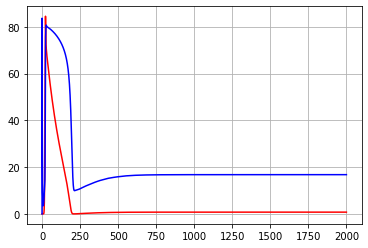

In [8]:
# get init vars without noise
aln.params.sigma_ou = 0.
aln.params.duration = 2000.

aln.params.mue_ext_mean = p1[0] * 5.
aln.params.mui_ext_mean = p1[1] * 5.

aln.run(control=aln.getZeroControl())
plt.plot(aln.t, aln.rates_exc[0,:], color='red')
plt.plot(aln.t, aln.rates_inh[0,:], color='blue')
plt.show()

init_state_vars = np.zeros(( len(state_vars) ))
for j in range(len(state_vars)):
    if aln.state[state_vars[j]].size == 1:
        init_state_vars[j] = aln.state[state_vars[j]][0]
    else:
        init_state_vars[j] = aln.state[state_vars[j]][0,-1]

initVars = init_state_vars.copy()

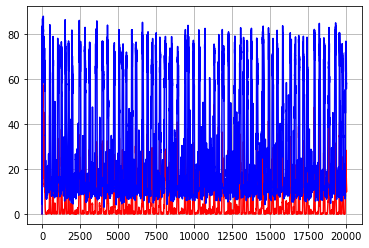

22.715806265108107
69.40950997850977


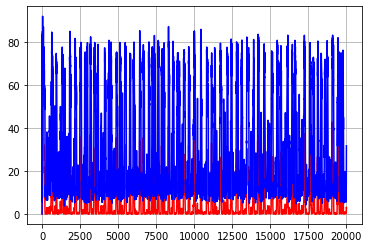

21.756939367612713
68.80817660258168


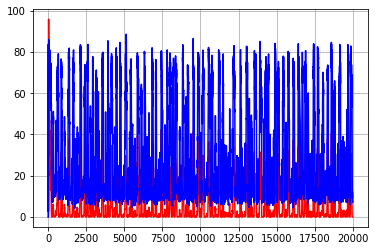

22.047697853496523
68.81276222599173


In [9]:
for i_sigma in range(n_sig):

    aln.params.sigma_ou = 0.1

    aln.params.duration = 20000.

    aln.params.mue_ext_mean = p1[0] * 5.
    aln.params.mui_ext_mean = p1[1] * 5.

    aln.run(control=aln.getZeroControl())
    plt.plot(aln.t, aln.rates_exc[0,:], color='red')
    plt.plot(aln.t, aln.rates_inh[0,:], color='blue')
    plt.show()

    e_ = []
    i_ = []
    t_ind = []

    for t in range(len(aln.t)):

        if aln.rates_exc[0,t] < 10:
            continue
        if aln.rates_inh[0,t] < 50:
            continue

        t_ind.append(t)
        e_.append(aln.rates_exc[0,t])
        i_.append(aln.rates_inh[0,t])

    print(np.mean(e_))
    print(np.mean(i_))
    
    aln.params.duration = dur
    target[i_sigma] = aln.getZeroTarget()

    target[i_sigma][0,0,:] = np.mean(e_)
    target[i_sigma][0,1,:] = np.mean(i_)

    stddev[i_sigma] = np.std(e_) + np.std(i_)
    
    w_p[i_sigma] = 1. / ( ( stddev[i_sigma] ) * (1. - trans_time) * dur )

In [87]:
aln.params.duration = dur
zero_init = aln.getZeroControl()

max_it = 15
init_it = 5
min_it = 12
i = 50

factor = [1.8, 1.8, 1.4]


for i_sigma in range(3):
    cost.setParams(w_p[i_sigma], w_e, w_s)
    for i_noise in range(3):
        
        if i_noise in [0,1]:
            continue
            
        if i_sigma in []:
            continue

        noise_realizations = noise_realizations_array[i_noise]
        sigma_ou = sigma_ou_array[i_sigma]
        aln.params.sigma_ou = sigma_ou
        
        aln.params.duration = dur
        
        n_ = 0
        
        if i_noise != 0.:
            control_sum = np.zeros(( init_control_noisefree[:,:,:-900].shape ))
            print(noise_realizations)
            
            while n_  < noise_realizations:
                
                print('--------', n_)

                setinit(initVars, aln)

                bestControl, bestState, c_, runtime, grad, phi, costnode, total_cost_mean_std = aln.A1(
                    zero_init, target[i_sigma], c_scheme, u_mat, u_scheme, max_iteration_ = init_it,
                    tolerance_ = tol, startStep_ = start_step, max_control_ = max_cntrl, min_control_ = min_cntrl,
                    t_sim_ = dur, t_sim_pre_ = dur_pre, t_sim_post_ = dur_post, CGVar = None,
                    control_variables_ = [0], prec_variables_ = prec_vars, transition_time_ = trans_time,
                    noise_real=0, init_params = initVars)

                max_jump = 0.
                for v_ in range(bestControl.shape[1]):
                    for t_ in range(1, bestControl.shape[2]):
                        diff = np.abs(bestControl[0,v_,t_] - bestControl[0,v_,t_-1])
                        if  diff > max_jump:
                            max_jump = diff

                if max_jump > 0.5:
                    continue

                control_init = bestControl[:,:,100:-100].copy()
                setinit(initVars, aln)
                aln.params.duration = dur

                bestControl, bestState, c_, runtime, grad, phi, costnode, total_cost_mean_std = aln.A1(
                    control_init, target[i_sigma], c_scheme, u_mat, u_scheme, max_iteration_ = max_it,
                    tolerance_ = tol, startStep_ = start_step, max_control_ = max_cntrl, min_control_ = min_cntrl,
                    t_sim_ = dur, t_sim_pre_ = dur_pre, t_sim_post_ = dur_post, CGVar = None,
                    control_variables_ = [0,1], prec_variables_ = prec_vars, transition_time_ = trans_time,
                    noise_real=0, init_params = initVars)
                
                if c_[min_it] == 0:
                    continue

                max_jump = 0.
                for v_ in range(bestControl.shape[1]):
                    for t_ in range(1, bestControl.shape[2]):
                        diff = np.abs(bestControl[0,v_,t_] - bestControl[0,v_,t_-1])
                        if  diff > max_jump:
                            max_jump = diff

                if max_jump > 0.5:
                    continue
                    
                control_sum += bestControl
            
                n_ += 1
    

            control_[i_sigma][i_noise] = control_sum / noise_realizations
        
        else:
            control_[i_sigma][i_noise] = factor[i_sigma] * init_control_noisefree[:,:,:-900]
        
        aln.params.duration = dur
        setinit(initVars, aln)

        init_control = aln.getZeroControl()           
        init_control[:,:,:] = control_[i_sigma][i_noise][:,:,100:-100]
        T = int(1 + dur/aln.params.dt)
        dt = aln.params.dt

        target_ = target[i_sigma].copy()
        target_[0,0,:int(trans_time * dur / aln.params.dt)] = -1000
        target_[0,1,:int(trans_time * dur / aln.params.dt)] = -1000

        cost_final = np.zeros(( noise_realizations_final ))

        for n_ in range(noise_realizations_final):
            state_ = fo.updateState(aln, init_control)
            cost_final[n_] += cost.numba_cost_precision_int(1,T,dt,w_p[i_sigma],state_, target_, list(prec_vars) )
            cost_final[n_] += cost.numba_cost_sparsity_int(1, 6, T, w_s, dt, init_control)

        cost_final_mean[i_sigma, i_noise] = np.mean(cost_final)
        print('mean = ', cost_final_mean[i_sigma, i_noise])

set cost params:  0.00035720229762972413 0.0 1.0
100
-------- 0
interpolate adjoint :  True True True
initial cost =  113.78656112041007
RUN  0 , total integrated cost =  113.78656112041007
Gradient descend method:  None
RUN  1 , total integrated cost =  35.462933571543665
RUN  2 , total integrated cost =  13.09602148727176
RUN  3 , total integrated cost =  11.955149803502994
RUN  4 , total integrated cost =  7.627125341237136


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  5 , total integrated cost =  6.244984167439196
RUN  5 , total integrated cost =  6.244984167439196
Improved over  5  iterations in  0.24505556101212278  seconds by  94.51166806875314  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.13632434212562 -61.133172472020554
Problem in initial value trasfer post:  Vmean_exc -58.05766009207678 -58.09016092475561
interpolate adjoint :  True True True
initial cost =  6.299145556094947
RUN  0 , total integrated cost =  6.299145556094947
Gradient descend method:  None
RUN  1 , total integrated cost =  4.348139322912951
RUN  2 , total integrated cost =  3.907593121691833
RUN  3 , total integrated cost =  3.848100838332027
RUN  4 , total integrated cost =  3.6103481438012093
RUN  5 , total integrated cost =  3.5547495932740096
RUN  6 , total integrated cost =  3.513232370127304
RUN  7 , total integrated cost =  3.534249921842602
RUN  8 , total integrated cost =  3.50050581154148
RUN  9 , total integrated cost =  3.498720383945614
RU

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  14 , total integrated cost =  3.4827419176044896
RUN  15 , total integrated cost =  3.469229227692216
RUN  15 , total integrated cost =  3.469229227692216
Improved over  15  iterations in  1.293674638029188  seconds by  44.92539985307295  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.161702900775595 -61.16080121828233
Problem in initial value trasfer post:  Vmean_exc -56.95793203879213 -56.968971759959786
-------- 1
interpolate adjoint :  True True True
initial cost =  112.43416831445917
RUN  0 , total integrated cost =  112.43416831445917
Gradient descend method:  None
RUN  1 , total integrated cost =  21.312420604924483


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  2 , total integrated cost =  15.577574101134367
RUN  3 , total integrated cost =  8.37141696466945
RUN  4 , total integrated cost =  6.521926359735187
RUN  5 , total integrated cost =  6.062682569241485
RUN  5 , total integrated cost =  6.062682569241485
Improved over  5  iterations in  0.2404291610000655  seconds by  94.60779346694218  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.08444646745921 -61.08398320008689
Problem in initial value trasfer post:  Vmean_exc -57.52625463421498 -57.55054088398434
interpolate adjoint :  True True True
initial cost =  6.1174651493283045
RUN  0 , total integrated cost =  6.1174651493283045
Gradient descend method:  None
RUN  1 , total integrated cost =  5.086302651634714
RUN  2 , total integrated cost =  4.7745439649873385
RUN  3 , total integrated cost =  4.527191280660756
RUN  4 , total integrated cost =  4.312170701234572
RUN  5 , total integrated cost =  4.196541293947645
RUN  6 , total integrated cost =  3.8633507208613986
R

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  13 , total integrated cost =  3.5850088521182513
RUN  14 , total integrated cost =  3.5806358037133674
RUN  15 , total integrated cost =  3.621482651460663
RUN  15 , total integrated cost =  3.621482651460663
Improved over  15  iterations in  1.2190114780096337  seconds by  40.80092713142305  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.08777931852273 -61.08664213880556
Problem in initial value trasfer post:  Vmean_exc -56.906157568364215 -56.91758759486038
-------- 2
interpolate adjoint :  True True True
initial cost =  111.36089949346926
RUN  0 , total integrated cost =  111.36089949346926
Gradient descend method:  None


ERROR:root:Problem in initial value trasfer pre


RUN  1 , total integrated cost =  34.700170637885975
RUN  2 , total integrated cost =  15.076504554975793
RUN  3 , total integrated cost =  7.847878852983429
RUN  4 , total integrated cost =  4.993092829461106
RUN  5 , total integrated cost =  3.871848508153357
RUN  5 , total integrated cost =  3.871848508153357
Improved over  5  iterations in  0.24221739801578224  seconds by  96.52315262739017  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.0686061942582 -61.06789818049276


ERROR:root:Problem in initial value trasfer post


Problem in initial value trasfer post:  Vmean_exc -57.01025771445266 -57.02412016544865
interpolate adjoint :  True True True
initial cost =  3.9578384060473346
RUN  0 , total integrated cost =  3.9578384060473346
Gradient descend method:  None
RUN  1 , total integrated cost =  3.8410209250929226
RUN  2 , total integrated cost =  3.648622734605765
RUN  3 , total integrated cost =  3.523925753948418
RUN  4 , total integrated cost =  3.554525134712849
RUN  5 , total integrated cost =  3.5655793828713245
RUN  6 , total integrated cost =  3.559623916651888
RUN  7 , total integrated cost =  3.5330462551478843
RUN  8 , total integrated cost =  3.552610938538435
RUN  9 , total integrated cost =  3.528157887178418
RUN  10 , total integrated cost =  3.5116447565011173
RUN  11 , total integrated cost =  3.500512254306083
RUN  12 , total integrated cost =  3.5016789634908867
RUN  13 , total integrated cost =  3.5538622880916115


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  14 , total integrated cost =  3.5486540414243857
RUN  15 , total integrated cost =  3.5220010966595083
RUN  15 , total integrated cost =  3.5220010966595083
Improved over  15  iterations in  1.2717311099986546  seconds by  11.012003641227324  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.08113806175136 -61.07994044549767
Problem in initial value trasfer post:  Vmean_exc -56.86508836465628 -56.87482974710876
-------- 3
interpolate adjoint :  True True True
initial cost =  113.84553466867558
RUN  0 , total integrated cost =  113.84553466867558
Gradient descend method:  None
RUN  1 , total integrated cost =  31.51873935421153


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  2 , total integrated cost =  13.333798083320616
RUN  3 , total integrated cost =  10.874248733936465
RUN  4 , total integrated cost =  7.799735595971169
RUN  5 , total integrated cost =  5.435280855885919
RUN  5 , total integrated cost =  5.435280855885919
Improved over  5  iterations in  0.24997895199339837  seconds by  95.22574084991194  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.19867887862029 -61.198760705542654
Problem in initial value trasfer post:  Vmean_exc -57.751565546516375 -57.782388042287295
interpolate adjoint :  True True True
initial cost =  5.804961706440328
RUN  0 , total integrated cost =  5.804961706440328
Gradient descend method:  None
RUN  1 , total integrated cost =  4.685551929888699
RUN  2 , total integrated cost =  3.946306983804476
RUN  3 , total integrated cost =  3.698272692785058
RUN  4 , total integrated cost =  3.684580075901547
RUN  5 , total integrated cost =  3.6763345692151965
RUN  6 , total integrated cost =  3.58719070458068

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  13 , total integrated cost =  3.4652620159647363
RUN  14 , total integrated cost =  3.524584271189381
RUN  15 , total integrated cost =  3.534982653893848
RUN  15 , total integrated cost =  3.534982653893848
Improved over  15  iterations in  1.24588538199896  seconds by  39.10411760387751  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.26657480467783 -61.26598600260723
Problem in initial value trasfer post:  Vmean_exc -57.08991962610343 -57.10502422311062
-------- 4
interpolate adjoint :  True True True
initial cost =  112.24952260565286
RUN  0 , total integrated cost =  112.24952260565286
Gradient descend method:  None
RUN  1 , total integrated cost =  40.57843079861782
RUN  2 , total integrated cost =  17.860559482219085
RUN  3 , total integrated cost =  12.097577888872586
RUN  4 , total integrated cost =  9.971224095801933


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  5 , total integrated cost =  4.847913749989439
RUN  5 , total integrated cost =  4.847913749989439
Improved over  5  iterations in  0.2519592309836298  seconds by  95.68112751176609  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.20036568458332 -61.2000290862962
Problem in initial value trasfer post:  Vmean_exc -56.97981743740944 -56.993410787929726
interpolate adjoint :  True True True
initial cost =  4.934260560120994
RUN  0 , total integrated cost =  4.934260560120994
Gradient descend method:  None
RUN  1 , total integrated cost =  4.2990878663552925
RUN  2 , total integrated cost =  4.106694480491649
RUN  3 , total integrated cost =  3.8621081333685345
RUN  4 , total integrated cost =  3.7749798925545703
RUN  5 , total integrated cost =  3.6790298212723767
RUN  6 , total integrated cost =  3.705194831393083
RUN  7 , total integrated cost =  3.608248838371388
RUN  8 , total integrated cost =  3.600097954118917
RUN  9 , total integrated cost =  3.611992381724164
R

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  14 , total integrated cost =  3.5339321954599567
RUN  15 , total integrated cost =  3.528665366701239
RUN  15 , total integrated cost =  3.528665366701239
Improved over  15  iterations in  1.3402421550126746  seconds by  28.48644039554506  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.30779359348917 -61.31023372930578
Problem in initial value trasfer post:  Vmean_exc -56.93238622311925 -56.94426657515055
-------- 5
interpolate adjoint :  True True True
initial cost =  113.81293561609581
RUN  0 , total integrated cost =  113.81293561609581
Gradient descend method:  None
RUN  1 , total integrated cost =  22.91743532789492


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  2 , total integrated cost =  19.38278661258103
RUN  3 , total integrated cost =  17.348122544163637
RUN  4 , total integrated cost =  7.004713330504392
RUN  5 , total integrated cost =  5.52457930411355
RUN  5 , total integrated cost =  5.52457930411355
Improved over  5  iterations in  0.2383580289897509  seconds by  95.1459126555275  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.19022172933038 -61.191074144881846
Problem in initial value trasfer post:  Vmean_exc -56.997097481690524 -57.01159174226879
interpolate adjoint :  True True True
initial cost =  6.139619068054985
RUN  0 , total integrated cost =  6.139619068054985
Gradient descend method:  None
RUN  1 , total integrated cost =  5.584993855619935
RUN  2 , total integrated cost =  5.314944899547029
RUN  3 , total integrated cost =  5.182183187026007
RUN  4 , total integrated cost =  5.132914225837597
RUN  5 , total integrated cost =  5.251108692569009
RUN  6 , total integrated cost =  5.152539286532987
RUN  

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  15 , total integrated cost =  5.076270330886134
RUN  15 , total integrated cost =  5.076270330886134
Improved over  15  iterations in  1.4178102150326595  seconds by  17.319457858575547  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.18880436568191 -61.19021829677392
Problem in initial value trasfer post:  Vmean_exc -56.93435842878522 -56.946882748297696
-------- 6
interpolate adjoint :  True True True
initial cost =  113.12741717726712
RUN  0 , total integrated cost =  113.12741717726712
Gradient descend method:  None
RUN  1 , total integrated cost =  36.77784271162444
RUN  2 , total integrated cost =  21.467616817368263
RUN  3 , total integrated cost =  18.029587494401603


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  4 , total integrated cost =  14.040689294685805
RUN  5 , total integrated cost =  7.988556839335578
RUN  5 , total integrated cost =  7.988556839335578
Improved over  5  iterations in  0.2428641120204702  seconds by  92.9384431832137  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.2491422682893 -61.2498075680331
Problem in initial value trasfer post:  Vmean_exc -57.833295755239696 -57.86252331986681
interpolate adjoint :  True True True
initial cost =  8.06880170701649
RUN  0 , total integrated cost =  8.06880170701649
Gradient descend method:  None
RUN  1 , total integrated cost =  5.711628359434384
RUN  2 , total integrated cost =  5.058199238599504
RUN  3 , total integrated cost =  4.727686384904754
RUN  4 , total integrated cost =  4.646526567969044
RUN  5 , total integrated cost =  4.522930208611972
RUN  6 , total integrated cost =  4.335710745987973
RUN  7 , total integrated cost =  4.165524757790001
RUN  8 , total integrated cost =  3.942581134227281
RUN  9 ,

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  14 , total integrated cost =  3.610723460273364
RUN  15 , total integrated cost =  3.580294733119524
RUN  15 , total integrated cost =  3.580294733119524
Improved over  15  iterations in  1.2753757610335015  seconds by  55.62792514771851  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.20784398144807 -61.20940914318835
Problem in initial value trasfer post:  Vmean_exc -56.93416880134028 -56.946876184903616
-------- 7
interpolate adjoint :  True True True
initial cost =  112.97236152675687
RUN  0 , total integrated cost =  112.97236152675687
Gradient descend method:  None
RUN  1 , total integrated cost =  31.555739298456547


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  2 , total integrated cost =  15.324858060486598
RUN  3 , total integrated cost =  5.78701685525127
RUN  4 , total integrated cost =  5.599641080004172
RUN  5 , total integrated cost =  5.509859570871855
RUN  5 , total integrated cost =  5.509859570871855
Improved over  5  iterations in  0.22949913697084412  seconds by  95.12282517917723  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.130955662012965 -61.1310510945071
Problem in initial value trasfer post:  Vmean_exc -57.05392262839188 -57.06953360873919
interpolate adjoint :  True True True
initial cost =  5.60215031503839
RUN  0 , total integrated cost =  5.60215031503839
Gradient descend method:  None
RUN  1 , total integrated cost =  5.4367833534252625
RUN  2 , total integrated cost =  5.247552592504032
RUN  3 , total integrated cost =  4.657671356796528
RUN  4 , total integrated cost =  4.425434246013364
RUN  5 , total integrated cost =  4.436743523635289
RUN  6 , total integrated cost =  4.459175233120794
RUN  

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  15 , total integrated cost =  3.929401541979591
RUN  15 , total integrated cost =  3.929401541979591
Improved over  15  iterations in  1.3634274149662815  seconds by  29.859048383055324  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.11578839860164 -61.11415031160624
Problem in initial value trasfer post:  Vmean_exc -56.85992299028019 -56.87030539685261
-------- 8
interpolate adjoint :  True True True
initial cost =  112.0406457059703
RUN  0 , total integrated cost =  112.0406457059703
Gradient descend method:  None
RUN  1 , total integrated cost =  28.241271531433743
RUN  2 , total integrated cost =  22.49334863053447
RUN  3 , total integrated cost =  19.74780409850382


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  4 , total integrated cost =  21.11643825361517
RUN  5 , total integrated cost =  19.11786907635704
RUN  5 , total integrated cost =  19.11786907635704
Improved over  5  iterations in  0.25399418198503554  seconds by  82.93666646073399  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.0455262114937 -61.04289353652672
Problem in initial value trasfer post:  Vmean_exc -67.56701034508681 -67.58950124903534
interpolate adjoint :  True True True
initial cost =  34.79456203957159
RUN  0 , total integrated cost =  34.79456203957159
Gradient descend method:  None
RUN  1 , total integrated cost =  15.671367143519532
RUN  2 , total integrated cost =  15.301232864910794
RUN  3 , total integrated cost =  14.517090952784173
RUN  4 , total integrated cost =  14.25982266145808
RUN  5 , total integrated cost =  11.709129606274889
RUN  6 , total integrated cost =  9.966919270517629
RUN  7 , total integrated cost =  5.115737124847995
RUN  8 , total integrated cost =  4.353041122733167
R

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  14 , total integrated cost =  3.5509011424238066
RUN  15 , total integrated cost =  3.545021520295296
RUN  15 , total integrated cost =  3.545021520295296
Improved over  15  iterations in  1.2802719849860296  seconds by  89.81156447302435  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.077526607448014 -61.07399916344686
Problem in initial value trasfer post:  Vmean_exc -56.966925142905325 -56.978270174286116
-------- 9
interpolate adjoint :  True True True
initial cost =  113.76454715392433
RUN  0 , total integrated cost =  113.76454715392433
Gradient descend method:  None
RUN  1 , total integrated cost =  40.125477212152425


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  2 , total integrated cost =  31.15639646284724
RUN  3 , total integrated cost =  12.636275086850485
RUN  4 , total integrated cost =  9.082871922256933
RUN  5 , total integrated cost =  7.718104200162346
RUN  5 , total integrated cost =  7.718104200162346
Improved over  5  iterations in  0.23565929697360843  seconds by  93.21572107194372  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.23098310389938 -61.232755855327
Problem in initial value trasfer post:  Vmean_exc -57.426801222694216 -57.45287159039634
interpolate adjoint :  True True True
initial cost =  7.846863869164519
RUN  0 , total integrated cost =  7.846863869164519
Gradient descend method:  None
RUN  1 , total integrated cost =  5.350846468192434
RUN  2 , total integrated cost =  4.813171632917937
RUN  3 , total integrated cost =  3.9451942617463622
step size too small or too large
RUN  4 , total integrated cost =  3.7867266686404477
RUN  5 , total integrated cost =  3.726951478203857
RUN  6 , total integr

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  13 , total integrated cost =  3.6264665858748715
RUN  14 , total integrated cost =  3.588865629126237
RUN  15 , total integrated cost =  3.579706722759432
RUN  15 , total integrated cost =  3.579706722759432
Improved over  15  iterations in  1.3377475470188074  seconds by  54.380415125761886  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.20307648213351 -61.205091551914904
Problem in initial value trasfer post:  Vmean_exc -56.897800311582905 -56.90868146275839
-------- 10
interpolate adjoint :  True True True
initial cost =  111.97108589731094
RUN  0 , total integrated cost =  111.97108589731094
Gradient descend method:  None


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  1 , total integrated cost =  46.096575321039396
RUN  2 , total integrated cost =  23.76892102400481
RUN  3 , total integrated cost =  20.27849804022151
RUN  4 , total integrated cost =  14.866647142131026
RUN  5 , total integrated cost =  13.3561687941559
RUN  5 , total integrated cost =  13.3561687941559
Improved over  5  iterations in  0.23722821095725521  seconds by  88.07176987958759  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.32743431947843 -61.32989230884752
Problem in initial value trasfer post:  Vmean_exc -58.15936461190927 -58.202709246073034
-------- 10
interpolate adjoint :  True True True
initial cost =  113.39975300044523
RUN  0 , total integrated cost =  113.39975300044523
Gradient descend method:  None
RUN  1 , total integrated cost =  24.261405239049235
RUN  2 , total integrated cost =  21.47761346829616
RUN  3 , total integrated cost =  11.797808447129515
RUN  4 , total integrated cost =  6.7690960021937485


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  5 , total integrated cost =  6.615262652167141
RUN  5 , total integrated cost =  6.615262652167141
Improved over  5  iterations in  0.23816492198966444  seconds by  94.16642234472842  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.15591877605741 -61.156414114476846
Problem in initial value trasfer post:  Vmean_exc -57.670903382777325 -57.69884185979536
interpolate adjoint :  True True True
initial cost =  6.6891484192286885
RUN  0 , total integrated cost =  6.6891484192286885
Gradient descend method:  None
RUN  1 , total integrated cost =  6.569848836591203
RUN  2 , total integrated cost =  6.510255980672722
RUN  3 , total integrated cost =  6.507399053734842
RUN  4 , total integrated cost =  6.319916806049846
RUN  5 , total integrated cost =  5.910999979880419
RUN  6 , total integrated cost =  5.9121877453572305
RUN  7 , total integrated cost =  5.871371138967439
RUN  8 , total integrated cost =  5.8899267584991515
RUN  9 , total integrated cost =  5.92937607915026

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


step size too small or too large
RUN  14 , total integrated cost =  5.873385139785935
RUN  15 , total integrated cost =  5.902811180862772
RUN  15 , total integrated cost =  5.902811180862772
Improved over  15  iterations in  1.5435929110390134  seconds by  11.755416221674864  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.25211978957006 -61.252432746701416
Problem in initial value trasfer post:  Vmean_exc -57.317255949327446 -57.34108218753575
-------- 11
interpolate adjoint :  True True True
initial cost =  112.76975799984587
RUN  0 , total integrated cost =  112.76975799984587
Gradient descend method:  None
RUN  1 , total integrated cost =  39.85512275613914
RUN  2 , total integrated cost =  38.1791345274175
RUN  3 , total integrated cost =  39.7835290495039


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  4 , total integrated cost =  36.1149275325839
RUN  5 , total integrated cost =  35.61834502264264
RUN  5 , total integrated cost =  35.61834502264264
Improved over  5  iterations in  0.2606972610228695  seconds by  68.41498496193338  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.17152478636166 -61.17339273355209
Problem in initial value trasfer post:  Vmean_exc -56.65054898443243 -56.65118619709828
interpolate adjoint :  True True True
initial cost =  46.54217067926312
RUN  0 , total integrated cost =  46.54217067926312
Gradient descend method:  None
RUN  1 , total integrated cost =  33.94149296911506
RUN  2 , total integrated cost =  29.95368737744159
RUN  3 , total integrated cost =  31.435544065502462
RUN  4 , total integrated cost =  30.547777457143223
RUN  5 , total integrated cost =  29.212509526256
RUN  6 , total integrated cost =  29.967937226972033
RUN  7 , total integrated cost =  29.035033490790962
RUN  8 , total integrated cost =  9.96438281441724
RUN  

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  14 , total integrated cost =  3.7784711330246017
RUN  15 , total integrated cost =  3.5423495569131105
RUN  15 , total integrated cost =  3.5423495569131105
Improved over  15  iterations in  1.372631230042316  seconds by  92.38894640019141  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.22511056344046 -61.22520102353103
Problem in initial value trasfer post:  Vmean_exc -57.03995155867313 -57.051987570993575
-------- 12
interpolate adjoint :  True True True
initial cost =  113.23606903792633
RUN  0 , total integrated cost =  113.23606903792633
Gradient descend method:  None


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  1 , total integrated cost =  24.983387110572245
RUN  2 , total integrated cost =  20.103675225410008
RUN  3 , total integrated cost =  7.855016441518289
RUN  4 , total integrated cost =  6.755100177919623
RUN  5 , total integrated cost =  5.925560697853345
RUN  5 , total integrated cost =  5.925560697853345
Improved over  5  iterations in  0.23433062399271876  seconds by  94.76707311707483  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.28640394356011 -61.28821976660463
Problem in initial value trasfer post:  Vmean_exc -57.111291511733484 -57.12711325853192
interpolate adjoint :  True True True
initial cost =  6.287594033975354
RUN  0 , total integrated cost =  6.287594033975354
Gradient descend method:  None
RUN  1 , total integrated cost =  5.729405614219885
RUN  2 , total integrated cost =  5.513917559302167
RUN  3 , total integrated cost =  5.381640143788857
RUN  4 , total integrated cost =  5.3936552296744145
RUN  5 , total integrated cost =  5.299015550422008


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  15 , total integrated cost =  3.6259442366430346
RUN  15 , total integrated cost =  3.6259442366430346
Improved over  15  iterations in  1.3802421960281208  seconds by  42.33176924193819  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.16679868690676 -61.16681980026344
Problem in initial value trasfer post:  Vmean_exc -56.75560353215077 -56.76251857092438
-------- 13
interpolate adjoint :  True True True
initial cost =  113.94255428049067
RUN  0 , total integrated cost =  113.94255428049067
Gradient descend method:  None
RUN  1 , total integrated cost =  27.909876213167532
RUN  2 , total integrated cost =  21.9353513670132
RUN  3 , total integrated cost =  9.26866619172621


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  4 , total integrated cost =  5.940445472153812
RUN  5 , total integrated cost =  5.490937145418438
RUN  5 , total integrated cost =  5.490937145418438
Improved over  5  iterations in  0.24465995701029897  seconds by  95.1809601074051  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.21619229330489 -61.21599460704508
Problem in initial value trasfer post:  Vmean_exc -56.66292831930126 -56.666075043007574
interpolate adjoint :  True True True
initial cost =  5.678643017461813
RUN  0 , total integrated cost =  5.678643017461813
Gradient descend method:  None
RUN  1 , total integrated cost =  5.44132076556942
RUN  2 , total integrated cost =  5.718666762845844
RUN  3 , total integrated cost =  5.41482500462087
RUN  4 , total integrated cost =  5.426818660750648
RUN  5 , total integrated cost =  5.483525574615755
RUN  6 , total integrated cost =  5.401240739877746
RUN  7 , total integrated cost =  5.469924129694415
RUN  8 , total integrated cost =  5.350140295017901
RUN  9

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  15 , total integrated cost =  5.317784565427837
RUN  15 , total integrated cost =  5.317784565427837
Improved over  15  iterations in  1.3533831560052931  seconds by  6.3546599235827586  percent.
Problem in initial value trasfer pre:  Vmean_exc -60.967977488976814 -60.964958810799295
Problem in initial value trasfer post:  Vmean_exc -57.19570302365531 -57.21425634326159
-------- 14
interpolate adjoint :  True True True
initial cost =  113.13500402944277
RUN  0 , total integrated cost =  113.13500402944277
Gradient descend method:  None
RUN  1 , total integrated cost =  33.814666259864886
RUN  2 , total integrated cost =  13.546678306454401
RUN  3 , total integrated cost =  7.118435792122515


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  4 , total integrated cost =  5.672931533890125
RUN  5 , total integrated cost =  4.215207701274492
RUN  5 , total integrated cost =  4.215207701274492
Improved over  5  iterations in  0.242757020983845  seconds by  96.27417903288578  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.05324357553406 -61.051699793299456
Problem in initial value trasfer post:  Vmean_exc -56.993522465800176 -57.00679252066803
interpolate adjoint :  True True True
initial cost =  4.461894400079591
RUN  0 , total integrated cost =  4.461894400079591
Gradient descend method:  None
RUN  1 , total integrated cost =  3.9406948201958008
RUN  2 , total integrated cost =  3.6319546182404676
RUN  3 , total integrated cost =  3.657261497089642
RUN  4 , total integrated cost =  3.6792486528235244
RUN  5 , total integrated cost =  3.691175846834115
RUN  6 , total integrated cost =  3.593205568362974
RUN  7 , total integrated cost =  3.5511952151740465
RUN  8 , total integrated cost =  3.5464801549764537

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  14 , total integrated cost =  3.4999700081380865
RUN  15 , total integrated cost =  3.5019609118644857
RUN  15 , total integrated cost =  3.5019609118644857
Improved over  15  iterations in  1.24930043698987  seconds by  21.514034222727958  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.06466668119767 -61.06275509241775
Problem in initial value trasfer post:  Vmean_exc -56.899277557276726 -56.90954945631469
-------- 15
interpolate adjoint :  True True True
initial cost =  111.10399319889096
RUN  0 , total integrated cost =  111.10399319889096
Gradient descend method:  None
RUN  1 , total integrated cost =  30.714637652857384


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  2 , total integrated cost =  21.924506492451087
RUN  3 , total integrated cost =  13.567128473453963
RUN  4 , total integrated cost =  8.649231417412583
RUN  5 , total integrated cost =  6.430276490339724
RUN  5 , total integrated cost =  6.430276490339724
Improved over  5  iterations in  0.23483900801511481  seconds by  94.21238039677955  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.029034625552505 -61.02658673946869
Problem in initial value trasfer post:  Vmean_exc -57.58809855311984 -57.61289988689637
interpolate adjoint :  True True True
initial cost =  6.612943972097764
RUN  0 , total integrated cost =  6.612943972097764
Gradient descend method:  None
RUN  1 , total integrated cost =  5.95860830397357
RUN  2 , total integrated cost =  5.250960856427251
RUN  3 , total integrated cost =  5.093323614988941
RUN  4 , total integrated cost =  4.877350333878854
RUN  5 , total integrated cost =  4.668864819452561
RUN  6 , total integrated cost =  4.462936104760224
RU

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  14 , total integrated cost =  3.6215115503178654
RUN  15 , total integrated cost =  3.5454023669962984
RUN  15 , total integrated cost =  3.5454023669962984
Improved over  15  iterations in  1.3711365920025855  seconds by  46.38692869687776  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.260838796765746 -61.26121286545633
Problem in initial value trasfer post:  Vmean_exc -56.83359607117684 -56.842398884932656
-------- 16
interpolate adjoint :  True True True
initial cost =  111.43732678862214
RUN  0 , total integrated cost =  111.43732678862214
Gradient descend method:  None
RUN  1 , total integrated cost =  20.675176023788428


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  2 , total integrated cost =  19.92933182764625
RUN  3 , total integrated cost =  19.50556860607694
RUN  4 , total integrated cost =  18.262096582735936
RUN  5 , total integrated cost =  13.398520555735193
RUN  5 , total integrated cost =  13.398520555735193
Improved over  5  iterations in  0.25204535701777786  seconds by  87.97663140183725  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.23959482995862 -61.240798471264945
Problem in initial value trasfer post:  Vmean_exc -57.375002454529465 -57.392407942028385
interpolate adjoint :  True True True
initial cost =  14.523196067072774
RUN  0 , total integrated cost =  14.523196067072774
Gradient descend method:  None
RUN  1 , total integrated cost =  12.192759324064234
RUN  2 , total integrated cost =  8.21263310040463
RUN  3 , total integrated cost =  8.132989795001677
RUN  4 , total integrated cost =  8.136469694077386
RUN  5 , total integrated cost =  8.211061950706807
RUN  6 , total integrated cost =  8.321471714879

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  15 , total integrated cost =  8.373773543120995
RUN  15 , total integrated cost =  8.373773543120995
Improved over  15  iterations in  1.413827085052617  seconds by  42.34207467524212  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.13365136735215 -61.13322897008221
Problem in initial value trasfer post:  Vmean_exc -57.74269591436575 -57.772298164885925
-------- 17
interpolate adjoint :  True True True
initial cost =  112.12379694714487
RUN  0 , total integrated cost =  112.12379694714487
Gradient descend method:  None
RUN  1 , total integrated cost =  18.96414147937537
RUN  2 , total integrated cost =  17.554186721475986
RUN  3 , total integrated cost =  12.442336502233466


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  4 , total integrated cost =  8.157835941020743
RUN  5 , total integrated cost =  5.565306047423431
RUN  5 , total integrated cost =  5.565306047423431
Improved over  5  iterations in  0.24345893802819774  seconds by  95.036463089056  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.196258238912925 -61.197583942117404
Problem in initial value trasfer post:  Vmean_exc -57.56609333133287 -57.59001583430397
interpolate adjoint :  True True True
initial cost =  5.5366179013863634
RUN  0 , total integrated cost =  5.5366179013863634
Gradient descend method:  None
RUN  1 , total integrated cost =  4.586267105226058
RUN  2 , total integrated cost =  3.945725592234432
RUN  3 , total integrated cost =  3.748072872579048
RUN  4 , total integrated cost =  3.698251809436086
RUN  5 , total integrated cost =  3.5674800818949532
RUN  6 , total integrated cost =  3.6284440530870667
RUN  7 , total integrated cost =  3.5824821174753883
RUN  8 , total integrated cost =  3.591233459490822

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  14 , total integrated cost =  3.570856419378646
RUN  15 , total integrated cost =  3.497012793001598
RUN  15 , total integrated cost =  3.497012793001598
Improved over  15  iterations in  1.357396409031935  seconds by  36.83846609450961  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.359036092899935 -61.36197337050382
Problem in initial value trasfer post:  Vmean_exc -57.024347835709825 -57.0378257311528
-------- 18
interpolate adjoint :  True True True
initial cost =  113.28201362708711
RUN  0 , total integrated cost =  113.28201362708711
Gradient descend method:  None
RUN  1 , total integrated cost =  29.72863505399444


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  2 , total integrated cost =  27.854421195100876
RUN  3 , total integrated cost =  25.854018460191234
RUN  4 , total integrated cost =  22.622126755762274
RUN  5 , total integrated cost =  23.510890863951527
RUN  5 , total integrated cost =  23.510890863951527
Improved over  5  iterations in  0.24381007498595864  seconds by  79.24569831416751  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.038443692331974 -61.03800087954418
Problem in initial value trasfer post:  Vmean_exc -58.08784666134675 -58.11855891977781
interpolate adjoint :  True True True
initial cost =  23.640384299205824
RUN  0 , total integrated cost =  23.640384299205824
Gradient descend method:  None
RUN  1 , total integrated cost =  19.252225469505355
RUN  2 , total integrated cost =  11.012782341478438
RUN  3 , total integrated cost =  7.202525679123502
RUN  4 , total integrated cost =  6.022711174534791
RUN  5 , total integrated cost =  5.932000111995199
RUN  6 , total integrated cost =  5.9576335287

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  13 , total integrated cost =  5.491603609705909
RUN  14 , total integrated cost =  5.429444251141579
RUN  15 , total integrated cost =  5.439352599893568
RUN  15 , total integrated cost =  5.439352599893568
Improved over  15  iterations in  1.3130790540017188  seconds by  76.99126828460103  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.26381997304586 -61.26398315982929
Problem in initial value trasfer post:  Vmean_exc -57.06070127912457 -57.07710318819477
-------- 19
interpolate adjoint :  True True True
initial cost =  111.17902302866561
RUN  0 , total integrated cost =  111.17902302866561
Gradient descend method:  None


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  1 , total integrated cost =  31.890328297009056
RUN  2 , total integrated cost =  22.40948826576138
RUN  3 , total integrated cost =  12.38769807980843
RUN  4 , total integrated cost =  5.687967380818404
RUN  5 , total integrated cost =  4.669944150762186
RUN  5 , total integrated cost =  4.669944150762186
Improved over  5  iterations in  0.2427983739762567  seconds by  95.79961756854247  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.033803752310206 -61.03093873293575
Problem in initial value trasfer post:  Vmean_exc -57.11880615033575 -57.13507296882828
interpolate adjoint :  True True True
initial cost =  4.803298454838089
RUN  0 , total integrated cost =  4.803298454838089
Gradient descend method:  None
RUN  1 , total integrated cost =  4.614798347026439
RUN  2 , total integrated cost =  4.610291204058026
RUN  3 , total integrated cost =  4.659640533645746
RUN  4 , total integrated cost =  4.646150564961119
RUN  5 , total integrated cost =  4.409260498772075
RUN

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


step size too small or too large
RUN  13 , total integrated cost =  3.67182292875138
RUN  14 , total integrated cost =  3.7386551384486872
RUN  15 , total integrated cost =  3.720507648131928
RUN  15 , total integrated cost =  3.720507648131928
Improved over  15  iterations in  1.4715653419843875  seconds by  22.542650990498572  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.25132255252445 -61.251876718809626
Problem in initial value trasfer post:  Vmean_exc -56.96919126416598 -56.980532921080616
-------- 20
interpolate adjoint :  True True True
initial cost =  111.67217933148008
RUN  0 , total integrated cost =  111.67217933148008
Gradient descend method:  None


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  1 , total integrated cost =  35.063090131295525
RUN  2 , total integrated cost =  13.341750642379996
RUN  3 , total integrated cost =  7.298637989434111
RUN  4 , total integrated cost =  5.706607028677666
RUN  5 , total integrated cost =  4.878486670065085
RUN  5 , total integrated cost =  4.878486670065085
Improved over  5  iterations in  0.23287529702065513  seconds by  95.63142163135895  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.27338145078101 -61.276219789322646
Problem in initial value trasfer post:  Vmean_exc -57.00405398491377 -57.01746159718016
interpolate adjoint :  True True True
initial cost =  6.794958106836535
RUN  0 , total integrated cost =  6.794958106836535
Gradient descend method:  None
RUN  1 , total integrated cost =  4.254529939587401
RUN  2 , total integrated cost =  4.054310452324124
RUN  3 , total integrated cost =  3.9566739292473683
RUN  4 , total integrated cost =  3.7288621969174898
RUN  5 , total integrated cost =  3.761680656126763

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  15 , total integrated cost =  3.5440928009259207
RUN  15 , total integrated cost =  3.5440928009259207
Improved over  15  iterations in  1.3212921500089578  seconds by  47.842315652246  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.22699487055705 -61.22843053509757
Problem in initial value trasfer post:  Vmean_exc -57.06130679097023 -57.075875072659855
-------- 21
interpolate adjoint :  True True True
initial cost =  114.12324980003854
RUN  0 , total integrated cost =  114.12324980003854
Gradient descend method:  None
RUN  1 , total integrated cost =  42.24914785835987
RUN  2 , total integrated cost =  19.47184951980446
RUN  3 , total integrated cost =  10.42450662494712


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  4 , total integrated cost =  8.542658669870107
RUN  5 , total integrated cost =  6.035309259129165
RUN  5 , total integrated cost =  6.035309259129165
Improved over  5  iterations in  0.2351908709970303  seconds by  94.71158657880497  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.24619786252608 -61.24618807879688
Problem in initial value trasfer post:  Vmean_exc -57.26652345994329 -57.28446064384616
interpolate adjoint :  True True True
initial cost =  6.261573558705711
RUN  0 , total integrated cost =  6.261573558705711
Gradient descend method:  None
RUN  1 , total integrated cost =  5.502868065506025
RUN  2 , total integrated cost =  4.869946392225883
RUN  3 , total integrated cost =  4.638455936622626
RUN  4 , total integrated cost =  4.333160852497314
RUN  5 , total integrated cost =  4.080639101634299
RUN  6 , total integrated cost =  3.777097604078
RUN  7 , total integrated cost =  3.8365042422066207
RUN  8 , total integrated cost =  3.687736533955645
RUN  9 

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  14 , total integrated cost =  3.6284706264893014
RUN  15 , total integrated cost =  3.625746349403958
RUN  15 , total integrated cost =  3.625746349403958
Improved over  15  iterations in  1.2062532240524888  seconds by  42.095284589239704  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.167943584381135 -61.16693829122336
Problem in initial value trasfer post:  Vmean_exc -57.0030942283762 -57.017189029643305
-------- 22
interpolate adjoint :  True True True
initial cost =  112.9279345121818
RUN  0 , total integrated cost =  112.9279345121818
Gradient descend method:  None
RUN  1 , total integrated cost =  30.37700767335727


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  2 , total integrated cost =  12.957284610643995
RUN  3 , total integrated cost =  9.48302737583873
RUN  4 , total integrated cost =  7.889231909718111
RUN  5 , total integrated cost =  5.04458383868062
RUN  5 , total integrated cost =  5.04458383868062
Improved over  5  iterations in  0.24008420202881098  seconds by  95.53291764303327  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.33421051623301 -61.33701030683059
Problem in initial value trasfer post:  Vmean_exc -57.355325501486526 -57.375245889821784
interpolate adjoint :  True True True
initial cost =  5.080372571008332
RUN  0 , total integrated cost =  5.080372571008332
Gradient descend method:  None
RUN  1 , total integrated cost =  4.170276930054502
RUN  2 , total integrated cost =  4.09668523751172
RUN  3 , total integrated cost =  3.7601483352858267
RUN  4 , total integrated cost =  3.6215731392882367
RUN  5 , total integrated cost =  3.6076577205020772
RUN  6 , total integrated cost =  3.600697855383257
RU

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  15 , total integrated cost =  3.5221556238851304
RUN  15 , total integrated cost =  3.5221556238851304
Improved over  15  iterations in  1.313260516966693  seconds by  30.671312494192378  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.02608786057861 -61.02408496234223
Problem in initial value trasfer post:  Vmean_exc -56.932759449898775 -56.94490578437964
-------- 23
interpolate adjoint :  True True True
initial cost =  114.70300264287717
RUN  0 , total integrated cost =  114.70300264287717
Gradient descend method:  None
RUN  1 , total integrated cost =  10.612211988319142
RUN  2 , total integrated cost =  8.405726910625173
RUN  3 , total integrated cost =  6.3488126170279795


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  4 , total integrated cost =  4.490356838540376
RUN  5 , total integrated cost =  3.8581672728387884
RUN  5 , total integrated cost =  3.8581672728387884
Improved over  5  iterations in  0.2417151129920967  seconds by  96.63638511290674  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.16432964284163 -61.16368879053476
Problem in initial value trasfer post:  Vmean_exc -57.12862587951088 -57.14349896056286
interpolate adjoint :  True True True
initial cost =  3.8618100274616944
RUN  0 , total integrated cost =  3.8618100274616944
Gradient descend method:  None
RUN  1 , total integrated cost =  3.628214765506071
RUN  2 , total integrated cost =  3.620026510415122
RUN  3 , total integrated cost =  3.610542155259075
RUN  4 , total integrated cost =  3.6405380247719883
RUN  5 , total integrated cost =  3.606460106611285
RUN  6 , total integrated cost =  3.6508289733156536
RUN  7 , total integrated cost =  3.6475086430963874
RUN  8 , total integrated cost =  3.55640297772029

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  13 , total integrated cost =  3.502033464393505
RUN  14 , total integrated cost =  3.5352211384433727
RUN  15 , total integrated cost =  3.5075382309786605
RUN  15 , total integrated cost =  3.5075382309786605
Improved over  15  iterations in  1.3018460029852577  seconds by  9.173724081810704  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.07258002050197 -61.07201852165963
Problem in initial value trasfer post:  Vmean_exc -56.955680103376324 -56.967755239457105
-------- 24
interpolate adjoint :  True True True
initial cost =  111.91425767834518
RUN  0 , total integrated cost =  111.91425767834518
Gradient descend method:  None
RUN  1 , total integrated cost =  37.11056042076235
RUN  2 , total integrated cost =  30.980944525698217
RUN  3 , total integrated cost =  13.198076347084006


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  4 , total integrated cost =  12.649342212081523
RUN  5 , total integrated cost =  11.729014693594255
RUN  5 , total integrated cost =  11.729014693594255
Improved over  5  iterations in  0.24679645703872666  seconds by  89.5196421466648  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.17716473921431 -61.1788273405515
Problem in initial value trasfer post:  Vmean_exc -60.65920991014332 -60.72447164343214
interpolate adjoint :  True True True
initial cost =  11.935726819946677
RUN  0 , total integrated cost =  11.935726819946677
Gradient descend method:  None
RUN  1 , total integrated cost =  6.778483274916967
RUN  2 , total integrated cost =  6.050494387804649
RUN  3 , total integrated cost =  4.673354352821569
RUN  4 , total integrated cost =  4.313827443570979
RUN  5 , total integrated cost =  4.229426383205636
RUN  6 , total integrated cost =  4.05170035059447
RUN  7 , total integrated cost =  3.746354426473624
RUN  8 , total integrated cost =  3.5908247311927983
R

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  13 , total integrated cost =  3.4440212194306454
RUN  14 , total integrated cost =  3.467801216915567
RUN  15 , total integrated cost =  3.476892575853998
RUN  15 , total integrated cost =  3.476892575853998
Improved over  15  iterations in  1.3487745620077476  seconds by  70.86987136766983  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.25245275903434 -61.2514409807296
Problem in initial value trasfer post:  Vmean_exc -56.97187717552332 -56.98420603240179
-------- 25
interpolate adjoint :  True True True
initial cost =  111.83148097207695
RUN  0 , total integrated cost =  111.83148097207695
Gradient descend method:  None


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  1 , total integrated cost =  33.88837626243446
RUN  2 , total integrated cost =  16.55862159602485
RUN  3 , total integrated cost =  12.199541520800471
RUN  4 , total integrated cost =  10.343662177537459
RUN  5 , total integrated cost =  6.9441183842664795
RUN  5 , total integrated cost =  6.9441183842664795
Improved over  5  iterations in  0.23963832698063925  seconds by  93.79055135109911  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.19750203443984 -61.19585501769155
Problem in initial value trasfer post:  Vmean_exc -57.4378836942447 -57.46309067178101
interpolate adjoint :  True True True
initial cost =  7.282203530151569
RUN  0 , total integrated cost =  7.282203530151569
Gradient descend method:  None
RUN  1 , total integrated cost =  6.43226594045928
RUN  2 , total integrated cost =  6.211170317730433
RUN  3 , total integrated cost =  5.507770160034988
RUN  4 , total integrated cost =  5.485615239480713
RUN  5 , total integrated cost =  6.816245489120376
RU

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  14 , total integrated cost =  5.736786668008298
RUN  15 , total integrated cost =  5.666076444996852
RUN  15 , total integrated cost =  5.666076444996852
Improved over  15  iterations in  1.3189180640038103  seconds by  22.1928304868606  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.28668803173875 -61.28765432878983
Problem in initial value trasfer post:  Vmean_exc -57.146918862395296 -57.165862060992566
-------- 26
interpolate adjoint :  True True True
initial cost =  113.09379344098426
RUN  0 , total integrated cost =  113.09379344098426
Gradient descend method:  None
RUN  1 , total integrated cost =  38.81304537043826


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  2 , total integrated cost =  29.473836110841678
RUN  3 , total integrated cost =  31.204041668898626
RUN  4 , total integrated cost =  32.075350268020486
RUN  5 , total integrated cost =  31.20525874171528
RUN  5 , total integrated cost =  31.20525874171528
Improved over  5  iterations in  0.24937323696212843  seconds by  72.4076292851569  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.250240107909036 -61.25279364642279
Problem in initial value trasfer post:  Vmean_exc -57.25771573276911 -57.271212455463285
interpolate adjoint :  True True True
initial cost =  32.014775874313166
RUN  0 , total integrated cost =  32.014775874313166
Gradient descend method:  None
RUN  1 , total integrated cost =  18.169421903943935
RUN  2 , total integrated cost =  15.342680463018755
RUN  3 , total integrated cost =  14.60803962199249
RUN  4 , total integrated cost =  14.65510941538208
RUN  5 , total integrated cost =  13.602152443004169
RUN  6 , total integrated cost =  12.5063328404

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  15 , total integrated cost =  3.619536123891789
RUN  15 , total integrated cost =  3.619536123891789
Improved over  15  iterations in  1.388872581999749  seconds by  88.69417003541824  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.20843483149274 -61.20740081790471
Problem in initial value trasfer post:  Vmean_exc -56.991060068770075 -57.00489792935238
-------- 27
interpolate adjoint :  True True True
initial cost =  112.62875757828078
RUN  0 , total integrated cost =  112.62875757828078
Gradient descend method:  None
RUN  1 , total integrated cost =  26.60658892528023
RUN  2 , total integrated cost =  21.4856861009212
RUN  3 , total integrated cost =  10.904886286614294


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  4 , total integrated cost =  8.684684465934906
RUN  5 , total integrated cost =  7.304379446935549
RUN  5 , total integrated cost =  7.304379446935549
Improved over  5  iterations in  0.24398356501478702  seconds by  93.51464083952204  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.06347514292009 -61.06263315010679
Problem in initial value trasfer post:  Vmean_exc -57.1002428597798 -57.11741517312032
interpolate adjoint :  True True True
initial cost =  7.364418784355735
RUN  0 , total integrated cost =  7.364418784355735
Gradient descend method:  None
RUN  1 , total integrated cost =  6.765082759307803
RUN  2 , total integrated cost =  6.478387637162347
RUN  3 , total integrated cost =  5.839593973639914
RUN  4 , total integrated cost =  5.5268427371395905
RUN  5 , total integrated cost =  5.184999118956602
RUN  6 , total integrated cost =  5.010845564662013
RUN  7 , total integrated cost =  4.800511243935807
RUN  8 , total integrated cost =  4.622021550141524
RUN 

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  15 , total integrated cost =  3.6769319677538066
RUN  15 , total integrated cost =  3.6769319677538066
Improved over  15  iterations in  1.3694243259960786  seconds by  50.07166111241897  percent.
Problem in initial value trasfer pre:  Vmean_exc -60.967926677680914 -60.964627514282654
Problem in initial value trasfer post:  Vmean_exc -56.80187137884925 -56.811315395762776
-------- 28
interpolate adjoint :  True True True
initial cost =  113.41606471265726
RUN  0 , total integrated cost =  113.41606471265726
Gradient descend method:  None
RUN  1 , total integrated cost =  28.318330894781162
RUN  2 , total integrated cost =  18.191757228259842
RUN  3 , total integrated cost =  9.981664102557037


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  4 , total integrated cost =  6.429376224888291
RUN  5 , total integrated cost =  5.31553700834783
RUN  5 , total integrated cost =  5.31553700834783
Improved over  5  iterations in  0.23515886900713667  seconds by  95.31324153962237  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.14808149678839 -61.14901086241771
Problem in initial value trasfer post:  Vmean_exc -57.12850340296613 -57.145095458778954
interpolate adjoint :  True True True
initial cost =  5.362081817935089
RUN  0 , total integrated cost =  5.362081817935089
Gradient descend method:  None
RUN  1 , total integrated cost =  4.886531194514308
RUN  2 , total integrated cost =  4.701292964047134
RUN  3 , total integrated cost =  4.62367167985724
RUN  4 , total integrated cost =  4.464972474007379
RUN  5 , total integrated cost =  4.398690175581509
RUN  6 , total integrated cost =  4.180151110086063
RUN  7 , total integrated cost =  3.9310358705569755
RUN  8 , total integrated cost =  3.7921008415623163
RUN 

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  14 , total integrated cost =  3.544602979223738
RUN  15 , total integrated cost =  3.554851371143892
RUN  15 , total integrated cost =  3.554851371143892
Improved over  15  iterations in  1.265707582992036  seconds by  33.70389539276282  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.2205332521433 -61.22227338005054
Problem in initial value trasfer post:  Vmean_exc -56.846904504434974 -56.8565611404037
-------- 29
interpolate adjoint :  True True True
initial cost =  112.93499469791647
RUN  0 , total integrated cost =  112.93499469791647
Gradient descend method:  None
RUN  1 , total integrated cost =  19.28667878381139


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  2 , total integrated cost =  16.811822857851688
RUN  3 , total integrated cost =  9.553007448645394
RUN  4 , total integrated cost =  7.242084152616123
RUN  5 , total integrated cost =  6.708557377869099
RUN  5 , total integrated cost =  6.708557377869099
Improved over  5  iterations in  0.24210117798065767  seconds by  94.05980635513957  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.15745251837488 -61.156035452671375
Problem in initial value trasfer post:  Vmean_exc -57.45578536554121 -57.481777870495065
interpolate adjoint :  True True True
initial cost =  6.675817593526236
RUN  0 , total integrated cost =  6.675817593526236
Gradient descend method:  None
RUN  1 , total integrated cost =  5.60854839973372
RUN  2 , total integrated cost =  5.412768219654309
RUN  3 , total integrated cost =  5.2553894121604925
RUN  4 , total integrated cost =  4.891410644055834
RUN  5 , total integrated cost =  4.727129799689479
RUN  6 , total integrated cost =  4.474045672815079
R

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  15 , total integrated cost =  3.644639037426674
RUN  15 , total integrated cost =  3.644639037426674
Improved over  15  iterations in  1.3472393790143542  seconds by  45.405353181593775  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.23617630396298 -61.237180386990595
Problem in initial value trasfer post:  Vmean_exc -56.94806382742546 -56.960241673307586
-------- 30
interpolate adjoint :  True True True
initial cost =  113.8005124019577
RUN  0 , total integrated cost =  113.8005124019577
Gradient descend method:  None
RUN  1 , total integrated cost =  14.54875769699728
RUN  2 , total integrated cost =  12.5625976421914
RUN  3 , total integrated cost =  11.541883938393266


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  4 , total integrated cost =  6.777465014698064
RUN  5 , total integrated cost =  5.323612926294658
RUN  5 , total integrated cost =  5.323612926294658
Improved over  5  iterations in  0.2509177890024148  seconds by  95.32197807028233  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.109260263012 -61.107257966396915
Problem in initial value trasfer post:  Vmean_exc -57.3258238451372 -57.34538820777284
interpolate adjoint :  True True True
initial cost =  5.2961750673630865
RUN  0 , total integrated cost =  5.2961750673630865
Gradient descend method:  None
RUN  1 , total integrated cost =  4.719083961801709
RUN  2 , total integrated cost =  4.345591860042814
RUN  3 , total integrated cost =  4.147463124655687
RUN  4 , total integrated cost =  4.006185686011328
RUN  5 , total integrated cost =  3.8483501990556612
RUN  6 , total integrated cost =  3.7060956264264484
RUN  7 , total integrated cost =  3.6342079411130865
RUN  8 , total integrated cost =  3.5994433640271115
R

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  14 , total integrated cost =  3.461959500651376
RUN  15 , total integrated cost =  3.5068820386659647
RUN  15 , total integrated cost =  3.5068820386659647
Improved over  15  iterations in  1.3393585070152767  seconds by  33.78462769713528  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.189117715192225 -61.1917103876839
Problem in initial value trasfer post:  Vmean_exc -56.92121595621037 -56.93228710205825
-------- 31
interpolate adjoint :  True True True
initial cost =  111.34055674507046
RUN  0 , total integrated cost =  111.34055674507046
Gradient descend method:  None
RUN  1 , total integrated cost =  47.19180466763996


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  2 , total integrated cost =  28.475975360546684
RUN  3 , total integrated cost =  18.886013856962627
RUN  4 , total integrated cost =  9.656749002539147
RUN  5 , total integrated cost =  5.430884531888981
RUN  5 , total integrated cost =  5.430884531888981
Improved over  5  iterations in  0.24445089098298922  seconds by  95.12227647260312  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.23633153781125 -61.238336956002286
Problem in initial value trasfer post:  Vmean_exc -57.09527916451408 -57.11137384008003
interpolate adjoint :  True True True
initial cost =  5.291114827997372
RUN  0 , total integrated cost =  5.291114827997372
Gradient descend method:  None
RUN  1 , total integrated cost =  4.339848769356935
RUN  2 , total integrated cost =  4.0392688917482324
RUN  3 , total integrated cost =  3.710033992678338
RUN  4 , total integrated cost =  3.65971769146346
RUN  5 , total integrated cost =  3.7183719540803692
RUN  6 , total integrated cost =  3.675874877703542


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  13 , total integrated cost =  3.58385928286779
RUN  14 , total integrated cost =  3.54430614327802
RUN  15 , total integrated cost =  3.5433196711534
RUN  15 , total integrated cost =  3.5433196711534
Improved over  15  iterations in  1.4533304870128632  seconds by  33.03264460630679  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.14474978336219 -61.14542075769957
Problem in initial value trasfer post:  Vmean_exc -56.808671083687784 -56.81714987580712
-------- 32
interpolate adjoint :  True True True
initial cost =  113.07568811142171
RUN  0 , total integrated cost =  113.07568811142171
Gradient descend method:  None
RUN  1 , total integrated cost =  9.797359597223585
RUN  2 , total integrated cost =  8.919915916118637
RUN  3 , total integrated cost =  7.959247872514041
RUN  4 , total integrated cost =  7.186139407152114
RUN  5 , total integrated cost =  6.120077425578938


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  5 , total integrated cost =  6.120077425578938
Improved over  5  iterations in  0.2445123459910974  seconds by  94.58762751941126  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.192723564542 -61.19365136568722
Problem in initial value trasfer post:  Vmean_exc -59.054793305474305 -59.098595506074865
interpolate adjoint :  True True True
initial cost =  6.173515174938136
RUN  0 , total integrated cost =  6.173515174938136
Gradient descend method:  None
RUN  1 , total integrated cost =  4.3542182345786244
RUN  2 , total integrated cost =  4.009321884757301
RUN  3 , total integrated cost =  3.967846701784942
RUN  4 , total integrated cost =  3.753337542108531
RUN  5 , total integrated cost =  3.7106351369971926
RUN  6 , total integrated cost =  3.6789600037894377
RUN  7 , total integrated cost =  3.584128103952356
RUN  8 , total integrated cost =  3.5632245847288404
RUN  9 , total integrated cost =  3.553355635962994
RUN  10 , total integrated cost =  3.552341041365974


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  13 , total integrated cost =  3.5524528380111224
RUN  14 , total integrated cost =  3.5351155955603537
RUN  15 , total integrated cost =  3.5734992974593647
RUN  15 , total integrated cost =  3.5734992974593647
Improved over  15  iterations in  1.2560270269750617  seconds by  42.115647306314855  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.13362787298585 -61.13276523120908
Problem in initial value trasfer post:  Vmean_exc -57.24732748867423 -57.2644581279577
-------- 33
interpolate adjoint :  True True True
initial cost =  113.29691198286535
RUN  0 , total integrated cost =  113.29691198286535
Gradient descend method:  None


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  1 , total integrated cost =  25.942510645701844
RUN  2 , total integrated cost =  22.051933322957815
RUN  3 , total integrated cost =  9.127823359555439
RUN  4 , total integrated cost =  8.66278138494845
RUN  5 , total integrated cost =  8.437867829108537
RUN  5 , total integrated cost =  8.437867829108537
Improved over  5  iterations in  0.2426747270510532  seconds by  92.55242911617516  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.19493485215355 -61.19823140137247
Problem in initial value trasfer post:  Vmean_exc -57.09427420503588 -57.112425575651486
interpolate adjoint :  True True True
initial cost =  8.465093849958935
RUN  0 , total integrated cost =  8.465093849958935
Gradient descend method:  None
RUN  1 , total integrated cost =  7.963807021925618
RUN  2 , total integrated cost =  7.659456770173967
RUN  3 , total integrated cost =  7.4209802184106675
RUN  4 , total integrated cost =  7.349981698280272
RUN  5 , total integrated cost =  7.313959310044384
RU

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  15 , total integrated cost =  6.442632054504641
RUN  15 , total integrated cost =  6.442632054504641
Improved over  15  iterations in  1.3188228660146706  seconds by  23.891782315728307  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.171825820824054 -61.17325097359122
Problem in initial value trasfer post:  Vmean_exc -56.9387907317407 -56.95181032301649
-------- 34
interpolate adjoint :  True True True
initial cost =  113.09584113257368
RUN  0 , total integrated cost =  113.09584113257368
Gradient descend method:  None
RUN  1 , total integrated cost =  32.08713191816703
RUN  2 , total integrated cost =  24.79821257455502
RUN  3 , total integrated cost =  19.69640586909188


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  4 , total integrated cost =  12.643544844020681
RUN  5 , total integrated cost =  16.232988104036185
RUN  5 , total integrated cost =  16.232988104036185
Improved over  5  iterations in  0.25050049799028784  seconds by  85.64669757837737  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.36152233490623 -61.363820602869055
Problem in initial value trasfer post:  Vmean_exc -62.420773684237844 -62.41957509061809
interpolate adjoint :  True True True
initial cost =  65.37308071170284
RUN  0 , total integrated cost =  65.37308071170284
Gradient descend method:  None
RUN  1 , total integrated cost =  12.523534155525507
RUN  2 , total integrated cost =  33.65741136621378
RUN  3 , total integrated cost =  19.576416467826096
RUN  4 , total integrated cost =  14.191218882841186
RUN  5 , total integrated cost =  14.242778688599817
RUN  6 , total integrated cost =  14.136117526036607
RUN  7 , total integrated cost =  12.962387246066966
RUN  8 , total integrated cost =  14.34351925

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  13 , total integrated cost =  12.721058143443223
RUN  14 , total integrated cost =  12.651022444169785
RUN  15 , total integrated cost =  13.226508308685752
RUN  15 , total integrated cost =  13.226508308685752
Improved over  15  iterations in  1.486101905000396  seconds by  79.76765334493714  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.290334078261026 -61.29189519103737
Problem in initial value trasfer post:  Vmean_exc -57.641660153679034 -57.657406761587744
-------- 35
interpolate adjoint :  True True True
initial cost =  114.17509196527698
RUN  0 , total integrated cost =  114.17509196527698
Gradient descend method:  None
RUN  1 , total integrated cost =  29.476370992963858
RUN  2 , total integrated cost =  28.041899003934674
RUN  3 , total integrated cost =  18.996506504495372
RUN  4 , total integrated cost =  7.105247183894262


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  5 , total integrated cost =  6.0616372034791555
RUN  5 , total integrated cost =  6.0616372034791555
Improved over  5  iterations in  0.24467905500205234  seconds by  94.69092855618402  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.1854946302699 -61.18223054376716
Problem in initial value trasfer post:  Vmean_exc -56.912876764888956 -56.925261674902984
interpolate adjoint :  True True True
initial cost =  6.103905940713831
RUN  0 , total integrated cost =  6.103905940713831
Gradient descend method:  None
RUN  1 , total integrated cost =  5.506806342335578
RUN  2 , total integrated cost =  5.1087847585046715
RUN  3 , total integrated cost =  4.913728911041163
RUN  4 , total integrated cost =  4.782355385836118
RUN  5 , total integrated cost =  4.699592453465349
RUN  6 , total integrated cost =  4.372813937511131
RUN  7 , total integrated cost =  4.176842638986609
RUN  8 , total integrated cost =  3.8611642488382723
RUN  9 , total integrated cost =  3.804498062213577

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  14 , total integrated cost =  3.6123061281833593
RUN  15 , total integrated cost =  3.5968644100071674
RUN  15 , total integrated cost =  3.5968644100071674
Improved over  15  iterations in  1.2822770729544573  seconds by  41.07274186491598  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.14775944842212 -61.146494322312364
Problem in initial value trasfer post:  Vmean_exc -56.87593565644371 -56.88663976447363
-------- 36
interpolate adjoint :  True True True
initial cost =  112.88756919241989
RUN  0 , total integrated cost =  112.88756919241989
Gradient descend method:  None
RUN  1 , total integrated cost =  21.723451813259565


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  2 , total integrated cost =  18.000651313908875
RUN  3 , total integrated cost =  9.966523102123292
RUN  4 , total integrated cost =  8.429968778232489
RUN  5 , total integrated cost =  5.920906550204038
RUN  5 , total integrated cost =  5.920906550204038
Improved over  5  iterations in  0.2770027379738167  seconds by  94.75504115062333  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.09401436965693 -61.09348995621566
Problem in initial value trasfer post:  Vmean_exc -56.99974040638255 -57.01343194175766
interpolate adjoint :  True True True
initial cost =  5.942827750361619
RUN  0 , total integrated cost =  5.942827750361619
Gradient descend method:  None
RUN  1 , total integrated cost =  5.3715580521168675
RUN  2 , total integrated cost =  4.985160489147742
RUN  3 , total integrated cost =  4.646732913871007
RUN  4 , total integrated cost =  4.52595160670565
RUN  5 , total integrated cost =  4.43897869834338
RUN  6 , total integrated cost =  4.336851490036361
RUN  

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  14 , total integrated cost =  3.569439218706153
RUN  15 , total integrated cost =  3.5339716753369133
RUN  15 , total integrated cost =  3.5339716753369133
Improved over  15  iterations in  1.3400330080185086  seconds by  40.533836352199984  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.17175242737845 -61.171427782361036
Problem in initial value trasfer post:  Vmean_exc -56.94558323760349 -56.957917429996954
-------- 37
interpolate adjoint :  True True True
initial cost =  112.36694343018199
RUN  0 , total integrated cost =  112.36694343018199
Gradient descend method:  None
RUN  1 , total integrated cost =  28.649317164209084


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  2 , total integrated cost =  14.527431554108134
RUN  3 , total integrated cost =  13.778454485649245
RUN  4 , total integrated cost =  9.916170148388739
RUN  5 , total integrated cost =  6.236813317162807
RUN  5 , total integrated cost =  6.236813317162807
Improved over  5  iterations in  0.23525723698548973  seconds by  94.44960134468907  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.276568905716196 -61.27801398235531
Problem in initial value trasfer post:  Vmean_exc -57.535715165205296 -57.56245743212642
interpolate adjoint :  True True True
initial cost =  6.362131131763016
RUN  0 , total integrated cost =  6.362131131763016
Gradient descend method:  None
RUN  1 , total integrated cost =  5.767352194421478
RUN  2 , total integrated cost =  5.42408603161492
RUN  3 , total integrated cost =  5.242362632355404
RUN  4 , total integrated cost =  4.811995383826787
RUN  5 , total integrated cost =  4.566301929785447
RUN  6 , total integrated cost =  4.460610393248077
R

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  14 , total integrated cost =  3.6001177078176876
RUN  15 , total integrated cost =  3.5725296875441277
RUN  15 , total integrated cost =  3.5725296875441277
Improved over  15  iterations in  1.3294271869817749  seconds by  43.84696552844958  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.06816427426827 -61.066107705905836
Problem in initial value trasfer post:  Vmean_exc -56.94007021747031 -56.95257249112815
-------- 38
interpolate adjoint :  True True True
initial cost =  112.45437834127209
RUN  0 , total integrated cost =  112.45437834127209
Gradient descend method:  None
RUN  1 , total integrated cost =  30.458117250734993


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  2 , total integrated cost =  28.526148837276676
RUN  3 , total integrated cost =  27.073180376506883
RUN  4 , total integrated cost =  26.472308155157624
RUN  5 , total integrated cost =  25.69213743447655
RUN  5 , total integrated cost =  25.69213743447655
Improved over  5  iterations in  0.2361512840143405  seconds by  77.1532795668417  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.28964103866269 -61.290144951909156
Problem in initial value trasfer post:  Vmean_exc -58.2879248213667 -58.323080798713605
interpolate adjoint :  True True True
initial cost =  26.844592735016825
RUN  0 , total integrated cost =  26.844592735016825
Gradient descend method:  None
RUN  1 , total integrated cost =  21.702111461538536
RUN  2 , total integrated cost =  15.131289225720957
RUN  3 , total integrated cost =  6.410069352716124
RUN  4 , total integrated cost =  5.2425238326610835
RUN  5 , total integrated cost =  4.421887441340752
RUN  6 , total integrated cost =  4.1919182313838

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  15 , total integrated cost =  3.5829901837132723
RUN  15 , total integrated cost =  3.5829901837132723
Improved over  15  iterations in  1.3747320090187714  seconds by  86.65284208599849  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.24355470261399 -61.24248077283972
Problem in initial value trasfer post:  Vmean_exc -57.13100371178328 -57.146356139391514
-------- 39
interpolate adjoint :  True True True
initial cost =  114.11470211294328
RUN  0 , total integrated cost =  114.11470211294328
Gradient descend method:  None
RUN  1 , total integrated cost =  21.795574553103126
RUN  2 , total integrated cost =  17.79823402977138
RUN  3 , total integrated cost =  17.363340133637266


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  4 , total integrated cost =  8.342168133328006
RUN  5 , total integrated cost =  7.99712279996603
RUN  5 , total integrated cost =  7.99712279996603
Improved over  5  iterations in  0.23211654101032764  seconds by  92.99203113017725  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.29172380554027 -61.29422480485289
Problem in initial value trasfer post:  Vmean_exc -57.0614585862065 -57.07724237283497
interpolate adjoint :  True True True
initial cost =  8.16953602252699
RUN  0 , total integrated cost =  8.16953602252699
Gradient descend method:  None
RUN  1 , total integrated cost =  7.705058473084513
RUN  2 , total integrated cost =  7.253627802971428
RUN  3 , total integrated cost =  6.929208082548424
RUN  4 , total integrated cost =  6.90563544452829
RUN  5 , total integrated cost =  6.764720645562229
RUN  6 , total integrated cost =  6.571358020212619
RUN  7 , total integrated cost =  6.38175428030756
RUN  8 , total integrated cost =  6.209139350715317
RUN  9 , to

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  13 , total integrated cost =  5.920519085590379
RUN  14 , total integrated cost =  5.910550124449229
RUN  15 , total integrated cost =  5.892376175904449
RUN  15 , total integrated cost =  5.892376175904449
Improved over  15  iterations in  1.345241274975706  seconds by  27.873796508680712  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.27128690734629 -61.27342222276883
Problem in initial value trasfer post:  Vmean_exc -57.05112297444305 -57.06807370207471
-------- 40
interpolate adjoint :  True True True
initial cost =  112.98340099816508
RUN  0 , total integrated cost =  112.98340099816508
Gradient descend method:  None


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  1 , total integrated cost =  33.60679334244317
RUN  2 , total integrated cost =  23.387358475143408
RUN  3 , total integrated cost =  13.256142202391883
RUN  4 , total integrated cost =  5.711143653226125
RUN  5 , total integrated cost =  5.268298154749647
RUN  5 , total integrated cost =  5.268298154749647
Improved over  5  iterations in  0.23790076095610857  seconds by  95.3371042930145  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.2136360980215 -61.21171659555706
Problem in initial value trasfer post:  Vmean_exc -56.86368362237028 -56.87456801984152
interpolate adjoint :  True True True
initial cost =  5.384908761804202
RUN  0 , total integrated cost =  5.384908761804202
Gradient descend method:  None
RUN  1 , total integrated cost =  4.998368030957749
RUN  2 , total integrated cost =  4.67679743270994
RUN  3 , total integrated cost =  4.530334334366888
RUN  4 , total integrated cost =  3.828091432969314
RUN  5 , total integrated cost =  3.6703744233779885
RUN 

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  15 , total integrated cost =  3.5387427890529186
RUN  15 , total integrated cost =  3.5387427890529186
Improved over  15  iterations in  1.258373885997571  seconds by  34.28407154911069  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.075527436930884 -61.07297107040218
Problem in initial value trasfer post:  Vmean_exc -56.82144323872358 -56.830841237378806
-------- 41
interpolate adjoint :  True True True
initial cost =  112.9670224378832
RUN  0 , total integrated cost =  112.9670224378832
Gradient descend method:  None
RUN  1 , total integrated cost =  15.721108068902083
RUN  2 , total integrated cost =  13.977389380354872
RUN  3 , total integrated cost =  8.568562967232447


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  4 , total integrated cost =  7.533349278205952
RUN  5 , total integrated cost =  7.349526002926657
RUN  5 , total integrated cost =  7.349526002926657
Improved over  5  iterations in  0.24744534702040255  seconds by  93.49409602526444  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.13283126842843 -61.131047523366256
Problem in initial value trasfer post:  Vmean_exc -57.55713434402694 -57.58354140661861
interpolate adjoint :  True True True
initial cost =  7.278768957213725
RUN  0 , total integrated cost =  7.278768957213725
Gradient descend method:  None
RUN  1 , total integrated cost =  6.814532252221109
RUN  2 , total integrated cost =  6.940702347541025
RUN  3 , total integrated cost =  6.9294652967998065
RUN  4 , total integrated cost =  6.969218068281346
RUN  5 , total integrated cost =  6.858765793648525
RUN  6 , total integrated cost =  6.843732127577042
RUN  7 , total integrated cost =  6.505166869582141
RUN  8 , total integrated cost =  6.598892864177392
RU

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


step size too small or too large
RUN  15 , total integrated cost =  6.363379016056162
Control only changes marginally.
RUN  15 , total integrated cost =  6.363379016056162
Improved over  15  iterations in  1.670472182042431  seconds by  12.576164273635214  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.166683402520086 -61.165251675981274
Problem in initial value trasfer post:  Vmean_exc -57.39425128927449 -57.41715787914764
-------- 42
interpolate adjoint :  True True True
initial cost =  111.9539042175748
RUN  0 , total integrated cost =  111.9539042175748
Gradient descend method:  None
RUN  1 , total integrated cost =  34.47399208470232
RUN  2 , total integrated cost =  10.287153473846319
RUN  3 , total integrated cost =  8.854465680369074
RUN  4 , total integrated cost =  6.731203288544405


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  5 , total integrated cost =  4.917598553187504
RUN  5 , total integrated cost =  4.917598553187504
Improved over  5  iterations in  0.24057239899411798  seconds by  95.60747917854613  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.03597220085307 -61.034586643999255
Problem in initial value trasfer post:  Vmean_exc -57.441565026855685 -57.464682407646166
interpolate adjoint :  True True True
initial cost =  4.959484213637234
RUN  0 , total integrated cost =  4.959484213637234
Gradient descend method:  None
RUN  1 , total integrated cost =  4.358074041338674
RUN  2 , total integrated cost =  4.178578401847103
RUN  3 , total integrated cost =  3.718354406944098
RUN  4 , total integrated cost =  3.6150337693242114
RUN  5 , total integrated cost =  3.52813873744849
RUN  6 , total integrated cost =  3.5081826071760482
RUN  7 , total integrated cost =  3.460462561553935
RUN  8 , total integrated cost =  3.493405746563489
RUN  9 , total integrated cost =  3.4930972261529796

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  14 , total integrated cost =  3.51734622593088
RUN  15 , total integrated cost =  3.5099859483379587
RUN  15 , total integrated cost =  3.5099859483379587
Improved over  15  iterations in  1.3178110610460863  seconds by  29.22679461935877  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.09490352561267 -61.09193112184779
Problem in initial value trasfer post:  Vmean_exc -56.957167704333656 -56.96868049901438
-------- 43
interpolate adjoint :  True True True
initial cost =  112.92895816860283
RUN  0 , total integrated cost =  112.92895816860283
Gradient descend method:  None
RUN  1 , total integrated cost =  43.123915535559654


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  2 , total integrated cost =  24.695611866860872
RUN  3 , total integrated cost =  25.054974869174536
RUN  4 , total integrated cost =  21.931328245058992
RUN  5 , total integrated cost =  20.280036742313364
RUN  5 , total integrated cost =  20.280036742313364
Improved over  5  iterations in  0.25511172303231433  seconds by  82.04177469517137  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.10592313407869 -61.10534977643268
Problem in initial value trasfer post:  Vmean_exc -60.44391574422056 -60.51246102561631
interpolate adjoint :  True True True
initial cost =  20.806841344318933
RUN  0 , total integrated cost =  20.806841344318933
Gradient descend method:  None
RUN  1 , total integrated cost =  11.408891176847392
RUN  2 , total integrated cost =  10.02291236594737
RUN  3 , total integrated cost =  5.628753696736645
step size too small or too large
RUN  4 , total integrated cost =  4.667423546645596
RUN  5 , total integrated cost =  4.185018154120865
RUN  6 , total 

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  15 , total integrated cost =  3.6054625208851823
RUN  15 , total integrated cost =  3.6054625208851823
Improved over  15  iterations in  1.6248056089971215  seconds by  82.67174502260713  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.29215974757081 -61.295080394997136
Problem in initial value trasfer post:  Vmean_exc -56.88928668336937 -56.899761263763665
-------- 44
interpolate adjoint :  True True True
initial cost =  113.5624384160317
RUN  0 , total integrated cost =  113.5624384160317
Gradient descend method:  None
RUN  1 , total integrated cost =  16.734489906358366
RUN  2 , total integrated cost =  12.78879094173064
RUN  3 , total integrated cost =  7.843116583164152


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  4 , total integrated cost =  6.765132718535142
RUN  5 , total integrated cost =  6.101070191256626
RUN  5 , total integrated cost =  6.101070191256626
Improved over  5  iterations in  0.23818381503224373  seconds by  94.62756323626516  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.128099583023086 -61.12630492749647
Problem in initial value trasfer post:  Vmean_exc -57.425227392129806 -57.448103981366955
interpolate adjoint :  True True True
initial cost =  6.048894492608884
RUN  0 , total integrated cost =  6.048894492608884
Gradient descend method:  None
RUN  1 , total integrated cost =  5.446613521642265
RUN  2 , total integrated cost =  4.85222760189782
RUN  3 , total integrated cost =  4.641287017115333
RUN  4 , total integrated cost =  4.4677718948647644
RUN  5 , total integrated cost =  4.22153960854072
RUN  6 , total integrated cost =  4.021988877035688
RUN  7 , total integrated cost =  3.8486037311602925
RUN  8 , total integrated cost =  3.637168881903959
R

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  14 , total integrated cost =  3.5082487283812096
RUN  15 , total integrated cost =  3.5393948214389463
RUN  15 , total integrated cost =  3.5393948214389463
Improved over  15  iterations in  1.2523428659769706  seconds by  41.48691424914559  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.22979104618856 -61.231536318161574
Problem in initial value trasfer post:  Vmean_exc -56.84744693303574 -56.85715150544585
-------- 45
interpolate adjoint :  True True True
initial cost =  112.91595816941651
RUN  0 , total integrated cost =  112.91595816941651
Gradient descend method:  None
RUN  1 , total integrated cost =  35.04894472755577


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  2 , total integrated cost =  25.954231453695364
RUN  3 , total integrated cost =  11.182206727773236
RUN  4 , total integrated cost =  8.356658234287087
RUN  5 , total integrated cost =  6.89707388558175
RUN  5 , total integrated cost =  6.89707388558175
Improved over  5  iterations in  0.2328861000132747  seconds by  93.89185196016888  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.13834743261532 -61.13897593831764
Problem in initial value trasfer post:  Vmean_exc -57.18256243307485 -57.202499822755236
interpolate adjoint :  True True True
initial cost =  6.978199688135637
RUN  0 , total integrated cost =  6.978199688135637
Gradient descend method:  None
RUN  1 , total integrated cost =  6.161522730063788
RUN  2 , total integrated cost =  5.722690349463087
RUN  3 , total integrated cost =  5.569699478482372
RUN  4 , total integrated cost =  5.550118739740605
RUN  5 , total integrated cost =  5.5401766683811715
RUN  6 , total integrated cost =  5.568095850514384
RUN

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  13 , total integrated cost =  5.434753166002384
RUN  14 , total integrated cost =  5.247588596658907
RUN  15 , total integrated cost =  5.233810173267232
RUN  15 , total integrated cost =  5.233810173267232
Improved over  15  iterations in  1.3053350279806182  seconds by  24.997701310184965  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.061400536890574 -61.05661076523264
Problem in initial value trasfer post:  Vmean_exc -57.12956993275756 -57.14651489281135
-------- 46
interpolate adjoint :  True True True
initial cost =  113.61777230681942
RUN  0 , total integrated cost =  113.61777230681942
Gradient descend method:  None


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  1 , total integrated cost =  25.223664637355256
RUN  2 , total integrated cost =  17.91618553498236
RUN  3 , total integrated cost =  7.260189160776284
RUN  4 , total integrated cost =  6.656612792923559
RUN  5 , total integrated cost =  6.270305298730484
RUN  5 , total integrated cost =  6.270305298730484
Improved over  5  iterations in  0.238992957980372  seconds by  94.48122844567149  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.066674585289746 -61.06516624293865
Problem in initial value trasfer post:  Vmean_exc -57.248718064130536 -57.268333627692925
interpolate adjoint :  True True True
initial cost =  6.2955463995221645
RUN  0 , total integrated cost =  6.2955463995221645
Gradient descend method:  None
RUN  1 , total integrated cost =  5.950193995678367
RUN  2 , total integrated cost =  5.789510221649299
RUN  3 , total integrated cost =  5.508233757714466
RUN  4 , total integrated cost =  5.301355384661871
RUN  5 , total integrated cost =  5.139319978229121


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  15 , total integrated cost =  3.631391650126834
RUN  15 , total integrated cost =  3.631391650126834
Improved over  15  iterations in  1.2521049850038253  seconds by  42.31808615686704  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.11228748327716 -61.11234056811615
Problem in initial value trasfer post:  Vmean_exc -56.887520803252556 -56.89811256906506
-------- 47
interpolate adjoint :  True True True
initial cost =  114.34319847626583
RUN  0 , total integrated cost =  114.34319847626583
Gradient descend method:  None
RUN  1 , total integrated cost =  40.05602894725651
RUN  2 , total integrated cost =  16.43630803311384
RUN  3 , total integrated cost =  8.443172159773585


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  4 , total integrated cost =  5.595445832867158
RUN  5 , total integrated cost =  4.159243278511503
RUN  5 , total integrated cost =  4.159243278511503
Improved over  5  iterations in  0.22990287200082093  seconds by  96.36249174945475  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.068746731805305 -61.06809091658657
Problem in initial value trasfer post:  Vmean_exc -57.00463495963131 -57.01917178898485
interpolate adjoint :  True True True
initial cost =  4.076392632935758
RUN  0 , total integrated cost =  4.076392632935758
Gradient descend method:  None
step size too small or too large
RUN  1 , total integrated cost =  3.658174776609358
RUN  2 , total integrated cost =  3.576806023274428
RUN  3 , total integrated cost =  3.4926186563700683
RUN  4 , total integrated cost =  3.524247978988608
RUN  5 , total integrated cost =  3.485533623399345
RUN  6 , total integrated cost =  3.401864913771242
RUN  7 , total integrated cost =  3.4446373277627393
RUN  8 , total integ

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  14 , total integrated cost =  3.398298824505218
RUN  15 , total integrated cost =  3.4589765768928986
RUN  15 , total integrated cost =  3.4589765768928986
Improved over  15  iterations in  1.5730231759953313  seconds by  15.146138059772852  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.16414337380636 -61.16339369997997
Problem in initial value trasfer post:  Vmean_exc -56.93747371509198 -56.94938952724574
-------- 48
interpolate adjoint :  True True True
initial cost =  113.56105465796382
RUN  0 , total integrated cost =  113.56105465796382
Gradient descend method:  None
RUN  1 , total integrated cost =  31.08285302223236


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  2 , total integrated cost =  23.665688838603202
RUN  3 , total integrated cost =  20.124695520896708
RUN  4 , total integrated cost =  15.934308290530058
RUN  5 , total integrated cost =  6.561115914549996
RUN  5 , total integrated cost =  6.561115914549996
Improved over  5  iterations in  0.23787357204128057  seconds by  94.22238906259588  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.2248968476574 -61.228618010631294
Problem in initial value trasfer post:  Vmean_exc -57.16519968815498 -57.18467152218751
interpolate adjoint :  True True True
initial cost =  6.60520332557905
RUN  0 , total integrated cost =  6.60520332557905
Gradient descend method:  None
RUN  1 , total integrated cost =  5.345695935285215
RUN  2 , total integrated cost =  5.12802108114159
RUN  3 , total integrated cost =  4.809688979214734
RUN  4 , total integrated cost =  4.638445501410607
RUN  5 , total integrated cost =  4.309945747369456
RUN  6 , total integrated cost =  4.194189907933859
RUN 

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  13 , total integrated cost =  3.631425811463499
RUN  14 , total integrated cost =  3.5697130817113676
RUN  15 , total integrated cost =  3.5983739206707224
RUN  15 , total integrated cost =  3.5983739206707224
Improved over  15  iterations in  1.2263621799647808  seconds by  45.52213242647958  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.042796750866685 -61.042574454214886
Problem in initial value trasfer post:  Vmean_exc -56.89317961980448 -56.90328753693987
-------- 49
interpolate adjoint :  True True True


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


initial cost =  112.52424170016955
RUN  0 , total integrated cost =  112.52424170016955
Gradient descend method:  None
RUN  1 , total integrated cost =  29.459715384236777
RUN  2 , total integrated cost =  14.13584196347462
RUN  3 , total integrated cost =  7.049950325565481
RUN  4 , total integrated cost =  5.555125363067901
RUN  5 , total integrated cost =  4.172560143323855
RUN  5 , total integrated cost =  4.172560143323855
Improved over  5  iterations in  0.23714494198793545  seconds by  96.29185668769757  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.24286070233825 -61.241844655483156
Problem in initial value trasfer post:  Vmean_exc -57.22253234083059 -57.24048169240595
interpolate adjoint :  True True True
initial cost =  4.4347911295333
RUN  0 , total integrated cost =  4.4347911295333
Gradient descend method:  None
RUN  1 , total integrated cost =  3.9483343063071477
RUN  2 , total integrated cost =  3.8696728464136876
RUN  3 , total integrated cost =  3.77337

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


step size too small or too large
RUN  14 , total integrated cost =  3.531957470320899
RUN  15 , total integrated cost =  3.5712495632566217
RUN  15 , total integrated cost =  3.5712495632566217
Improved over  15  iterations in  1.4193328009569086  seconds by  19.471978297375955  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.27130684331211 -61.271772531188994
Problem in initial value trasfer post:  Vmean_exc -56.909121005434706 -56.921291638418
-------- 50
interpolate adjoint :  True True True
initial cost =  114.09346324108283
RUN  0 , total integrated cost =  114.09346324108283
Gradient descend method:  None
RUN  1 , total integrated cost =  35.49196330593812
RUN  2 , total integrated cost =  22.54220131962866
RUN  3 , total integrated cost =  8.246472419456138


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  4 , total integrated cost =  8.160892001988802
RUN  5 , total integrated cost =  7.2628122995864945
RUN  5 , total integrated cost =  7.2628122995864945
Improved over  5  iterations in  0.26110833103302866  seconds by  93.63433093073881  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.09890236000963 -61.09799036190506
Problem in initial value trasfer post:  Vmean_exc -57.416872352511476 -57.4431319484393
interpolate adjoint :  True True True
initial cost =  7.372187347881976
RUN  0 , total integrated cost =  7.372187347881976
Gradient descend method:  None
RUN  1 , total integrated cost =  7.258379236795861
RUN  2 , total integrated cost =  7.205642298774242
RUN  3 , total integrated cost =  7.134358900690858
RUN  4 , total integrated cost =  7.0956202833266655
RUN  5 , total integrated cost =  7.046546646500592
RUN  6 , total integrated cost =  6.922855934653432
RUN  7 , total integrated cost =  6.863693939077775
RUN  8 , total integrated cost =  6.786470602610637
R

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  14 , total integrated cost =  6.0442687806027
RUN  15 , total integrated cost =  5.954156671637916
RUN  15 , total integrated cost =  5.954156671637916
Improved over  15  iterations in  1.2511194410035387  seconds by  19.23487032178393  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.19851469315809 -61.197919492262756
Problem in initial value trasfer post:  Vmean_exc -57.16657326056151 -57.18585544437235
-------- 51
interpolate adjoint :  True True True
initial cost =  112.24953125857718
RUN  0 , total integrated cost =  112.24953125857718
Gradient descend method:  None
RUN  1 , total integrated cost =  26.941204520046885


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  2 , total integrated cost =  23.335924119623755
RUN  3 , total integrated cost =  12.651460229607281
RUN  4 , total integrated cost =  6.542169311848534
RUN  5 , total integrated cost =  5.01496008319569
RUN  5 , total integrated cost =  5.01496008319569
Improved over  5  iterations in  0.25432778598042205  seconds by  95.5323108907749  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.15776772798259 -61.15860377441821
Problem in initial value trasfer post:  Vmean_exc -57.18614194210551 -57.20542116198111
interpolate adjoint :  True True True
initial cost =  5.152501651538551
RUN  0 , total integrated cost =  5.152501651538551
Gradient descend method:  None
RUN  1 , total integrated cost =  3.991466269282165
RUN  2 , total integrated cost =  3.8673695743645027
RUN  3 , total integrated cost =  3.8195216085030586
RUN  4 , total integrated cost =  3.785625201361313
RUN  5 , total integrated cost =  3.801946075136014
RUN  6 , total integrated cost =  3.721692120347098
RUN

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  13 , total integrated cost =  3.6807914876443473
RUN  14 , total integrated cost =  3.6890861150253866
RUN  15 , total integrated cost =  3.6520414287722645
RUN  15 , total integrated cost =  3.6520414287722645
Improved over  15  iterations in  1.2549542200285941  seconds by  29.12100420808686  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.15087458453213 -61.15299981864706
Problem in initial value trasfer post:  Vmean_exc -56.87239352865106 -56.88204989917179
-------- 52
interpolate adjoint :  True True True
initial cost =  112.90719163459077
RUN  0 , total integrated cost =  112.90719163459077
Gradient descend method:  None
RUN  1 , total integrated cost =  20.627058339586952
RUN  2 , total integrated cost =  30.64168195442852
RUN  3 , total integrated cost =  17.346360377056776


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  4 , total integrated cost =  17.248393041663846
RUN  5 , total integrated cost =  16.78069219241534
RUN  5 , total integrated cost =  16.78069219241534
Improved over  5  iterations in  0.271542900998611  seconds by  85.1376232554576  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.18028977183942 -61.17831857035886
Problem in initial value trasfer post:  Vmean_exc -60.42166916756608 -60.474279309983004
interpolate adjoint :  True True True
initial cost =  16.82403206800428
RUN  0 , total integrated cost =  16.82403206800428
Gradient descend method:  None
RUN  1 , total integrated cost =  16.281757229579494
RUN  2 , total integrated cost =  16.436370278044706
RUN  3 , total integrated cost =  17.23820285158999
RUN  4 , total integrated cost =  16.594869849989248
RUN  5 , total integrated cost =  16.527514603419064
RUN  6 , total integrated cost =  16.694963336711186
RUN  7 , total integrated cost =  17.196728935489233
RUN  8 , total integrated cost =  16.76647339417344

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  15 , total integrated cost =  16.528291922751215
RUN  15 , total integrated cost =  16.528291922751215
Improved over  15  iterations in  1.5457559039932676  seconds by  1.7578434471454614  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.23306984225542 -61.238089038841466
Problem in initial value trasfer post:  Vmean_exc -57.74815478990304 -57.768714367402595
-------- 53
interpolate adjoint :  True True True
initial cost =  112.12489402264384
RUN  0 , total integrated cost =  112.12489402264384
Gradient descend method:  None
RUN  1 , total integrated cost =  48.46704051646748
RUN  2 , total integrated cost =  29.08538996714666
RUN  3 , total integrated cost =  28.611761099033416


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  4 , total integrated cost =  28.526202322765794
RUN  5 , total integrated cost =  14.150789541081156
RUN  5 , total integrated cost =  14.150789541081156
Improved over  5  iterations in  0.25127194804372266  seconds by  87.37943998571505  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.1646056820238 -61.16401453122238
Problem in initial value trasfer post:  Vmean_exc -60.13499523861515 -60.196868621010026
interpolate adjoint :  True True True
initial cost =  14.672005144625256
RUN  0 , total integrated cost =  14.672005144625256
Gradient descend method:  None
RUN  1 , total integrated cost =  10.357169770032865
RUN  2 , total integrated cost =  6.143803324829846
RUN  3 , total integrated cost =  5.239708295707866
RUN  4 , total integrated cost =  4.427705368311361
RUN  5 , total integrated cost =  4.1678246498075175
RUN  6 , total integrated cost =  3.955609204828298
RUN  7 , total integrated cost =  3.760149498848166
RUN  8 , total integrated cost =  3.6704034244975

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  14 , total integrated cost =  3.4879798630904224
RUN  15 , total integrated cost =  3.486206039553104
RUN  15 , total integrated cost =  3.486206039553104
Improved over  15  iterations in  1.5157653539790772  seconds by  76.2390620423808  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.198862864303 -61.1988020237649
Problem in initial value trasfer post:  Vmean_exc -56.931872310719825 -56.943712595169565
-------- 54
interpolate adjoint :  True True True
initial cost =  113.94819893410805
RUN  0 , total integrated cost =  113.94819893410805
Gradient descend method:  None
RUN  1 , total integrated cost =  17.855322757137877


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  2 , total integrated cost =  16.683881816035115
RUN  3 , total integrated cost =  16.706463157435074
RUN  4 , total integrated cost =  14.518607304088235
RUN  5 , total integrated cost =  15.05922720187895
RUN  5 , total integrated cost =  15.05922720187895
Improved over  5  iterations in  0.2383692439761944  seconds by  86.78414635532138  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.290607750915804 -61.293300650428
Problem in initial value trasfer post:  Vmean_exc -58.70210104251088 -58.74301301036037
interpolate adjoint :  True True True
initial cost =  15.441278128629996
RUN  0 , total integrated cost =  15.441278128629996
Gradient descend method:  None
RUN  1 , total integrated cost =  13.521856191492652
RUN  2 , total integrated cost =  7.576036303787282
RUN  3 , total integrated cost =  6.143036424929593
RUN  4 , total integrated cost =  5.774380704172155
RUN  5 , total integrated cost =  5.576706573600933
RUN  6 , total integrated cost =  5.256632216317039


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  15 , total integrated cost =  3.628340422021141
RUN  15 , total integrated cost =  3.628340422021141
Improved over  15  iterations in  1.4573748710099608  seconds by  76.50233101304121  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.1570477082223 -61.15613488661867
Problem in initial value trasfer post:  Vmean_exc -56.94638545373708 -56.95839132883545
-------- 55
interpolate adjoint :  True True True
initial cost =  113.30186961096504
RUN  0 , total integrated cost =  113.30186961096504
Gradient descend method:  None
RUN  1 , total integrated cost =  26.999463110312615
RUN  2 , total integrated cost =  16.890475550926535


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  3 , total integrated cost =  16.834603720254762
RUN  4 , total integrated cost =  16.57235334271182
RUN  5 , total integrated cost =  16.895255193209234
RUN  5 , total integrated cost =  16.895255193209234
Improved over  5  iterations in  0.27040527696954086  seconds by  85.08828208111566  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.21481673823326 -61.21391529410384
Problem in initial value trasfer post:  Vmean_exc -58.75223762394502 -58.78649188578366
interpolate adjoint :  True True True
initial cost =  20.802095791212615
RUN  0 , total integrated cost =  20.802095791212615
Gradient descend method:  None
RUN  1 , total integrated cost =  16.05383838166942
RUN  2 , total integrated cost =  15.433883908615027
RUN  3 , total integrated cost =  14.603887406848756
RUN  4 , total integrated cost =  14.164601791480175
RUN  5 , total integrated cost =  14.37764036905362
RUN  6 , total integrated cost =  13.598286545885333
RUN  7 , total integrated cost =  13.6607418756

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  13 , total integrated cost =  3.8216786412783352
RUN  14 , total integrated cost =  3.8082493436902656
RUN  15 , total integrated cost =  3.6115365645533846
RUN  15 , total integrated cost =  3.6115365645533846
Improved over  15  iterations in  1.3293349530431442  seconds by  82.63859276102843  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.302705376217574 -61.303526531354606
Problem in initial value trasfer post:  Vmean_exc -57.0051894517472 -57.018318495544435
-------- 56
interpolate adjoint :  True True True
initial cost =  112.5322050022477
RUN  0 , total integrated cost =  112.5322050022477
Gradient descend method:  None
RUN  1 , total integrated cost =  28.033065346946984
RUN  2 , total integrated cost =  27.062662741795496
RUN  3 , total integrated cost =  19.739344447327717


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  4 , total integrated cost =  12.811874530370739
RUN  5 , total integrated cost =  8.365152323073259
RUN  5 , total integrated cost =  8.365152323073259
Improved over  5  iterations in  0.26306681300047785  seconds by  92.56643702759919  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.15108212173004 -61.15056311413963
Problem in initial value trasfer post:  Vmean_exc -57.430568789800844 -57.45287194505369
interpolate adjoint :  True True True
initial cost =  8.807568078141697
RUN  0 , total integrated cost =  8.807568078141697
Gradient descend method:  None
RUN  1 , total integrated cost =  7.315771970147827
RUN  2 , total integrated cost =  5.118476888660798
RUN  3 , total integrated cost =  4.8072053745737335
RUN  4 , total integrated cost =  4.521028271081884
RUN  5 , total integrated cost =  4.235326863401199
RUN  6 , total integrated cost =  3.858473837655582
RUN  7 , total integrated cost =  3.778051511262836
RUN  8 , total integrated cost =  3.704211419344422
R

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  14 , total integrated cost =  3.529450180170863
RUN  15 , total integrated cost =  3.5522267952536013
RUN  15 , total integrated cost =  3.5522267952536013
Improved over  15  iterations in  1.2952851940062828  seconds by  59.668471889880834  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.134162797784796 -61.13433589004135
Problem in initial value trasfer post:  Vmean_exc -56.89676932393485 -56.90676111179728
-------- 57
interpolate adjoint :  True True True
initial cost =  113.55535428944472
RUN  0 , total integrated cost =  113.55535428944472
Gradient descend method:  None
RUN  1 , total integrated cost =  21.758881379095698


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  2 , total integrated cost =  13.426031327917903
RUN  3 , total integrated cost =  8.231644033221679
RUN  4 , total integrated cost =  6.147192706964106
RUN  5 , total integrated cost =  4.483403675534584
RUN  5 , total integrated cost =  4.483403675534584
Improved over  5  iterations in  0.23665082402294502  seconds by  96.05179015680167  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.22571910971243 -61.22644347430865
Problem in initial value trasfer post:  Vmean_exc -57.05291047602853 -57.068033958123124
interpolate adjoint :  True True True
initial cost =  4.486336292469865
RUN  0 , total integrated cost =  4.486336292469865
Gradient descend method:  None
RUN  1 , total integrated cost =  3.8497990843491783
RUN  2 , total integrated cost =  3.8366530236027767
RUN  3 , total integrated cost =  3.8022596132400066
RUN  4 , total integrated cost =  3.6632249829709287
RUN  5 , total integrated cost =  3.611376809498526
RUN  6 , total integrated cost =  3.62687528887882

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  13 , total integrated cost =  3.4897858101181978
RUN  14 , total integrated cost =  3.4944606415837156
RUN  15 , total integrated cost =  3.504353271399148
RUN  15 , total integrated cost =  3.504353271399148
Improved over  15  iterations in  1.4403512990102172  seconds by  21.888306115592272  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.1258672501897 -61.126174055307715
Problem in initial value trasfer post:  Vmean_exc -56.94363355746307 -56.95552840499008
-------- 58
interpolate adjoint :  True True True
initial cost =  113.30116510410951
RUN  0 , total integrated cost =  113.30116510410951
Gradient descend method:  None
RUN  1 , total integrated cost =  18.047935789917354
RUN  2 , total integrated cost =  14.280871247594863
RUN  3 , total integrated cost =  6.522174709328015
RUN  4 , total integrated cost =  6.036036676619611


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  5 , total integrated cost =  6.40025268939029
RUN  5 , total integrated cost =  6.40025268939029
Improved over  5  iterations in  0.24541067198151723  seconds by  94.35111485084089  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.06678255859295 -61.065384110575486
Problem in initial value trasfer post:  Vmean_exc -57.25732988395811 -57.27765371684948
interpolate adjoint :  True True True
initial cost =  6.426190289596475
RUN  0 , total integrated cost =  6.426190289596475
Gradient descend method:  None
RUN  1 , total integrated cost =  5.695027593964044
RUN  2 , total integrated cost =  5.498484187970613
RUN  3 , total integrated cost =  5.56722397752144
step size too small or too large
step size too small or too large
RUN  4 , total integrated cost =  5.422180414531486
RUN  5 , total integrated cost =  5.514291314619682
RUN  6 , total integrated cost =  5.369926130076139
RUN  7 , total integrated cost =  5.3843758736757765
RUN  8 , total integrated cost =  5.3933016

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  13 , total integrated cost =  5.265869194985993
RUN  14 , total integrated cost =  5.218083414821919
RUN  15 , total integrated cost =  5.2587599380871675
RUN  15 , total integrated cost =  5.2587599380871675
Improved over  15  iterations in  1.543583443039097  seconds by  18.166756645835562  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.159768413085345 -61.16218129689503
Problem in initial value trasfer post:  Vmean_exc -57.26194856413232 -57.283163050492746
-------- 59
interpolate adjoint :  True True True
initial cost =  114.44244638373665
RUN  0 , total integrated cost =  114.44244638373665
Gradient descend method:  None


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  1 , total integrated cost =  35.15599235078656
RUN  2 , total integrated cost =  23.102128152196236
RUN  3 , total integrated cost =  9.6494735107097
RUN  4 , total integrated cost =  7.3496322479246805
RUN  5 , total integrated cost =  6.896273631376877
RUN  5 , total integrated cost =  6.896273631376877
Improved over  5  iterations in  0.23798324400559068  seconds by  93.97402463046534  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.22108475385081 -61.22270065242657
Problem in initial value trasfer post:  Vmean_exc -57.24268534858697 -57.263864486306105
interpolate adjoint :  True True True
initial cost =  6.8680539635071725
RUN  0 , total integrated cost =  6.8680539635071725
Gradient descend method:  None
RUN  1 , total integrated cost =  6.253190557563186
RUN  2 , total integrated cost =  5.983784723156445
RUN  3 , total integrated cost =  5.636397513515156
RUN  4 , total integrated cost =  5.466109503112226
RUN  5 , total integrated cost =  5.082674410230453
R

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  14 , total integrated cost =  3.6343554517298786
Control only changes marginally.
RUN  14 , total integrated cost =  3.6343554517298786
Improved over  14  iterations in  1.3989913319819607  seconds by  47.08318439195847  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.314101287152205 -61.315393698658575
Problem in initial value trasfer post:  Vmean_exc -56.847823040119486 -56.857254843865405
-------- 60
interpolate adjoint :  True True True
initial cost =  114.0116078686623
RUN  0 , total integrated cost =  114.0116078686623
Gradient descend method:  None
RUN  1 , total integrated cost =  10.653153574295832
RUN  2 , total integrated cost =  9.099546100552338
RUN  3 , total integrated cost =  6.4946322300951795


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  4 , total integrated cost =  5.508865664238579
RUN  5 , total integrated cost =  4.415620431780547
RUN  5 , total integrated cost =  4.415620431780547
Improved over  5  iterations in  0.24718711304012686  seconds by  96.12704310172768  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.203433522333825 -61.20253706494128
Problem in initial value trasfer post:  Vmean_exc -57.387697843622504 -57.40924836218717
interpolate adjoint :  True True True
initial cost =  4.403610652676222
RUN  0 , total integrated cost =  4.403610652676222
Gradient descend method:  None
RUN  1 , total integrated cost =  4.000055047018893
RUN  2 , total integrated cost =  3.747385075628119
RUN  3 , total integrated cost =  3.6555215247340467
RUN  4 , total integrated cost =  3.5616962378808776
RUN  5 , total integrated cost =  3.5765886166163074
RUN  6 , total integrated cost =  3.6057222887785247
RUN  7 , total integrated cost =  3.5700976766747257
RUN  8 , total integrated cost =  3.6046968453308

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  9 , total integrated cost =  3.540492958740188
Control only changes marginally.
RUN  9 , total integrated cost =  3.540492958740188
Improved over  9  iterations in  1.0209117379854433  seconds by  19.600227222892386  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.20045124954892 -61.20346301974223
Problem in initial value trasfer post:  Vmean_exc -57.100711185801416 -57.11480548023184
-------- 60
interpolate adjoint :  True True True
initial cost =  112.77416238684125
RUN  0 , total integrated cost =  112.77416238684125
Gradient descend method:  None
RUN  1 , total integrated cost =  35.27644603133808
RUN  2 , total integrated cost =  21.627906153356093
RUN  3 , total integrated cost =  17.113709446298376
RUN  4 , total integrated cost =  14.61063055258506


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  5 , total integrated cost =  6.596311194908805
RUN  5 , total integrated cost =  6.596311194908805
Improved over  5  iterations in  0.23713917803252116  seconds by  94.15086660339631  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.14641615264042 -61.14659359226023
Problem in initial value trasfer post:  Vmean_exc -56.93406101671922 -56.9466098113822
interpolate adjoint :  True True True
initial cost =  6.6534106823692145
RUN  0 , total integrated cost =  6.6534106823692145
Gradient descend method:  None
RUN  1 , total integrated cost =  4.827005512890487
RUN  2 , total integrated cost =  4.386475448973994
RUN  3 , total integrated cost =  3.9933200167650007
RUN  4 , total integrated cost =  3.904673393035139
RUN  5 , total integrated cost =  3.896126541403408
RUN  6 , total integrated cost =  3.702040371023836
RUN  7 , total integrated cost =  3.636086299354922
RUN  8 , total integrated cost =  3.6579864465706895
RUN  9 , total integrated cost =  3.650320389002904
R

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  14 , total integrated cost =  3.5738087946144326
RUN  15 , total integrated cost =  3.5749994112340246
RUN  15 , total integrated cost =  3.5749994112340246
Improved over  15  iterations in  1.2824328969581984  seconds by  46.268168584461975  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.1230495116525 -61.12398417985398
Problem in initial value trasfer post:  Vmean_exc -56.879240262099685 -56.88879337531064
-------- 61
interpolate adjoint :  True True True
initial cost =  113.08919818698485
RUN  0 , total integrated cost =  113.08919818698485
Gradient descend method:  None
RUN  1 , total integrated cost =  18.43155608378562


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  2 , total integrated cost =  15.547145183942838
RUN  3 , total integrated cost =  13.786357499465119
RUN  4 , total integrated cost =  10.477595583734498
RUN  5 , total integrated cost =  8.603376948275704
RUN  5 , total integrated cost =  8.603376948275704
Improved over  5  iterations in  0.24572693899972364  seconds by  92.39239725260883  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.08418320489567 -61.08111934432921
Problem in initial value trasfer post:  Vmean_exc -58.150567085752 -58.189822801894536
interpolate adjoint :  True True True
initial cost =  8.758480003666381
RUN  0 , total integrated cost =  8.758480003666381
Gradient descend method:  None
RUN  1 , total integrated cost =  5.665938570521324
RUN  2 , total integrated cost =  4.760418366258102
RUN  3 , total integrated cost =  4.346365893450591
RUN  4 , total integrated cost =  4.089679003671873
RUN  5 , total integrated cost =  3.8585297538403482
RUN  6 , total integrated cost =  3.7738589581765565


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  13 , total integrated cost =  3.6815383090760956
RUN  14 , total integrated cost =  3.676648665784641
RUN  15 , total integrated cost =  3.691025106256544
RUN  15 , total integrated cost =  3.691025106256544
Improved over  15  iterations in  1.2193825509748422  seconds by  57.85769785726009  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.25733757694394 -61.25914248394117
Problem in initial value trasfer post:  Vmean_exc -56.855415451664214 -56.86622901488208
-------- 62
interpolate adjoint :  True True True
initial cost =  113.2930869435892
RUN  0 , total integrated cost =  113.2930869435892
Gradient descend method:  None
RUN  1 , total integrated cost =  34.33267432264681
RUN  2 , total integrated cost =  31.33273053827298
RUN  3 , total integrated cost =  18.22984109742972
RUN  4 , total integrated cost =  9.800990846382053


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  5 , total integrated cost =  9.575741190890984
RUN  5 , total integrated cost =  9.575741190890984
Improved over  5  iterations in  0.24788802198600024  seconds by  91.54781509690973  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.23019827971738 -61.23161141614338
Problem in initial value trasfer post:  Vmean_exc -57.99028011673148 -58.02499484149446
interpolate adjoint :  True True True
initial cost =  9.78133174044744
RUN  0 , total integrated cost =  9.78133174044744
Gradient descend method:  None
RUN  1 , total integrated cost =  6.216234367741732
RUN  2 , total integrated cost =  5.729472884385315
RUN  3 , total integrated cost =  5.4890875773413415
RUN  4 , total integrated cost =  5.388401477931359
RUN  5 , total integrated cost =  5.129783771618301
RUN  6 , total integrated cost =  4.494042653642754
RUN  7 , total integrated cost =  4.074237298267806
RUN  8 , total integrated cost =  3.9079798723283288
RUN  9 , total integrated cost =  3.7762295266488217
RUN

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  15 , total integrated cost =  3.640158366578572
RUN  15 , total integrated cost =  3.640158366578572
Improved over  15  iterations in  1.2608405130449682  seconds by  62.784634412041164  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.33743257560264 -61.33874364314365
Problem in initial value trasfer post:  Vmean_exc -56.856167062713304 -56.86784224966004
-------- 63
interpolate adjoint :  True True True
initial cost =  114.52290474148029
RUN  0 , total integrated cost =  114.52290474148029
Gradient descend method:  None
RUN  1 , total integrated cost =  20.772853063018836
RUN  2 , total integrated cost =  14.83937229787687
RUN  3 , total integrated cost =  7.104811126185831


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  4 , total integrated cost =  5.816382037361913
RUN  5 , total integrated cost =  5.11522132335751
RUN  5 , total integrated cost =  5.11522132335751
Improved over  5  iterations in  0.2359026230406016  seconds by  95.53345129089729  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.13060922591115 -61.130251905123004
Problem in initial value trasfer post:  Vmean_exc -56.93742653509042 -56.949549434270686
interpolate adjoint :  True True True
initial cost =  5.307227594869357
RUN  0 , total integrated cost =  5.307227594869357
Gradient descend method:  None
RUN  1 , total integrated cost =  4.981841260029698
RUN  2 , total integrated cost =  4.890498465962677
RUN  3 , total integrated cost =  4.813275740860565
RUN  4 , total integrated cost =  4.66816076423375
RUN  5 , total integrated cost =  4.519113685431181
RUN  6 , total integrated cost =  4.181584105989938
RUN  7 , total integrated cost =  3.970772151552751
RUN  8 , total integrated cost =  3.884091694319806
RUN  9

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  15 , total integrated cost =  3.607071546127935
Control only changes marginally.
RUN  15 , total integrated cost =  3.607071546127935
Improved over  15  iterations in  1.4473877690033987  seconds by  32.0347303436734  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.230271781384026 -61.23158303056289
Problem in initial value trasfer post:  Vmean_exc -56.86617636318747 -56.876733255463265
-------- 64
interpolate adjoint :  True True True
initial cost =  112.94671668427577
RUN  0 , total integrated cost =  112.94671668427577
Gradient descend method:  None
RUN  1 , total integrated cost =  15.324602048555153
RUN  2 , total integrated cost =  14.292268931676503
RUN  3 , total integrated cost =  7.0763108610641


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  4 , total integrated cost =  5.443472560545994
RUN  5 , total integrated cost =  4.463875545753641
RUN  5 , total integrated cost =  4.463875545753641
Improved over  5  iterations in  0.2459163039457053  seconds by  96.04780406478598  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.243532273881655 -61.242905267473944
Problem in initial value trasfer post:  Vmean_exc -57.03533454606245 -57.049307747583654
interpolate adjoint :  True True True
initial cost =  4.474539661883947
RUN  0 , total integrated cost =  4.474539661883947
Gradient descend method:  None
RUN  1 , total integrated cost =  3.79719297472793
RUN  2 , total integrated cost =  3.673784086288688
RUN  3 , total integrated cost =  3.672757212162553
RUN  4 , total integrated cost =  3.6483400959603385
RUN  5 , total integrated cost =  3.598222604371195
RUN  6 , total integrated cost =  3.6390112441086333
RUN  7 , total integrated cost =  3.5590833586087323
RUN  8 , total integrated cost =  3.5763643854265363

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  14 , total integrated cost =  3.5297764761407633
RUN  15 , total integrated cost =  3.477120656399281
RUN  15 , total integrated cost =  3.477120656399281
Improved over  15  iterations in  1.4961330559453927  seconds by  22.29098590813956  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.211851389408935 -61.211384782766494
Problem in initial value trasfer post:  Vmean_exc -56.89636121586513 -56.90653564056559
-------- 65
interpolate adjoint :  True True True
initial cost =  114.5780681566901
RUN  0 , total integrated cost =  114.5780681566901
Gradient descend method:  None
RUN  1 , total integrated cost =  19.894472524387


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  2 , total integrated cost =  14.94041132563308
RUN  3 , total integrated cost =  6.366560541649296
RUN  4 , total integrated cost =  5.775889357878598
RUN  5 , total integrated cost =  5.353489024789381
RUN  5 , total integrated cost =  5.353489024789381
Improved over  5  iterations in  0.2400202060234733  seconds by  95.32764942635595  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.178412800904994 -61.178946889841725
Problem in initial value trasfer post:  Vmean_exc -57.13006356768033 -57.14508817458188
interpolate adjoint :  True True True
initial cost =  5.411190297569033
RUN  0 , total integrated cost =  5.411190297569033
Gradient descend method:  None
RUN  1 , total integrated cost =  5.013043971007738
RUN  2 , total integrated cost =  4.890819803226285
RUN  3 , total integrated cost =  4.598944633112569
RUN  4 , total integrated cost =  4.057390821168792
RUN  5 , total integrated cost =  3.9216997296491662
RUN  6 , total integrated cost =  3.787536187229254
RU

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  13 , total integrated cost =  3.563426049193608
RUN  14 , total integrated cost =  3.5330760182054246
RUN  15 , total integrated cost =  3.498590211480028
RUN  15 , total integrated cost =  3.498590211480028
Improved over  15  iterations in  1.2962806330178864  seconds by  35.345274900944375  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.157319477223844 -61.15677649939053
Problem in initial value trasfer post:  Vmean_exc -57.00772491565338 -57.021763464258186
-------- 66
interpolate adjoint :  True True True
initial cost =  113.52170937733689
RUN  0 , total integrated cost =  113.52170937733689
Gradient descend method:  None
RUN  1 , total integrated cost =  33.30656184815246
RUN  2 , total integrated cost =  12.999906455231454
RUN  3 , total integrated cost =  7.65862495371803
RUN  4 , total integrated cost =  4.566590086101756


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  5 , total integrated cost =  4.188294701984633
RUN  5 , total integrated cost =  4.188294701984633
Improved over  5  iterations in  0.24278344999765977  seconds by  96.31057819252608  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.11398766904771 -61.111954521200694
Problem in initial value trasfer post:  Vmean_exc -57.03084083644954 -57.04479715409055
interpolate adjoint :  True True True
initial cost =  4.285932673444353
RUN  0 , total integrated cost =  4.285932673444353
Gradient descend method:  None
RUN  1 , total integrated cost =  3.759471421283514
RUN  2 , total integrated cost =  3.705679165207309
RUN  3 , total integrated cost =  3.674756273605529
RUN  4 , total integrated cost =  3.685761191686966
RUN  5 , total integrated cost =  3.6793343127570344
RUN  6 , total integrated cost =  3.646777296415826
RUN  7 , total integrated cost =  3.615459254165652
RUN  8 , total integrated cost =  3.5447708211822917
RUN  9 , total integrated cost =  3.592869955701188
R

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  14 , total integrated cost =  3.4494459666231525
RUN  15 , total integrated cost =  3.48613945449034
RUN  15 , total integrated cost =  3.48613945449034
Improved over  15  iterations in  1.275691070011817  seconds by  18.660890870020737  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.16817605570374 -61.16748886455053
Problem in initial value trasfer post:  Vmean_exc -56.949835686837496 -56.96117738579566
-------- 67
interpolate adjoint :  True True True
initial cost =  112.78704641177922
RUN  0 , total integrated cost =  112.78704641177922
Gradient descend method:  None
RUN  1 , total integrated cost =  36.52328892185595


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  2 , total integrated cost =  28.815179496023777
RUN  3 , total integrated cost =  28.59816165847137
RUN  4 , total integrated cost =  28.293954237220273
RUN  5 , total integrated cost =  26.242504621667795
RUN  5 , total integrated cost =  26.242504621667795
Improved over  5  iterations in  0.26066705299308524  seconds by  76.73269630108241  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.14796154268693 -61.14832693982267
Problem in initial value trasfer post:  Vmean_exc -56.774997462584146 -56.77916833640051
interpolate adjoint :  True True True
initial cost =  47.654068564877996
RUN  0 , total integrated cost =  47.654068564877996
Gradient descend method:  None
RUN  1 , total integrated cost =  28.292237543383216
RUN  2 , total integrated cost =  27.275599297664222
RUN  3 , total integrated cost =  22.979675770160675
RUN  4 , total integrated cost =  20.327853246535938
RUN  5 , total integrated cost =  20.027805373125005
RUN  6 , total integrated cost =  19.2397189

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  13 , total integrated cost =  4.211323736362436
RUN  14 , total integrated cost =  3.813674673411782
RUN  15 , total integrated cost =  3.6820235122235134
RUN  15 , total integrated cost =  3.6820235122235134
Improved over  15  iterations in  1.3154030840378255  seconds by  92.2734330496657  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.200048061291454 -61.20132644142417
Problem in initial value trasfer post:  Vmean_exc -56.979954907085784 -56.994372255992054
-------- 68
interpolate adjoint :  True True True
initial cost =  113.59422911248386
RUN  0 , total integrated cost =  113.59422911248386
Gradient descend method:  None
RUN  1 , total integrated cost =  19.49215368356213
RUN  2 , total integrated cost =  11.269603108209612
RUN  3 , total integrated cost =  6.627174766267738
RUN  4 , total integrated cost =  4.707367949427944


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  5 , total integrated cost =  4.593256182166028
RUN  5 , total integrated cost =  4.593256182166028
Improved over  5  iterations in  0.2505005720304325  seconds by  95.95643527135725  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.19008744296346 -61.190727346218196
Problem in initial value trasfer post:  Vmean_exc -56.941826350286384 -56.95446506847914
interpolate adjoint :  True True True
initial cost =  5.0616723718858685
RUN  0 , total integrated cost =  5.0616723718858685
Gradient descend method:  None
RUN  1 , total integrated cost =  4.350362110387642
RUN  2 , total integrated cost =  4.334650555212911
RUN  3 , total integrated cost =  4.258747185241315
RUN  4 , total integrated cost =  3.5903996115375
RUN  5 , total integrated cost =  3.6159592071816387
RUN  6 , total integrated cost =  3.59073125698092
RUN  7 , total integrated cost =  3.613840405260009
RUN  8 , total integrated cost =  3.5964353218322556
RUN  9 , total integrated cost =  3.5863217367785754
R

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  14 , total integrated cost =  3.494218461160653
RUN  15 , total integrated cost =  3.521684358983858
RUN  15 , total integrated cost =  3.521684358983858
Improved over  15  iterations in  1.2535501479869708  seconds by  30.42449016367776  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.20749602264972 -61.207652233118225
Problem in initial value trasfer post:  Vmean_exc -56.95551847661371 -56.967500749234546
-------- 69
interpolate adjoint :  True True True
initial cost =  113.16743879389736
RUN  0 , total integrated cost =  113.16743879389736
Gradient descend method:  None
RUN  1 , total integrated cost =  9.693226817525444


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  2 , total integrated cost =  8.309618497615247
RUN  3 , total integrated cost =  7.8279275521540335
RUN  4 , total integrated cost =  4.888480099102531
RUN  5 , total integrated cost =  4.232812306965227
RUN  5 , total integrated cost =  4.232812306965227
Improved over  5  iterations in  0.2497689980082214  seconds by  96.25969063886468  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.1065744725993 -61.10537743542122
Problem in initial value trasfer post:  Vmean_exc -57.4379029765988 -57.45858141846017
interpolate adjoint :  True True True
initial cost =  4.1838806415251675
RUN  0 , total integrated cost =  4.1838806415251675
Gradient descend method:  None
RUN  1 , total integrated cost =  3.826162708079626
RUN  2 , total integrated cost =  3.7197188269675925
RUN  3 , total integrated cost =  3.7106138149873273
RUN  4 , total integrated cost =  3.6711211907755037
RUN  5 , total integrated cost =  3.665826846040147
RUN  6 , total integrated cost =  3.654708296941636
R

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  15 , total integrated cost =  3.594455284687461
RUN  15 , total integrated cost =  3.594455284687461
Improved over  15  iterations in  1.332193273003213  seconds by  14.088006024541869  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.05685393871235 -61.05328392556411
Problem in initial value trasfer post:  Vmean_exc -57.12922344903717 -57.14359635684325
-------- 70
interpolate adjoint :  True True True
initial cost =  113.67646063236982
RUN  0 , total integrated cost =  113.67646063236982
Gradient descend method:  None
RUN  1 , total integrated cost =  34.54273761348767
RUN  2 , total integrated cost =  11.80135932179191
RUN  3 , total integrated cost =  6.795236717612136


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  4 , total integrated cost =  5.633068988277437
RUN  5 , total integrated cost =  4.173476403940729
RUN  5 , total integrated cost =  4.173476403940729
Improved over  5  iterations in  0.23311452299822122  seconds by  96.3286362183304  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.206548202147566 -61.2056902018427
Problem in initial value trasfer post:  Vmean_exc -57.220715428533914 -57.237015009957574
interpolate adjoint :  True True True
initial cost =  4.147690876156488
RUN  0 , total integrated cost =  4.147690876156488
Gradient descend method:  None
RUN  1 , total integrated cost =  3.7416089425292487
RUN  2 , total integrated cost =  3.5886121848202777
RUN  3 , total integrated cost =  3.6542277085791284
RUN  4 , total integrated cost =  3.642431376961332
RUN  5 , total integrated cost =  3.616162830704343
RUN  6 , total integrated cost =  3.5616554236352793
RUN  7 , total integrated cost =  3.6107612179989683
RUN  8 , total integrated cost =  3.58941786212518

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  13 , total integrated cost =  3.5467056275347173
RUN  14 , total integrated cost =  3.5887045397210633
RUN  15 , total integrated cost =  3.5690098792445712
RUN  15 , total integrated cost =  3.5690098792445712
Improved over  15  iterations in  1.6889850990264677  seconds by  13.951883450103182  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.16468328277618 -61.16491897924021
Problem in initial value trasfer post:  Vmean_exc -57.04376244559718 -57.056918176383675
-------- 71
interpolate adjoint :  True True True
initial cost =  113.0264262060197
RUN  0 , total integrated cost =  113.0264262060197
Gradient descend method:  None
RUN  1 , total integrated cost =  14.82752963267372
RUN  2 , total integrated cost =  36.71628947578426
RUN  3 , total integrated cost =  32.83002569710825
RUN  4 , total integrated cost =  13.687887607083027


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  5 , total integrated cost =  11.799251095221981
RUN  5 , total integrated cost =  11.799251095221981
Improved over  5  iterations in  0.24041419295826927  seconds by  89.5606262258396  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.18281629918629 -61.182636879703836
Problem in initial value trasfer post:  Vmean_exc -60.96382102563487 -61.029106509995444
interpolate adjoint :  True True True
initial cost =  12.805516667451993
RUN  0 , total integrated cost =  12.805516667451993
Gradient descend method:  None
RUN  1 , total integrated cost =  8.103287628706234
RUN  2 , total integrated cost =  7.288715933865042
RUN  3 , total integrated cost =  4.8018084190626755
RUN  4 , total integrated cost =  4.595280183264829
RUN  5 , total integrated cost =  4.168020021963258
RUN  6 , total integrated cost =  3.704964322871807
RUN  7 , total integrated cost =  3.6303852583686016
RUN  8 , total integrated cost =  3.5750848915884936
RUN  9 , total integrated cost =  3.550849936939

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  14 , total integrated cost =  3.514651965927423
RUN  15 , total integrated cost =  3.475600698203028
RUN  15 , total integrated cost =  3.475600698203028
Improved over  15  iterations in  1.2195627700421028  seconds by  72.85856722175824  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.080932808919975 -61.08158339476843
Problem in initial value trasfer post:  Vmean_exc -56.88848632358636 -56.89826730326676
-------- 72
interpolate adjoint :  True True True
initial cost =  113.72946955468748
RUN  0 , total integrated cost =  113.72946955468748
Gradient descend method:  None
RUN  1 , total integrated cost =  13.482593041677655
RUN  2 , total integrated cost =  14.296486761114641


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  3 , total integrated cost =  9.650232806501394
RUN  4 , total integrated cost =  7.716249905795541
RUN  5 , total integrated cost =  5.505208549199613
RUN  5 , total integrated cost =  5.505208549199613
Improved over  5  iterations in  0.24310915399109945  seconds by  95.15938254987428  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.05422135667344 -61.05321933488005
Problem in initial value trasfer post:  Vmean_exc -57.19663310578235 -57.21292618343243
interpolate adjoint :  True True True
initial cost =  5.606882091822649
RUN  0 , total integrated cost =  5.606882091822649
Gradient descend method:  None
RUN  1 , total integrated cost =  5.004485402744706
RUN  2 , total integrated cost =  4.445409021279229
RUN  3 , total integrated cost =  4.269925156144502
RUN  4 , total integrated cost =  3.760500194950053
RUN  5 , total integrated cost =  3.580780001755059
RUN  6 , total integrated cost =  3.529305647493043
RUN  7 , total integrated cost =  3.5105352745882468
RUN

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  13 , total integrated cost =  3.5277486260797684
RUN  14 , total integrated cost =  3.51410283272668
RUN  15 , total integrated cost =  3.5052266417120075
RUN  15 , total integrated cost =  3.5052266417120075
Improved over  15  iterations in  1.2781697169994004  seconds by  37.483496454755105  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.10574899115329 -61.10283073803786
Problem in initial value trasfer post:  Vmean_exc -56.935178536626964 -56.946022843863844
-------- 73
interpolate adjoint :  True True True
initial cost =  112.53216166188449
RUN  0 , total integrated cost =  112.53216166188449
Gradient descend method:  None
RUN  1 , total integrated cost =  32.627106476718055
RUN  2 , total integrated cost =  16.987384244211107
RUN  3 , total integrated cost =  15.951086409447047


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  4 , total integrated cost =  9.97730531844396
RUN  5 , total integrated cost =  5.4364394031662435
RUN  5 , total integrated cost =  5.4364394031662435
Improved over  5  iterations in  0.2552938989829272  seconds by  95.16899051535094  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.281288614355766 -61.28428137848397
Problem in initial value trasfer post:  Vmean_exc -57.1509399519049 -57.16755549073608
interpolate adjoint :  True True True
initial cost =  5.450180159369963
RUN  0 , total integrated cost =  5.450180159369963
Gradient descend method:  None
RUN  1 , total integrated cost =  4.06207662907168
RUN  2 , total integrated cost =  3.7053236968331755
RUN  3 , total integrated cost =  3.624092728825834
RUN  4 , total integrated cost =  3.587718202950087
RUN  5 , total integrated cost =  3.6027166347513733
RUN  6 , total integrated cost =  3.5333516048391598
RUN  7 , total integrated cost =  3.5617276667552416
RUN  8 , total integrated cost =  3.5180246065681207


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  13 , total integrated cost =  3.5068292174260653
RUN  14 , total integrated cost =  3.4780118347654505
RUN  15 , total integrated cost =  3.4985467385233737
RUN  15 , total integrated cost =  3.4985467385233737
Improved over  15  iterations in  1.3353548860177398  seconds by  35.80860382186333  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.02991782260216 -61.02648266634632
Problem in initial value trasfer post:  Vmean_exc -56.983246631239275 -56.99712136799094
-------- 74
interpolate adjoint :  True True True
initial cost =  113.00316942162958
RUN  0 , total integrated cost =  113.00316942162958
Gradient descend method:  None
RUN  1 , total integrated cost =  33.52407879163248
RUN  2 , total integrated cost =  13.549263336325144
RUN  3 , total integrated cost =  10.142423529564343
RUN  4 , total integrated cost =  8.358436330121854


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  5 , total integrated cost =  6.629373647811993
RUN  5 , total integrated cost =  6.629373647811993
Improved over  5  iterations in  0.23448187595931813  seconds by  94.13346220133266  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.15436703167934 -61.153237560363436
Problem in initial value trasfer post:  Vmean_exc -58.04009864977275 -58.073958701917604
interpolate adjoint :  True True True
initial cost =  6.765221787446299
RUN  0 , total integrated cost =  6.765221787446299
Gradient descend method:  None
RUN  1 , total integrated cost =  5.019270906846905
RUN  2 , total integrated cost =  3.8542448809020446
RUN  3 , total integrated cost =  3.761747568251703
RUN  4 , total integrated cost =  3.691459209825487
RUN  5 , total integrated cost =  3.584076057570956
RUN  6 , total integrated cost =  3.6016856537214914
RUN  7 , total integrated cost =  3.539316569034244
RUN  8 , total integrated cost =  3.5897871605105705
RUN  9 , total integrated cost =  3.597982929093266

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  14 , total integrated cost =  3.511388630206887
RUN  15 , total integrated cost =  3.47023826246707
RUN  15 , total integrated cost =  3.47023826246707
Improved over  15  iterations in  1.2744266460067593  seconds by  48.7047376790141  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.165649539728086 -61.16578843287417
Problem in initial value trasfer post:  Vmean_exc -56.92939798717019 -56.941137245276835
-------- 75
interpolate adjoint :  True True True
initial cost =  112.75904491247347
RUN  0 , total integrated cost =  112.75904491247347
Gradient descend method:  None
RUN  1 , total integrated cost =  27.133481122811126


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  2 , total integrated cost =  22.894067882198655
RUN  3 , total integrated cost =  11.142175211929297
RUN  4 , total integrated cost =  8.969323674295877
RUN  5 , total integrated cost =  7.85519959171436
RUN  5 , total integrated cost =  7.85519959171436
Improved over  5  iterations in  0.24201803101459518  seconds by  93.03364124996645  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.168353483913734 -61.16912035386406
Problem in initial value trasfer post:  Vmean_exc -57.1576604528074 -57.17771133735671
interpolate adjoint :  True True True
initial cost =  7.96301986425845
RUN  0 , total integrated cost =  7.96301986425845
Gradient descend method:  None
RUN  1 , total integrated cost =  6.155786278448453
RUN  2 , total integrated cost =  5.719406874704826
RUN  3 , total integrated cost =  5.52593376073666
RUN  4 , total integrated cost =  5.324272648806407
RUN  5 , total integrated cost =  5.171318370491994
RUN  6 , total integrated cost =  4.913711385086993
RUN  7 

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  13 , total integrated cost =  3.7009690337240353
RUN  14 , total integrated cost =  3.633581808557722
RUN  15 , total integrated cost =  3.6291490119691194
RUN  15 , total integrated cost =  3.6291490119691194
Improved over  15  iterations in  1.2336576350498945  seconds by  54.42496598233613  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.3870830898594 -61.38946848420829
Problem in initial value trasfer post:  Vmean_exc -56.92757609825033 -56.94044133069673
-------- 76
interpolate adjoint :  True True True
initial cost =  112.85845891637888
RUN  0 , total integrated cost =  112.85845891637888
Gradient descend method:  None
RUN  1 , total integrated cost =  35.98551643531784
RUN  2 , total integrated cost =  13.438646203892084
RUN  3 , total integrated cost =  8.65029944888052
RUN  4 , total integrated cost =  6.68674503249014


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  5 , total integrated cost =  4.844821008278984
RUN  5 , total integrated cost =  4.844821008278984
Improved over  5  iterations in  0.239405581029132  seconds by  95.70717068547897  percent.
Problem in initial value trasfer pre:  Vmean_exc -60.95913807546075 -60.95303532781624
Problem in initial value trasfer post:  Vmean_exc -57.565626517897805 -57.591293751255435
interpolate adjoint :  True True True
initial cost =  4.898222889377122
RUN  0 , total integrated cost =  4.898222889377122
Gradient descend method:  None
RUN  1 , total integrated cost =  3.911788855221462
RUN  2 , total integrated cost =  3.737881334942202
RUN  3 , total integrated cost =  3.6097513388066793
RUN  4 , total integrated cost =  3.5123724476819023
RUN  5 , total integrated cost =  3.515224576655935
step size too small or too large


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


step size too small or too large
step size too small or too large
RUN  6 , total integrated cost =  3.4294925811072603
Control only changes marginally.
RUN  6 , total integrated cost =  3.4294925811072603
Improved over  6  iterations in  0.8304642930161208  seconds by  29.9849627393463  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.34668730039223 -61.34973696438877
Problem in initial value trasfer post:  Vmean_exc -57.04545847579476 -57.05883593769486
-------- 76
interpolate adjoint :  True True True
initial cost =  112.81936687448534
RUN  0 , total integrated cost =  112.81936687448534
Gradient descend method:  None
RUN  1 , total integrated cost =  33.781779192936874


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  2 , total integrated cost =  21.818638535376717
RUN  3 , total integrated cost =  21.76946602997686
RUN  4 , total integrated cost =  19.793360135001176
RUN  5 , total integrated cost =  17.875415844493574
RUN  5 , total integrated cost =  17.875415844493574
Improved over  5  iterations in  0.23724496102659032  seconds by  84.15572047627207  percent.
Problem in initial value trasfer pre:  Vmean_exc -60.96199370375435 -60.95720067094455
Problem in initial value trasfer post:  Vmean_exc -59.717316008869666 -59.77455749609155
interpolate adjoint :  True True True
initial cost =  17.862305105405348
RUN  0 , total integrated cost =  17.862305105405348
Gradient descend method:  None
RUN  1 , total integrated cost =  13.728424556531193
RUN  2 , total integrated cost =  9.821515493580105
RUN  3 , total integrated cost =  5.458624192126545
RUN  4 , total integrated cost =  4.088437026624061
RUN  5 , total integrated cost =  3.900313827198572
RUN  6 , total integrated cost =  3.924271380098

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  13 , total integrated cost =  3.672051544958107
RUN  14 , total integrated cost =  3.6578998058247802
RUN  15 , total integrated cost =  3.647412201584128
RUN  15 , total integrated cost =  3.647412201584128
Improved over  15  iterations in  1.2944037540000863  seconds by  79.58039469116235  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.27137130757941 -61.27224842207207
Problem in initial value trasfer post:  Vmean_exc -56.94890703549471 -56.9599146460929
-------- 77
interpolate adjoint :  True True True
initial cost =  113.68690139856326
RUN  0 , total integrated cost =  113.68690139856326
Gradient descend method:  None


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  1 , total integrated cost =  11.576447753045986
RUN  2 , total integrated cost =  7.41229715917707
RUN  3 , total integrated cost =  4.996015249228026
RUN  4 , total integrated cost =  4.113482038584204
RUN  5 , total integrated cost =  3.866836842400212
RUN  5 , total integrated cost =  3.866836842400212
Improved over  5  iterations in  0.22947047697380185  seconds by  96.5986962483533  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.22447025460085 -61.223592461715725
Problem in initial value trasfer post:  Vmean_exc -57.15854360904513 -57.174514142544794
interpolate adjoint :  True True True
initial cost =  3.8627433195052654
RUN  0 , total integrated cost =  3.8627433195052654
Gradient descend method:  None
RUN  1 , total integrated cost =  3.694796949890571
RUN  2 , total integrated cost =  3.643209275293567
RUN  3 , total integrated cost =  3.654265408712174
RUN  4 , total integrated cost =  3.6335955582130346
RUN  5 , total integrated cost =  3.572605389114127


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  14 , total integrated cost =  3.4429983103652066
RUN  15 , total integrated cost =  3.442426101032153
RUN  15 , total integrated cost =  3.442426101032153
Improved over  15  iterations in  1.4223161719855852  seconds by  10.881313711700258  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.15924347650206 -61.161047870799926
Problem in initial value trasfer post:  Vmean_exc -57.05410566652745 -57.06633211243026
-------- 78
interpolate adjoint :  True True True
initial cost =  113.8814655735164
RUN  0 , total integrated cost =  113.8814655735164
Gradient descend method:  None
RUN  1 , total integrated cost =  17.633580982391734


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  2 , total integrated cost =  15.629876480115623
RUN  3 , total integrated cost =  7.092896481976889
RUN  4 , total integrated cost =  6.241953996491906
RUN  5 , total integrated cost =  5.307862534475929
RUN  5 , total integrated cost =  5.307862534475929
Improved over  5  iterations in  0.23575616296147928  seconds by  95.33913397782062  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.25487031885651 -61.25762983427926
Problem in initial value trasfer post:  Vmean_exc -56.97785105598378 -56.99142295626301
interpolate adjoint :  True True True
initial cost =  5.349117365396697
RUN  0 , total integrated cost =  5.349117365396697
Gradient descend method:  None
RUN  1 , total integrated cost =  4.868895949364464
RUN  2 , total integrated cost =  4.427708314182529
RUN  3 , total integrated cost =  4.143400348600627
RUN  4 , total integrated cost =  4.033368528657595
RUN  5 , total integrated cost =  3.826659162022083
RUN  6 , total integrated cost =  75.26786637431779
RUN

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  15 , total integrated cost =  20.607854603155808
RUN  15 , total integrated cost =  20.607854603155808
Improved over  15  iterations in  1.3104684429708868  seconds by  -285.2571030964378  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.09232762673392 -61.08975228903758
Problem in initial value trasfer post:  Vmean_exc -57.29607330510552 -57.313308554407826
-------- 79
interpolate adjoint :  True True True
initial cost =  110.8768840785884
RUN  0 , total integrated cost =  110.8768840785884
Gradient descend method:  None
RUN  1 , total integrated cost =  34.98788557734632
RUN  2 , total integrated cost =  30.947821811630007
RUN  3 , total integrated cost =  27.777227660624586


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  4 , total integrated cost =  15.613066884539181
RUN  5 , total integrated cost =  13.332374917949451
RUN  5 , total integrated cost =  13.332374917949451
Improved over  5  iterations in  0.23955284897238016  seconds by  87.97551443770769  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.138514526603906 -61.13725623708033
Problem in initial value trasfer post:  Vmean_exc -59.42117912141609 -59.473039567746355
interpolate adjoint :  True True True
initial cost =  14.285134704216429
RUN  0 , total integrated cost =  14.285134704216429
Gradient descend method:  None
RUN  1 , total integrated cost =  10.327017007520553
RUN  2 , total integrated cost =  6.7816895541140525
RUN  3 , total integrated cost =  6.01277851192263
RUN  4 , total integrated cost =  6.031563447443554
RUN  5 , total integrated cost =  5.820258806913028
RUN  6 , total integrated cost =  5.6976258969231255
RUN  7 , total integrated cost =  5.6158482257488425
RUN  8 , total integrated cost =  5.5511488907

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  14 , total integrated cost =  5.465614862385967
RUN  15 , total integrated cost =  5.445430439538306
RUN  15 , total integrated cost =  5.445430439538306
Improved over  15  iterations in  1.2871038439916447  seconds by  61.880440385829736  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.32159948056831 -61.322419212097415
Problem in initial value trasfer post:  Vmean_exc -57.28171671168191 -57.30436510221844
-------- 80
interpolate adjoint :  True True True
initial cost =  113.62264808193257
RUN  0 , total integrated cost =  113.62264808193257
Gradient descend method:  None
RUN  1 , total integrated cost =  34.131476257435


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  2 , total integrated cost =  28.935137916764262
RUN  3 , total integrated cost =  16.69174352860375
RUN  4 , total integrated cost =  8.260053524544896
RUN  5 , total integrated cost =  6.439734512266874
RUN  5 , total integrated cost =  6.439734512266874
Improved over  5  iterations in  0.2561320349923335  seconds by  94.332349561486  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.255388231150874 -61.25660301448325
Problem in initial value trasfer post:  Vmean_exc -57.07945482161141 -57.09577315911665
interpolate adjoint :  True True True
initial cost =  6.326259380155991
RUN  0 , total integrated cost =  6.326259380155991
Gradient descend method:  None
RUN  1 , total integrated cost =  5.736845337913448
RUN  2 , total integrated cost =  5.425844473473768
RUN  3 , total integrated cost =  5.118417677117616
RUN  4 , total integrated cost =  4.858573594408741
RUN  5 , total integrated cost =  4.669974388513046
RUN  6 , total integrated cost =  4.597126487104356
RUN  

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  10 , total integrated cost =  4.001325794071418
Control only changes marginally.
RUN  10 , total integrated cost =  4.001325794071418
Improved over  10  iterations in  1.0284845469868742  seconds by  36.75052580640862  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.28812465786735 -61.288100755034186
Problem in initial value trasfer post:  Vmean_exc -56.840975660865325 -56.85071587693566
-------- 80
interpolate adjoint :  True True True
initial cost =  112.61192466741473
RUN  0 , total integrated cost =  112.61192466741473
Gradient descend method:  None
RUN  1 , total integrated cost =  43.425186167531066
RUN  2 , total integrated cost =  22.222415693073827
RUN  3 , total integrated cost =  20.752624050513383


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  4 , total integrated cost =  14.752207709377595
RUN  5 , total integrated cost =  12.05977760441777
RUN  5 , total integrated cost =  12.05977760441777
Improved over  5  iterations in  0.25590491702314466  seconds by  89.29085206559179  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.24141274293077 -61.24077219541285
Problem in initial value trasfer post:  Vmean_exc -59.92540609884586 -59.98817215267148
interpolate adjoint :  True True True
initial cost =  12.107958055753993
RUN  0 , total integrated cost =  12.107958055753993
Gradient descend method:  None
RUN  1 , total integrated cost =  7.339014975062568
RUN  2 , total integrated cost =  5.131110823362016
RUN  3 , total integrated cost =  4.129318214054923
RUN  4 , total integrated cost =  3.88883331137392
RUN  5 , total integrated cost =  3.710741381438318
RUN  6 , total integrated cost =  3.677158862210552
RUN  7 , total integrated cost =  3.5584768602367145
RUN  8 , total integrated cost =  3.468926985267302
R

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  14 , total integrated cost =  3.448521561898902
RUN  15 , total integrated cost =  3.4375012248659855
Control only changes marginally.
RUN  15 , total integrated cost =  3.4375012248659855
Improved over  15  iterations in  1.4131640609703027  seconds by  71.60957108508975  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.22784223285008 -61.23001234809421
Problem in initial value trasfer post:  Vmean_exc -56.883833731162035 -56.89353915361158
-------- 81
interpolate adjoint :  True True True
initial cost =  113.5521080356194
RUN  0 , total integrated cost =  113.5521080356194
Gradient descend method:  None
RUN  1 , total integrated cost =  32.79394339981789
RUN  2 , total integrated cost =  29.86732074961023
RUN  3 , total integrated cost =  14.19649619292689


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  4 , total integrated cost =  12.225016733172342
RUN  5 , total integrated cost =  5.711793790031043
RUN  5 , total integrated cost =  5.711793790031043
Improved over  5  iterations in  0.2606862820102833  seconds by  94.96989189470675  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.197819992571986 -61.19727283281271
Problem in initial value trasfer post:  Vmean_exc -56.892241026684914 -56.90297484600154
interpolate adjoint :  True True True
initial cost =  5.848563088855614
RUN  0 , total integrated cost =  5.848563088855614
Gradient descend method:  None
RUN  1 , total integrated cost =  4.966406952269715
RUN  2 , total integrated cost =  4.698772621298012
RUN  3 , total integrated cost =  4.234384384223299
RUN  4 , total integrated cost =  4.05235498013467
RUN  5 , total integrated cost =  3.8066286929768163
RUN  6 , total integrated cost =  3.680936910755802
RUN  7 , total integrated cost =  3.4886706474802187
RUN  8 , total integrated cost =  3.5172853197607306


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  14 , total integrated cost =  3.4588952894205494
RUN  15 , total integrated cost =  3.426924685495477
RUN  15 , total integrated cost =  3.426924685495477
Improved over  15  iterations in  1.281851892999839  seconds by  41.405698571920134  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.0743885922691 -61.07217422333726
Problem in initial value trasfer post:  Vmean_exc -56.89280902087963 -56.90302878611362
-------- 82
interpolate adjoint :  True True True
initial cost =  111.35689105898749
RUN  0 , total integrated cost =  111.35689105898749
Gradient descend method:  None
RUN  1 , total integrated cost =  33.81474058297488


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  2 , total integrated cost =  33.15928027387385
RUN  3 , total integrated cost =  31.153192183716783
RUN  4 , total integrated cost =  31.10698911327124
RUN  5 , total integrated cost =  31.909601338291385
RUN  5 , total integrated cost =  31.909601338291385
Improved over  5  iterations in  0.24910547299077734  seconds by  71.34474477974751  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.1863609737864 -61.18501217867875
Problem in initial value trasfer post:  Vmean_exc -57.28124677881791 -57.294551501870316
interpolate adjoint :  True True True
initial cost =  32.28360321920443
RUN  0 , total integrated cost =  32.28360321920443
Gradient descend method:  None
RUN  1 , total integrated cost =  17.400688815806337
RUN  2 , total integrated cost =  13.47126848856859
RUN  3 , total integrated cost =  12.401642948650537
RUN  4 , total integrated cost =  11.357509668742114
RUN  5 , total integrated cost =  9.667001464490884
RUN  6 , total integrated cost =  7.65818365412623

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  13 , total integrated cost =  3.56823832043872
RUN  14 , total integrated cost =  3.503681663053733
RUN  15 , total integrated cost =  3.564265781483033
RUN  15 , total integrated cost =  3.564265781483033
Improved over  15  iterations in  1.2928224140196107  seconds by  88.95951682567214  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.298864938901936 -61.29836231995159
Problem in initial value trasfer post:  Vmean_exc -56.99979486850746 -57.0124663593255
-------- 83
interpolate adjoint :  True True True
initial cost =  113.3465923399626
RUN  0 , total integrated cost =  113.3465923399626
Gradient descend method:  None
RUN  1 , total integrated cost =  32.6630465888357
RUN  2 , total integrated cost =  16.430284226449892
RUN  3 , total integrated cost =  14.386769634757679


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  4 , total integrated cost =  13.779319341129035
RUN  5 , total integrated cost =  13.321241734191005
RUN  5 , total integrated cost =  13.321241734191005
Improved over  5  iterations in  0.24916771799325943  seconds by  88.24733813413962  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.117626771875095 -61.117871827205065
Problem in initial value trasfer post:  Vmean_exc -58.422271353523 -58.45940133663437
interpolate adjoint :  True True True
initial cost =  14.648149554052585
RUN  0 , total integrated cost =  14.648149554052585
Gradient descend method:  None
RUN  1 , total integrated cost =  12.535021858751895
RUN  2 , total integrated cost =  11.234317225302679
RUN  3 , total integrated cost =  8.6167405712897
RUN  4 , total integrated cost =  5.67517562070233
RUN  5 , total integrated cost =  4.362112775575145
RUN  6 , total integrated cost =  4.081416935637308
RUN  7 , total integrated cost =  3.920474157028456
RUN  8 , total integrated cost =  3.8682955361447062

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  14 , total integrated cost =  3.7135524908627318
RUN  15 , total integrated cost =  3.7241034607798555
RUN  15 , total integrated cost =  3.7241034607798555
Improved over  15  iterations in  1.2630711749661714  seconds by  74.57628728435847  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.28810262240445 -61.28853035084729
Problem in initial value trasfer post:  Vmean_exc -57.121905362786336 -57.136127156638146
-------- 84
interpolate adjoint :  True True True
initial cost =  113.97723992166357
RUN  0 , total integrated cost =  113.97723992166357
Gradient descend method:  None
RUN  1 , total integrated cost =  21.67253911958337


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  2 , total integrated cost =  18.77484868929107
RUN  3 , total integrated cost =  10.807767427706908
RUN  4 , total integrated cost =  7.347282604191401
RUN  5 , total integrated cost =  6.6708726490881585
RUN  5 , total integrated cost =  6.6708726490881585
Improved over  5  iterations in  0.2430926069500856  seconds by  94.14718881271995  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.20337692644006 -61.20201709558327
Problem in initial value trasfer post:  Vmean_exc -56.96915267909514 -56.981970808522576
interpolate adjoint :  True True True
initial cost =  6.652927934306053
RUN  0 , total integrated cost =  6.652927934306053
Gradient descend method:  None
RUN  1 , total integrated cost =  6.245632091270391
RUN  2 , total integrated cost =  6.058880257158112
RUN  3 , total integrated cost =  5.7726838679245756
RUN  4 , total integrated cost =  5.505807440372661
RUN  5 , total integrated cost =  5.330465498368651
RUN  6 , total integrated cost =  5.026122566267243


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  13 , total integrated cost =  3.7822754326551173
RUN  14 , total integrated cost =  3.698005755021911
RUN  15 , total integrated cost =  3.6981360201559443
RUN  15 , total integrated cost =  3.6981360201559443
Improved over  15  iterations in  1.3089836920262314  seconds by  44.41340629760353  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.333023972203556 -61.33557827694288
Problem in initial value trasfer post:  Vmean_exc -56.87469380064836 -56.88596068512373
-------- 85
interpolate adjoint :  True True True
initial cost =  113.36636708874364
RUN  0 , total integrated cost =  113.36636708874364
Gradient descend method:  None
RUN  1 , total integrated cost =  25.318062944734557
RUN  2 , total integrated cost =  21.863346593244053
RUN  3 , total integrated cost =  11.488342111894324


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  4 , total integrated cost =  11.36549302805485
RUN  5 , total integrated cost =  9.019579538185546
RUN  5 , total integrated cost =  9.019579538185546
Improved over  5  iterations in  0.29493844299577177  seconds by  92.04386647485582  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.10610251031883 -61.10357320962103
Problem in initial value trasfer post:  Vmean_exc -57.5229493282073 -57.54855427722755
interpolate adjoint :  True True True
initial cost =  9.255145227193097
RUN  0 , total integrated cost =  9.255145227193097
Gradient descend method:  None
RUN  1 , total integrated cost =  7.474983180630992
RUN  2 , total integrated cost =  7.251344230637714
RUN  3 , total integrated cost =  7.200498710639642
RUN  4 , total integrated cost =  7.16081462708074
RUN  5 , total integrated cost =  6.975860540836585
RUN  6 , total integrated cost =  6.8985829448976945
RUN  7 , total integrated cost =  6.755916085076962
RUN  8 , total integrated cost =  6.64911450144522
RUN  9

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  14 , total integrated cost =  6.578218320377172
RUN  15 , total integrated cost =  6.543470228541692
RUN  15 , total integrated cost =  6.543470228541692
Improved over  15  iterations in  1.2427014600252733  seconds by  29.299108032190247  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.13499299049239 -61.13191894514103
Problem in initial value trasfer post:  Vmean_exc -57.49034503611676 -57.5130777968276
-------- 86
interpolate adjoint :  True True True
initial cost =  111.6654549345
RUN  0 , total integrated cost =  111.6654549345
Gradient descend method:  None
RUN  1 , total integrated cost =  34.96014208023605


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  2 , total integrated cost =  13.63848646405953
RUN  3 , total integrated cost =  9.408268482880773
RUN  4 , total integrated cost =  5.780949848530647
RUN  5 , total integrated cost =  4.402141985827608
RUN  5 , total integrated cost =  4.402141985827608
Improved over  5  iterations in  0.23879476496949792  seconds by  96.05774051750402  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.11353488768418 -61.113401986450185
Problem in initial value trasfer post:  Vmean_exc -57.318671484580754 -57.338555155365086
interpolate adjoint :  True True True
initial cost =  4.49899056653965
RUN  0 , total integrated cost =  4.49899056653965
Gradient descend method:  None
RUN  1 , total integrated cost =  3.8340558780510037
RUN  2 , total integrated cost =  3.754872193377732
RUN  3 , total integrated cost =  3.7490150928969355
RUN  4 , total integrated cost =  3.7256522627299065
RUN  5 , total integrated cost =  3.681281679613163
RUN  6 , total integrated cost =  3.677618568301798


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  13 , total integrated cost =  3.515333680768627
RUN  14 , total integrated cost =  3.5779857533987163
RUN  15 , total integrated cost =  3.561526538980943
RUN  15 , total integrated cost =  3.561526538980943
Improved over  15  iterations in  1.2702281590318307  seconds by  20.837208117992276  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.20481380607021 -61.20580599679761
Problem in initial value trasfer post:  Vmean_exc -56.91235407229627 -56.92370646798483
-------- 87
interpolate adjoint :  True True True
initial cost =  114.38767915301082
RUN  0 , total integrated cost =  114.38767915301082
Gradient descend method:  None
RUN  1 , total integrated cost =  15.327208229318892
RUN  2 , total integrated cost =  12.635681199319581
RUN  3 , total integrated cost =  8.507548140564404
RUN  4 , total integrated cost =  6.32598496388197


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  5 , total integrated cost =  6.059249025924942
RUN  5 , total integrated cost =  6.059249025924942
Improved over  5  iterations in  0.24608873395482078  seconds by  94.70288315071086  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.19955545286319 -61.20052505555245
Problem in initial value trasfer post:  Vmean_exc -56.67915713745293 -56.68269252652776
interpolate adjoint :  True True True
initial cost =  6.829543297367615
RUN  0 , total integrated cost =  6.829543297367615
Gradient descend method:  None
RUN  1 , total integrated cost =  6.0978056807871015
RUN  2 , total integrated cost =  6.0326713504430005
RUN  3 , total integrated cost =  6.018729413806057
RUN  4 , total integrated cost =  6.098208009021846
RUN  5 , total integrated cost =  6.05084004194146
RUN  6 , total integrated cost =  6.057852277005819
RUN  7 , total integrated cost =  6.0102438670705185
RUN  8 , total integrated cost =  6.020976840937473
RUN  9 , total integrated cost =  6.062703871620439
RU

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  14 , total integrated cost =  6.049345369644511
RUN  15 , total integrated cost =  6.051478666307611
RUN  15 , total integrated cost =  6.051478666307611
Improved over  15  iterations in  1.4598031289642677  seconds by  11.392630475889973  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.08761295458306 -61.088529765572574
Problem in initial value trasfer post:  Vmean_exc -57.331902484061445 -57.353769064463684
-------- 88
interpolate adjoint :  True True True
initial cost =  113.506753580776
RUN  0 , total integrated cost =  113.506753580776
Gradient descend method:  None
RUN  1 , total integrated cost =  20.26805019101356


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  2 , total integrated cost =  19.463969130726333
RUN  3 , total integrated cost =  19.05959756551293
RUN  4 , total integrated cost =  17.16264195001273
RUN  5 , total integrated cost =  16.39085662014409
RUN  5 , total integrated cost =  16.39085662014409
Improved over  5  iterations in  0.23246992501663044  seconds by  85.55957588155343  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.23805107120974 -61.236993516464
Problem in initial value trasfer post:  Vmean_exc -60.00502715776556 -60.06633409831281
interpolate adjoint :  True True True
initial cost =  16.81101412661359
RUN  0 , total integrated cost =  16.81101412661359
Gradient descend method:  None
RUN  1 , total integrated cost =  12.484065172430284
RUN  2 , total integrated cost =  10.816868955980137
RUN  3 , total integrated cost =  9.53666551989135
RUN  4 , total integrated cost =  8.150643337635481
RUN  5 , total integrated cost =  6.73120261949099
RUN  6 , total integrated cost =  6.27868429492519
RUN  7

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  13 , total integrated cost =  5.246965441523318
RUN  14 , total integrated cost =  5.17943929166388
RUN  15 , total integrated cost =  5.33659900439464
RUN  15 , total integrated cost =  5.33659900439464
Improved over  15  iterations in  1.2556997669744305  seconds by  68.25534162185821  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.19154182300466 -61.191213830535276
Problem in initial value trasfer post:  Vmean_exc -56.953379017393324 -56.9664134474194
-------- 89
interpolate adjoint :  True True True
initial cost =  113.36506989678051
RUN  0 , total integrated cost =  113.36506989678051
Gradient descend method:  None
RUN  1 , total integrated cost =  13.549365001432554
RUN  2 , total integrated cost =  10.841923517935395
RUN  3 , total integrated cost =  6.856832977248013
RUN  4 , total integrated cost =  5.1786633600653555


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  5 , total integrated cost =  4.978732352444085
RUN  5 , total integrated cost =  4.978732352444085
Improved over  5  iterations in  0.24304215499432757  seconds by  95.60823068606825  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.221364096951746 -61.223929491310486
Problem in initial value trasfer post:  Vmean_exc -57.3977417748785 -57.41755857445399
interpolate adjoint :  True True True
initial cost =  4.899756041635212
RUN  0 , total integrated cost =  4.899756041635212
Gradient descend method:  None
RUN  1 , total integrated cost =  4.085404029895892
RUN  2 , total integrated cost =  3.7142248555381396
RUN  3 , total integrated cost =  3.724119406006208
RUN  4 , total integrated cost =  3.6506190614608687
RUN  5 , total integrated cost =  3.5165402383412276
RUN  6 , total integrated cost =  3.567482454509277
RUN  7 , total integrated cost =  3.502098153822029
RUN  8 , total integrated cost =  3.5286323644655213
RUN  9 , total integrated cost =  3.516495029540882

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  13 , total integrated cost =  3.572168570242336
RUN  14 , total integrated cost =  3.5143822374919966
RUN  15 , total integrated cost =  3.5363417566699917
RUN  15 , total integrated cost =  3.5363417566699917
Improved over  15  iterations in  1.3324196400353685  seconds by  27.82616671890878  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.19293209339055 -61.19191588336099
Problem in initial value trasfer post:  Vmean_exc -57.05705193426641 -57.07097124392002
-------- 90
interpolate adjoint :  True True True
initial cost =  113.55166638731707
RUN  0 , total integrated cost =  113.55166638731707
Gradient descend method:  None
RUN  1 , total integrated cost =  18.73440243884424
RUN  2 , total integrated cost =  16.68953752482814
RUN  3 , total integrated cost =  7.125673351547439


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  4 , total integrated cost =  6.497603772853396
RUN  5 , total integrated cost =  6.253392176864955
RUN  5 , total integrated cost =  6.253392176864955
Improved over  5  iterations in  0.2565342239686288  seconds by  94.49291025326299  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.191916106512934 -61.19208227784931
Problem in initial value trasfer post:  Vmean_exc -57.374217937092894 -57.396271534036444
interpolate adjoint :  True True True
initial cost =  6.50329813209688
RUN  0 , total integrated cost =  6.50329813209688
Gradient descend method:  None
RUN  1 , total integrated cost =  6.0148902797472825
RUN  2 , total integrated cost =  5.697348089620054
RUN  3 , total integrated cost =  5.569042131264114
RUN  4 , total integrated cost =  5.556553700604707
RUN  5 , total integrated cost =  5.444377008966778
RUN  6 , total integrated cost =  5.288397674915856
RUN  7 , total integrated cost =  5.270211789685915
RUN  8 , total integrated cost =  5.293318640946487
RUN

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  13 , total integrated cost =  5.017356215544044
RUN  14 , total integrated cost =  4.887153875059381
RUN  15 , total integrated cost =  4.919428396582618
RUN  15 , total integrated cost =  4.919428396582618
Improved over  15  iterations in  1.335635056020692  seconds by  24.354868919465787  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.20807704481766 -61.208004980335424
Problem in initial value trasfer post:  Vmean_exc -57.129580718537895 -57.14761278821479
-------- 91
interpolate adjoint :  True True True
initial cost =  112.94592080342584
RUN  0 , total integrated cost =  112.94592080342584
Gradient descend method:  None
RUN  1 , total integrated cost =  33.77519891782208
RUN  2 , total integrated cost =  16.749939529156773
RUN  3 , total integrated cost =  8.251422676766518


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  4 , total integrated cost =  5.754803016781079
RUN  5 , total integrated cost =  5.943250505634918
RUN  5 , total integrated cost =  5.943250505634918
Improved over  5  iterations in  0.2570095059927553  seconds by  94.73796799091247  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.02499969355988 -61.02358848287095
Problem in initial value trasfer post:  Vmean_exc -57.113370772744574 -57.12996681743652
interpolate adjoint :  True True True
initial cost =  5.85987507612994
RUN  0 , total integrated cost =  5.85987507612994
Gradient descend method:  None
RUN  1 , total integrated cost =  5.670218202695775
RUN  2 , total integrated cost =  5.5493838553632076
RUN  3 , total integrated cost =  5.638148488137774
RUN  4 , total integrated cost =  5.586281550905825
RUN  5 , total integrated cost =  5.489424652241332
RUN  6 , total integrated cost =  5.482441422356537
RUN  7 , total integrated cost =  5.518133007040946
RUN  8 , total integrated cost =  5.489334295699038
RUN  

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  14 , total integrated cost =  5.49713478280998
RUN  15 , total integrated cost =  5.56235550632662
RUN  15 , total integrated cost =  5.56235550632662
Improved over  15  iterations in  1.278361491044052  seconds by  5.07723400137418  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.127759665750304 -61.130484629951695
Problem in initial value trasfer post:  Vmean_exc -57.30260693654719 -57.32502472791326
-------- 92
interpolate adjoint :  True True True
initial cost =  111.49825207504263
RUN  0 , total integrated cost =  111.49825207504263
Gradient descend method:  None
RUN  1 , total integrated cost =  30.742959228161606


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  2 , total integrated cost =  11.872393841931121
RUN  3 , total integrated cost =  10.32505006822277
RUN  4 , total integrated cost =  8.956398668733469
RUN  5 , total integrated cost =  6.85733254859008
RUN  5 , total integrated cost =  6.85733254859008
Improved over  5  iterations in  0.25401797803351656  seconds by  93.8498295525074  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.12063850637047 -61.11950096927298
Problem in initial value trasfer post:  Vmean_exc -58.0906883808577 -58.12227783615412
interpolate adjoint :  True True True
initial cost =  6.823839133371041
RUN  0 , total integrated cost =  6.823839133371041
Gradient descend method:  None
RUN  1 , total integrated cost =  4.595873297724512
RUN  2 , total integrated cost =  4.242339120124626
RUN  3 , total integrated cost =  4.077859593897103
RUN  4 , total integrated cost =  3.826675732312638
RUN  5 , total integrated cost =  3.8157068947945096
RUN  6 , total integrated cost =  3.7453561034690352
RUN  

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  15 , total integrated cost =  3.5151909093458547
RUN  15 , total integrated cost =  3.5151909093458547
Improved over  15  iterations in  1.2372120429645292  seconds by  48.48660936106627  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.142873796079286 -61.141375111341375
Problem in initial value trasfer post:  Vmean_exc -56.94660369068753 -56.95775208456318
-------- 93
interpolate adjoint :  True True True
initial cost =  113.15956199864111
RUN  0 , total integrated cost =  113.15956199864111
Gradient descend method:  None
RUN  1 , total integrated cost =  42.70324660254362
RUN  2 , total integrated cost =  31.410014523830377
RUN  3 , total integrated cost =  16.714797229054643


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  4 , total integrated cost =  7.615293335859836
RUN  5 , total integrated cost =  5.983724176368255
RUN  5 , total integrated cost =  5.983724176368255
Improved over  5  iterations in  0.24976173602044582  seconds by  94.71213561568919  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.185830516987195 -61.1877906945517
Problem in initial value trasfer post:  Vmean_exc -57.22048378537469 -57.23872907328315
interpolate adjoint :  True True True
initial cost =  6.008183363424418
RUN  0 , total integrated cost =  6.008183363424418
Gradient descend method:  None
RUN  1 , total integrated cost =  5.144796250440897
RUN  2 , total integrated cost =  4.959982127278959
RUN  3 , total integrated cost =  4.680371819745593
RUN  4 , total integrated cost =  4.487861365599425
RUN  5 , total integrated cost =  4.359014694668592
RUN  6 , total integrated cost =  4.246221651664447
RUN  7 , total integrated cost =  3.9391880121886986
RUN  8 , total integrated cost =  3.81396086047702
RUN 

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


step size too small or too large
RUN  13 , total integrated cost =  3.5594250678130233
RUN  14 , total integrated cost =  3.565427556289557
RUN  15 , total integrated cost =  3.516724007878686
RUN  15 , total integrated cost =  3.516724007878686
Improved over  15  iterations in  1.4957659299834631  seconds by  41.46776496058373  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.05388962255203 -61.05148788934132
Problem in initial value trasfer post:  Vmean_exc -56.85576057948126 -56.86631449679852
-------- 94
interpolate adjoint :  True True True
initial cost =  112.69235630203097
RUN  0 , total integrated cost =  112.69235630203097
Gradient descend method:  None
RUN  1 , total integrated cost =  27.76639801467735
RUN  2 , total integrated cost =  19.61919109383541
RUN  3 , total integrated cost =  9.168803068720948


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  4 , total integrated cost =  6.709357076002879
RUN  5 , total integrated cost =  6.113286748367317
RUN  5 , total integrated cost =  6.113286748367317
Improved over  5  iterations in  0.2514806480030529  seconds by  94.575242768034  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.05657958817632 -61.05360723589921
Problem in initial value trasfer post:  Vmean_exc -57.654486685934884 -57.68095319753854
interpolate adjoint :  True True True
initial cost =  6.351907981790019
RUN  0 , total integrated cost =  6.351907981790019
Gradient descend method:  None
RUN  1 , total integrated cost =  5.738265657128013
RUN  2 , total integrated cost =  4.814402472040735
RUN  3 , total integrated cost =  4.780229617659073
RUN  4 , total integrated cost =  4.640679762890965
RUN  5 , total integrated cost =  4.391510005221541
RUN  6 , total integrated cost =  4.289726752472852
RUN  7 , total integrated cost =  4.069697935275333
RUN  8 , total integrated cost =  3.8617545787433847
RUN  

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  13 , total integrated cost =  3.5679983914247595
RUN  14 , total integrated cost =  3.5540931652005283
RUN  15 , total integrated cost =  3.506161982399722
RUN  15 , total integrated cost =  3.506161982399722
Improved over  15  iterations in  1.3492460359702818  seconds by  44.80143615979056  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.03868387356041 -61.03902183956363
Problem in initial value trasfer post:  Vmean_exc -56.90108470291937 -56.91160357791439
-------- 95
interpolate adjoint :  True True True
initial cost =  113.1952585866172
RUN  0 , total integrated cost =  113.1952585866172
Gradient descend method:  None
RUN  1 , total integrated cost =  17.86492563192246
RUN  2 , total integrated cost =  11.890595055591607
RUN  3 , total integrated cost =  6.299797334107755


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  4 , total integrated cost =  5.643079662526064
RUN  5 , total integrated cost =  4.320450338052608
RUN  5 , total integrated cost =  4.320450338052608
Improved over  5  iterations in  0.25060951203340665  seconds by  96.18318788967066  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.265594059564954 -61.26729708522028
Problem in initial value trasfer post:  Vmean_exc -57.22095087249793 -57.23835440567617
interpolate adjoint :  True True True
initial cost =  4.526403300886381
RUN  0 , total integrated cost =  4.526403300886381
Gradient descend method:  None
RUN  1 , total integrated cost =  4.071370730327962
RUN  2 , total integrated cost =  3.7794358337083547
RUN  3 , total integrated cost =  3.6718710524842453
RUN  4 , total integrated cost =  3.591093453679541
RUN  5 , total integrated cost =  3.5005275770873636
RUN  6 , total integrated cost =  3.5414706748871687
RUN  7 , total integrated cost =  3.5370641558068265
RUN  8 , total integrated cost =  3.54042700531226

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  14 , total integrated cost =  3.529018112690628
RUN  15 , total integrated cost =  3.526826932180138
RUN  15 , total integrated cost =  3.526826932180138
Improved over  15  iterations in  1.2743601630209014  seconds by  22.08323700432308  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.23507878995739 -61.237705848879834
Problem in initial value trasfer post:  Vmean_exc -57.06473471107347 -57.07996933993371
-------- 96
interpolate adjoint :  True True True
initial cost =  113.09324174203431
RUN  0 , total integrated cost =  113.09324174203431
Gradient descend method:  None
RUN  1 , total integrated cost =  41.8397413408486


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  2 , total integrated cost =  19.612007941007565
RUN  3 , total integrated cost =  11.673316380216239
RUN  4 , total integrated cost =  5.5969590346849625
RUN  5 , total integrated cost =  4.901866272912719
RUN  5 , total integrated cost =  4.901866272912719
Improved over  5  iterations in  0.24875735898967832  seconds by  95.66564173295706  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.16004684200484 -61.15903509841671
Problem in initial value trasfer post:  Vmean_exc -57.0234383393271 -57.0386208038257
interpolate adjoint :  True True True
initial cost =  4.998480574699974
RUN  0 , total integrated cost =  4.998480574699974
Gradient descend method:  None
RUN  1 , total integrated cost =  4.2214800062706495
RUN  2 , total integrated cost =  4.0952944391950865
RUN  3 , total integrated cost =  3.680724066091818
RUN  4 , total integrated cost =  3.5997810359630082
RUN  5 , total integrated cost =  3.6072660245146033
RUN  6 , total integrated cost =  3.630182495549618

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  13 , total integrated cost =  3.560541879669838
RUN  14 , total integrated cost =  3.579500211729889
RUN  15 , total integrated cost =  3.553577527423279
RUN  15 , total integrated cost =  3.553577527423279
Improved over  15  iterations in  1.2874457869911566  seconds by  28.906845303953645  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.33034383121666 -61.33451562550732
Problem in initial value trasfer post:  Vmean_exc -56.874761195884346 -56.88518708017152
-------- 97
interpolate adjoint :  True True True
initial cost =  111.81287713514293
RUN  0 , total integrated cost =  111.81287713514293
Gradient descend method:  None
RUN  1 , total integrated cost =  25.29224533324507
RUN  2 , total integrated cost =  23.98253496057308
RUN  3 , total integrated cost =  11.259543458797822


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  4 , total integrated cost =  6.20970977783845
RUN  5 , total integrated cost =  5.8199989600573865
RUN  5 , total integrated cost =  5.8199989600573865
Improved over  5  iterations in  0.2667322350316681  seconds by  94.79487594883814  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.069379551634654 -61.06766566288628
Problem in initial value trasfer post:  Vmean_exc -56.999826673857704 -57.01323909846334
interpolate adjoint :  True True True
initial cost =  6.169003022464632
RUN  0 , total integrated cost =  6.169003022464632
Gradient descend method:  None
RUN  1 , total integrated cost =  5.470742333361661
RUN  2 , total integrated cost =  5.156150043727109
RUN  3 , total integrated cost =  4.303230388576014
RUN  4 , total integrated cost =  4.011094862001029
RUN  5 , total integrated cost =  3.700343397919627
RUN  6 , total integrated cost =  3.6015736581656492
RUN  7 , total integrated cost =  3.570942191045599
RUN  8 , total integrated cost =  3.569152986637138
R

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  14 , total integrated cost =  3.5140850022200447
RUN  15 , total integrated cost =  3.522729311336916
RUN  15 , total integrated cost =  3.522729311336916
Improved over  15  iterations in  1.2647572460118681  seconds by  42.89629461180715  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.17315099116195 -61.17284803940639
Problem in initial value trasfer post:  Vmean_exc -56.91617616519053 -56.92847711088695
-------- 98
interpolate adjoint :  True True True
initial cost =  112.61263561881502
RUN  0 , total integrated cost =  112.61263561881502
Gradient descend method:  None
RUN  1 , total integrated cost =  26.076433982120033


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  2 , total integrated cost =  22.64314381123703
RUN  3 , total integrated cost =  12.18156964442684
RUN  4 , total integrated cost =  9.455067450894914
RUN  5 , total integrated cost =  5.5791655044869
RUN  5 , total integrated cost =  5.5791655044869
Improved over  5  iterations in  0.2440133269992657  seconds by  95.04570204415431  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.067655380763696 -61.067832238537505
Problem in initial value trasfer post:  Vmean_exc -56.819658643021 -56.82863795571572
interpolate adjoint :  True True True
initial cost =  5.636308975174922
RUN  0 , total integrated cost =  5.636308975174922
Gradient descend method:  None
RUN  1 , total integrated cost =  5.043139490907627
RUN  2 , total integrated cost =  4.564816404337445
RUN  3 , total integrated cost =  4.412353432571562
RUN  4 , total integrated cost =  4.35499185474491
RUN  5 , total integrated cost =  4.0388298784024474
RUN  6 , total integrated cost =  4.022698217686373
RUN  7 , 

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  15 , total integrated cost =  3.6285581228127515
RUN  15 , total integrated cost =  3.6285581228127515
Improved over  15  iterations in  1.3834483759710565  seconds by  35.62173154816908  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.20079457817111 -61.198663092402
Problem in initial value trasfer post:  Vmean_exc -56.86858107348232 -56.8781410348235
-------- 99
interpolate adjoint :  True True True
initial cost =  113.19273292982002
RUN  0 , total integrated cost =  113.19273292982002
Gradient descend method:  None
RUN  1 , total integrated cost =  16.67836251192823
RUN  2 , total integrated cost =  12.109205457068931
RUN  3 , total integrated cost =  6.867738048198579


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  4 , total integrated cost =  5.02407436457567
RUN  5 , total integrated cost =  4.196172987590613
RUN  5 , total integrated cost =  4.196172987590613
Improved over  5  iterations in  0.23968311899807304  seconds by  96.29289541918538  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.256259596776715 -61.25604486648125
Problem in initial value trasfer post:  Vmean_exc -57.027728609626074 -57.04188722289327
interpolate adjoint :  True True True
initial cost =  4.217000500250867
RUN  0 , total integrated cost =  4.217000500250867
Gradient descend method:  None
RUN  1 , total integrated cost =  3.863563422377818
RUN  2 , total integrated cost =  3.698473615969355
RUN  3 , total integrated cost =  3.670712701326061
RUN  4 , total integrated cost =  3.5970859400183253
RUN  5 , total integrated cost =  3.586905721675307
RUN  6 , total integrated cost =  3.5661561822177212
RUN  7 , total integrated cost =  3.573219887805871
RUN  8 , total integrated cost =  3.584849619794259
R

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  13 , total integrated cost =  3.547387288188305
RUN  14 , total integrated cost =  3.52726758075412
RUN  15 , total integrated cost =  3.5318968986935
RUN  15 , total integrated cost =  3.5318968986935
Improved over  15  iterations in  1.3215991029865108  seconds by  16.24623002811147  percent.
Problem in initial value trasfer pre:  Vmean_exc -60.950062469294494 -60.947881310377866
Problem in initial value trasfer post:  Vmean_exc -56.92289652689141 -56.9344005725395
mean =  3.8651926325204995
set cost params:  0.0003559540786920826 0.0 1.0
100
-------- 0
interpolate adjoint :  True True True
initial cost =  112.55450986291264
RUN  0 , total integrated cost =  112.55450986291264
Gradient descend method:  None
RUN  1 , total integrated cost =  50.87802303173015
RUN  2 , total integrated cost =  36.04884045971709
RUN  3 , total integrated cost =  32.778087929977865


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  4 , total integrated cost =  13.761761371576394
RUN  5 , total integrated cost =  9.522578489848009
RUN  5 , total integrated cost =  9.522578489848009
Improved over  5  iterations in  0.25173028500285  seconds by  91.53958512951087  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.04538004395549 -61.05396839495237
Problem in initial value trasfer post:  Vmean_exc -57.879147078267515 -57.90963369595937
interpolate adjoint :  True True True
initial cost =  55.09686060611521
RUN  0 , total integrated cost =  55.09686060611521
Gradient descend method:  None
RUN  1 , total integrated cost =  9.447667580382673
RUN  2 , total integrated cost =  8.82169485613355
RUN  3 , total integrated cost =  5.952436617848116
RUN  4 , total integrated cost =  4.930039677385681
RUN  5 , total integrated cost =  4.830083855771083


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  6 , total integrated cost =  4.769612502302483
Control only changes marginally.
RUN  6 , total integrated cost =  4.769612502302483
Improved over  6  iterations in  0.7186645899782889  seconds by  91.34322273568323  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.30157088923381 -61.297393246607214
Problem in initial value trasfer post:  Vmean_exc -57.144071891714326 -57.16149604458475
-------- 0
interpolate adjoint :  True True True
initial cost =  109.77229122617878
RUN  0 , total integrated cost =  109.77229122617878
Gradient descend method:  None
RUN  1 , total integrated cost =  64.06163012984943
RUN  2 , total integrated cost =  65.0362975172583
RUN  3 , total integrated cost =  36.757657563755686


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  4 , total integrated cost =  38.85174337029251
RUN  5 , total integrated cost =  46.04781703490147
RUN  5 , total integrated cost =  46.04781703490147
Improved over  5  iterations in  0.24967906199162826  seconds by  58.05151143285978  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.43433182843796 -61.440654931021584
Problem in initial value trasfer post:  Vmean_exc -66.74758482122635 -66.7759268565485
interpolate adjoint :  True True True
initial cost =  72.49483436119974
RUN  0 , total integrated cost =  72.49483436119974
Gradient descend method:  None
RUN  1 , total integrated cost =  60.34526816807448
RUN  2 , total integrated cost =  50.11091442962611
RUN  3 , total integrated cost =  41.33177431148201
RUN  4 , total integrated cost =  44.150185510311985
RUN  5 , total integrated cost =  38.74098546439036
RUN  6 , total integrated cost =  37.51407035977085
RUN  7 , total integrated cost =  40.067012835863814
RUN  8 , total integrated cost =  37.120306759646866
R

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  14 , total integrated cost =  40.67216330279204
RUN  15 , total integrated cost =  36.28930450244721
RUN  15 , total integrated cost =  36.28930450244721
Improved over  15  iterations in  1.3311398359946907  seconds by  49.94222026684185  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.27244627101587 -61.27562074722694
Problem in initial value trasfer post:  Vmean_exc -60.6226326007245 -60.68202852605525
-------- 1
interpolate adjoint :  True True True
initial cost =  117.3581227005263
RUN  0 , total integrated cost =  117.3581227005263
Gradient descend method:  None
RUN  1 , total integrated cost =  80.9320417473339


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  2 , total integrated cost =  56.34860589198969
RUN  3 , total integrated cost =  44.68287518080763
RUN  4 , total integrated cost =  22.23968242837968
RUN  5 , total integrated cost =  16.984418569715547
RUN  5 , total integrated cost =  16.984418569715547
Improved over  5  iterations in  0.2387339980341494  seconds by  85.52770087073029  percent.
Problem in initial value trasfer pre:  Vmean_exc -60.95735285089849 -60.9550905995259
Problem in initial value trasfer post:  Vmean_exc -57.342607124790995 -57.36412867779191
interpolate adjoint :  True True True
initial cost =  17.56718898052572
RUN  0 , total integrated cost =  17.56718898052572
Gradient descend method:  None
RUN  1 , total integrated cost =  16.08074302585883
RUN  2 , total integrated cost =  14.897982802754878
RUN  3 , total integrated cost =  13.70425666582724
RUN  4 , total integrated cost =  13.557971343588799
RUN  5 , total integrated cost =  13.350114879667927
RUN  6 , total integrated cost =  12.94381977015361


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  13 , total integrated cost =  11.340674716531002
RUN  14 , total integrated cost =  10.714905299354012
RUN  15 , total integrated cost =  10.821689075324162
RUN  15 , total integrated cost =  10.821689075324162
Improved over  15  iterations in  1.2516297780093737  seconds by  38.398288494985444  percent.
Problem in initial value trasfer pre:  Vmean_exc -60.85643062118255 -60.85507254151847
Problem in initial value trasfer post:  Vmean_exc -57.14772273380049 -57.16915657896207
-------- 2
interpolate adjoint :  True True True
initial cost =  104.24532233728657
RUN  0 , total integrated cost =  104.24532233728657
Gradient descend method:  None
RUN  1 , total integrated cost =  50.15518859064697
RUN  2 , total integrated cost =  35.17544602045604
RUN  3 , total integrated cost =  27.164514576412156


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  4 , total integrated cost =  25.111798300712778
RUN  5 , total integrated cost =  35.470339078905596
RUN  5 , total integrated cost =  35.470339078905596
Improved over  5  iterations in  0.28037847101222724  seconds by  65.97416720134355  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.31473856611191 -61.31614640885526
Problem in initial value trasfer post:  Vmean_exc -65.0277936252288 -65.01904089499149
interpolate adjoint :  True True True
initial cost =  66.38381714706253
RUN  0 , total integrated cost =  66.38381714706253
Gradient descend method:  None
RUN  1 , total integrated cost =  15.130507376373718
RUN  2 , total integrated cost =  12.999935637889411
RUN  3 , total integrated cost =  9.321946748813936
RUN  4 , total integrated cost =  7.903477043486619
RUN  5 , total integrated cost =  6.505267548542083
RUN  6 , total integrated cost =  6.006980158551201
RUN  7 , total integrated cost =  6.128492909036633
RUN  8 , total integrated cost =  6.0744258557761635

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  14 , total integrated cost =  4.430751143688096
RUN  15 , total integrated cost =  4.16497295111726
RUN  15 , total integrated cost =  4.16497295111726
Improved over  15  iterations in  1.334953151002992  seconds by  93.7259212710073  percent.
Problem in initial value trasfer pre:  Vmean_exc -60.56182559918804 -60.548445867718186
Problem in initial value trasfer post:  Vmean_exc -56.83527173078341 -56.84284609804466
-------- 3
interpolate adjoint :  True True True
initial cost =  45.9369581648703
RUN  0 , total integrated cost =  45.9369581648703
Gradient descend method:  None


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


step size too small or too large
RUN  1 , total integrated cost =  45.9369581648703
Control only changes marginally.
RUN  1 , total integrated cost =  45.9369581648703
Improved over  1  iterations in  0.16272172395838425  seconds by  0.0  percent.
Problem in initial value trasfer pre:  Vmean_exc -60.872466786154945 -60.86952185580366
Problem in initial value trasfer post:  Vmean_exc -60.87848794403924 -60.87066646546404
interpolate adjoint :  True True True
initial cost =  111.3135540965116
RUN  0 , total integrated cost =  111.3135540965116
Gradient descend method:  None
RUN  1 , total integrated cost =  46.35777342696323
RUN  2 , total integrated cost =  27.47446732815738
RUN  3 , total integrated cost =  25.62522243801982
RUN  4 , total integrated cost =  27.78001833655916
RUN  5 , total integrated cost =  22.559175482508657
RUN  6 , total integrated cost =  14.558542149453805
RUN  7 , total integrated cost =  12.873280255287316
RUN  8 , total integrated cost =  15.3172726914356
RUN

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  14 , total integrated cost =  4.646799672800901
RUN  15 , total integrated cost =  4.602611574176484
RUN  15 , total integrated cost =  4.602611574176484
Improved over  15  iterations in  1.550553139008116  seconds by  95.86518316521823  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.48399896154078 -61.48966766885611
Problem in initial value trasfer post:  Vmean_exc -57.56997520503736 -57.59447306375904
-------- 4
interpolate adjoint :  True True True
initial cost =  112.08425372504219
RUN  0 , total integrated cost =  112.08425372504219
Gradient descend method:  None
RUN  1 , total integrated cost =  100.33832624395686


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  2 , total integrated cost =  61.669849359846644
RUN  3 , total integrated cost =  49.27433531296878
RUN  4 , total integrated cost =  52.1410083364531
RUN  5 , total integrated cost =  35.88116227461237
RUN  5 , total integrated cost =  35.88116227461237
Improved over  5  iterations in  0.24308255198411644  seconds by  67.98732999317308  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.17518096956288 -61.177189729872154
Problem in initial value trasfer post:  Vmean_exc -65.91201322058242 -65.91040193755133
interpolate adjoint :  True True True
initial cost =  33.08214348672855
RUN  0 , total integrated cost =  33.08214348672855
Gradient descend method:  None
RUN  1 , total integrated cost =  27.646845507678073
RUN  2 , total integrated cost =  26.089037826731847
RUN  3 , total integrated cost =  23.453455082617054
RUN  4 , total integrated cost =  36.719014117646935
RUN  5 , total integrated cost =  16.82529751951938
RUN  6 , total integrated cost =  15.25515361956453

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  15 , total integrated cost =  9.123129978873095
Improved over  15  iterations in  1.4363701000111178  seconds by  72.4227966590708  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.25213556620921 -61.26112154045074
Problem in initial value trasfer post:  Vmean_exc -65.3893334043675 -65.45692578411418
-------- 5
interpolate adjoint :  True True True
initial cost =  114.04158336574108
RUN  0 , total integrated cost =  114.04158336574108
Gradient descend method:  None
RUN  1 , total integrated cost =  36.734002246188496
RUN  2 , total integrated cost =  19.341711984930445
RUN  3 , total integrated cost =  26.855113018792217


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  4 , total integrated cost =  14.455664613477413
RUN  5 , total integrated cost =  16.786544246282507
RUN  5 , total integrated cost =  16.786544246282507
Improved over  5  iterations in  0.25579457299318165  seconds by  85.28033042785225  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.03954796467817 -61.035270806943245
Problem in initial value trasfer post:  Vmean_exc -67.64890878990352 -67.64773458384566
interpolate adjoint :  True True True
initial cost =  26.398123344594907
RUN  0 , total integrated cost =  26.398123344594907
Gradient descend method:  None
RUN  1 , total integrated cost =  14.064970397391782
RUN  2 , total integrated cost =  12.057569720287518
RUN  3 , total integrated cost =  12.14913258266981
RUN  4 , total integrated cost =  10.525124905330324
RUN  5 , total integrated cost =  8.452418060954567
RUN  6 , total integrated cost =  6.503855219142506
RUN  7 , total integrated cost =  6.598458289895103
RUN  8 , total integrated cost =  5.78891053811

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  14 , total integrated cost =  5.097537652662639
RUN  15 , total integrated cost =  5.091267344690556
RUN  15 , total integrated cost =  5.091267344690556
Improved over  15  iterations in  1.3776193090016022  seconds by  80.7135254342502  percent.
Problem in initial value trasfer pre:  Vmean_exc -60.64574920846435 -60.642369974663055
Problem in initial value trasfer post:  Vmean_exc -57.197108975461695 -57.21394355894583
-------- 6
interpolate adjoint :  True True True
initial cost =  96.26138093142269
RUN  0 , total integrated cost =  96.26138093142269
Gradient descend method:  None


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  1 , total integrated cost =  48.928085442539135
RUN  2 , total integrated cost =  83.29178232955039
RUN  3 , total integrated cost =  73.69527620928166
RUN  4 , total integrated cost =  64.9205996762667
RUN  5 , total integrated cost =  47.03353914409294
RUN  5 , total integrated cost =  47.03353914409294
Improved over  5  iterations in  0.24231495294952765  seconds by  51.139762707538985  percent.
Problem in initial value trasfer pre:  Vmean_exc -60.652722126535494 -60.64762324720614
Problem in initial value trasfer post:  Vmean_exc -67.20715438996355 -67.21072189764766
interpolate adjoint :  True True True
initial cost =  41.058675272095854
RUN  0 , total integrated cost =  41.058675272095854
Gradient descend method:  None
step size too small or too large
RUN  1 , total integrated cost =  36.379327099940866
RUN  2 , total integrated cost =  35.14281594866899
RUN  3 , total integrated cost =  34.27199968020491
RUN  4 , total integrated cost =  32.2717786185962
RUN  5 , total inte

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  13 , total integrated cost =  31.42847076232845
RUN  14 , total integrated cost =  36.59451921200521
RUN  15 , total integrated cost =  31.131251894813172
RUN  15 , total integrated cost =  31.131251894813172
Improved over  15  iterations in  1.6027742099831812  seconds by  24.178625616860856  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.073469860096935 -61.069082457069456
Problem in initial value trasfer post:  Vmean_exc -60.30560357905384 -60.36484904964529
-------- 7
interpolate adjoint :  True True True
initial cost =  111.54700102282067
RUN  0 , total integrated cost =  111.54700102282067
Gradient descend method:  None
RUN  1 , total integrated cost =  39.734344142978856
RUN  2 , total integrated cost =  32.44435837227698
RUN  3 , total integrated cost =  42.2371090387492
RUN  4 , total integrated cost =  27.317523421837045


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  5 , total integrated cost =  21.243808408634635
RUN  5 , total integrated cost =  21.243808408634635
Improved over  5  iterations in  0.2580738260294311  seconds by  80.95528502439208  percent.
Problem in initial value trasfer pre:  Vmean_exc -60.94661600588922 -60.949239163352296
Problem in initial value trasfer post:  Vmean_exc -61.66635504087195 -61.73223214518258
interpolate adjoint :  True True True
initial cost =  31.104501909606494
RUN  0 , total integrated cost =  31.104501909606494
Gradient descend method:  None
RUN  1 , total integrated cost =  19.549765877987003
RUN  2 , total integrated cost =  11.498949178535025
RUN  3 , total integrated cost =  9.623937666244538
RUN  4 , total integrated cost =  7.826935354405478
RUN  5 , total integrated cost =  6.881355231452813
RUN  6 , total integrated cost =  6.019781164712797
RUN  7 , total integrated cost =  5.9363313736337275
RUN  8 , total integrated cost =  5.689511317780751
RUN  9 , total integrated cost =  5.9744046515549

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  13 , total integrated cost =  5.572427486301075
RUN  14 , total integrated cost =  5.769677679666414
RUN  15 , total integrated cost =  5.640029302614441
RUN  15 , total integrated cost =  5.640029302614441
Improved over  15  iterations in  1.7455911220167764  seconds by  81.867482337428  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.5204036050352 -61.5253568577714
Problem in initial value trasfer post:  Vmean_exc -57.534272911933044 -57.558891913673136
-------- 8
interpolate adjoint :  True True True
initial cost =  105.08940843034415
RUN  0 , total integrated cost =  105.08940843034415
Gradient descend method:  None
RUN  1 , total integrated cost =  61.26875103021875
RUN  2 , total integrated cost =  27.6696306093979
RUN  3 , total integrated cost =  16.019581222035207


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  4 , total integrated cost =  17.784075302963664
RUN  5 , total integrated cost =  8.888215903385273
RUN  5 , total integrated cost =  8.888215903385273
Improved over  5  iterations in  0.2652669289964251  seconds by  91.5422343353692  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.091763995535636 -61.08810972175847
Problem in initial value trasfer post:  Vmean_exc -60.42592869262042 -60.487197819002105
interpolate adjoint :  True True True
initial cost =  8.147579305536537
RUN  0 , total integrated cost =  8.147579305536537
Gradient descend method:  None
RUN  1 , total integrated cost =  5.3180993540317685
RUN  2 , total integrated cost =  4.7685518615414
RUN  3 , total integrated cost =  5.4751303709257515
RUN  4 , total integrated cost =  4.608984526003413
RUN  5 , total integrated cost =  4.844208036803754
RUN  6 , total integrated cost =  4.738290730539674
RUN  7 , total integrated cost =  4.5585712878760765
RUN  8 , total integrated cost =  4.672149093516577
RU

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  15 , total integrated cost =  4.645274043799821
RUN  15 , total integrated cost =  4.645274043799821
Improved over  15  iterations in  1.4526850660331547  seconds by  42.98583825206572  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.32982323582629 -61.33727246323256
Problem in initial value trasfer post:  Vmean_exc -57.55345618820569 -57.58195851118864
-------- 9
interpolate adjoint :  True True True
initial cost =  110.07923883854778
RUN  0 , total integrated cost =  110.07923883854778
Gradient descend method:  None
RUN  1 , total integrated cost =  68.72029356382228
RUN  2 , total integrated cost =  65.51425708211914
RUN  3 , total integrated cost =  44.29520526834059


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  4 , total integrated cost =  37.47528745978763
RUN  5 , total integrated cost =  31.667292502094778
RUN  5 , total integrated cost =  31.667292502094778
Improved over  5  iterations in  0.25684921903302893  seconds by  71.23227518992849  percent.
Problem in initial value trasfer pre:  Vmean_exc -60.565315391224615 -60.55609762329526
Problem in initial value trasfer post:  Vmean_exc -64.65755556462655 -64.71748992592735
interpolate adjoint :  True True True
initial cost =  42.11293599742727
RUN  0 , total integrated cost =  42.11293599742727
Gradient descend method:  None
RUN  1 , total integrated cost =  29.858750218743722
RUN  2 , total integrated cost =  23.54922586556821
RUN  3 , total integrated cost =  20.51531297824632
RUN  4 , total integrated cost =  9.893957645109618
RUN  5 , total integrated cost =  8.870199556414057
RUN  6 , total integrated cost =  6.1643850379489304
RUN  7 , total integrated cost =  5.68401215748908
RUN  8 , total integrated cost =  5.08846684093696
R

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  14 , total integrated cost =  4.418298719201221
RUN  15 , total integrated cost =  4.354447744245084
RUN  15 , total integrated cost =  4.354447744245084
Improved over  15  iterations in  1.313548009027727  seconds by  89.66007085207477  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.49053008783226 -61.49624737927694
Problem in initial value trasfer post:  Vmean_exc -56.97253025556461 -56.9845365949849
-------- 10
interpolate adjoint :  True True True
initial cost =  102.30413994891812
RUN  0 , total integrated cost =  102.30413994891812
Gradient descend method:  None
RUN  1 , total integrated cost =  62.82012051346621


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


step size too small or too large
RUN  2 , total integrated cost =  49.28345886297628
Control only changes marginally.
RUN  2 , total integrated cost =  49.28345886297628
Improved over  2  iterations in  0.20657233003294095  seconds by  51.82652540983757  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.69757845849634 -61.701125875104744
Problem in initial value trasfer post:  Vmean_exc -61.499694122677816 -61.49873378010939
interpolate adjoint :  True True True
initial cost =  79.9286328604537
RUN  0 , total integrated cost =  79.9286328604537
Gradient descend method:  None
RUN  1 , total integrated cost =  57.05067955899773
RUN  2 , total integrated cost =  57.12982873560248
RUN  3 , total integrated cost =  46.18390422920527


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


step size too small or too large
RUN  4 , total integrated cost =  39.11710638795706
Control only changes marginally.
RUN  4 , total integrated cost =  39.11710638795706
Improved over  4  iterations in  0.5749726590001956  seconds by  51.05995813008453  percent.
Problem in initial value trasfer pre:  Vmean_exc -60.92748780118152 -60.92323697282588
Problem in initial value trasfer post:  Vmean_exc -64.86680136529277 -64.85490513000171
-------- 10
interpolate adjoint :  True True True
initial cost =  58.865649318455674
RUN  0 , total integrated cost =  58.865649318455674
Gradient descend method:  None
RUN  1 , total integrated cost =  52.511358226197345


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  2 , total integrated cost =  37.531298984092764
RUN  3 , total integrated cost =  46.23013114355715
RUN  4 , total integrated cost =  49.786792327311296
RUN  5 , total integrated cost =  37.17065501477948
RUN  5 , total integrated cost =  37.17065501477948
Improved over  5  iterations in  0.302362697024364  seconds by  36.855100648442765  percent.
Problem in initial value trasfer pre:  Vmean_exc -60.98420130799903 -60.97999178121117
Problem in initial value trasfer post:  Vmean_exc -65.8968098679121 -65.90538934762978
interpolate adjoint :  True True True
initial cost =  53.17612666873464
RUN  0 , total integrated cost =  53.17612666873464
Gradient descend method:  None
RUN  1 , total integrated cost =  34.863288030597566
RUN  2 , total integrated cost =  19.821416769422317
RUN  3 , total integrated cost =  29.62527611023088
RUN  4 , total integrated cost =  32.0219839280808
RUN  5 , total integrated cost =  15.842565391842594
RUN  6 , total integrated cost =  17.001366415352223
R

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  15 , total integrated cost =  20.647995068019444
RUN  15 , total integrated cost =  20.647995068019444
Improved over  15  iterations in  1.2223299409961328  seconds by  61.17055460498666  percent.
Problem in initial value trasfer pre:  Vmean_exc -60.97778269483272 -60.977475905388935
Problem in initial value trasfer post:  Vmean_exc -58.23232623921923 -58.24928510594947
-------- 11
interpolate adjoint :  True True True
initial cost =  102.26015263377619
RUN  0 , total integrated cost =  102.26015263377619
Gradient descend method:  None
RUN  1 , total integrated cost =  36.564182901092266
RUN  2 , total integrated cost =  32.87295864251631
RUN  3 , total integrated cost =  32.02791969073952


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  4 , total integrated cost =  29.508497523112236
RUN  5 , total integrated cost =  28.79828051187868
RUN  5 , total integrated cost =  28.79828051187868
Improved over  5  iterations in  0.24621386296348646  seconds by  71.8382187292309  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.00324624079411 -61.0026754801778
Problem in initial value trasfer post:  Vmean_exc -58.121117105037506 -58.14709544044791
interpolate adjoint :  True True True
initial cost =  31.845620748605448
RUN  0 , total integrated cost =  31.845620748605448
Gradient descend method:  None
RUN  1 , total integrated cost =  22.55537968263601
RUN  2 , total integrated cost =  22.81158642836042
RUN  3 , total integrated cost =  16.91806488037046
RUN  4 , total integrated cost =  13.182873022922372
RUN  5 , total integrated cost =  17.602452814864627
RUN  6 , total integrated cost =  15.338994311643816
RUN  7 , total integrated cost =  16.681095368513006
RUN  8 , total integrated cost =  14.2395798061678

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  14 , total integrated cost =  8.535171108213934
RUN  15 , total integrated cost =  7.050120884749134
RUN  15 , total integrated cost =  7.050120884749134
Improved over  15  iterations in  1.2287524630082771  seconds by  77.86156865835983  percent.
Problem in initial value trasfer pre:  Vmean_exc -60.77145611934806 -60.76531112288778
Problem in initial value trasfer post:  Vmean_exc -58.29456879568741 -58.326929299561826
-------- 12
interpolate adjoint :  True True True
initial cost =  113.10325881396746
RUN  0 , total integrated cost =  113.10325881396746
Gradient descend method:  None
RUN  1 , total integrated cost =  30.16642417873516


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  2 , total integrated cost =  30.83003814870512
RUN  3 , total integrated cost =  25.397458769199794
RUN  4 , total integrated cost =  7.762546181147709
RUN  5 , total integrated cost =  44.39136423501829
RUN  5 , total integrated cost =  44.39136423501829
Improved over  5  iterations in  0.27789683802984655  seconds by  60.751471973028366  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.288232063072925 -61.2879062836782
Problem in initial value trasfer post:  Vmean_exc -56.88167953309055 -56.8873390759792
interpolate adjoint :  True True True
initial cost =  46.7223577594073
RUN  0 , total integrated cost =  46.7223577594073
Gradient descend method:  None
RUN  1 , total integrated cost =  23.435994383521937
RUN  2 , total integrated cost =  22.130972426071203
RUN  3 , total integrated cost =  24.32511338402591
RUN  4 , total integrated cost =  19.66063947270611
RUN  5 , total integrated cost =  17.976555272659546
RUN  6 , total integrated cost =  16.301651089774147
R

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  15 , total integrated cost =  7.889445666742894
RUN  15 , total integrated cost =  7.889445666742894
Improved over  15  iterations in  1.2558538439916447  seconds by  83.11419618982222  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.182959530823766 -61.18304708135183
Problem in initial value trasfer post:  Vmean_exc -57.16279639935099 -57.18327134511319
-------- 13
interpolate adjoint :  True True True
initial cost =  100.97817609359116
RUN  0 , total integrated cost =  100.97817609359116
Gradient descend method:  None
RUN  1 , total integrated cost =  66.4463539012922
RUN  2 , total integrated cost =  61.08258732920149
RUN  3 , total integrated cost =  45.693511899728165


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  4 , total integrated cost =  42.525776914547656
RUN  5 , total integrated cost =  34.14513214145398
RUN  5 , total integrated cost =  34.14513214145398
Improved over  5  iterations in  0.25413295096950606  seconds by  66.1856319232715  percent.
Problem in initial value trasfer pre:  Vmean_exc -60.529059106705475 -60.51843065794049
Problem in initial value trasfer post:  Vmean_exc -56.816177912802054 -56.82466787802768
interpolate adjoint :  True True True
initial cost =  34.251296529241735
RUN  0 , total integrated cost =  34.251296529241735
Gradient descend method:  None
RUN  1 , total integrated cost =  32.02525052476347
RUN  2 , total integrated cost =  25.59145508846155
RUN  3 , total integrated cost =  25.60421752841159
RUN  4 , total integrated cost =  21.030242393782615
RUN  5 , total integrated cost =  20.4332313304109
RUN  6 , total integrated cost =  19.021219075962104
RUN  7 , total integrated cost =  18.05568319879177
RUN  8 , total integrated cost =  13.51019958938463

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  14 , total integrated cost =  7.539015920947151
RUN  15 , total integrated cost =  7.450883879814404
RUN  15 , total integrated cost =  7.450883879814404
Improved over  15  iterations in  1.3037203419953585  seconds by  78.24641799047438  percent.
Problem in initial value trasfer pre:  Vmean_exc -60.64922640193977 -60.64862843140123
Problem in initial value trasfer post:  Vmean_exc -57.045726790710454 -57.06177005412681
-------- 14
interpolate adjoint :  True True True
initial cost =  112.22304971251474
RUN  0 , total integrated cost =  112.22304971251474
Gradient descend method:  None
RUN  1 , total integrated cost =  35.93114536752026


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  2 , total integrated cost =  19.452415737996333
RUN  3 , total integrated cost =  23.12242376038227
RUN  4 , total integrated cost =  20.190670500108695
RUN  5 , total integrated cost =  19.257929805069228
RUN  5 , total integrated cost =  19.257929805069228
Improved over  5  iterations in  0.2518289260333404  seconds by  82.83959502579651  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.13689179922891 -61.13473176243805
Problem in initial value trasfer post:  Vmean_exc -67.8191022140688 -67.85318704028231
interpolate adjoint :  True True True
initial cost =  25.149067049527993
RUN  0 , total integrated cost =  25.149067049527993
Gradient descend method:  None
RUN  1 , total integrated cost =  19.062223257844263
RUN  2 , total integrated cost =  20.069235416002257
RUN  3 , total integrated cost =  18.085851306060277
RUN  4 , total integrated cost =  18.540235900984086
RUN  5 , total integrated cost =  18.053312564891854
RUN  6 , total integrated cost =  17.5120706738

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  13 , total integrated cost =  17.538603567658285
RUN  14 , total integrated cost =  17.546005462398135
RUN  15 , total integrated cost =  17.424955759037395
RUN  15 , total integrated cost =  17.424955759037395
Improved over  15  iterations in  1.3136942660203204  seconds by  30.713311453179998  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.54236614103097 -61.54276571269344
Problem in initial value trasfer post:  Vmean_exc -58.18515924234764 -58.214851942413006
-------- 15
interpolate adjoint :  True True True
initial cost =  112.65017937587031
RUN  0 , total integrated cost =  112.65017937587031
Gradient descend method:  None
RUN  1 , total integrated cost =  40.804878014245006
RUN  2 , total integrated cost =  47.264781046593015
RUN  3 , total integrated cost =  45.12590106108721
RUN  4 , total integrated cost =  32.41918456209012


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  5 , total integrated cost =  30.89181121763123
RUN  5 , total integrated cost =  30.89181121763123
Improved over  5  iterations in  0.2516362049500458  seconds by  72.57721968239647  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.148909752324414 -61.1450875194318
Problem in initial value trasfer post:  Vmean_exc -58.164697409389696 -58.20530258180942
interpolate adjoint :  True True True
initial cost =  32.485159911324786
RUN  0 , total integrated cost =  32.485159911324786
Gradient descend method:  None
RUN  1 , total integrated cost =  26.89628576328827
RUN  2 , total integrated cost =  25.25436755115934
RUN  3 , total integrated cost =  20.80259304793267
step size too small or too large
RUN  4 , total integrated cost =  16.971808319632363
RUN  5 , total integrated cost =  15.704739868972837
RUN  6 , total integrated cost =  15.209210716692729
RUN  7 , total integrated cost =  15.089346739973568
RUN  8 , total integrated cost =  14.182966810051138
RUN  9 , total i

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  14 , total integrated cost =  12.271015319377051
RUN  15 , total integrated cost =  12.230420184897657
RUN  15 , total integrated cost =  12.230420184897657
Improved over  15  iterations in  1.5146118159755133  seconds by  62.35074656155853  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.1681905278643 -61.163715668498895
Problem in initial value trasfer post:  Vmean_exc -56.67940734284528 -56.68515937627848
-------- 16
interpolate adjoint :  True True True
initial cost =  86.62168804495137
RUN  0 , total integrated cost =  86.62168804495137
Gradient descend method:  None
RUN  1 , total integrated cost =  67.94272760812291


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  2 , total integrated cost =  52.239135377535156
RUN  3 , total integrated cost =  67.65032159492993
RUN  4 , total integrated cost =  50.483317497853385
RUN  5 , total integrated cost =  46.68910889292761
RUN  5 , total integrated cost =  46.68910889292761
Improved over  5  iterations in  0.23151433700695634  seconds by  46.09997802317266  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.71231215612909 -61.72005429864306
Problem in initial value trasfer post:  Vmean_exc -66.31461145137025 -66.35875463334492
interpolate adjoint :  True True True
initial cost =  46.48370928453574
RUN  0 , total integrated cost =  46.48370928453574
Gradient descend method:  None
step size too small or too large
RUN  1 , total integrated cost =  37.58226828164136
RUN  2 , total integrated cost =  33.25712078907482
RUN  3 , total integrated cost =  32.647396884433874
RUN  4 , total integrated cost =  37.007565298417546
RUN  5 , total integrated cost =  16.043551542847908
RUN  6 , total int

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  15 , total integrated cost =  5.254247230797084
RUN  15 , total integrated cost =  5.254247230797084
Improved over  15  iterations in  1.449780277966056  seconds by  88.69658357375306  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.04706681386418 -61.046701975379065
Problem in initial value trasfer post:  Vmean_exc -57.22779942968721 -57.24525360720298
-------- 17
interpolate adjoint :  True True True
initial cost =  107.24559548700095
RUN  0 , total integrated cost =  107.24559548700095
Gradient descend method:  None
RUN  1 , total integrated cost =  75.20951750020895
RUN  2 , total integrated cost =  59.83523957271308
RUN  3 , total integrated cost =  44.984259138431995


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  4 , total integrated cost =  39.02374145452627
step size too small or too large
RUN  5 , total integrated cost =  35.20582043724894
Control only changes marginally.
RUN  5 , total integrated cost =  35.20582043724894
Improved over  5  iterations in  0.3478298530098982  seconds by  67.17271205649078  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.019225499612176 -61.021058278591724
Problem in initial value trasfer post:  Vmean_exc -66.21777057772884 -66.21121963590856
interpolate adjoint :  True True True
initial cost =  88.18999368392895
RUN  0 , total integrated cost =  88.18999368392895
Gradient descend method:  None
RUN  1 , total integrated cost =  37.2660274969013
RUN  2 , total integrated cost =  33.60560551701195
RUN  3 , total integrated cost =  31.20956523304463
RUN  4 , total integrated cost =  29.13129823864383
RUN  5 , total integrated cost =  22.580423976515586
RUN  6 , total integrated cost =  21.841973062406908
step size too small or too large
RUN  7 

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  15 , total integrated cost =  6.806751662509617
RUN  15 , total integrated cost =  6.806751662509617
Improved over  15  iterations in  1.4669433889794163  seconds by  92.28171884567215  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.76657789220598 -61.76566121793016
Problem in initial value trasfer post:  Vmean_exc -57.41130498001227 -57.43400009893322
-------- 18
interpolate adjoint :  True True True
initial cost =  119.39375309034281
RUN  0 , total integrated cost =  119.39375309034281
Gradient descend method:  None
RUN  1 , total integrated cost =  50.45856474858968
RUN  2 , total integrated cost =  46.91387295942626
RUN  3 , total integrated cost =  46.72017823571024


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  4 , total integrated cost =  45.69952555948425
RUN  5 , total integrated cost =  42.80820235319713
RUN  5 , total integrated cost =  42.80820235319713
Improved over  5  iterations in  0.24753727397182956  seconds by  64.14535832473157  percent.
Problem in initial value trasfer pre:  Vmean_exc -60.49863185237545 -60.48724854917832
Problem in initial value trasfer post:  Vmean_exc -57.39620783617542 -57.411329154851735
-------- 18
interpolate adjoint :  True True True
initial cost =  114.37068278815099
RUN  0 , total integrated cost =  114.37068278815099
Gradient descend method:  None
RUN  1 , total integrated cost =  42.99226383127121
RUN  2 , total integrated cost =  36.695519951141144


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  3 , total integrated cost =  22.800462314248858
RUN  4 , total integrated cost =  9.441168817030928
RUN  5 , total integrated cost =  8.27156620354074
RUN  5 , total integrated cost =  8.27156620354074
Improved over  5  iterations in  0.243518081959337  seconds by  92.76775655972766  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.45967715255397 -61.46386198910449
Problem in initial value trasfer post:  Vmean_exc -56.84390319312632 -56.85530468362502
interpolate adjoint :  True True True
initial cost =  8.142730032669089
RUN  0 , total integrated cost =  8.142730032669089
Gradient descend method:  None
step size too small or too large
RUN  1 , total integrated cost =  6.688259074766465
RUN  2 , total integrated cost =  6.320771271262211
RUN  3 , total integrated cost =  5.772898807811706
RUN  4 , total integrated cost =  5.534158896687282
RUN  5 , total integrated cost =  5.401004178102975
RUN  6 , total integrated cost =  5.5849135929151
RUN  7 , total integrated co

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  15 , total integrated cost =  5.136365157963475
RUN  15 , total integrated cost =  5.136365157963475
Improved over  15  iterations in  1.7469904749887064  seconds by  36.920846726391645  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.14449411214062 -61.14612659192231
Problem in initial value trasfer post:  Vmean_exc -57.22103894686616 -57.24196269638361
-------- 19
interpolate adjoint :  True True True
initial cost =  112.62803178242281
RUN  0 , total integrated cost =  112.62803178242281
Gradient descend method:  None
RUN  1 , total integrated cost =  53.31058119244698
RUN  2 , total integrated cost =  47.51578501537979
RUN  3 , total integrated cost =  32.98111469535828


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  4 , total integrated cost =  22.17548149528801
RUN  5 , total integrated cost =  23.503610801188184
RUN  5 , total integrated cost =  23.503610801188184
Improved over  5  iterations in  0.26161221403162926  seconds by  79.13165094938981  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.447008139592526 -61.45552060292441
Problem in initial value trasfer post:  Vmean_exc -58.516604841343955 -58.546088419319425
interpolate adjoint :  True True True
initial cost =  25.080124888582347
RUN  0 , total integrated cost =  25.080124888582347
Gradient descend method:  None
RUN  1 , total integrated cost =  14.273725683328404
RUN  2 , total integrated cost =  12.962362570628724
RUN  3 , total integrated cost =  15.044005885532624
RUN  4 , total integrated cost =  11.047857891483655
RUN  5 , total integrated cost =  9.995598258903456
RUN  6 , total integrated cost =  9.834508958789991
RUN  7 , total integrated cost =  10.60802635049043
RUN  8 , total integrated cost =  9.387846650

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  14 , total integrated cost =  6.380949133880293
RUN  15 , total integrated cost =  5.936504560981618
RUN  15 , total integrated cost =  5.936504560981618
Improved over  15  iterations in  1.3195565880159847  seconds by  76.32984449896342  percent.
Problem in initial value trasfer pre:  Vmean_exc -60.84078163503484 -60.83145398504388
Problem in initial value trasfer post:  Vmean_exc -57.561485202379586 -57.58322099586385
-------- 20
interpolate adjoint :  True True True
initial cost =  114.74599985171379
RUN  0 , total integrated cost =  114.74599985171379
Gradient descend method:  None
RUN  1 , total integrated cost =  46.243578334907674


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  2 , total integrated cost =  29.256649857182328
RUN  3 , total integrated cost =  27.51772940748371
RUN  4 , total integrated cost =  22.18002638902908
RUN  5 , total integrated cost =  19.420907831576482
RUN  5 , total integrated cost =  19.420907831576482
Improved over  5  iterations in  0.26014559401664883  seconds by  83.07487158012121  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.10483444218874 -61.104094229602644
Problem in initial value trasfer post:  Vmean_exc -59.017209599109876 -59.06142337758958
interpolate adjoint :  True True True
initial cost =  22.003978590279498
RUN  0 , total integrated cost =  22.003978590279498
Gradient descend method:  None
RUN  1 , total integrated cost =  16.17865107370202
RUN  2 , total integrated cost =  15.049899715859826
RUN  3 , total integrated cost =  17.031001548496246
RUN  4 , total integrated cost =  9.27989630805415
RUN  5 , total integrated cost =  6.908565306736483
RUN  6 , total integrated cost =  6.553625636944

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  13 , total integrated cost =  4.685027781160851
RUN  14 , total integrated cost =  4.747205588610659
RUN  15 , total integrated cost =  4.595404550652801
RUN  15 , total integrated cost =  4.595404550652801
Improved over  15  iterations in  1.4183001649798825  seconds by  79.1155743412563  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.01419666206241 -61.011393973115375
Problem in initial value trasfer post:  Vmean_exc -57.475219164550026 -57.500130358004554
-------- 21
interpolate adjoint :  True True True
initial cost =  124.59464094403725
RUN  0 , total integrated cost =  124.59464094403725
Gradient descend method:  None
RUN  1 , total integrated cost =  19.675946981018917
RUN  2 , total integrated cost =  14.67388821999457
RUN  3 , total integrated cost =  10.91769905039111


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  4 , total integrated cost =  10.476932895391295
RUN  5 , total integrated cost =  10.153056608986045
RUN  5 , total integrated cost =  10.153056608986045
Improved over  5  iterations in  0.25134857499506325  seconds by  91.85112896344685  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.50044072114058 -61.51388926755951
Problem in initial value trasfer post:  Vmean_exc -57.49745534907224 -57.5210582958336
interpolate adjoint :  True True True
initial cost =  10.594158564412705
RUN  0 , total integrated cost =  10.594158564412705
Gradient descend method:  None
RUN  1 , total integrated cost =  9.572746091996596
RUN  2 , total integrated cost =  9.257644359605592
RUN  3 , total integrated cost =  8.537739735351087
RUN  4 , total integrated cost =  8.019765427626114
RUN  5 , total integrated cost =  7.923120463171523
RUN  6 , total integrated cost =  7.862388254470602
RUN  7 , total integrated cost =  7.519095182932879
RUN  8 , total integrated cost =  7.341245848103016


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  14 , total integrated cost =  6.768496377612847
RUN  15 , total integrated cost =  6.252641296283389
RUN  15 , total integrated cost =  6.252641296283389
Improved over  15  iterations in  1.30339144798927  seconds by  40.98029344881711  percent.
Problem in initial value trasfer pre:  Vmean_exc -60.95596205323097 -60.95165597806248
Problem in initial value trasfer post:  Vmean_exc -56.868716584035646 -56.882629764777164
-------- 22
interpolate adjoint :  True True True
initial cost =  103.60782231392365
RUN  0 , total integrated cost =  103.60782231392365
Gradient descend method:  None
RUN  1 , total integrated cost =  51.00099227990832


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  2 , total integrated cost =  36.22026278916854
RUN  3 , total integrated cost =  25.72942317147942
RUN  4 , total integrated cost =  20.487418415361844
RUN  5 , total integrated cost =  17.981866530878975
RUN  5 , total integrated cost =  17.981866530878975
Improved over  5  iterations in  0.24927730194758624  seconds by  82.64429641577128  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.228604683510014 -61.230660618275195
Problem in initial value trasfer post:  Vmean_exc -63.61288843501341 -63.68051891214634
interpolate adjoint :  True True True
initial cost =  20.469008655548425
RUN  0 , total integrated cost =  20.469008655548425
Gradient descend method:  None
RUN  1 , total integrated cost =  16.673592600157512
RUN  2 , total integrated cost =  15.097175641975968
RUN  3 , total integrated cost =  11.113286794919963
RUN  4 , total integrated cost =  9.381626710246321
RUN  5 , total integrated cost =  8.919059215316771
RUN  6 , total integrated cost =  9.0485998663

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  15 , total integrated cost =  6.300916119900911
RUN  15 , total integrated cost =  6.300916119900911
Improved over  15  iterations in  1.3682679010089487  seconds by  69.21728733456295  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.31138624206177 -61.31742419050369
Problem in initial value trasfer post:  Vmean_exc -58.62467773844942 -58.666944739671315
-------- 23
interpolate adjoint :  True True True
initial cost =  118.46711371689801
RUN  0 , total integrated cost =  118.46711371689801
Gradient descend method:  None
RUN  1 , total integrated cost =  95.16242173304325
RUN  2 , total integrated cost =  61.249182363227035


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  3 , total integrated cost =  36.778407973609404
RUN  4 , total integrated cost =  47.600659180823506
RUN  5 , total integrated cost =  35.52736171736352
RUN  5 , total integrated cost =  35.52736171736352
Improved over  5  iterations in  0.25873141404008493  seconds by  70.0107813867538  percent.
Problem in initial value trasfer pre:  Vmean_exc -60.85940592570056 -60.85661936998879
Problem in initial value trasfer post:  Vmean_exc -64.50270631390916 -64.50170924696101
interpolate adjoint :  True True True
initial cost =  72.34491358077067
RUN  0 , total integrated cost =  72.34491358077067
Gradient descend method:  None
RUN  1 , total integrated cost =  13.304450034665336
RUN  2 , total integrated cost =  28.1035682583534
RUN  3 , total integrated cost =  19.327085922510207
RUN  4 , total integrated cost =  17.920373246468227
RUN  5 , total integrated cost =  13.21408913036705
RUN  6 , total integrated cost =  11.570634346246832
RUN  7 , total integrated cost =  11.12571362600136


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  13 , total integrated cost =  6.730384791258616
RUN  14 , total integrated cost =  6.646019090343485
RUN  15 , total integrated cost =  6.627872540451885
RUN  15 , total integrated cost =  6.627872540451885
Improved over  15  iterations in  1.322217347973492  seconds by  90.83850928503483  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.04746634561882 -61.04532416685207
Problem in initial value trasfer post:  Vmean_exc -57.48200087560516 -57.5077282324707
-------- 24
interpolate adjoint :  True True True
initial cost =  110.94331271533301
RUN  0 , total integrated cost =  110.94331271533301
Gradient descend method:  None
RUN  1 , total integrated cost =  33.44517983777438
RUN  2 , total integrated cost =  30.332406959350585
RUN  3 , total integrated cost =  24.474503502756974
RUN  4 , total integrated cost =  12.875079557570022


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  5 , total integrated cost =  10.176045556417645
RUN  5 , total integrated cost =  10.176045556417645
Improved over  5  iterations in  0.249908771016635  seconds by  90.82770713496889  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.176297782225674 -61.17318253095551
Problem in initial value trasfer post:  Vmean_exc -57.797644294640165 -57.82624811693932
interpolate adjoint :  True True True
initial cost =  10.849490628901469
RUN  0 , total integrated cost =  10.849490628901469
Gradient descend method:  None
RUN  1 , total integrated cost =  8.660496662508681
RUN  2 , total integrated cost =  7.65107276445295
RUN  3 , total integrated cost =  5.263897383034601
RUN  4 , total integrated cost =  4.897452410124757
RUN  5 , total integrated cost =  4.8120809180362025
RUN  6 , total integrated cost =  4.9694752754865155
RUN  7 , total integrated cost =  4.966499572252941
RUN  8 , total integrated cost =  4.7395329289147625
RUN  9 , total integrated cost =  4.82960742398817

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  13 , total integrated cost =  4.462204188049432
RUN  14 , total integrated cost =  4.4399968437320805
RUN  15 , total integrated cost =  32.88404326825004
RUN  15 , total integrated cost =  32.88404326825004
Improved over  15  iterations in  1.3119410820072517  seconds by  -203.09296899756492  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.415402860015966 -61.42010220579944
Problem in initial value trasfer post:  Vmean_exc -56.808075900777645 -56.81521176135395
-------- 24
interpolate adjoint :  True True True
initial cost =  112.51259071523003
RUN  0 , total integrated cost =  112.51259071523003
Gradient descend method:  None
RUN  1 , total integrated cost =  31.151980881632554
RUN  2 , total integrated cost =  20.09530522286447
RUN  3 , total integrated cost =  11.451994557440418
RUN  4 , total integrated cost =  7.224196151581988


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  5 , total integrated cost =  6.769068868687879
RUN  5 , total integrated cost =  6.769068868687879
Improved over  5  iterations in  0.2487662429921329  seconds by  93.98372322096785  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.18157516368788 -61.17697823478247
Problem in initial value trasfer post:  Vmean_exc -57.38822199160936 -57.410428395015714
interpolate adjoint :  True True True
initial cost =  7.251567961453672
RUN  0 , total integrated cost =  7.251567961453672
Gradient descend method:  None
RUN  1 , total integrated cost =  6.489270542824659
RUN  2 , total integrated cost =  6.276864460736768
RUN  3 , total integrated cost =  5.840635055855597
RUN  4 , total integrated cost =  5.440744441792756
RUN  5 , total integrated cost =  5.378992329570854
RUN  6 , total integrated cost =  4.901387820479027
RUN  7 , total integrated cost =  4.485695760903669
RUN  8 , total integrated cost =  4.3260686765116
RUN  9 , total integrated cost =  4.430026923497824
RUN  1

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  14 , total integrated cost =  4.180197132741922
RUN  15 , total integrated cost =  4.197608466059827
RUN  15 , total integrated cost =  4.197608466059827
Improved over  15  iterations in  1.2998253830010071  seconds by  42.114471127174525  percent.
Problem in initial value trasfer pre:  Vmean_exc -60.82872501926977 -60.820828240856045
Problem in initial value trasfer post:  Vmean_exc -56.62689492983951 -56.62791172748028
-------- 25
interpolate adjoint :  True True True
initial cost =  116.84487299475344
RUN  0 , total integrated cost =  116.84487299475344
Gradient descend method:  None
RUN  1 , total integrated cost =  80.62811800478254


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  2 , total integrated cost =  85.1331182575573
RUN  3 , total integrated cost =  77.86484400716978
RUN  4 , total integrated cost =  69.94173599342717
RUN  5 , total integrated cost =  65.19425387452853
RUN  5 , total integrated cost =  65.19425387452853
Improved over  5  iterations in  0.24521313095465302  seconds by  44.20443772705725  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.02222100881506 -61.02341084676203
Problem in initial value trasfer post:  Vmean_exc -67.3567765780515 -67.3457539185184
-------- 25
interpolate adjoint :  True True True
initial cost =  62.64976485234572
RUN  0 , total integrated cost =  62.64976485234572
Gradient descend method:  None


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  1 , total integrated cost =  52.24995128264631
RUN  2 , total integrated cost =  53.30914301400359
RUN  3 , total integrated cost =  50.20449227684603
RUN  4 , total integrated cost =  38.639602504941166
RUN  5 , total integrated cost =  27.279219222631475
RUN  5 , total integrated cost =  27.279219222631475
Improved over  5  iterations in  0.23217909497907385  seconds by  56.457587212140844  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.11751017954914 -61.11605240459443
Problem in initial value trasfer post:  Vmean_exc -67.27850340398537 -67.31562376485051
interpolate adjoint :  True True True
initial cost =  58.955325406929916
RUN  0 , total integrated cost =  58.955325406929916
Gradient descend method:  None
RUN  1 , total integrated cost =  42.515342443607864
RUN  2 , total integrated cost =  39.9342139431141
RUN  3 , total integrated cost =  31.285749611229267
RUN  4 , total integrated cost =  28.758850596961043
RUN  5 , total integrated cost =  28.01790591124

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  14 , total integrated cost =  5.714240485325129
RUN  15 , total integrated cost =  5.85593290209212
RUN  15 , total integrated cost =  5.85593290209212
Improved over  15  iterations in  1.3400938530103303  seconds by  90.06716889157602  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.266389272901264 -61.26693413446427
Problem in initial value trasfer post:  Vmean_exc -58.266143339913604 -58.299393124024284
-------- 26
interpolate adjoint :  True True True
initial cost =  111.92989861247241
RUN  0 , total integrated cost =  111.92989861247241
Gradient descend method:  None
RUN  1 , total integrated cost =  29.148923298002696


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  2 , total integrated cost =  30.56006766098092
RUN  3 , total integrated cost =  14.649853729542047
RUN  4 , total integrated cost =  21.845996631933513
RUN  5 , total integrated cost =  11.858302339418383
RUN  5 , total integrated cost =  11.858302339418383
Improved over  5  iterations in  0.2619196870364249  seconds by  89.4055989629057  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.678979606044194 -61.68459341287324
Problem in initial value trasfer post:  Vmean_exc -67.51106826488257 -67.55064220858378
interpolate adjoint :  True True True
initial cost =  11.685707540230329
RUN  0 , total integrated cost =  11.685707540230329
Gradient descend method:  None
RUN  1 , total integrated cost =  10.933360056614422
RUN  2 , total integrated cost =  11.784617487548694
RUN  3 , total integrated cost =  11.540907859369977
RUN  4 , total integrated cost =  9.918108843561956
RUN  5 , total integrated cost =  8.593343479619406
RUN  6 , total integrated cost =  8.616557906310

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  13 , total integrated cost =  5.7919372594593845
RUN  14 , total integrated cost =  5.2010433672660925
RUN  15 , total integrated cost =  4.950974236584611
RUN  15 , total integrated cost =  4.950974236584611
Improved over  15  iterations in  1.3566168539691716  seconds by  57.63222535272327  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.21522733688362 -61.22034398065824
Problem in initial value trasfer post:  Vmean_exc -56.80446519708266 -56.81219577959091
-------- 27
interpolate adjoint :  True True True
initial cost =  111.40721118888683
RUN  0 , total integrated cost =  111.40721118888683
Gradient descend method:  None
RUN  1 , total integrated cost =  37.30735255267597
RUN  2 , total integrated cost =  32.80077377416883
RUN  3 , total integrated cost =  31.444115217189513
RUN  4 , total integrated cost =  30.62753063101195


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  5 , total integrated cost =  27.914565203114815
RUN  5 , total integrated cost =  27.914565203114815
Improved over  5  iterations in  0.25545623601647094  seconds by  74.94366396463629  percent.
Problem in initial value trasfer pre:  Vmean_exc -60.39484334474389 -60.38663846546291
Problem in initial value trasfer post:  Vmean_exc -57.55748429805481 -57.576121035883546
interpolate adjoint :  True True True
initial cost =  60.612062942152434
RUN  0 , total integrated cost =  60.612062942152434
Gradient descend method:  None
RUN  1 , total integrated cost =  29.777020360926343
RUN  2 , total integrated cost =  17.48969353392627
RUN  3 , total integrated cost =  17.39844754417402
RUN  4 , total integrated cost =  15.775429847274612


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  5 , total integrated cost =  15.500378832576725
Control only changes marginally.
RUN  5 , total integrated cost =  15.500378832576725
Improved over  5  iterations in  0.506263196002692  seconds by  74.42690764811925  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.30274223213333 -61.29584678422117
Problem in initial value trasfer post:  Vmean_exc -58.37503587762218 -58.41402153197928
-------- 27
interpolate adjoint :  True True True
initial cost =  112.10412353611314
RUN  0 , total integrated cost =  112.10412353611314
Gradient descend method:  None
RUN  1 , total integrated cost =  38.95297609628654
RUN  2 , total integrated cost =  27.37862931796474
RUN  3 , total integrated cost =  16.17673199804141
RUN  4 , total integrated cost =  14.200484232853505


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  5 , total integrated cost =  11.695053588903153
RUN  5 , total integrated cost =  11.695053588903153
Improved over  5  iterations in  0.242430466983933  seconds by  89.5676865221325  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.01108982474129 -61.006092110906806
Problem in initial value trasfer post:  Vmean_exc -58.211905805412876 -58.245383551918145
interpolate adjoint :  True True True
initial cost =  11.070236140361908
RUN  0 , total integrated cost =  11.070236140361908
Gradient descend method:  None
RUN  1 , total integrated cost =  8.88315436828291
RUN  2 , total integrated cost =  7.152023458585005
RUN  3 , total integrated cost =  6.114082760632084
RUN  4 , total integrated cost =  5.7430825809679344
RUN  5 , total integrated cost =  8.197390358249105
RUN  6 , total integrated cost =  7.723533633487027
RUN  7 , total integrated cost =  8.350329245180163
RUN  8 , total integrated cost =  8.232709504743067
RUN  9 , total integrated cost =  6.938949293676026


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  15 , total integrated cost =  5.9911704165651445
RUN  15 , total integrated cost =  5.9911704165651445
Improved over  15  iterations in  1.23838810401503  seconds by  45.88037381857257  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.42237459074269 -61.42550855572367
Problem in initial value trasfer post:  Vmean_exc -56.92134822952267 -56.932752757118735
-------- 28
interpolate adjoint :  True True True
initial cost =  128.3185409148435
RUN  0 , total integrated cost =  128.3185409148435
Gradient descend method:  None
RUN  1 , total integrated cost =  42.52185052599461
RUN  2 , total integrated cost =  33.87835752540887
RUN  3 , total integrated cost =  20.039536196728868


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  4 , total integrated cost =  13.180659776781171
RUN  5 , total integrated cost =  11.185987273314778
RUN  5 , total integrated cost =  11.185987273314778
Improved over  5  iterations in  0.23514373396756127  seconds by  91.28264146898445  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.87851129751825 -61.8851960801729
Problem in initial value trasfer post:  Vmean_exc -57.13091334263439 -57.14407094122558
interpolate adjoint :  True True True
initial cost =  10.628555595061757
RUN  0 , total integrated cost =  10.628555595061757
Gradient descend method:  None
step size too small or too large
RUN  1 , total integrated cost =  9.361698202011276
RUN  2 , total integrated cost =  8.436335648230768
RUN  3 , total integrated cost =  8.039206237190667
RUN  4 , total integrated cost =  7.698268719259682
RUN  5 , total integrated cost =  7.596742989596696
RUN  6 , total integrated cost =  7.675725925000308
RUN  7 , total integrated cost =  7.634264823461058
RUN  8 , total inte

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  13 , total integrated cost =  7.397552193985244
RUN  14 , total integrated cost =  7.237295247770812
RUN  15 , total integrated cost =  6.929014466557788
RUN  15 , total integrated cost =  6.929014466557788
Improved over  15  iterations in  1.3472534320317209  seconds by  34.80756247088598  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.24485796375026 -61.24236596711195
Problem in initial value trasfer post:  Vmean_exc -56.62451546207114 -56.62376019365965
-------- 29
interpolate adjoint :  True True True
initial cost =  108.92327598414954
RUN  0 , total integrated cost =  108.92327598414954
Gradient descend method:  None
RUN  1 , total integrated cost =  34.45075190391489
RUN  2 , total integrated cost =  26.35922086663401
RUN  3 , total integrated cost =  23.797043713452553


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  4 , total integrated cost =  48.661921135894964
RUN  5 , total integrated cost =  49.527518832689296
RUN  5 , total integrated cost =  49.527518832689296
Improved over  5  iterations in  0.25450092495884746  seconds by  54.52990337905691  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.067379986391146 -61.066610227472026
Problem in initial value trasfer post:  Vmean_exc -60.28076500249008 -60.33171843201988
interpolate adjoint :  True True True
initial cost =  56.87358835779446
RUN  0 , total integrated cost =  56.87358835779446
Gradient descend method:  None
RUN  1 , total integrated cost =  46.19514740133315
RUN  2 , total integrated cost =  38.240968490314266
RUN  3 , total integrated cost =  38.39466739123504
RUN  4 , total integrated cost =  29.843042407476073
RUN  5 , total integrated cost =  27.65028407576944
RUN  6 , total integrated cost =  26.528520852656158
RUN  7 , total integrated cost =  21.766667803140628
RUN  8 , total integrated cost =  17.8927739785

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  14 , total integrated cost =  6.135942880663507
RUN  15 , total integrated cost =  7.12792000409581
RUN  15 , total integrated cost =  7.12792000409581
Improved over  15  iterations in  1.30683587200474  seconds by  87.46708233133853  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.1771863941445 -61.168444618956485
Problem in initial value trasfer post:  Vmean_exc -56.92984506773887 -56.94115866414707
-------- 30
interpolate adjoint :  True True True
initial cost =  98.20860108020084
RUN  0 , total integrated cost =  98.20860108020084
Gradient descend method:  None
RUN  1 , total integrated cost =  41.60167200114209


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  2 , total integrated cost =  37.52751865464949
RUN  3 , total integrated cost =  37.60938329253622
RUN  4 , total integrated cost =  35.09599917583174
RUN  5 , total integrated cost =  36.25547361137656
RUN  5 , total integrated cost =  36.25547361137656
Improved over  5  iterations in  0.24037964700255543  seconds by  63.083199218193755  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.00371934014796 -60.99644558691353
Problem in initial value trasfer post:  Vmean_exc -56.62685849983404 -56.62709351876529
interpolate adjoint :  True True True
initial cost =  38.66335286011937
RUN  0 , total integrated cost =  38.66335286011937
Gradient descend method:  None
RUN  1 , total integrated cost =  26.82813201096525
RUN  2 , total integrated cost =  14.249499448468798
RUN  3 , total integrated cost =  14.530901848205344
RUN  4 , total integrated cost =  14.092095882674002
RUN  5 , total integrated cost =  14.888997346618362
RUN  6 , total integrated cost =  14.43011630753861

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  12 , total integrated cost =  11.552579112089953
RUN  13 , total integrated cost =  10.041095274105516
RUN  14 , total integrated cost =  8.30131433481538
RUN  15 , total integrated cost =  7.149825201219659
RUN  15 , total integrated cost =  7.149825201219659
Improved over  15  iterations in  1.275395610020496  seconds by  81.50748791216556  percent.
Problem in initial value trasfer pre:  Vmean_exc -60.733862911257575 -60.72488893677366
Problem in initial value trasfer post:  Vmean_exc -57.605557608857126 -57.6330718489877
-------- 31
interpolate adjoint :  True True True
initial cost =  105.83680096901685
RUN  0 , total integrated cost =  105.83680096901685
Gradient descend method:  None
RUN  1 , total integrated cost =  75.01241214898461
RUN  2 , total integrated cost =  65.70323083681643
RUN  3 , total integrated cost =  37.67817466670587
RUN  4 , total integrated cost =  30.777435915960027


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  5 , total integrated cost =  20.470091140813807
RUN  5 , total integrated cost =  20.470091140813807
Improved over  5  iterations in  0.2493263750220649  seconds by  80.65881531433824  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.01337416786108 -61.008196569692814
Problem in initial value trasfer post:  Vmean_exc -58.264802127571755 -58.309814306743334
interpolate adjoint :  True True True
initial cost =  21.49364974009059
RUN  0 , total integrated cost =  21.49364974009059
Gradient descend method:  None
RUN  1 , total integrated cost =  17.494946874843755
RUN  2 , total integrated cost =  16.412263998450904
RUN  3 , total integrated cost =  14.161237667312179
RUN  4 , total integrated cost =  10.561165927137651
RUN  5 , total integrated cost =  9.269325451652428
RUN  6 , total integrated cost =  9.13643098051261
RUN  7 , total integrated cost =  8.808331282739088
RUN  8 , total integrated cost =  7.55721754523449
step size too small or too large
RUN  9 , total in

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  14 , total integrated cost =  6.804305376791925
RUN  15 , total integrated cost =  6.1119095564013595
RUN  15 , total integrated cost =  6.1119095564013595
Improved over  15  iterations in  1.6023948109941557  seconds by  71.56411484178396  percent.
Problem in initial value trasfer pre:  Vmean_exc -60.794153880119886 -60.78871365297577
Problem in initial value trasfer post:  Vmean_exc -56.99761991518124 -57.01361069931124
-------- 32
interpolate adjoint :  True True True
initial cost =  93.19036867906415
RUN  0 , total integrated cost =  93.19036867906415
Gradient descend method:  None
RUN  1 , total integrated cost =  51.514918279369795


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  2 , total integrated cost =  47.50366075872644
RUN  3 , total integrated cost =  39.930868924571094
RUN  4 , total integrated cost =  34.33416844022396
RUN  5 , total integrated cost =  26.561172339174245
RUN  5 , total integrated cost =  26.561172339174245
Improved over  5  iterations in  0.24470210098661482  seconds by  71.49794263541594  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.33785022562121 -61.33822983425087
Problem in initial value trasfer post:  Vmean_exc -57.22215273317001 -57.236124699467666
interpolate adjoint :  True True True
initial cost =  26.287930859008362
RUN  0 , total integrated cost =  26.287930859008362
Gradient descend method:  None
RUN  1 , total integrated cost =  11.498681163504282
RUN  2 , total integrated cost =  10.451017675508359
RUN  3 , total integrated cost =  10.694694784807853
RUN  4 , total integrated cost =  9.670946694554132
RUN  5 , total integrated cost =  9.696577462978722
RUN  6 , total integrated cost =  9.99256413248

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  13 , total integrated cost =  6.968922960598273
RUN  14 , total integrated cost =  7.008748275714581
RUN  15 , total integrated cost =  5.879337107833307
RUN  15 , total integrated cost =  5.879337107833307
Improved over  15  iterations in  1.4167698789970018  seconds by  77.63484262277504  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.222867221019804 -61.22063861371774
Problem in initial value trasfer post:  Vmean_exc -56.93087585490902 -56.946129384093
-------- 33
interpolate adjoint :  True True True
initial cost =  107.3079294088004
RUN  0 , total integrated cost =  107.3079294088004
Gradient descend method:  None
RUN  1 , total integrated cost =  57.18179813448254
RUN  2 , total integrated cost =  61.276823851129166
RUN  3 , total integrated cost =  32.35827694313467


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  4 , total integrated cost =  27.00293530905123
step size too small or too large
RUN  5 , total integrated cost =  23.97329112820538
Control only changes marginally.
RUN  5 , total integrated cost =  23.97329112820538
Improved over  5  iterations in  0.36311245599063113  seconds by  77.65934795286498  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.82051747368297 -61.82854202881373
Problem in initial value trasfer post:  Vmean_exc -64.2576056010276 -64.3237071289538
interpolate adjoint :  True True True
initial cost =  30.70511333211636
RUN  0 , total integrated cost =  30.70511333211636
Gradient descend method:  None
RUN  1 , total integrated cost =  24.831443176522935
RUN  2 , total integrated cost =  26.644582316178955
RUN  3 , total integrated cost =  17.481215404921507
RUN  4 , total integrated cost =  15.920278186554803
RUN  5 , total integrated cost =  16.031083999068475
RUN  6 , total integrated cost =  16.17157004055812
RUN  7 , total integrated cost =  14.52

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  13 , total integrated cost =  7.166868546941242
RUN  14 , total integrated cost =  6.142184257018442
RUN  15 , total integrated cost =  5.632241156704124
RUN  15 , total integrated cost =  5.632241156704124
Improved over  15  iterations in  1.2589812410296872  seconds by  81.65699277581555  percent.
Problem in initial value trasfer pre:  Vmean_exc -60.82077025134167 -60.813000075924734
Problem in initial value trasfer post:  Vmean_exc -58.21290051483079 -58.24998040730982
-------- 34
interpolate adjoint :  True True True
initial cost =  124.3267093289899
RUN  0 , total integrated cost =  124.3267093289899
Gradient descend method:  None
RUN  1 , total integrated cost =  61.77871789449327
RUN  2 , total integrated cost =  46.78112230097169
RUN  3 , total integrated cost =  43.20851947910393
RUN  4 , total integrated cost =  42.62786180717825
RUN  5 , total integrated cost =  40.39891454957477


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  5 , total integrated cost =  40.39891454957477
Improved over  5  iterations in  0.24773550999816507  seconds by  67.50584426499033  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.63934677405914 -61.636722333892095
Problem in initial value trasfer post:  Vmean_exc -58.225095838690756 -58.26355298453471
-------- 34
interpolate adjoint :  True True True
initial cost =  111.6044381168961
RUN  0 , total integrated cost =  111.6044381168961
Gradient descend method:  None
RUN  1 , total integrated cost =  42.66966177934703
RUN  2 , total integrated cost =  42.58938442199652
RUN  3 , total integrated cost =  35.21122724114029


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  4 , total integrated cost =  32.95545091114515
RUN  5 , total integrated cost =  34.988758100220295
RUN  5 , total integrated cost =  34.988758100220295
Improved over  5  iterations in  0.24883937102276832  seconds by  68.64931297483658  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.01925443243739 -61.02008845378788
Problem in initial value trasfer post:  Vmean_exc -57.36349732445229 -57.37975821032879
interpolate adjoint :  True True True
initial cost =  34.813622478934136
RUN  0 , total integrated cost =  34.813622478934136
Gradient descend method:  None
RUN  1 , total integrated cost =  31.901658970431004
RUN  2 , total integrated cost =  28.48431346113549
RUN  3 , total integrated cost =  28.17687218977518
RUN  4 , total integrated cost =  30.13570817350716
RUN  5 , total integrated cost =  11.727535302799026
RUN  6 , total integrated cost =  11.606424192538018
RUN  7 , total integrated cost =  11.337852767555951
RUN  8 , total integrated cost =  10.01450549540

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  14 , total integrated cost =  4.759619880345206
RUN  15 , total integrated cost =  4.468151584259496
RUN  15 , total integrated cost =  4.468151584259496
Improved over  15  iterations in  1.2013201839872636  seconds by  87.16550802214509  percent.
Problem in initial value trasfer pre:  Vmean_exc -60.844193126653465 -60.83890162937085
Problem in initial value trasfer post:  Vmean_exc -57.620265003448736 -57.64382380301957
-------- 35
interpolate adjoint :  True True True
initial cost =  112.80222487211621
RUN  0 , total integrated cost =  112.80222487211621
Gradient descend method:  None
RUN  1 , total integrated cost =  36.476953663253305


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  2 , total integrated cost =  31.37631354525806
RUN  3 , total integrated cost =  21.229479530543514
RUN  4 , total integrated cost =  22.095594141683247
RUN  5 , total integrated cost =  20.940635403844595
RUN  5 , total integrated cost =  20.940635403844595
Improved over  5  iterations in  0.23777477204566821  seconds by  81.43597306916155  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.488513746623234 -61.49616965223008
Problem in initial value trasfer post:  Vmean_exc -64.27620770583229 -64.35352229440262
interpolate adjoint :  True True True
initial cost =  21.805797371579285
RUN  0 , total integrated cost =  21.805797371579285
Gradient descend method:  None
RUN  1 , total integrated cost =  16.56660614685797
RUN  2 , total integrated cost =  15.685343611105882
RUN  3 , total integrated cost =  13.812728116643342
RUN  4 , total integrated cost =  11.174330427930716
RUN  5 , total integrated cost =  6.909357834574229
RUN  6 , total integrated cost =  6.7221099091

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


step size too small or too large
RUN  15 , total integrated cost =  5.153760666713898
RUN  15 , total integrated cost =  5.153760666713898
Improved over  15  iterations in  1.5730486609973013  seconds by  76.36518133736726  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.34163990872237 -61.34932526932286
Problem in initial value trasfer post:  Vmean_exc -57.065026418043125 -57.08036639264661
-------- 36
interpolate adjoint :  True True True
initial cost =  110.5751811389602
RUN  0 , total integrated cost =  110.5751811389602
Gradient descend method:  None
RUN  1 , total integrated cost =  54.49658786075551
RUN  2 , total integrated cost =  52.247451628072895
RUN  3 , total integrated cost =  34.94275761002464


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  4 , total integrated cost =  32.64703296326664
RUN  5 , total integrated cost =  20.996936167143495
RUN  5 , total integrated cost =  20.996936167143495
Improved over  5  iterations in  0.2565274629741907  seconds by  81.01116728829359  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.04917013164119 -61.05048775979255
Problem in initial value trasfer post:  Vmean_exc -68.18539560891112 -68.20669338709388
interpolate adjoint :  True True True
initial cost =  49.45622940110685
RUN  0 , total integrated cost =  49.45622940110685
Gradient descend method:  None
RUN  1 , total integrated cost =  15.773822066664154
RUN  2 , total integrated cost =  20.72872325994965
RUN  3 , total integrated cost =  16.659347986129028
RUN  4 , total integrated cost =  17.265342608909272
step size too small or too large
step size too small or too large


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


step size too small or too large
RUN  5 , total integrated cost =  13.902907210551565
Control only changes marginally.
RUN  5 , total integrated cost =  13.902907210551565
Improved over  5  iterations in  0.779439931968227  seconds by  71.8884610110604  percent.
Problem in initial value trasfer pre:  Vmean_exc -60.95544261499082 -60.951856370656174
Problem in initial value trasfer post:  Vmean_exc -65.33214512480215 -65.39101397786492
-------- 36
interpolate adjoint :  True True True
initial cost =  125.72897445048005
RUN  0 , total integrated cost =  125.72897445048005
Gradient descend method:  None
RUN  1 , total integrated cost =  78.20837570704288


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


step size too small or too large
RUN  2 , total integrated cost =  73.19012305772907
Control only changes marginally.
RUN  2 , total integrated cost =  73.19012305772907
Improved over  2  iterations in  0.21269123605452478  seconds by  41.787385622431906  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.4164508823348 -61.41386002991302
Problem in initial value trasfer post:  Vmean_exc -58.384613830769766 -58.429606840226896
-------- 36
interpolate adjoint :  True True True
initial cost =  87.62593238241837
RUN  0 , total integrated cost =  87.62593238241837
Gradient descend method:  None
RUN  1 , total integrated cost =  45.71871599235553
RUN  2 , total integrated cost =  30.80158365024868
RUN  3 , total integrated cost =  21.376357170117615


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  4 , total integrated cost =  20.224263664070047
RUN  5 , total integrated cost =  20.037404658169518
RUN  5 , total integrated cost =  20.037404658169518
Improved over  5  iterations in  0.25909098994452506  seconds by  77.13301974269217  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.30684454554088 -61.30826769468876
Problem in initial value trasfer post:  Vmean_exc -57.79959586858345 -57.82106886027135
interpolate adjoint :  True True True
initial cost =  20.16841168324372
RUN  0 , total integrated cost =  20.16841168324372
Gradient descend method:  None
RUN  1 , total integrated cost =  16.22668647249206
RUN  2 , total integrated cost =  16.07438420555139
RUN  3 , total integrated cost =  13.77999197937252
RUN  4 , total integrated cost =  15.520765399368806
RUN  5 , total integrated cost =  12.399666238430093
RUN  6 , total integrated cost =  12.734838039628041
RUN  7 , total integrated cost =  12.190095713317941
RUN  8 , total integrated cost =  11.112209470779

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  15 , total integrated cost =  7.41660286354478
RUN  15 , total integrated cost =  7.41660286354478
Improved over  15  iterations in  1.3511482549947686  seconds by  63.22663886464283  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.20953968723038 -61.20956750873444
Problem in initial value trasfer post:  Vmean_exc -57.708307398866765 -57.73653165529676
-------- 37
interpolate adjoint :  True True True
initial cost =  88.8204979718371
RUN  0 , total integrated cost =  88.8204979718371
Gradient descend method:  None
RUN  1 , total integrated cost =  64.91340718590185
RUN  2 , total integrated cost =  50.62287153375604
RUN  3 , total integrated cost =  34.10895894641208


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  4 , total integrated cost =  24.06337913471782
RUN  5 , total integrated cost =  17.375467285871544
RUN  5 , total integrated cost =  17.375467285871544
Improved over  5  iterations in  0.24596954399021342  seconds by  80.43754799553038  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.43210980116968 -61.431590348614186
Problem in initial value trasfer post:  Vmean_exc -58.56925494960313 -58.6115266960726
interpolate adjoint :  True True True
initial cost =  20.011150893093912
RUN  0 , total integrated cost =  20.011150893093912
Gradient descend method:  None
RUN  1 , total integrated cost =  16.04711008935398
RUN  2 , total integrated cost =  14.171422053463768
RUN  3 , total integrated cost =  13.758982103100491
RUN  4 , total integrated cost =  10.86269584544981
RUN  5 , total integrated cost =  10.72323155406203
RUN  6 , total integrated cost =  10.394963441343808
RUN  7 , total integrated cost =  10.207486507094512
RUN  8 , total integrated cost =  8.987399543690

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  14 , total integrated cost =  7.78379530055771
RUN  15 , total integrated cost =  7.63476705571001
RUN  15 , total integrated cost =  7.63476705571001
Improved over  15  iterations in  1.3396553040365689  seconds by  61.847436479303845  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.555452296829536 -61.56027094713407
Problem in initial value trasfer post:  Vmean_exc -56.88739908810634 -56.8997119413294
-------- 38
interpolate adjoint :  True True True
initial cost =  75.34786603016951
RUN  0 , total integrated cost =  75.34786603016951
Gradient descend method:  None
RUN  1 , total integrated cost =  54.16239653231478


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  2 , total integrated cost =  46.356964060940484
RUN  3 , total integrated cost =  39.55709358060536
RUN  4 , total integrated cost =  38.93805661131101
RUN  5 , total integrated cost =  36.46328984258888
RUN  5 , total integrated cost =  36.46328984258888
Improved over  5  iterations in  0.28309337398968637  seconds by  51.60673850008059  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.401405674167094 -61.415663275259845
Problem in initial value trasfer post:  Vmean_exc -65.59320550037886 -65.57649084399631
interpolate adjoint :  True True True
initial cost =  35.699837039159384
RUN  0 , total integrated cost =  35.699837039159384
Gradient descend method:  None
RUN  1 , total integrated cost =  20.460009769708343
RUN  2 , total integrated cost =  17.490038706009532
RUN  3 , total integrated cost =  14.109183572583653
RUN  4 , total integrated cost =  15.997416321363776
RUN  5 , total integrated cost =  20.320449986093163
RUN  6 , total integrated cost =  12.037183602

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  14 , total integrated cost =  4.548699669430358
RUN  15 , total integrated cost =  4.325408479440288
RUN  15 , total integrated cost =  4.325408479440288
Improved over  15  iterations in  1.3547293120063841  seconds by  87.88395455504259  percent.
Problem in initial value trasfer pre:  Vmean_exc -60.9572910966429 -60.95646854557238
Problem in initial value trasfer post:  Vmean_exc -57.05979239261351 -57.07213988147647
-------- 39
interpolate adjoint :  True True True
initial cost =  110.28086825614785
RUN  0 , total integrated cost =  110.28086825614785
Gradient descend method:  None
RUN  1 , total integrated cost =  54.877515153504895


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  2 , total integrated cost =  44.52769286882594
RUN  3 , total integrated cost =  41.50321895933689
RUN  4 , total integrated cost =  43.58916876248987
RUN  5 , total integrated cost =  18.228962449141413
RUN  5 , total integrated cost =  18.228962449141413
Improved over  5  iterations in  0.2509911270462908  seconds by  83.4704217173905  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.3573356021211 -61.350939424957566
Problem in initial value trasfer post:  Vmean_exc -67.44486880124887 -67.48801709961995
interpolate adjoint :  True True True
initial cost =  15.66508788684072
RUN  0 , total integrated cost =  15.66508788684072
Gradient descend method:  None
RUN  1 , total integrated cost =  13.38797793181746
RUN  2 , total integrated cost =  14.935009073175387
RUN  3 , total integrated cost =  14.130334788837814
RUN  4 , total integrated cost =  13.974636802533176
RUN  5 , total integrated cost =  13.158080426833603
RUN  6 , total integrated cost =  14.076722708585303

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  13 , total integrated cost =  5.526864226200381
RUN  14 , total integrated cost =  5.435263909339793
RUN  15 , total integrated cost =  5.368574140310386
RUN  15 , total integrated cost =  5.368574140310386
Improved over  15  iterations in  1.4807439700234681  seconds by  65.72905189494534  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.47260326795723 -61.48025053862345
Problem in initial value trasfer post:  Vmean_exc -57.38895445778374 -57.41229655911773
-------- 40
interpolate adjoint :  True True True
initial cost =  119.6669596442501
RUN  0 , total integrated cost =  119.6669596442501
Gradient descend method:  None
RUN  1 , total integrated cost =  39.79375505722201
RUN  2 , total integrated cost =  31.201924314971638
RUN  3 , total integrated cost =  17.532813872582302
RUN  4 , total integrated cost =  12.388403132692368


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  5 , total integrated cost =  8.110958238358972
RUN  5 , total integrated cost =  8.110958238358972
Improved over  5  iterations in  0.2501192420022562  seconds by  93.22205706364439  percent.
Problem in initial value trasfer pre:  Vmean_exc -60.8950072720357 -60.898479456700585
Problem in initial value trasfer post:  Vmean_exc -57.14878911638592 -57.1661821604858
interpolate adjoint :  True True True
initial cost =  7.456233025518638
RUN  0 , total integrated cost =  7.456233025518638
Gradient descend method:  None
step size too small or too large
RUN  1 , total integrated cost =  7.203775027668905
RUN  2 , total integrated cost =  6.913582645263142
RUN  3 , total integrated cost =  6.713496109988112
RUN  4 , total integrated cost =  6.028767439038002
RUN  5 , total integrated cost =  5.3831216901857175
RUN  6 , total integrated cost =  5.441022488549633
RUN  7 , total integrated cost =  5.143338659973894
RUN  8 , total integrated cost =  5.011027225034387
RUN  9 , total integrate

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  14 , total integrated cost =  4.913213486424673
RUN  15 , total integrated cost =  4.926880197470564
RUN  15 , total integrated cost =  4.926880197470564
Improved over  15  iterations in  1.4423902580165304  seconds by  33.92266335281465  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.379573428268536 -61.3850087253317
Problem in initial value trasfer post:  Vmean_exc -56.958378395819416 -56.97134850576863
-------- 41
interpolate adjoint :  True True True
initial cost =  107.78865576133856
RUN  0 , total integrated cost =  107.78865576133856
Gradient descend method:  None
RUN  1 , total integrated cost =  51.845590126835795


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  2 , total integrated cost =  55.74354377330076
RUN  3 , total integrated cost =  40.99096799456628
RUN  4 , total integrated cost =  33.64972744221965
RUN  5 , total integrated cost =  29.062300169179487
RUN  5 , total integrated cost =  29.062300169179487
Improved over  5  iterations in  0.24252296204213053  seconds by  73.03770052246676  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.10025199457792 -61.095667255501525
Problem in initial value trasfer post:  Vmean_exc -60.75270547755633 -60.76959993863911
interpolate adjoint :  True True True
initial cost =  88.27755110268721
RUN  0 , total integrated cost =  88.27755110268721
Gradient descend method:  None
RUN  1 , total integrated cost =  33.27975396795825
RUN  2 , total integrated cost =  24.32202362006465
RUN  3 , total integrated cost =  23.54342705777143
RUN  4 , total integrated cost =  19.22443823509625
step size too small or too large
RUN  5 , total integrated cost =  13.771199258253876
RUN  6 , total inte

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  13 , total integrated cost =  10.608250050410836
RUN  14 , total integrated cost =  9.44629814391924
RUN  15 , total integrated cost =  8.256815992566333
RUN  15 , total integrated cost =  8.256815992566333
Improved over  15  iterations in  1.637648722040467  seconds by  90.64675459453815  percent.
Problem in initial value trasfer pre:  Vmean_exc -60.60818285040814 -60.599179685673704
Problem in initial value trasfer post:  Vmean_exc -58.09749497977019 -58.126229247381126
-------- 42
interpolate adjoint :  True True True
initial cost =  113.40479553600008
RUN  0 , total integrated cost =  113.40479553600008
Gradient descend method:  None
RUN  1 , total integrated cost =  30.36831041948773
RUN  2 , total integrated cost =  18.53336306913544
RUN  3 , total integrated cost =  16.375922944458917
RUN  4 , total integrated cost =  14.625565687645278


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  5 , total integrated cost =  14.57066234132698
RUN  5 , total integrated cost =  14.57066234132698
Improved over  5  iterations in  0.238536938035395  seconds by  87.1516347501358  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.00818764843626 -61.006694145693665
Problem in initial value trasfer post:  Vmean_exc -56.70310249003076 -56.7057209407824
interpolate adjoint :  True True True
initial cost =  28.978988883540357
RUN  0 , total integrated cost =  28.978988883540357
Gradient descend method:  None
RUN  1 , total integrated cost =  12.98259825146041
RUN  2 , total integrated cost =  13.570886374779924
RUN  3 , total integrated cost =  13.175815761053457
RUN  4 , total integrated cost =  13.100449734662833
RUN  5 , total integrated cost =  12.523207326482783
RUN  6 , total integrated cost =  9.384125780210546
RUN  7 , total integrated cost =  7.883065841646839
RUN  8 , total integrated cost =  7.964381478153979
RUN  9 , total integrated cost =  7.654061850265042
R

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  15 , total integrated cost =  7.279941782376788
RUN  15 , total integrated cost =  7.279941782376788
Improved over  15  iterations in  1.5701992390095256  seconds by  74.87855145107672  percent.
Problem in initial value trasfer pre:  Vmean_exc -60.30310065614479 -60.29654645509952
Problem in initial value trasfer post:  Vmean_exc -57.886078403380104 -57.920007860054454
-------- 43
interpolate adjoint :  True True True
initial cost =  108.57960514833799
RUN  0 , total integrated cost =  108.57960514833799
Gradient descend method:  None
RUN  1 , total integrated cost =  52.848751257049614
RUN  2 , total integrated cost =  48.2954728612077
RUN  3 , total integrated cost =  20.19108492603458


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  4 , total integrated cost =  21.214635350518996
RUN  5 , total integrated cost =  78.63043902535154
RUN  5 , total integrated cost =  78.63043902535154
Improved over  5  iterations in  0.2547740580048412  seconds by  27.58268100355575  percent.
Problem in initial value trasfer pre:  Vmean_exc -60.71162164899661 -60.71068763733386
Problem in initial value trasfer post:  Vmean_exc -56.663123485198824 -56.66434005251901
interpolate adjoint :  True True True
initial cost =  85.53293560646443
RUN  0 , total integrated cost =  85.53293560646443
Gradient descend method:  None
RUN  1 , total integrated cost =  34.42374777046007
RUN  2 , total integrated cost =  31.32334933972632
RUN  3 , total integrated cost =  29.421679013250657
RUN  4 , total integrated cost =  24.676364714096017
RUN  5 , total integrated cost =  26.47372345913678
RUN  6 , total integrated cost =  27.64873720847979
RUN  7 , total integrated cost =  26.63504873932706
RUN  8 , total integrated cost =  24.661539666848157


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  14 , total integrated cost =  12.088725269397834
RUN  15 , total integrated cost =  11.57339095795684
RUN  15 , total integrated cost =  11.57339095795684
Improved over  15  iterations in  1.3221979470108636  seconds by  86.46908249331484  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.10790409225333 -61.109752422717776
Problem in initial value trasfer post:  Vmean_exc -59.4218300748897 -59.46621176666241
-------- 44
interpolate adjoint :  True True True
initial cost =  52.99573907322752
RUN  0 , total integrated cost =  52.99573907322752
Gradient descend method:  None
RUN  1 , total integrated cost =  50.367015088353284
RUN  2 , total integrated cost =  79.47483149394738
RUN  3 , total integrated cost =  63.309827599513326
RUN  4 , total integrated cost =  23.974591330045733


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  5 , total integrated cost =  18.372213483267117
RUN  5 , total integrated cost =  18.372213483267117
Improved over  5  iterations in  0.29372514004353434  seconds by  65.33265918250316  percent.
Problem in initial value trasfer pre:  Vmean_exc -60.75438206833346 -60.74985806521649
Problem in initial value trasfer post:  Vmean_exc -67.47690104437106 -67.46833201476237
interpolate adjoint :  True True True
initial cost =  20.010537257387877
RUN  0 , total integrated cost =  20.010537257387877
Gradient descend method:  None
RUN  1 , total integrated cost =  14.260559670619557
RUN  2 , total integrated cost =  12.87177628814355
RUN  3 , total integrated cost =  13.456271369106044
RUN  4 , total integrated cost =  14.175496016295234
RUN  5 , total integrated cost =  7.163699518955861
RUN  6 , total integrated cost =  7.6703866285482505
RUN  7 , total integrated cost =  7.867555820611605
RUN  8 , total integrated cost =  6.876084841177351
RUN  9 , total integrated cost =  7.056608370758

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  14 , total integrated cost =  4.594099267447817
RUN  15 , total integrated cost =  4.502371198289183
RUN  15 , total integrated cost =  4.502371198289183
Improved over  15  iterations in  1.3009708150057122  seconds by  77.49999842394581  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.14451775740999 -61.15435210774973
Problem in initial value trasfer post:  Vmean_exc -57.50904010271109 -57.53220048566273
-------- 45
interpolate adjoint :  True True True
initial cost =  103.94144294768027
RUN  0 , total integrated cost =  103.94144294768027
Gradient descend method:  None
RUN  1 , total integrated cost =  65.99161151104386


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  2 , total integrated cost =  62.5273456198156
RUN  3 , total integrated cost =  51.066061643494294
RUN  4 , total integrated cost =  49.70643629344335
RUN  5 , total integrated cost =  43.08177570601497
RUN  5 , total integrated cost =  43.08177570601497
Improved over  5  iterations in  0.26145660202018917  seconds by  58.551878361261046  percent.
Problem in initial value trasfer pre:  Vmean_exc -60.73367241583066 -60.72650828927852
Problem in initial value trasfer post:  Vmean_exc -57.19575901282855 -57.206722480049194
interpolate adjoint :  True True True
initial cost =  46.39220515698013
RUN  0 , total integrated cost =  46.39220515698013
Gradient descend method:  None
RUN  1 , total integrated cost =  17.81933745049649
RUN  2 , total integrated cost =  17.591589927654635
RUN  3 , total integrated cost =  21.66031001783143
RUN  4 , total integrated cost =  17.426299181104945
RUN  5 , total integrated cost =  13.458741086395321
RUN  6 , total integrated cost =  9.958445018458065

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  13 , total integrated cost =  5.58843860836133
RUN  14 , total integrated cost =  5.512709204327078
RUN  15 , total integrated cost =  5.310080423540122
RUN  15 , total integrated cost =  5.310080423540122
Improved over  15  iterations in  1.321163067012094  seconds by  88.55393830585962  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.48492917052225 -61.48326762934741
Problem in initial value trasfer post:  Vmean_exc -57.22932569823454 -57.24832500262225
-------- 46
interpolate adjoint :  True True True
initial cost =  113.91965779763039
RUN  0 , total integrated cost =  113.91965779763039
Gradient descend method:  None
RUN  1 , total integrated cost =  36.30418268749007
RUN  2 , total integrated cost =  35.3512658088072
RUN  3 , total integrated cost =  11.772514905651914


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  4 , total integrated cost =  10.152549526810816
RUN  5 , total integrated cost =  7.538164063048132
RUN  5 , total integrated cost =  7.538164063048132
Improved over  5  iterations in  0.2524561579921283  seconds by  93.38291194971889  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.796568578370156 -61.80011418295862
Problem in initial value trasfer post:  Vmean_exc -58.169922727068 -58.207666694578705
interpolate adjoint :  True True True
initial cost =  8.091438968162237
RUN  0 , total integrated cost =  8.091438968162237
Gradient descend method:  None
RUN  1 , total integrated cost =  6.115676822074649
RUN  2 , total integrated cost =  5.9014396097163315
RUN  3 , total integrated cost =  5.678599266441983
RUN  4 , total integrated cost =  5.413386922788051
RUN  5 , total integrated cost =  5.24499871402303
RUN  6 , total integrated cost =  5.32500985105008
RUN  7 , total integrated cost =  5.1546945103164825
RUN  8 , total integrated cost =  4.892527184073419
RUN 

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


step size too small or too large
step size too small or too large
RUN  15 , total integrated cost =  4.942587803066949
Control only changes marginally.
RUN  15 , total integrated cost =  4.942587803066949
Improved over  15  iterations in  1.6153660289710388  seconds by  38.915836571037865  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.428501197478916 -61.43358650602916
Problem in initial value trasfer post:  Vmean_exc -56.902906875637655 -56.91283039496109
-------- 47
interpolate adjoint :  True True True
initial cost =  111.90569841870168
RUN  0 , total integrated cost =  111.90569841870168
Gradient descend method:  None
RUN  1 , total integrated cost =  44.54446608142349
RUN  2 , total integrated cost =  24.339654598407947
RUN  3 , total integrated cost =  12.908110729222052
RUN  4 , total integrated cost =  14.010213633280227
RUN  5 , total integrated cost =  12.058057574642497


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  5 , total integrated cost =  12.058057574642497
Improved over  5  iterations in  0.24690951401134953  seconds by  89.22480468373776  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.18929294792995 -61.184385605729275
Problem in initial value trasfer post:  Vmean_exc -59.17744491549117 -59.23238204503764
interpolate adjoint :  True True True
initial cost =  12.90472931411324
RUN  0 , total integrated cost =  12.90472931411324
Gradient descend method:  None
RUN  1 , total integrated cost =  8.150615617450782
RUN  2 , total integrated cost =  7.990649035007204
RUN  3 , total integrated cost =  7.635096985940831
RUN  4 , total integrated cost =  7.223723022556887
RUN  5 , total integrated cost =  6.243487855058486
RUN  6 , total integrated cost =  6.160430657115975
RUN  7 , total integrated cost =  5.370540332005674
RUN  8 , total integrated cost =  5.229606824607579
RUN  9 , total integrated cost =  4.993938919597415
RUN  10 , total integrated cost =  5.0384761029571346


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  14 , total integrated cost =  4.542929711812395
RUN  15 , total integrated cost =  4.427970573947362
RUN  15 , total integrated cost =  4.427970573947362
Improved over  15  iterations in  1.3763132319436409  seconds by  65.68722623957159  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.15450911916611 -61.15330374569096
Problem in initial value trasfer post:  Vmean_exc -57.09260884859863 -57.11259595814066
-------- 48
interpolate adjoint :  True True True
initial cost =  110.81313250122808
RUN  0 , total integrated cost =  110.81313250122808
Gradient descend method:  None
RUN  1 , total integrated cost =  64.69204465294281
RUN  2 , total integrated cost =  38.71000695777975
RUN  3 , total integrated cost =  29.417322248481014
RUN  4 , total integrated cost =  30.357125527425616


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  5 , total integrated cost =  28.939676217475327
RUN  5 , total integrated cost =  28.939676217475327
Improved over  5  iterations in  0.26386413001455367  seconds by  73.88425400107283  percent.
Problem in initial value trasfer pre:  Vmean_exc -60.90070665320806 -60.892089132244706
Problem in initial value trasfer post:  Vmean_exc -66.5707987666727 -66.57530270065949
interpolate adjoint :  True True True
initial cost =  46.29224174256872
RUN  0 , total integrated cost =  46.29224174256872
Gradient descend method:  None
RUN  1 , total integrated cost =  34.88509381303866
RUN  2 , total integrated cost =  25.129925460184946
RUN  3 , total integrated cost =  34.01023555026437
step size too small or too large
step size too small or too large
RUN  4 , total integrated cost =  24.20730731264696
RUN  5 , total integrated cost =  28.516551144181967
RUN  6 , total integrated cost =  31.277683768442586
RUN  7 , total integrated cost =  24.42450245736525
RUN  8 , total integrated cost =  25.

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


step size too small or too large
step size too small or too large
RUN  9 , total integrated cost =  21.368151389855615
Control only changes marginally.
RUN  9 , total integrated cost =  21.368151389855615
Improved over  9  iterations in  1.3803983260295354  seconds by  53.84075044651334  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.1113650934862 -61.1101646953613
Problem in initial value trasfer post:  Vmean_exc -63.90716799490032 -63.92524583603022
-------- 48
interpolate adjoint :  True True True
initial cost =  107.8672966102498
RUN  0 , total integrated cost =  107.8672966102498
Gradient descend method:  None
RUN  1 , total integrated cost =  46.98997814417085


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  2 , total integrated cost =  37.612531225089114
RUN  3 , total integrated cost =  19.683634593736265
RUN  4 , total integrated cost =  14.347981186067233
RUN  5 , total integrated cost =  12.233908604740787
RUN  5 , total integrated cost =  12.233908604740787
Improved over  5  iterations in  0.26158881903393194  seconds by  88.6583709899166  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.02618962929491 -61.03099439850419
Problem in initial value trasfer post:  Vmean_exc -59.909028794275486 -59.960960347185434
interpolate adjoint :  True True True
initial cost =  15.702095951753563
RUN  0 , total integrated cost =  15.702095951753563
Gradient descend method:  None
RUN  1 , total integrated cost =  11.845060953926797
RUN  2 , total integrated cost =  10.36807589765592
RUN  3 , total integrated cost =  8.505542212066203
RUN  4 , total integrated cost =  7.590687412313795
RUN  5 , total integrated cost =  7.562617979097279
RUN  6 , total integrated cost =  7.59756965945

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  14 , total integrated cost =  7.209128044343035
RUN  15 , total integrated cost =  6.843621564890228
RUN  15 , total integrated cost =  6.843621564890228
Improved over  15  iterations in  1.6172372860019095  seconds by  56.415872212741434  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.238059714027415 -61.2463183220206
Problem in initial value trasfer post:  Vmean_exc -56.90291963820369 -56.91273924955987
-------- 49
interpolate adjoint :  True True True
initial cost =  52.13487901108618
RUN  0 , total integrated cost =  52.13487901108618
Gradient descend method:  None


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  1 , total integrated cost =  49.45483948583239
RUN  2 , total integrated cost =  47.54474837812093
RUN  3 , total integrated cost =  45.560784676105015
RUN  4 , total integrated cost =  46.299959985733
RUN  5 , total integrated cost =  44.66528555104667
RUN  5 , total integrated cost =  44.66528555104667
Improved over  5  iterations in  0.2579220839543268  seconds by  14.32743990534847  percent.
Problem in initial value trasfer pre:  Vmean_exc -60.97713971411763 -60.97467298369888
Problem in initial value trasfer post:  Vmean_exc -56.72687068826521 -56.72819294543895
interpolate adjoint :  True True True
initial cost =  80.27035014585378
RUN  0 , total integrated cost =  80.27035014585378
Gradient descend method:  None
RUN  1 , total integrated cost =  42.09835361536082
RUN  2 , total integrated cost =  46.534868097861285
RUN  3 , total integrated cost =  25.84349405251519
step size too small or too large
step size too small or too large
RUN  4 , total integrated cost =  15.768618

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  13 , total integrated cost =  16.037089000118236
RUN  14 , total integrated cost =  14.930491481796022
RUN  15 , total integrated cost =  15.329505988330169
RUN  15 , total integrated cost =  15.329505988330169
Improved over  15  iterations in  1.6691545830108225  seconds by  80.90265464087803  percent.
Problem in initial value trasfer pre:  Vmean_exc -60.710317312789805 -60.70261510100123
Problem in initial value trasfer post:  Vmean_exc -62.112908882876866 -62.18141377255512
-------- 50
interpolate adjoint :  True True True
initial cost =  107.42387160279668
RUN  0 , total integrated cost =  107.42387160279668
Gradient descend method:  None
RUN  1 , total integrated cost =  38.38528806330661


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  2 , total integrated cost =  22.227229390959362
Control only changes marginally.
RUN  2 , total integrated cost =  22.227229390959362
Improved over  2  iterations in  0.19841792300576344  seconds by  79.30885467138508  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.265145374025344 -61.25521378390103
Problem in initial value trasfer post:  Vmean_exc -64.55995313023863 -64.60971144313712
interpolate adjoint :  True True True
initial cost =  55.57063307662163
RUN  0 , total integrated cost =  55.57063307662163
Gradient descend method:  None
RUN  1 , total integrated cost =  33.503610989625436
RUN  2 , total integrated cost =  36.44444541135304
RUN  3 , total integrated cost =  30.617391025122313
RUN  4 , total integrated cost =  24.17817663585187
RUN  5 , total integrated cost =  26.510230504480873
RUN  6 , total integrated cost =  43.98450888969979
RUN  7 , total integrated cost =  34.484091400034
RUN  8 , total integrated cost =  28.691712955412143
RUN  9 , total int

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  14 , total integrated cost =  24.398466787915183
RUN  15 , total integrated cost =  12.978030466118469
RUN  15 , total integrated cost =  12.978030466118469
Improved over  15  iterations in  1.2781762010417879  seconds by  76.64588336032782  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.34723975430971 -61.352380085322245
Problem in initial value trasfer post:  Vmean_exc -61.23018773694625 -61.29642681963683
-------- 51
interpolate adjoint :  True True True
initial cost =  112.1079054443923
RUN  0 , total integrated cost =  112.1079054443923
Gradient descend method:  None
RUN  1 , total integrated cost =  45.36053157436523


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  2 , total integrated cost =  41.629068580244365
RUN  3 , total integrated cost =  22.464350634536103
RUN  4 , total integrated cost =  17.309628782049202
RUN  5 , total integrated cost =  14.938342932479195
RUN  5 , total integrated cost =  14.938342932479195
Improved over  5  iterations in  0.24514986295253038  seconds by  86.67503163736396  percent.
Problem in initial value trasfer pre:  Vmean_exc -60.952744463588395 -60.95704377773053
Problem in initial value trasfer post:  Vmean_exc -57.45106648592639 -57.477489295675085
interpolate adjoint :  True True True
initial cost =  15.555161698385579
RUN  0 , total integrated cost =  15.555161698385579
Gradient descend method:  None
RUN  1 , total integrated cost =  12.264151915127613
RUN  2 , total integrated cost =  11.458854577651593
RUN  3 , total integrated cost =  10.38557694779037
RUN  4 , total integrated cost =  9.510883709054642
RUN  5 , total integrated cost =  9.549399528428243
RUN  6 , total integrated cost =  9.357422323

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  13 , total integrated cost =  8.995287772088576
RUN  14 , total integrated cost =  8.90337563187419
RUN  15 , total integrated cost =  8.7579041374071
RUN  15 , total integrated cost =  8.7579041374071
Improved over  15  iterations in  1.2808335709851235  seconds by  43.69776214980744  percent.
Problem in initial value trasfer pre:  Vmean_exc -60.76462654346199 -60.75971266865754
Problem in initial value trasfer post:  Vmean_exc -56.65853959143268 -56.66181170740616
-------- 52
interpolate adjoint :  True True True
initial cost =  109.2688488459675
RUN  0 , total integrated cost =  109.2688488459675
Gradient descend method:  None
RUN  1 , total integrated cost =  55.51948452815536
RUN  2 , total integrated cost =  16.484947339437078
RUN  3 , total integrated cost =  13.598357804022683
RUN  4 , total integrated cost =  10.049805309870584


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  5 , total integrated cost =  11.21252681302799
RUN  5 , total integrated cost =  11.21252681302799
Improved over  5  iterations in  0.2521484579774551  seconds by  89.73858795855541  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.39903232119148 -61.406377272085145
Problem in initial value trasfer post:  Vmean_exc -63.48802632146323 -63.55550564272947
interpolate adjoint :  True True True
initial cost =  10.606497262683764
RUN  0 , total integrated cost =  10.606497262683764
Gradient descend method:  None
RUN  1 , total integrated cost =  7.481627438620535
RUN  2 , total integrated cost =  9.042946630042666
RUN  3 , total integrated cost =  9.469613675571253
RUN  4 , total integrated cost =  9.056643288474934
RUN  5 , total integrated cost =  8.662154166902658
RUN  6 , total integrated cost =  8.609416352026585
RUN  7 , total integrated cost =  7.705778610438775
RUN  8 , total integrated cost =  7.895605668343258
RUN  9 , total integrated cost =  6.643421469950928
RU

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  14 , total integrated cost =  6.2910914596669345
RUN  15 , total integrated cost =  5.8362171873891775
RUN  15 , total integrated cost =  5.8362171873891775
Improved over  15  iterations in  1.3468857270199805  seconds by  44.97507477871693  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.11516999821931 -61.11170959988205
Problem in initial value trasfer post:  Vmean_exc -57.06589146804932 -57.08002252403141
-------- 53
interpolate adjoint :  True True True
initial cost =  105.67536630692858
RUN  0 , total integrated cost =  105.67536630692858
Gradient descend method:  None
RUN  1 , total integrated cost =  71.66005706725464


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  2 , total integrated cost =  58.24331350498597
RUN  3 , total integrated cost =  44.12419450315307
RUN  4 , total integrated cost =  32.62240193788443
RUN  5 , total integrated cost =  21.15977046406948
RUN  5 , total integrated cost =  21.15977046406948
Improved over  5  iterations in  0.24504585098475218  seconds by  79.97662917712343  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.11255168171794 -61.11385414431699
Problem in initial value trasfer post:  Vmean_exc -59.17632680324442 -59.230865667386595
interpolate adjoint :  True True True
initial cost =  22.671763437626076
RUN  0 , total integrated cost =  22.671763437626076
Gradient descend method:  None
RUN  1 , total integrated cost =  12.739345851459962
RUN  2 , total integrated cost =  8.366840867473762
RUN  3 , total integrated cost =  7.552587602814963
RUN  4 , total integrated cost =  6.391068574367316
RUN  5 , total integrated cost =  5.958371305103414
RUN  6 , total integrated cost =  5.900862749276794


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  13 , total integrated cost =  5.424695241208764
RUN  14 , total integrated cost =  5.1974758322133425
RUN  15 , total integrated cost =  5.129521822548132
RUN  15 , total integrated cost =  5.129521822548132
Improved over  15  iterations in  1.2689983239979483  seconds by  77.37484410217877  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.267581703831475 -61.26677325773334
Problem in initial value trasfer post:  Vmean_exc -56.75511616950033 -56.76505334180207
-------- 54
interpolate adjoint :  True True True
initial cost =  107.72852761642841
RUN  0 , total integrated cost =  107.72852761642841
Gradient descend method:  None
RUN  1 , total integrated cost =  60.3731538241885
RUN  2 , total integrated cost =  57.07448786452011
RUN  3 , total integrated cost =  50.90690378225877
RUN  4 , total integrated cost =  54.19796248988932


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  5 , total integrated cost =  55.0254428932499
RUN  5 , total integrated cost =  55.0254428932499
Improved over  5  iterations in  0.24267997196875513  seconds by  48.92212479764866  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.22100192465423 -61.22405595869418
Problem in initial value trasfer post:  Vmean_exc -57.65438460415305 -57.6679713556222
interpolate adjoint :  True True True
initial cost =  54.897118492447305
RUN  0 , total integrated cost =  54.897118492447305
Gradient descend method:  None
RUN  1 , total integrated cost =  45.32673485859857
RUN  2 , total integrated cost =  41.93406577880257
RUN  3 , total integrated cost =  39.212731539849244
RUN  4 , total integrated cost =  24.172118292201944
RUN  5 , total integrated cost =  19.282253442602627
RUN  6 , total integrated cost =  18.393763889831188
RUN  7 , total integrated cost =  16.268072025553757
RUN  8 , total integrated cost =  16.465208811804242
RUN  9 , total integrated cost =  16.4957273400579


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  14 , total integrated cost =  12.8316220626891
RUN  15 , total integrated cost =  11.643217229438788
RUN  15 , total integrated cost =  11.643217229438788
Improved over  15  iterations in  1.2505255679716356  seconds by  78.79084085070758  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.59857689653313 -61.606847627433595
Problem in initial value trasfer post:  Vmean_exc -57.71792314631995 -57.74916866301689
-------- 55
interpolate adjoint :  True True True
initial cost =  107.59396845024622
RUN  0 , total integrated cost =  107.59396845024622
Gradient descend method:  None
RUN  1 , total integrated cost =  46.890313994188446


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  2 , total integrated cost =  34.55067697984213
RUN  3 , total integrated cost =  22.442159526790682
RUN  4 , total integrated cost =  18.90103292181746
RUN  5 , total integrated cost =  16.925248564822617
RUN  5 , total integrated cost =  16.925248564822617
Improved over  5  iterations in  0.24746523197973147  seconds by  84.26933330129076  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.40050289561721 -61.406726970428366
Problem in initial value trasfer post:  Vmean_exc -60.285915047830684 -60.35003304883244
interpolate adjoint :  True True True
initial cost =  17.06064581009932
RUN  0 , total integrated cost =  17.06064581009932
Gradient descend method:  None
RUN  1 , total integrated cost =  14.180846799179385
RUN  2 , total integrated cost =  14.026952039116985
RUN  3 , total integrated cost =  6.073805977757194
RUN  4 , total integrated cost =  5.82590286468057
RUN  5 , total integrated cost =  5.5300862984371575
RUN  6 , total integrated cost =  5.6711916894535

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  13 , total integrated cost =  4.507873575288749
RUN  14 , total integrated cost =  4.560802688690937
RUN  15 , total integrated cost =  4.388545963209774
RUN  15 , total integrated cost =  4.388545963209774
Improved over  15  iterations in  1.250893275020644  seconds by  74.27678874493776  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.24153596215406 -61.241058313419515
Problem in initial value trasfer post:  Vmean_exc -56.905326238024784 -56.916431217807926
-------- 56
interpolate adjoint :  True True True
initial cost =  107.49183848185392
RUN  0 , total integrated cost =  107.49183848185392
Gradient descend method:  None
RUN  1 , total integrated cost =  38.72119882836277
RUN  2 , total integrated cost =  32.48526122969578
RUN  3 , total integrated cost =  32.27179304304367
RUN  4 , total integrated cost =  30.652471027389133


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  5 , total integrated cost =  29.79278859089719
RUN  5 , total integrated cost =  29.79278859089719
Improved over  5  iterations in  0.2665688780252822  seconds by  72.28367380103316  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.18765598298948 -61.1895464023032
Problem in initial value trasfer post:  Vmean_exc -58.04575268935937 -58.075322189607235
interpolate adjoint :  True True True
initial cost =  31.564012286783218
RUN  0 , total integrated cost =  31.564012286783218
Gradient descend method:  None
RUN  1 , total integrated cost =  25.76758455934364
RUN  2 , total integrated cost =  11.517922593903542
RUN  3 , total integrated cost =  8.13496241143352
RUN  4 , total integrated cost =  6.504566064356063
RUN  5 , total integrated cost =  6.421823626870485
RUN  6 , total integrated cost =  6.415834152317252
RUN  7 , total integrated cost =  5.798639442442894
RUN  8 , total integrated cost =  5.309710246910784
RUN  9 , total integrated cost =  5.177011740210427
RUN

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  13 , total integrated cost =  10.948953064528746
RUN  14 , total integrated cost =  31.997274901247913
RUN  15 , total integrated cost =  10.714350864077073
RUN  15 , total integrated cost =  10.714350864077073
Improved over  15  iterations in  1.4009845349937677  seconds by  66.05516825069958  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.18740098205291 -61.19128064702972
Problem in initial value trasfer post:  Vmean_exc -57.31564488946389 -57.3366753905366
-------- 57
interpolate adjoint :  True True True
initial cost =  110.15823558483122
RUN  0 , total integrated cost =  110.15823558483122
Gradient descend method:  None
RUN  1 , total integrated cost =  39.495696186416
RUN  2 , total integrated cost =  36.06951017933668
RUN  3 , total integrated cost =  33.017617813629855


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  4 , total integrated cost =  30.2366954823202
RUN  5 , total integrated cost =  21.520939837585477
RUN  5 , total integrated cost =  21.520939837585477
Improved over  5  iterations in  0.2587017669575289  seconds by  80.46361243593765  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.31560780763449 -61.315966853036784
Problem in initial value trasfer post:  Vmean_exc -58.1586869988336 -58.191119330849475
interpolate adjoint :  True True True
initial cost =  17.935285126849983
RUN  0 , total integrated cost =  17.935285126849983
Gradient descend method:  None
RUN  1 , total integrated cost =  14.917424232722599
RUN  2 , total integrated cost =  16.11600152245568
RUN  3 , total integrated cost =  16.06292119643513
RUN  4 , total integrated cost =  15.090088294663214
RUN  5 , total integrated cost =  14.075971967051814
RUN  6 , total integrated cost =  12.83503811763227
RUN  7 , total integrated cost =  11.2267298985326
RUN  8 , total integrated cost =  9.994161339045114

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  15 , total integrated cost =  5.208848168585531
RUN  15 , total integrated cost =  5.208848168585531
Improved over  15  iterations in  1.3630806270521134  seconds by  70.95753910938592  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.00913986883412 -60.99449675827452
Problem in initial value trasfer post:  Vmean_exc -57.08491249658935 -57.10291405790653
-------- 58
interpolate adjoint :  True True True
initial cost =  105.22443955422432
RUN  0 , total integrated cost =  105.22443955422432
Gradient descend method:  None
RUN  1 , total integrated cost =  40.216563038266315
RUN  2 , total integrated cost =  23.708344052801355
RUN  3 , total integrated cost =  29.063565545447602


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  4 , total integrated cost =  24.87286419143399
RUN  5 , total integrated cost =  30.154599170495544
RUN  5 , total integrated cost =  30.154599170495544
Improved over  5  iterations in  0.24654617597116157  seconds by  71.34258989808517  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.298576653474385 -61.30985902565067
Problem in initial value trasfer post:  Vmean_exc -57.52206513365355 -57.5405036218575
interpolate adjoint :  True True True
initial cost =  34.224987917809166
RUN  0 , total integrated cost =  34.224987917809166
Gradient descend method:  None
RUN  1 , total integrated cost =  19.67335628756693
RUN  2 , total integrated cost =  19.552167622114958
RUN  3 , total integrated cost =  16.619250166746678
RUN  4 , total integrated cost =  17.411118155295426
RUN  5 , total integrated cost =  14.242469213374259
RUN  6 , total integrated cost =  10.993033827717275
RUN  7 , total integrated cost =  9.96669586444412
RUN  8 , total integrated cost =  9.864568283128

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  14 , total integrated cost =  5.99903337494564
RUN  15 , total integrated cost =  6.094119913800423
RUN  15 , total integrated cost =  6.094119913800423
Improved over  15  iterations in  1.3379398319520988  seconds by  82.19394575555332  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.231766993838065 -61.2286056015066
Problem in initial value trasfer post:  Vmean_exc -57.477381711070585 -57.502846004137865
-------- 59
interpolate adjoint :  True True True
initial cost =  115.89005158754942
RUN  0 , total integrated cost =  115.89005158754942
Gradient descend method:  None
RUN  1 , total integrated cost =  100.46748111311544


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  2 , total integrated cost =  88.44573177683503
RUN  3 , total integrated cost =  74.94072814405513
RUN  4 , total integrated cost =  63.703617926811404
RUN  5 , total integrated cost =  55.71348132824363
RUN  5 , total integrated cost =  55.71348132824363
Improved over  5  iterations in  0.24182348203612491  seconds by  51.925570344444324  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.268852866715356 -61.275188101997884
Problem in initial value trasfer post:  Vmean_exc -57.6912412402007 -57.73021083628063
-------- 59
interpolate adjoint :  True True True
initial cost =  110.92233956375695
RUN  0 , total integrated cost =  110.92233956375695
Gradient descend method:  None
RUN  1 , total integrated cost =  42.06952962233819
RUN  2 , total integrated cost =  39.31235326845242
RUN  3 , total integrated cost =  36.912223918832176
RUN  4 , total integrated cost =  19.20014089902326


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  5 , total integrated cost =  20.708151272101507
RUN  5 , total integrated cost =  20.708151272101507
Improved over  5  iterations in  0.2561241200310178  seconds by  81.33094617951267  percent.
Problem in initial value trasfer pre:  Vmean_exc -60.90632329493385 -60.905299255272666
Problem in initial value trasfer post:  Vmean_exc -59.19356915111382 -59.24303999308229
interpolate adjoint :  True True True
initial cost =  26.11803449112991
RUN  0 , total integrated cost =  26.11803449112991
Gradient descend method:  None
RUN  1 , total integrated cost =  21.300960829900227
RUN  2 , total integrated cost =  19.353743448717687
RUN  3 , total integrated cost =  14.788375996824833
RUN  4 , total integrated cost =  13.903057574950948
RUN  5 , total integrated cost =  13.475332486331752
RUN  6 , total integrated cost =  12.818220042799137
RUN  7 , total integrated cost =  12.395334872679868
RUN  8 , total integrated cost =  11.999337911527466
RUN  9 , total integrated cost =  11.649106292

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  13 , total integrated cost =  10.153836342444864
RUN  14 , total integrated cost =  10.162735189591826
RUN  15 , total integrated cost =  9.937241181367071
RUN  15 , total integrated cost =  9.937241181367071
Improved over  15  iterations in  1.32118252501823  seconds by  61.95256888590942  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.29106040850701 -61.28763113438188
Problem in initial value trasfer post:  Vmean_exc -56.98062567550639 -56.99574269447813
-------- 60
interpolate adjoint :  True True True
initial cost =  112.07533727243619
RUN  0 , total integrated cost =  112.07533727243619
Gradient descend method:  None
RUN  1 , total integrated cost =  65.19704046227794
RUN  2 , total integrated cost =  37.9087537408361
RUN  3 , total integrated cost =  39.65313150092515


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  4 , total integrated cost =  38.36261476337859
RUN  5 , total integrated cost =  37.63759740814483
RUN  5 , total integrated cost =  37.63759740814483
Improved over  5  iterations in  0.25326817302266136  seconds by  66.41759166278109  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.25726202555403 -61.26579417867817
Problem in initial value trasfer post:  Vmean_exc -60.249731914404265 -60.301451000777064
interpolate adjoint :  True True True
initial cost =  40.81568748475333
RUN  0 , total integrated cost =  40.81568748475333
Gradient descend method:  None
RUN  1 , total integrated cost =  36.56730368258528
RUN  2 , total integrated cost =  24.166620960983778
RUN  3 , total integrated cost =  21.035699856680523
RUN  4 , total integrated cost =  19.801954374256034
RUN  5 , total integrated cost =  17.55985452937893
RUN  6 , total integrated cost =  15.8789555058715
RUN  7 , total integrated cost =  15.582879075019953
RUN  8 , total integrated cost =  13.96961145375879

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  14 , total integrated cost =  13.282586033984703
RUN  15 , total integrated cost =  12.850628692221655
RUN  15 , total integrated cost =  12.850628692221655
Improved over  15  iterations in  1.2803412100183778  seconds by  68.5154667625726  percent.
Problem in initial value trasfer pre:  Vmean_exc -60.749550420468886 -60.743530529883074
Problem in initial value trasfer post:  Vmean_exc -56.97801337090507 -56.99338482834913
-------- 61
interpolate adjoint :  True True True
initial cost =  110.46985639059687
RUN  0 , total integrated cost =  110.46985639059687
Gradient descend method:  None
RUN  1 , total integrated cost =  45.34036936060188


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  2 , total integrated cost =  42.27470197810563
RUN  3 , total integrated cost =  36.93409500845754
RUN  4 , total integrated cost =  39.601051641299065
RUN  5 , total integrated cost =  39.86217248001293
RUN  5 , total integrated cost =  39.86217248001293
Improved over  5  iterations in  0.27608519297791645  seconds by  63.91579225099276  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.310014464137474 -61.310011670105766
Problem in initial value trasfer post:  Vmean_exc -63.12787418970324 -63.17740297148383
interpolate adjoint :  True True True
initial cost =  71.25697553317394
RUN  0 , total integrated cost =  71.25697553317394
Gradient descend method:  None
RUN  1 , total integrated cost =  46.596716837227305
RUN  2 , total integrated cost =  35.474612852219806
RUN  3 , total integrated cost =  22.095312638743014
RUN  4 , total integrated cost =  13.846781770182101
RUN  5 , total integrated cost =  17.289014570489698
RUN  6 , total integrated cost =  9.749589634228

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  12 , total integrated cost =  5.203548784289129
Control only changes marginally.
RUN  12 , total integrated cost =  5.203548784289129
Improved over  12  iterations in  1.3036371589987539  seconds by  92.69748856816608  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.468252741819285 -61.47239461628576
Problem in initial value trasfer post:  Vmean_exc -57.22825515716211 -57.24920874344286
-------- 62
interpolate adjoint :  True True True
initial cost =  107.94364139104191
RUN  0 , total integrated cost =  107.94364139104191
Gradient descend method:  None
RUN  1 , total integrated cost =  42.641414498791306
RUN  2 , total integrated cost =  43.64234972846505
RUN  3 , total integrated cost =  39.47305208354045


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  4 , total integrated cost =  37.7467417214255
RUN  5 , total integrated cost =  30.578725360444594
RUN  5 , total integrated cost =  30.578725360444594
Improved over  5  iterations in  0.25419764197431505  seconds by  71.67158253475199  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.276880556862125 -61.27318990109069
Problem in initial value trasfer post:  Vmean_exc -57.893720040298 -57.912662815069055
interpolate adjoint :  True True True
initial cost =  34.857764957321976
RUN  0 , total integrated cost =  34.857764957321976
Gradient descend method:  None
RUN  1 , total integrated cost =  27.553890572892392
RUN  2 , total integrated cost =  28.192906529207313
RUN  3 , total integrated cost =  8.351555619458543
RUN  4 , total integrated cost =  8.493405774223987
RUN  5 , total integrated cost =  9.661155475017793
RUN  6 , total integrated cost =  8.110491955251344
RUN  7 , total integrated cost =  8.163664792564111
RUN  8 , total integrated cost =  7.314199429733961

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  13 , total integrated cost =  10.212716716099361
RUN  14 , total integrated cost =  9.443026079375763
RUN  15 , total integrated cost =  8.398686190286798
RUN  15 , total integrated cost =  8.398686190286798
Improved over  15  iterations in  1.4806238989694975  seconds by  75.905838482273  percent.
Problem in initial value trasfer pre:  Vmean_exc -60.645420738123605 -60.64212691473982
Problem in initial value trasfer post:  Vmean_exc -58.11057161142112 -58.14318945036837
-------- 63
interpolate adjoint :  True True True
initial cost =  123.3713481572385
RUN  0 , total integrated cost =  123.3713481572385
Gradient descend method:  None
RUN  1 , total integrated cost =  27.901194953117646
RUN  2 , total integrated cost =  23.753605319226544
RUN  3 , total integrated cost =  14.681391946551749
RUN  4 , total integrated cost =  10.430054694853883


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  5 , total integrated cost =  7.879107249243081
RUN  5 , total integrated cost =  7.879107249243081
Improved over  5  iterations in  0.24040622601751238  seconds by  93.61350316185161  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.056293798359505 -61.0442837881086
Problem in initial value trasfer post:  Vmean_exc -56.751150368606986 -56.75611917480316
interpolate adjoint :  True True True
initial cost =  8.060198072531815
RUN  0 , total integrated cost =  8.060198072531815
Gradient descend method:  None
RUN  1 , total integrated cost =  7.267090576188426
RUN  2 , total integrated cost =  6.581739428168394
RUN  3 , total integrated cost =  6.623644592013481
RUN  4 , total integrated cost =  6.693988446600617
RUN  5 , total integrated cost =  6.7395998657392955
RUN  6 , total integrated cost =  6.6867884091561525
RUN  7 , total integrated cost =  6.7041010806392425
step size too small or too large
RUN  8 , total integrated cost =  6.538173862392721
RUN  9 , total inte

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  15 , total integrated cost =  6.151082323864388
RUN  15 , total integrated cost =  6.151082323864388
Improved over  15  iterations in  1.5399961000075564  seconds by  23.685717540533687  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.03908943153727 -61.037434450654374
Problem in initial value trasfer post:  Vmean_exc -56.641053114885594 -56.64293240006155
-------- 64
interpolate adjoint :  True True True
initial cost =  110.79184500835215
RUN  0 , total integrated cost =  110.79184500835215
Gradient descend method:  None
RUN  1 , total integrated cost =  52.53309096535272
RUN  2 , total integrated cost =  38.01711818942182
RUN  3 , total integrated cost =  36.298657159261154


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  4 , total integrated cost =  13.855416816426558
RUN  5 , total integrated cost =  12.97431616983355
RUN  5 , total integrated cost =  12.97431616983355
Improved over  5  iterations in  0.2540181680233218  seconds by  88.2894664595075  percent.
Problem in initial value trasfer pre:  Vmean_exc -60.94236598895435 -60.93609922847035
Problem in initial value trasfer post:  Vmean_exc -62.95199372376782 -63.0205354546522
interpolate adjoint :  True True True
initial cost =  14.118309412279377
RUN  0 , total integrated cost =  14.118309412279377
Gradient descend method:  None
RUN  1 , total integrated cost =  12.938266212302551
RUN  2 , total integrated cost =  13.444187792182028
RUN  3 , total integrated cost =  12.684324095231807
RUN  4 , total integrated cost =  11.773188164410996
RUN  5 , total integrated cost =  12.042007506155674
RUN  6 , total integrated cost =  11.94538534387451
step size too small or too large
step size too small or too large
RUN  7 , total integrated cost =  11.

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  15 , total integrated cost =  9.228128496890536
RUN  15 , total integrated cost =  9.228128496890536
Improved over  15  iterations in  1.777575568004977  seconds by  34.63715642281939  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.313765733971245 -61.31276049246549
Problem in initial value trasfer post:  Vmean_exc -64.34140851994218 -64.41486757785887
-------- 65
interpolate adjoint :  True True True
initial cost =  120.26973661479443
RUN  0 , total integrated cost =  120.26973661479443
Gradient descend method:  None
RUN  1 , total integrated cost =  84.61818041211382
RUN  2 , total integrated cost =  70.68981266493265
RUN  3 , total integrated cost =  69.6650560942175


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  4 , total integrated cost =  49.76781574074652
RUN  5 , total integrated cost =  47.783009474833506
RUN  5 , total integrated cost =  47.783009474833506
Improved over  5  iterations in  0.2421210299944505  seconds by  60.270130441978786  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.69477461203947 -61.70186803971562
Problem in initial value trasfer post:  Vmean_exc -58.4263181419596 -58.46912267060334
-------- 65
interpolate adjoint :  True True True
initial cost =  126.9089662051792
RUN  0 , total integrated cost =  126.9089662051792
Gradient descend method:  None
RUN  1 , total integrated cost =  48.63066345145462


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  2 , total integrated cost =  31.89232520625193
Control only changes marginally.
RUN  2 , total integrated cost =  31.89232520625193
Improved over  2  iterations in  0.20710747299017385  seconds by  74.86991962830251  percent.
Problem in initial value trasfer pre:  Vmean_exc -60.97542126551565 -60.96545672801445
Problem in initial value trasfer post:  Vmean_exc -58.43647969784499 -58.47565343799807
interpolate adjoint :  True True True
initial cost =  64.7149092098847
RUN  0 , total integrated cost =  64.7149092098847
Gradient descend method:  None
RUN  1 , total integrated cost =  47.82377892147767
RUN  2 , total integrated cost =  40.4098882131084
RUN  3 , total integrated cost =  31.772052134006188
RUN  4 , total integrated cost =  25.984665707955802
RUN  5 , total integrated cost =  25.22387248298403
RUN  6 , total integrated cost =  23.984400855685163
RUN  7 , total integrated cost =  21.729505687264794
RUN  8 , total integrated cost =  19.188087739023405
RUN  9 , total integr

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  14 , total integrated cost =  15.204204303932206
RUN  15 , total integrated cost =  15.064416573561525
RUN  15 , total integrated cost =  15.064416573561525
Improved over  15  iterations in  1.3245670290198177  seconds by  76.72187636900748  percent.
Problem in initial value trasfer pre:  Vmean_exc -60.53025889116482 -60.52197913093486
Problem in initial value trasfer post:  Vmean_exc -56.810859986569284 -56.81979579307158
-------- 65
interpolate adjoint :  True True True
initial cost =  113.90233022406375
RUN  0 , total integrated cost =  113.90233022406375
Gradient descend method:  None
RUN  1 , total integrated cost =  60.51974717467483


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  2 , total integrated cost =  63.48151888305352
RUN  3 , total integrated cost =  49.91961852182181
RUN  4 , total integrated cost =  51.970715932201095
RUN  5 , total integrated cost =  50.89198990076129
RUN  5 , total integrated cost =  50.89198990076129
Improved over  5  iterations in  0.23890157201094553  seconds by  55.3196235751729  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.11045179353549 -61.10644518496176
Problem in initial value trasfer post:  Vmean_exc -61.98285773458065 -62.0284049062067
interpolate adjoint :  True True True
initial cost =  46.74878732867572
RUN  0 , total integrated cost =  46.74878732867572
Gradient descend method:  None
RUN  1 , total integrated cost =  37.629196903450136
RUN  2 , total integrated cost =  35.87489209674417
RUN  3 , total integrated cost =  27.107617911538732
RUN  4 , total integrated cost =  44.279096066222095
RUN  5 , total integrated cost =  35.122543910583744
RUN  6 , total integrated cost =  33.62856280962214
R

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  15 , total integrated cost =  10.220743597004699
RUN  15 , total integrated cost =  10.220743597004699
Improved over  15  iterations in  1.3497379299951717  seconds by  78.13687973305932  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.38578652125231 -61.38490667878654
Problem in initial value trasfer post:  Vmean_exc -61.62499798882032 -61.69709098594511
-------- 66
interpolate adjoint :  True True True
initial cost =  109.6007449182515
RUN  0 , total integrated cost =  109.6007449182515
Gradient descend method:  None
RUN  1 , total integrated cost =  39.03733539970119
RUN  2 , total integrated cost =  38.33285218263357
RUN  3 , total integrated cost =  38.161738726970505


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  4 , total integrated cost =  38.309622481762545
RUN  5 , total integrated cost =  34.26474556711789
RUN  5 , total integrated cost =  34.26474556711789
Improved over  5  iterations in  0.2330221839947626  seconds by  68.73675850225733  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.28986595442768 -61.28742583458093
Problem in initial value trasfer post:  Vmean_exc -57.16909760530187 -57.18778878390892
interpolate adjoint :  True True True
initial cost =  33.923981932262635
RUN  0 , total integrated cost =  33.923981932262635
Gradient descend method:  None
RUN  1 , total integrated cost =  29.15556321719514
RUN  2 , total integrated cost =  44.71366952706614
RUN  3 , total integrated cost =  40.80270328923562
RUN  4 , total integrated cost =  39.463611234526454
RUN  5 , total integrated cost =  31.839595994415106
RUN  6 , total integrated cost =  20.75960571933613
RUN  7 , total integrated cost =  15.703953466589763
RUN  8 , total integrated cost =  13.00858900187883

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  14 , total integrated cost =  5.446385946032576
RUN  15 , total integrated cost =  5.479417274864326
RUN  15 , total integrated cost =  5.479417274864326
Improved over  15  iterations in  1.277658070961479  seconds by  83.84795368124739  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.2576684418226 -61.26496095189759
Problem in initial value trasfer post:  Vmean_exc -57.13800271430968 -57.15328612510885
-------- 67
interpolate adjoint :  True True True
initial cost =  119.81970372879007
RUN  0 , total integrated cost =  119.81970372879007
Gradient descend method:  None
RUN  1 , total integrated cost =  50.84547091185125


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  2 , total integrated cost =  51.961719014566185
RUN  3 , total integrated cost =  32.27904379229838
RUN  4 , total integrated cost =  31.196643792947675
RUN  5 , total integrated cost =  32.146392791937814
RUN  5 , total integrated cost =  32.146392791937814
Improved over  5  iterations in  0.2715762300067581  seconds by  73.1710296457579  percent.
Problem in initial value trasfer pre:  Vmean_exc -60.90613232544981 -60.907916020220526
Problem in initial value trasfer post:  Vmean_exc -60.57330673273264 -60.632460828983305
interpolate adjoint :  True True True
initial cost =  34.42401579527741
RUN  0 , total integrated cost =  34.42401579527741
Gradient descend method:  None
RUN  1 , total integrated cost =  23.90247739632479
RUN  2 , total integrated cost =  13.691693654304041
RUN  3 , total integrated cost =  10.29671716144159
RUN  4 , total integrated cost =  8.87462990257814
RUN  5 , total integrated cost =  8.54310269318823
RUN  6 , total integrated cost =  8.116549919649618
R

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  13 , total integrated cost =  7.867824176914865
RUN  14 , total integrated cost =  37.89658892038112
RUN  15 , total integrated cost =  27.081248148201393
RUN  15 , total integrated cost =  27.081248148201393
Improved over  15  iterations in  1.307280931971036  seconds by  21.330363345009175  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.21600618676605 -61.21382579840866
Problem in initial value trasfer post:  Vmean_exc -56.79007123836718 -56.797417603776374
-------- 68
interpolate adjoint :  True True True
initial cost =  109.63254852514024
RUN  0 , total integrated cost =  109.63254852514024
Gradient descend method:  None
RUN  1 , total integrated cost =  40.43960889345878
RUN  2 , total integrated cost =  25.802731311572888
RUN  3 , total integrated cost =  14.513159790439575


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  4 , total integrated cost =  13.655813038619101
RUN  5 , total integrated cost =  14.396142374448011
RUN  5 , total integrated cost =  14.396142374448011
Improved over  5  iterations in  0.24812972999643534  seconds by  86.86873326569912  percent.
Problem in initial value trasfer pre:  Vmean_exc -60.787263144020365 -60.77970419107678
Problem in initial value trasfer post:  Vmean_exc -58.154597825473665 -58.18840120204004
interpolate adjoint :  True True True
initial cost =  15.217875082980719
RUN  0 , total integrated cost =  15.217875082980719
Gradient descend method:  None
RUN  1 , total integrated cost =  12.34756498136634
RUN  2 , total integrated cost =  6.875697040408587
RUN  3 , total integrated cost =  6.413715205640739
RUN  4 , total integrated cost =  5.7834841832257275
RUN  5 , total integrated cost =  5.783091346635164
RUN  6 , total integrated cost =  5.382545656750893
RUN  7 , total integrated cost =  5.36110591901813
RUN  8 , total integrated cost =  5.2285461359204

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  13 , total integrated cost =  5.27520275596481
RUN  14 , total integrated cost =  5.1340632378974975
RUN  15 , total integrated cost =  5.180901004396106
RUN  15 , total integrated cost =  5.180901004396106
Improved over  15  iterations in  1.354900089034345  seconds by  65.95516143912698  percent.
Problem in initial value trasfer pre:  Vmean_exc -60.61390147773959 -60.60220002353667
Problem in initial value trasfer post:  Vmean_exc -56.953580972192796 -56.96801010631965
-------- 69
interpolate adjoint :  True True True
initial cost =  114.93691051911527
RUN  0 , total integrated cost =  114.93691051911527
Gradient descend method:  None
RUN  1 , total integrated cost =  49.058450367441736
RUN  2 , total integrated cost =  44.0258633216759
RUN  3 , total integrated cost =  44.072549025558686
RUN  4 , total integrated cost =  33.79795869823577


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  5 , total integrated cost =  51.32430613788294
RUN  5 , total integrated cost =  51.32430613788294
Improved over  5  iterations in  0.27094504301203415  seconds by  55.34567102415099  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.229533410880705 -61.22897744457853
Problem in initial value trasfer post:  Vmean_exc -67.17257949729365 -67.17251575624789
interpolate adjoint :  True True True
initial cost =  51.46977819524969
RUN  0 , total integrated cost =  51.46977819524969
Gradient descend method:  None
RUN  1 , total integrated cost =  30.61175097064298
RUN  2 , total integrated cost =  24.119487271237784
RUN  3 , total integrated cost =  22.116935087414788
RUN  4 , total integrated cost =  18.152013734281066
RUN  5 , total integrated cost =  18.281826588295676
RUN  6 , total integrated cost =  16.432298137252065
RUN  7 , total integrated cost =  13.747942356739252
RUN  8 , total integrated cost =  13.290943398695536
RUN  9 , total integrated cost =  12.63476545918

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  14 , total integrated cost =  10.45145310985217
RUN  15 , total integrated cost =  10.199193528033836
RUN  15 , total integrated cost =  10.199193528033836
Improved over  15  iterations in  1.2966203560354188  seconds by  80.18411214180217  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.22695571998633 -61.22923473771952
Problem in initial value trasfer post:  Vmean_exc -56.933749374692354 -56.94902442854113
-------- 70
interpolate adjoint :  True True True
initial cost =  109.68502334991703
RUN  0 , total integrated cost =  109.68502334991703
Gradient descend method:  None
RUN  1 , total integrated cost =  26.207566528038402


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  2 , total integrated cost =  59.14435591975504
RUN  3 , total integrated cost =  58.312959294738945
RUN  4 , total integrated cost =  45.59213430036069
RUN  5 , total integrated cost =  39.3231594022185
RUN  5 , total integrated cost =  39.3231594022185
Improved over  5  iterations in  0.23734483000589535  seconds by  64.14901670142349  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.718150434881274 -61.72721894590251
Problem in initial value trasfer post:  Vmean_exc -57.06635463388151 -57.073888296687436
interpolate adjoint :  True True True
initial cost =  40.891320318495424
RUN  0 , total integrated cost =  40.891320318495424
Gradient descend method:  None
RUN  1 , total integrated cost =  33.63700825361222
RUN  2 , total integrated cost =  42.27298131364421
RUN  3 , total integrated cost =  45.67193201365281
RUN  4 , total integrated cost =  18.054273316650615
RUN  5 , total integrated cost =  40.1021366024248
RUN  6 , total integrated cost =  22.011186448881013


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  13 , total integrated cost =  15.56198885178243
RUN  14 , total integrated cost =  21.40577770028916
RUN  15 , total integrated cost =  16.28785542019026
RUN  15 , total integrated cost =  16.28785542019026
Improved over  15  iterations in  1.4437462500063702  seconds by  60.16793956926073  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.149457695293314 -61.15021893446635
Problem in initial value trasfer post:  Vmean_exc -57.24823422420137 -57.26161215654374
-------- 71
interpolate adjoint :  True True True
initial cost =  64.38369971920626
RUN  0 , total integrated cost =  64.38369971920626
Gradient descend method:  None


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  1 , total integrated cost =  57.61607679773246
RUN  2 , total integrated cost =  50.44594880818217
Control only changes marginally.
RUN  2 , total integrated cost =  50.44594880818217
Improved over  2  iterations in  0.17560671095270663  seconds by  21.647949670196297  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.21578740385587 -61.212852151151424
Problem in initial value trasfer post:  Vmean_exc -66.58219064370174 -66.59196854651255
interpolate adjoint :  True True True
initial cost =  51.119372121827155
RUN  0 , total integrated cost =  51.119372121827155
Gradient descend method:  None
RUN  1 , total integrated cost =  49.18653757891236
RUN  2 , total integrated cost =  29.37057305601609
RUN  3 , total integrated cost =  29.71002289387972
step size too small or too large
step size too small or too large


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


step size too small or too large
RUN  4 , total integrated cost =  29.672933336111523
Control only changes marginally.
RUN  4 , total integrated cost =  29.672933336111523
Improved over  4  iterations in  0.9219936550362036  seconds by  41.953642808062476  percent.
Problem in initial value trasfer pre:  Vmean_exc -60.97624019049545 -60.973147781042165
Problem in initial value trasfer post:  Vmean_exc -56.624833855884106 -56.624866567609686
-------- 71
interpolate adjoint :  True True True
initial cost =  108.74992274332537
RUN  0 , total integrated cost =  108.74992274332537
Gradient descend method:  None
RUN  1 , total integrated cost =  53.6833057019275
RUN  2 , total integrated cost =  41.23348401491624
RUN  3 , total integrated cost =  36.54796937111149


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  4 , total integrated cost =  35.02915472677271
RUN  5 , total integrated cost =  33.848450025897705
RUN  5 , total integrated cost =  33.848450025897705
Improved over  5  iterations in  0.25672342599136755  seconds by  68.87496637051618  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.468544485368916 -61.47012392229219
Problem in initial value trasfer post:  Vmean_exc -59.57720640614683 -59.627783421079215
interpolate adjoint :  True True True
initial cost =  34.89222981903576
RUN  0 , total integrated cost =  34.89222981903576
Gradient descend method:  None
RUN  1 , total integrated cost =  29.583462920599057
RUN  2 , total integrated cost =  30.435420570513976
RUN  3 , total integrated cost =  19.71989383191447
RUN  4 , total integrated cost =  16.860387934927502
RUN  5 , total integrated cost =  10.105658128747315
RUN  6 , total integrated cost =  9.096911468065713
RUN  7 , total integrated cost =  9.078398260073826
RUN  8 , total integrated cost =  8.433206595583

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  15 , total integrated cost =  7.062056503549376
RUN  15 , total integrated cost =  7.062056503549376
Improved over  15  iterations in  1.3914782970095985  seconds by  79.76037490244717  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.324843610087946 -61.32608330256164
Problem in initial value trasfer post:  Vmean_exc -57.767141349064914 -57.795170944115426
-------- 72
interpolate adjoint :  True True True
initial cost =  112.19575844870924
RUN  0 , total integrated cost =  112.19575844870924
Gradient descend method:  None
RUN  1 , total integrated cost =  30.94735397172287
RUN  2 , total integrated cost =  12.766969582290084
RUN  3 , total integrated cost =  12.103403693270803


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  4 , total integrated cost =  11.026081224355242
RUN  5 , total integrated cost =  10.503342754210411
RUN  5 , total integrated cost =  10.503342754210411
Improved over  5  iterations in  0.2496672379784286  seconds by  90.63837804616111  percent.
Problem in initial value trasfer pre:  Vmean_exc -60.76229699311218 -60.75382894871355
Problem in initial value trasfer post:  Vmean_exc -63.087817623673686 -63.16059150014772
interpolate adjoint :  True True True
initial cost =  17.587727520455328
RUN  0 , total integrated cost =  17.587727520455328
Gradient descend method:  None
RUN  1 , total integrated cost =  10.191001067919842
RUN  2 , total integrated cost =  9.061963476674336
RUN  3 , total integrated cost =  6.9201671354936725
RUN  4 , total integrated cost =  6.2105462890716305
RUN  5 , total integrated cost =  5.801047441238502
RUN  6 , total integrated cost =  5.6983631572792754
RUN  7 , total integrated cost =  5.777682814368461
RUN  8 , total integrated cost =  5.71847543328

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  14 , total integrated cost =  5.005186798846559
RUN  15 , total integrated cost =  4.97451202325844
RUN  15 , total integrated cost =  4.97451202325844
Improved over  15  iterations in  1.4305692400084808  seconds by  71.71600471139404  percent.
Problem in initial value trasfer pre:  Vmean_exc -60.557997460862246 -60.551348408348275
Problem in initial value trasfer post:  Vmean_exc -57.613530042191236 -57.64152871754137
-------- 73
interpolate adjoint :  True True True
initial cost =  83.68295436106085
RUN  0 , total integrated cost =  83.68295436106085
Gradient descend method:  None
RUN  1 , total integrated cost =  46.99932792806506
RUN  2 , total integrated cost =  55.83629459362127
RUN  3 , total integrated cost =  43.070791615073254


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  4 , total integrated cost =  42.383451887393576
RUN  5 , total integrated cost =  34.71795196097027
RUN  5 , total integrated cost =  34.71795196097027
Improved over  5  iterations in  0.24205390200950205  seconds by  58.51251640665648  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.03668686615588 -61.02963733964363
Problem in initial value trasfer post:  Vmean_exc -57.674603733254465 -57.69205340310033
interpolate adjoint :  True True True
initial cost =  33.61793631345606
RUN  0 , total integrated cost =  33.61793631345606
Gradient descend method:  None
RUN  1 , total integrated cost =  15.6573993716347
RUN  2 , total integrated cost =  29.25176665368268
RUN  3 , total integrated cost =  38.810395520918554
RUN  4 , total integrated cost =  26.884147620258
step size too small or too large
step size too small or too large
RUN  5 , total integrated cost =  20.493924088055852
RUN  6 , total integrated cost =  31.416214073586456
RUN  7 , total integrated cost =  24.319

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  13 , total integrated cost =  48.05997921814179
RUN  14 , total integrated cost =  35.154805044705874
RUN  15 , total integrated cost =  12.138634558020826
RUN  15 , total integrated cost =  12.138634558020826
Improved over  15  iterations in  1.604409707011655  seconds by  63.89238635935495  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.223419130083414 -61.22078911382346
Problem in initial value trasfer post:  Vmean_exc -57.66880619085693 -57.688542442608664
-------- 74
interpolate adjoint :  True True True
initial cost =  117.61480629306541
RUN  0 , total integrated cost =  117.61480629306541
Gradient descend method:  None
RUN  1 , total integrated cost =  46.0776319219268
RUN  2 , total integrated cost =  25.386922726369882
RUN  3 , total integrated cost =  18.663891793703115


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  4 , total integrated cost =  14.418475783851052
RUN  5 , total integrated cost =  13.264214788989015
RUN  5 , total integrated cost =  13.264214788989015
Improved over  5  iterations in  0.24867283995263278  seconds by  88.72232569431942  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.3198748994826 -61.327344414984445
Problem in initial value trasfer post:  Vmean_exc -57.350086822278556 -57.375152674165754
-------- 74
interpolate adjoint :  True True True
initial cost =  112.23362202520882
RUN  0 , total integrated cost =  112.23362202520882
Gradient descend method:  None
RUN  1 , total integrated cost =  49.36387188560612
RUN  2 , total integrated cost =  51.178643389046265


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  3 , total integrated cost =  28.62336625029568
RUN  4 , total integrated cost =  20.93704868719927
RUN  5 , total integrated cost =  19.125072890459535
RUN  5 , total integrated cost =  19.125072890459535
Improved over  5  iterations in  0.2550728829810396  seconds by  82.9595868462983  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.50584038301292 -61.51254197063847
Problem in initial value trasfer post:  Vmean_exc -66.50315798280621 -66.51040745958129
interpolate adjoint :  True True True
initial cost =  19.880349919255544
RUN  0 , total integrated cost =  19.880349919255544
Gradient descend method:  None
RUN  1 , total integrated cost =  15.603677759743398
RUN  2 , total integrated cost =  15.822250454071725
RUN  3 , total integrated cost =  16.084364043759976
RUN  4 , total integrated cost =  14.680243308124224
RUN  5 , total integrated cost =  14.982942216536786
RUN  6 , total integrated cost =  11.980993992267042
RUN  7 , total integrated cost =  9.763260088139

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  13 , total integrated cost =  8.353382353783694
RUN  14 , total integrated cost =  7.51921149927888
RUN  15 , total integrated cost =  7.184849698673219
RUN  15 , total integrated cost =  7.184849698673219
Improved over  15  iterations in  1.5560364809934981  seconds by  63.85954106514908  percent.
Problem in initial value trasfer pre:  Vmean_exc -60.7986512978465 -60.791374194305135
Problem in initial value trasfer post:  Vmean_exc -58.0548456585579 -58.088506790643955
-------- 75
interpolate adjoint :  True True True
initial cost =  111.89803603352694
RUN  0 , total integrated cost =  111.89803603352694
Gradient descend method:  None
RUN  1 , total integrated cost =  38.73685219634551
RUN  2 , total integrated cost =  35.755959802898715
RUN  3 , total integrated cost =  36.55426287967434


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  4 , total integrated cost =  25.873560405468957
RUN  5 , total integrated cost =  17.60342741782621
RUN  5 , total integrated cost =  17.60342741782621
Improved over  5  iterations in  0.2522100129863247  seconds by  84.26833209784677  percent.
Problem in initial value trasfer pre:  Vmean_exc -60.99637741093356 -60.99203597190849
Problem in initial value trasfer post:  Vmean_exc -62.596302192257674 -62.669141580722126
interpolate adjoint :  True True True
initial cost =  18.97399244711668
RUN  0 , total integrated cost =  18.97399244711668
Gradient descend method:  None
RUN  1 , total integrated cost =  14.136777515652074
RUN  2 , total integrated cost =  11.320038028815004
RUN  3 , total integrated cost =  10.234134760377072
RUN  4 , total integrated cost =  9.942221529888805
RUN  5 , total integrated cost =  9.724190649557936
RUN  6 , total integrated cost =  9.699633325904303
RUN  7 , total integrated cost =  9.532450355314856
RUN  8 , total integrated cost =  9.064843586958379

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  13 , total integrated cost =  8.840339682703801
RUN  14 , total integrated cost =  8.64951156882797
RUN  15 , total integrated cost =  8.739066826708985
RUN  15 , total integrated cost =  8.739066826708985
Improved over  15  iterations in  1.3832181739853695  seconds by  53.9418662094124  percent.
Problem in initial value trasfer pre:  Vmean_exc -60.941792212011116 -60.927327433582896
Problem in initial value trasfer post:  Vmean_exc -56.88829969022037 -56.901789633713655
-------- 76
interpolate adjoint :  True True True


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


initial cost =  78.89307990186151
RUN  0 , total integrated cost =  78.89307990186151
Gradient descend method:  None
RUN  1 , total integrated cost =  73.2395581343613
RUN  2 , total integrated cost =  56.995528058524535
RUN  3 , total integrated cost =  59.689447252360935
RUN  4 , total integrated cost =  56.31914129405818
RUN  5 , total integrated cost =  54.008112468851316
RUN  5 , total integrated cost =  54.008112468851316
Improved over  5  iterations in  0.23853360500652343  seconds by  31.54264919555135  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.42915948715101 -61.44009568237668
Problem in initial value trasfer post:  Vmean_exc -61.610614940569505 -61.61104981186371
interpolate adjoint :  True True True
initial cost =  116.30678676091965
RUN  0 , total integrated cost =  116.30678676091965
Gradient descend method:  None
RUN  1 , total integrated cost =  53.003413558660334
RUN  2 , total integrated cost =  44.66790053611155
RUN  3 , total integrated cost =  42

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  15 , total integrated cost =  20.561219306797486
RUN  15 , total integrated cost =  20.561219306797486
Improved over  15  iterations in  1.6253344980068505  seconds by  82.32156533645525  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.36760289361206 -61.37343509812155
Problem in initial value trasfer post:  Vmean_exc -57.75070833745923 -57.77601974395064
-------- 77
interpolate adjoint :  True True True
initial cost =  112.05002759654317
RUN  0 , total integrated cost =  112.05002759654317
Gradient descend method:  None
RUN  1 , total integrated cost =  43.067750131140585
RUN  2 , total integrated cost =  42.29771062850778
RUN  3 , total integrated cost =  20.29171921698886


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  4 , total integrated cost =  17.30705806729439
RUN  5 , total integrated cost =  15.802402112216765
RUN  5 , total integrated cost =  15.802402112216765
Improved over  5  iterations in  0.2641040339949541  seconds by  85.89701185160237  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.407161654848224 -61.40061233054817
Problem in initial value trasfer post:  Vmean_exc -57.85626482235378 -57.885871308891005
interpolate adjoint :  True True True
initial cost =  15.345467327317994
RUN  0 , total integrated cost =  15.345467327317994
Gradient descend method:  None
RUN  1 , total integrated cost =  9.083587975216359
RUN  2 , total integrated cost =  7.804048350080088
RUN  3 , total integrated cost =  6.291161188775624
RUN  4 , total integrated cost =  5.931366372696767
RUN  5 , total integrated cost =  5.916740851213983
RUN  6 , total integrated cost =  5.656851409185505
RUN  7 , total integrated cost =  5.318662987526691
RUN  8 , total integrated cost =  5.267165058318175

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  14 , total integrated cost =  5.517048364927854
RUN  15 , total integrated cost =  5.453412622828354
RUN  15 , total integrated cost =  5.453412622828354
Improved over  15  iterations in  1.465571327949874  seconds by  64.46238810127215  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.045595740790155 -61.04104613504211
Problem in initial value trasfer post:  Vmean_exc -57.130640749978824 -57.14607679325776
-------- 78
interpolate adjoint :  True True True
initial cost =  121.15228410908034
RUN  0 , total integrated cost =  121.15228410908034
Gradient descend method:  None
RUN  1 , total integrated cost =  103.13252097348797
RUN  2 , total integrated cost =  77.13707439656743
RUN  3 , total integrated cost =  74.67120749524547
RUN  4 , total integrated cost =  69.30605215280065
RUN  5 , total integrated cost =  69.17149597271305
RUN  5 , total integrated cost =  69.17149597271305
Improved over  5  iterations in  0.24296091502765194  seconds by  42.90533069072475  perc

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


Problem in initial value trasfer pre:  Vmean_exc -60.85281808507727 -60.85065812125195
Problem in initial value trasfer post:  Vmean_exc -66.60762844426941 -66.66554938682755
-------- 78
interpolate adjoint :  True True True
initial cost =  121.15156890570839
RUN  0 , total integrated cost =  121.15156890570839
Gradient descend method:  None
RUN  1 , total integrated cost =  29.468925283072004
RUN  2 , total integrated cost =  35.07964063445175
RUN  3 , total integrated cost =  21.477534196365152


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  4 , total integrated cost =  23.5671440329729
RUN  5 , total integrated cost =  19.537819873932136
RUN  5 , total integrated cost =  19.537819873932136
Improved over  5  iterations in  0.23932947899447754  seconds by  83.87324237696144  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.052796531726194 -61.04908236935059
Problem in initial value trasfer post:  Vmean_exc -58.48662108046668 -58.52475377563035
-------- 78
interpolate adjoint :  True True True
initial cost =  55.49399050247886
RUN  0 , total integrated cost =  55.49399050247886
Gradient descend method:  None
RUN  1 , total integrated cost =  45.407377933008796


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  2 , total integrated cost =  57.527625149597284
RUN  3 , total integrated cost =  51.197231688448845
RUN  4 , total integrated cost =  27.01320467871724
RUN  5 , total integrated cost =  24.906403437960343
RUN  5 , total integrated cost =  24.906403437960343
Improved over  5  iterations in  0.29713512799935415  seconds by  55.118737700350096  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.65918423404649 -61.66465870786094
Problem in initial value trasfer post:  Vmean_exc -58.645686971456165 -58.67523825954972
interpolate adjoint :  True True True
initial cost =  37.658422353362944
RUN  0 , total integrated cost =  37.658422353362944
Gradient descend method:  None
RUN  1 , total integrated cost =  24.712341491598778
RUN  2 , total integrated cost =  26.64073725446158
RUN  3 , total integrated cost =  19.69964593076287
RUN  4 , total integrated cost =  22.84065888314026
RUN  5 , total integrated cost =  20.478422932274917
RUN  6 , total integrated cost =  18.947366815

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  15 , total integrated cost =  18.27040048885595
RUN  15 , total integrated cost =  18.27040048885595
Improved over  15  iterations in  1.588201959966682  seconds by  51.483892985696514  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.31946926514117 -61.31879630721023
Problem in initial value trasfer post:  Vmean_exc -60.383771676199615 -60.43865243384509
-------- 79
interpolate adjoint :  True True True
initial cost =  128.5401113840087
RUN  0 , total integrated cost =  128.5401113840087
Gradient descend method:  None
RUN  1 , total integrated cost =  86.04018880495607
RUN  2 , total integrated cost =  85.0504096917533
RUN  3 , total integrated cost =  66.67349297286793


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  4 , total integrated cost =  61.91032881008816
RUN  5 , total integrated cost =  58.71987463307698
RUN  5 , total integrated cost =  58.71987463307698
Improved over  5  iterations in  0.24787203600862995  seconds by  54.317859226328515  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.20755226313917 -61.21147941809677
Problem in initial value trasfer post:  Vmean_exc -57.319421783924426 -57.342759200541266
-------- 79
interpolate adjoint :  True True True
initial cost =  108.58635662216795
RUN  0 , total integrated cost =  108.58635662216795
Gradient descend method:  None
RUN  1 , total integrated cost =  59.89101990436219
RUN  2 , total integrated cost =  45.24036074347764


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  3 , total integrated cost =  43.1882719986283
RUN  4 , total integrated cost =  22.742351511549106
RUN  5 , total integrated cost =  21.268363735386792
RUN  5 , total integrated cost =  21.268363735386792
Improved over  5  iterations in  0.2513121439842507  seconds by  80.41341067424224  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.126039766640815 -61.125114685237506
Problem in initial value trasfer post:  Vmean_exc -62.37328197435352 -62.45951639985543
interpolate adjoint :  True True True
initial cost =  21.826109691156795
RUN  0 , total integrated cost =  21.826109691156795
Gradient descend method:  None
RUN  1 , total integrated cost =  10.574472891840534
RUN  2 , total integrated cost =  8.82239246843301
RUN  3 , total integrated cost =  7.642739702395646
RUN  4 , total integrated cost =  7.202903174178246
RUN  5 , total integrated cost =  6.137868780731299
RUN  6 , total integrated cost =  6.01215242343088
RUN  7 , total integrated cost =  5.864787061726949


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  13 , total integrated cost =  5.604925792839304
RUN  14 , total integrated cost =  5.628920167170376
RUN  15 , total integrated cost =  5.569783121258236
RUN  15 , total integrated cost =  5.569783121258236
Improved over  15  iterations in  1.4274751489865594  seconds by  74.48109992998467  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.518811343724856 -61.51932722534364
Problem in initial value trasfer post:  Vmean_exc -56.87684392585515 -56.88715333415039
-------- 80
interpolate adjoint :  True True True
initial cost =  120.92497813599783
RUN  0 , total integrated cost =  120.92497813599783
Gradient descend method:  None
RUN  1 , total integrated cost =  49.7230086124759
RUN  2 , total integrated cost =  33.680667539525196
RUN  3 , total integrated cost =  21.32139458616589


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  4 , total integrated cost =  18.75361879027541
RUN  5 , total integrated cost =  15.170547107539814
RUN  5 , total integrated cost =  15.170547107539814
Improved over  5  iterations in  0.2527117020217702  seconds by  87.45457940833505  percent.
Problem in initial value trasfer pre:  Vmean_exc -60.927702701847885 -60.92732009289713
Problem in initial value trasfer post:  Vmean_exc -59.81041677763229 -59.87280383964
interpolate adjoint :  True True True
initial cost =  15.851474656461985
RUN  0 , total integrated cost =  15.851474656461985
Gradient descend method:  None
RUN  1 , total integrated cost =  9.429308266260346
RUN  2 , total integrated cost =  8.671740196403961
RUN  3 , total integrated cost =  7.8238513777358705
RUN  4 , total integrated cost =  5.934432936500872
RUN  5 , total integrated cost =  6.064356773798881
RUN  6 , total integrated cost =  5.823823670721827
RUN  7 , total integrated cost =  5.436061247271529
RUN  8 , total integrated cost =  5.196198398099143
RU

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  13 , total integrated cost =  4.90811131530231
RUN  14 , total integrated cost =  5.160734262892751
RUN  15 , total integrated cost =  5.050326408351039
RUN  15 , total integrated cost =  5.050326408351039
Improved over  15  iterations in  1.3319610810140148  seconds by  68.1397061295352  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.073657282783834 -61.07176090479628
Problem in initial value trasfer post:  Vmean_exc -58.073616201892236 -58.10643339237244
-------- 81
interpolate adjoint :  True True True
initial cost =  109.61609627802031
RUN  0 , total integrated cost =  109.61609627802031
Gradient descend method:  None
RUN  1 , total integrated cost =  36.91884812865486
RUN  2 , total integrated cost =  46.6850183895274
RUN  3 , total integrated cost =  42.20261344573238
RUN  4 , total integrated cost =  21.138733388359505


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  5 , total integrated cost =  17.529979675370868
RUN  5 , total integrated cost =  17.529979675370868
Improved over  5  iterations in  0.24437004898209125  seconds by  84.0078416668758  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.37864517072866 -61.382182536609584
Problem in initial value trasfer post:  Vmean_exc -66.0651581938962 -66.13998708837937
interpolate adjoint :  True True True
initial cost =  20.30545948925881
RUN  0 , total integrated cost =  20.30545948925881
Gradient descend method:  None
RUN  1 , total integrated cost =  14.593600923631781
RUN  2 , total integrated cost =  7.9673224539980225
RUN  3 , total integrated cost =  6.508832330956434
RUN  4 , total integrated cost =  6.345200193782883
RUN  5 , total integrated cost =  6.312663847265883
RUN  6 , total integrated cost =  6.194079385321982
RUN  7 , total integrated cost =  6.097403760750409
RUN  8 , total integrated cost =  5.889211555668261
RUN  9 , total integrated cost =  5.4486413639739775


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  14 , total integrated cost =  5.008259420002976
RUN  15 , total integrated cost =  4.8955218671094
RUN  15 , total integrated cost =  4.8955218671094
Improved over  15  iterations in  1.4453775139991194  seconds by  75.89061272068709  percent.
Problem in initial value trasfer pre:  Vmean_exc -60.952409418303716 -60.94308642023604
Problem in initial value trasfer post:  Vmean_exc -56.623406378163075 -56.62391428082122
-------- 82
interpolate adjoint :  True True True
initial cost =  107.01756471897886
RUN  0 , total integrated cost =  107.01756471897886
Gradient descend method:  None
RUN  1 , total integrated cost =  34.519192603731675


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  2 , total integrated cost =  27.942948923098427
RUN  3 , total integrated cost =  37.76896364370448
RUN  4 , total integrated cost =  26.723302127594124
RUN  5 , total integrated cost =  44.58279967552413
RUN  5 , total integrated cost =  44.58279967552413
Improved over  5  iterations in  0.25467121199471876  seconds by  58.34067071831092  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.69277690812274 -61.70184697238183
Problem in initial value trasfer post:  Vmean_exc -56.76213096141549 -56.764922070174094
interpolate adjoint :  True True True
initial cost =  39.43062894496485
RUN  0 , total integrated cost =  39.43062894496485
Gradient descend method:  None
RUN  1 , total integrated cost =  35.390611011388806
RUN  2 , total integrated cost =  48.874969287888355
RUN  3 , total integrated cost =  40.00513224975578
RUN  4 , total integrated cost =  33.26133977361608
RUN  5 , total integrated cost =  14.386186275157852
RUN  6 , total integrated cost =  18.9162970845782

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


step size too small or too large
RUN  11 , total integrated cost =  16.87774814954941
Control only changes marginally.
RUN  11 , total integrated cost =  16.87774814954941
Improved over  11  iterations in  1.3647308830404654  seconds by  57.196350651402334  percent.
Problem in initial value trasfer pre:  Vmean_exc -60.91555926890844 -60.92021616233532
Problem in initial value trasfer post:  Vmean_exc -59.45190922915226 -59.49661273379722
-------- 82
interpolate adjoint :  True True True
initial cost =  107.56685406778548
RUN  0 , total integrated cost =  107.56685406778548
Gradient descend method:  None
RUN  1 , total integrated cost =  43.88986391687277


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  2 , total integrated cost =  42.36211036475139
RUN  3 , total integrated cost =  18.26729168436592
RUN  4 , total integrated cost =  13.505422716608429
RUN  5 , total integrated cost =  9.176158698204306
RUN  5 , total integrated cost =  9.176158698204306
Improved over  5  iterations in  0.25197408301755786  seconds by  91.46934362101753  percent.
Problem in initial value trasfer pre:  Vmean_exc -60.86076493221271 -60.858885710867355
Problem in initial value trasfer post:  Vmean_exc -57.53620474255556 -57.561777587236676
interpolate adjoint :  True True True
initial cost =  8.80258550256952
RUN  0 , total integrated cost =  8.80258550256952
Gradient descend method:  None
RUN  1 , total integrated cost =  7.774202590321718
RUN  2 , total integrated cost =  7.4777942233558825
RUN  3 , total integrated cost =  7.122331179908886
RUN  4 , total integrated cost =  7.049662618290018
RUN  5 , total integrated cost =  7.107363354283599
RUN  6 , total integrated cost =  6.846094218474639
RU

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  15 , total integrated cost =  6.479846690424128
RUN  15 , total integrated cost =  6.479846690424128
Improved over  15  iterations in  1.5671042939648032  seconds by  26.387006538787645  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.13400181502295 -61.131154394860005
Problem in initial value trasfer post:  Vmean_exc -57.12233459092854 -57.13865313196744
-------- 83
interpolate adjoint :  True True True
initial cost =  115.10096517191631
RUN  0 , total integrated cost =  115.10096517191631
Gradient descend method:  None
RUN  1 , total integrated cost =  65.0413085049262
RUN  2 , total integrated cost =  52.92530164797354
RUN  3 , total integrated cost =  40.588062352236705


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  4 , total integrated cost =  36.59605661884224
RUN  5 , total integrated cost =  21.71801660091979
RUN  5 , total integrated cost =  21.71801660091979
Improved over  5  iterations in  0.2517974749789573  seconds by  81.13133406963054  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.40304727674086 -61.407620591524356
Problem in initial value trasfer post:  Vmean_exc -57.70215645189374 -57.73261335198475
interpolate adjoint :  True True True
initial cost =  22.94440543435832
RUN  0 , total integrated cost =  22.94440543435832
Gradient descend method:  None
RUN  1 , total integrated cost =  16.483973174961637
RUN  2 , total integrated cost =  15.167564833568822
RUN  3 , total integrated cost =  12.443164591590415
RUN  4 , total integrated cost =  11.483413843352173
RUN  5 , total integrated cost =  10.77692539397332
RUN  6 , total integrated cost =  10.247447649533301
RUN  7 , total integrated cost =  10.331316300464572
RUN  8 , total integrated cost =  10.2305927579601

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  14 , total integrated cost =  9.076019719921794
RUN  15 , total integrated cost =  9.211433176010855
RUN  15 , total integrated cost =  9.211433176010855
Improved over  15  iterations in  1.308590654982254  seconds by  59.85324961954731  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.55636849913897 -61.560686035443894
Problem in initial value trasfer post:  Vmean_exc -56.9573326087201 -56.968913118249915
-------- 84
interpolate adjoint :  True True True
initial cost =  105.42932676791219
RUN  0 , total integrated cost =  105.42932676791219
Gradient descend method:  None
RUN  1 , total integrated cost =  53.92481117355991


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  2 , total integrated cost =  39.86570604879081
RUN  3 , total integrated cost =  47.70512097101873
RUN  4 , total integrated cost =  29.4424549608795
RUN  5 , total integrated cost =  25.776942700600095
RUN  5 , total integrated cost =  25.776942700600095
Improved over  5  iterations in  0.2555035190307535  seconds by  75.55050051932476  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.42295220275325 -61.42568937306925
Problem in initial value trasfer post:  Vmean_exc -59.78710296948371 -59.839670581324455
interpolate adjoint :  True True True
initial cost =  34.841601921496235
RUN  0 , total integrated cost =  34.841601921496235
Gradient descend method:  None
RUN  1 , total integrated cost =  24.066148505210855
RUN  2 , total integrated cost =  14.496478201624434
RUN  3 , total integrated cost =  12.62564981340407
RUN  4 , total integrated cost =  10.568118786372873
RUN  5 , total integrated cost =  8.461693954865327
RUN  6 , total integrated cost =  7.82612576852280

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  14 , total integrated cost =  5.122378308351507
RUN  15 , total integrated cost =  5.194110584756284
RUN  15 , total integrated cost =  5.194110584756284
Improved over  15  iterations in  1.540750311978627  seconds by  85.09221649320415  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.28818294776517 -61.29311239418783
Problem in initial value trasfer post:  Vmean_exc -56.93788897321354 -56.95000418481512
-------- 85
interpolate adjoint :  True True True
initial cost =  104.73593408214973
RUN  0 , total integrated cost =  104.73593408214973
Gradient descend method:  None
RUN  1 , total integrated cost =  31.109961777618715


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  2 , total integrated cost =  63.226332983021074
RUN  3 , total integrated cost =  42.23009350687829
RUN  4 , total integrated cost =  35.1070552491162
RUN  5 , total integrated cost =  30.43667401080934
RUN  5 , total integrated cost =  30.43667401080934
Improved over  5  iterations in  0.2572270800010301  seconds by  70.93960704361857  percent.
Problem in initial value trasfer pre:  Vmean_exc -60.673064025995444 -60.67251899843495
Problem in initial value trasfer post:  Vmean_exc -57.08658487702811 -57.09666151777574
interpolate adjoint :  True True True
initial cost =  29.87528941364954
RUN  0 , total integrated cost =  29.87528941364954
Gradient descend method:  None
RUN  1 , total integrated cost =  12.67317051424703
RUN  2 , total integrated cost =  12.71084798745559
RUN  3 , total integrated cost =  12.505313305255509
RUN  4 , total integrated cost =  13.608579300908247
RUN  5 , total integrated cost =  12.432733327123234
RUN  6 , total integrated cost =  12.285502283427878


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  13 , total integrated cost =  8.30220436720324
RUN  14 , total integrated cost =  8.489035287355538
RUN  15 , total integrated cost =  8.171506693289611
RUN  15 , total integrated cost =  8.171506693289611
Improved over  15  iterations in  1.2700237279641442  seconds by  72.64794131314363  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.82048768476825 -61.83033526132675
Problem in initial value trasfer post:  Vmean_exc -57.52144476574109 -57.545505037405476
-------- 86
interpolate adjoint :  True True True
initial cost =  111.60222855083676
RUN  0 , total integrated cost =  111.60222855083676
Gradient descend method:  None
RUN  1 , total integrated cost =  52.696738481266564
RUN  2 , total integrated cost =  60.24469570534532
RUN  3 , total integrated cost =  62.8111785373554


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  4 , total integrated cost =  29.553263534732075
RUN  5 , total integrated cost =  24.55278939251091
RUN  5 , total integrated cost =  24.55278939251091
Improved over  5  iterations in  0.2600372160086408  seconds by  77.99973198444985  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.22228517434129 -61.226076047306194
Problem in initial value trasfer post:  Vmean_exc -56.87970018753021 -56.88562503756583
interpolate adjoint :  True True True
initial cost =  57.74404368809392
RUN  0 , total integrated cost =  57.74404368809392
Gradient descend method:  None
RUN  1 , total integrated cost =  43.68674289109832
RUN  2 , total integrated cost =  20.25316768868265
RUN  3 , total integrated cost =  25.84079069751328
RUN  4 , total integrated cost =  29.780984828153056
step size too small or too large
step size too small or too large
step size too small or too large
RUN  5 , total integrated cost =  22.206394684024463
RUN  6 , total integrated cost =  27.926220802422627
RUN  

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  13 , total integrated cost =  14.04697766316818
RUN  14 , total integrated cost =  13.477176758638564
RUN  15 , total integrated cost =  12.411392354762679
RUN  15 , total integrated cost =  12.411392354762679
Improved over  15  iterations in  1.6750490039703436  seconds by  78.50619464441533  percent.
Problem in initial value trasfer pre:  Vmean_exc -60.727613436030765 -60.71744925209083
Problem in initial value trasfer post:  Vmean_exc -58.661381531532925 -58.69500830646271
-------- 87
interpolate adjoint :  True True True
initial cost =  111.77532463973195
RUN  0 , total integrated cost =  111.77532463973195
Gradient descend method:  None
RUN  1 , total integrated cost =  36.51624304520357
RUN  2 , total integrated cost =  34.15489217761695
RUN  3 , total integrated cost =  33.23517703183066
RUN  4 , total integrated cost =  32.79101478653368


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  5 , total integrated cost =  30.70802484243876
RUN  5 , total integrated cost =  30.70802484243876
Improved over  5  iterations in  0.24328270397381857  seconds by  72.52700903225718  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.35156046270269 -61.35252052490018
Problem in initial value trasfer post:  Vmean_exc -57.20998092959792 -57.22194855468059
interpolate adjoint :  True True True
initial cost =  51.786933721586074
RUN  0 , total integrated cost =  51.786933721586074
Gradient descend method:  None
RUN  1 , total integrated cost =  28.624711284191026
RUN  2 , total integrated cost =  15.636363252639958
RUN  3 , total integrated cost =  13.757489657558978
RUN  4 , total integrated cost =  14.208789546606647
RUN  5 , total integrated cost =  13.542937321527045
RUN  6 , total integrated cost =  14.089396628521415
RUN  7 , total integrated cost =  8.73391301293638
RUN  8 , total integrated cost =  7.990943132164482
RUN  9 , total integrated cost =  6.9775959223963

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  14 , total integrated cost =  4.853340864241646
RUN  15 , total integrated cost =  4.696678770848334
RUN  15 , total integrated cost =  4.696678770848334
Improved over  15  iterations in  1.3243993200012483  seconds by  90.93076489892537  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.28131024091897 -61.29120050171849
Problem in initial value trasfer post:  Vmean_exc -57.13369955199571 -57.1487342687396
-------- 88
interpolate adjoint :  True True True
initial cost =  110.61002994589214
RUN  0 , total integrated cost =  110.61002994589214
Gradient descend method:  None
RUN  1 , total integrated cost =  44.23082905910156


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  2 , total integrated cost =  44.869904523007385
RUN  3 , total integrated cost =  34.75787262804086
RUN  4 , total integrated cost =  38.3310178063972
RUN  5 , total integrated cost =  35.830999114708675
RUN  5 , total integrated cost =  35.830999114708675
Improved over  5  iterations in  0.2729870270122774  seconds by  67.60601264439005  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.35236497026829 -61.351790595090904
Problem in initial value trasfer post:  Vmean_exc -56.714232560820754 -56.716793096886306
interpolate adjoint :  True True True
initial cost =  85.37577674382867
RUN  0 , total integrated cost =  85.37577674382867
Gradient descend method:  None
RUN  1 , total integrated cost =  42.487089880500065
step size too small or too large
RUN  2 , total integrated cost =  19.961996055980595
RUN  3 , total integrated cost =  19.11333469308757
RUN  4 , total integrated cost =  17.990406390108532
RUN  5 , total integrated cost =  18.666679145082483
RUN  6 , total 

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  13 , total integrated cost =  6.332015977245211
RUN  14 , total integrated cost =  5.740405575557033
RUN  15 , total integrated cost =  5.536234095641554
RUN  15 , total integrated cost =  5.536234095641554
Improved over  15  iterations in  1.522966970980633  seconds by  93.51545097826389  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.816407020332626 -61.82432699596137
Problem in initial value trasfer post:  Vmean_exc -57.45493529063112 -57.47990355504794
-------- 89
interpolate adjoint :  True True True
initial cost =  122.57299322580702
RUN  0 , total integrated cost =  122.57299322580702
Gradient descend method:  None
RUN  1 , total integrated cost =  33.685513970084834
RUN  2 , total integrated cost =  23.372648469294397
RUN  3 , total integrated cost =  25.15014659901544
RUN  4 , total integrated cost =  23.04192296382168


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  5 , total integrated cost =  21.282594953190156
RUN  5 , total integrated cost =  21.282594953190156
Improved over  5  iterations in  0.2370929130120203  seconds by  82.63679918953858  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.000304648839595 -61.001521647025015
Problem in initial value trasfer post:  Vmean_exc -57.1812438143333 -57.19853892626561
interpolate adjoint :  True True True
initial cost =  32.54098210905409
RUN  0 , total integrated cost =  32.54098210905409
Gradient descend method:  None
RUN  1 , total integrated cost =  20.915012979381352
RUN  2 , total integrated cost =  22.01765147060818
RUN  3 , total integrated cost =  19.218281535582875
RUN  4 , total integrated cost =  17.645221808577084
RUN  5 , total integrated cost =  14.229897921071714
RUN  6 , total integrated cost =  13.193179586186567
RUN  7 , total integrated cost =  11.149611791780512
RUN  8 , total integrated cost =  9.448599715457577
RUN  9 , total integrated cost =  8.254600284162

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  13 , total integrated cost =  6.44543064686105
RUN  14 , total integrated cost =  6.477384419492458
RUN  15 , total integrated cost =  6.379930442366921
RUN  15 , total integrated cost =  6.379930442366921
Improved over  15  iterations in  1.3311793149914593  seconds by  80.39416751164437  percent.
Problem in initial value trasfer pre:  Vmean_exc -60.676822093987056 -60.67462987883218
Problem in initial value trasfer post:  Vmean_exc -57.01340396665868 -57.029309894453654
-------- 90
interpolate adjoint :  True True True
initial cost =  111.0934855172415
RUN  0 , total integrated cost =  111.0934855172415
Gradient descend method:  None
RUN  1 , total integrated cost =  42.131246349786466
RUN  2 , total integrated cost =  40.58377959232516
RUN  3 , total integrated cost =  29.501453725364843


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  4 , total integrated cost =  27.936206781404394
RUN  5 , total integrated cost =  26.15611488564811
RUN  5 , total integrated cost =  26.15611488564811
Improved over  5  iterations in  0.2525208750157617  seconds by  76.45576177228796  percent.
Problem in initial value trasfer pre:  Vmean_exc -60.69930535589489 -60.70508268274551
Problem in initial value trasfer post:  Vmean_exc -58.054471963244694 -58.08854981983004
interpolate adjoint :  True True True
initial cost =  32.98710838562951
RUN  0 , total integrated cost =  32.98710838562951
Gradient descend method:  None
RUN  1 , total integrated cost =  26.02607223783521
RUN  2 , total integrated cost =  24.307520070262278
RUN  3 , total integrated cost =  22.582797850095375
RUN  4 , total integrated cost =  22.194645181034033
RUN  5 , total integrated cost =  15.326006705596447
RUN  6 , total integrated cost =  14.872359205005807
RUN  7 , total integrated cost =  13.054557981002741
RUN  8 , total integrated cost =  12.808445887436

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  14 , total integrated cost =  10.826668771479895
RUN  15 , total integrated cost =  10.46385284753321
RUN  15 , total integrated cost =  10.46385284753321
Improved over  15  iterations in  1.3096614829846658  seconds by  68.2789630263813  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.723929064891344 -61.73163020048344
Problem in initial value trasfer post:  Vmean_exc -56.85530551254434 -56.866053833451296
-------- 91
interpolate adjoint :  True True True
initial cost =  103.13427357433748
RUN  0 , total integrated cost =  103.13427357433748
Gradient descend method:  None
RUN  1 , total integrated cost =  74.28981571573658


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  2 , total integrated cost =  49.69790977128556
RUN  3 , total integrated cost =  37.4118168292992
RUN  4 , total integrated cost =  19.51322724742512
RUN  5 , total integrated cost =  17.563113767451227
RUN  5 , total integrated cost =  17.563113767451227
Improved over  5  iterations in  0.2452818820020184  seconds by  82.97063317676637  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.26771794837616 -61.27034527836409
Problem in initial value trasfer post:  Vmean_exc -58.08351973648344 -58.10981463040844
interpolate adjoint :  True True True
initial cost =  54.64975898132033
RUN  0 , total integrated cost =  54.64975898132033
Gradient descend method:  None
RUN  1 , total integrated cost =  14.411226294494728
RUN  2 , total integrated cost =  11.596980328334027
RUN  3 , total integrated cost =  8.997471532998699
RUN  4 , total integrated cost =  6.500975386575213
RUN  5 , total integrated cost =  5.893905929686342
RUN  6 , total integrated cost =  5.479361532333933
RU

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  13 , total integrated cost =  4.712979377054647
RUN  14 , total integrated cost =  4.688762975260826
RUN  15 , total integrated cost =  4.614126463816698
RUN  15 , total integrated cost =  4.614126463816698
Improved over  15  iterations in  1.383379339997191  seconds by  91.55691342500918  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.071921416422626 -61.075564570483905
Problem in initial value trasfer post:  Vmean_exc -56.87832377673927 -56.888815543713704
-------- 92
interpolate adjoint :  True True True
initial cost =  111.88489375989258
RUN  0 , total integrated cost =  111.88489375989258
Gradient descend method:  None
RUN  1 , total integrated cost =  44.86158554934614
RUN  2 , total integrated cost =  35.93413769150511
RUN  3 , total integrated cost =  34.461753378633055


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  4 , total integrated cost =  28.659076037972834
RUN  5 , total integrated cost =  15.239648633872749
RUN  5 , total integrated cost =  15.239648633872749
Improved over  5  iterations in  0.2419599819695577  seconds by  86.3791722709436  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.49295952478255 -61.497836756239145
Problem in initial value trasfer post:  Vmean_exc -67.6044476841942 -67.606428554751
interpolate adjoint :  True True True
initial cost =  61.13468640702196
RUN  0 , total integrated cost =  61.13468640702196
Gradient descend method:  None
RUN  1 , total integrated cost =  21.407828693661635
RUN  2 , total integrated cost =  11.612190365788486
RUN  3 , total integrated cost =  9.72356817978385
RUN  4 , total integrated cost =  7.609230403363609
RUN  5 , total integrated cost =  6.60540402075741
RUN  6 , total integrated cost =  10.67733818608636
RUN  7 , total integrated cost =  8.045782674244068
RUN  8 , total integrated cost =  8.01779048668674
RUN  9

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  14 , total integrated cost =  8.02684291339112
RUN  15 , total integrated cost =  8.038415443428088
RUN  15 , total integrated cost =  8.038415443428088
Improved over  15  iterations in  1.3031540079973638  seconds by  86.85130174724378  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.333221174593056 -61.34492114280767
Problem in initial value trasfer post:  Vmean_exc -58.70235075014666 -58.740315184979465
-------- 93
interpolate adjoint :  True True True
initial cost =  112.64917437187874
RUN  0 , total integrated cost =  112.64917437187874
Gradient descend method:  None
RUN  1 , total integrated cost =  52.59379300177293


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  2 , total integrated cost =  46.26476626922608
RUN  3 , total integrated cost =  45.19959583116883
RUN  4 , total integrated cost =  36.163880042488664
RUN  5 , total integrated cost =  33.26307258808443
RUN  5 , total integrated cost =  33.26307258808443
Improved over  5  iterations in  0.25247963500441983  seconds by  70.47197835798069  percent.
Problem in initial value trasfer pre:  Vmean_exc -60.84234381713441 -60.839375520917706
Problem in initial value trasfer post:  Vmean_exc -58.16431186112321 -58.20040125779214
interpolate adjoint :  True True True
initial cost =  34.33946508902546
RUN  0 , total integrated cost =  34.33946508902546
Gradient descend method:  None
RUN  1 , total integrated cost =  14.732129661321268
RUN  2 , total integrated cost =  13.555483680621377
RUN  3 , total integrated cost =  12.709996008705879
RUN  4 , total integrated cost =  11.352120671965404
RUN  5 , total integrated cost =  10.523453062915813
RUN  6 , total integrated cost =  9.9766839860457

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  15 , total integrated cost =  5.724094061871255
RUN  15 , total integrated cost =  5.724094061871255
Improved over  15  iterations in  1.4365095490356907  seconds by  83.33085839563466  percent.
Problem in initial value trasfer pre:  Vmean_exc -60.78511721642662 -60.7811936208127
Problem in initial value trasfer post:  Vmean_exc -56.9569070304006 -56.97253263190489
-------- 94
interpolate adjoint :  True True True
initial cost =  107.13681802661075
RUN  0 , total integrated cost =  107.13681802661075
Gradient descend method:  None
RUN  1 , total integrated cost =  46.493915453703245
RUN  2 , total integrated cost =  41.40224852985861
RUN  3 , total integrated cost =  39.68718931397295


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  4 , total integrated cost =  29.245345924567452
RUN  5 , total integrated cost =  14.860453268038501
RUN  5 , total integrated cost =  14.860453268038501
Improved over  5  iterations in  0.2527721770456992  seconds by  86.12946180243337  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.34379454947197 -61.342515514966365
Problem in initial value trasfer post:  Vmean_exc -57.12541927927399 -57.14018524670162
interpolate adjoint :  True True True
initial cost =  39.524990622444975
RUN  0 , total integrated cost =  39.524990622444975
Gradient descend method:  None
RUN  1 , total integrated cost =  11.925853999619456
RUN  2 , total integrated cost =  12.67014965126285
RUN  3 , total integrated cost =  13.183225707145484
RUN  4 , total integrated cost =  22.521407586195362
RUN  5 , total integrated cost =  18.573963537007135
RUN  6 , total integrated cost =  16.088566343058613
RUN  7 , total integrated cost =  12.917174377674447
RUN  8 , total integrated cost =  12.65007200

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  13 , total integrated cost =  9.455454411565036
RUN  14 , total integrated cost =  8.256211951558912
RUN  15 , total integrated cost =  7.930938301685987
RUN  15 , total integrated cost =  7.930938301685987
Improved over  15  iterations in  1.3567664680304006  seconds by  79.93437018759909  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.24294824096434 -61.238078846289454
Problem in initial value trasfer post:  Vmean_exc -57.351803599425416 -57.371996197920694
-------- 95
interpolate adjoint :  True True True
initial cost =  108.49837724878171
RUN  0 , total integrated cost =  108.49837724878171
Gradient descend method:  None
RUN  1 , total integrated cost =  58.94228641602548
RUN  2 , total integrated cost =  47.06876873212119
RUN  3 , total integrated cost =  35.068037655820035


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  4 , total integrated cost =  56.99033607478721
RUN  5 , total integrated cost =  52.55431060018567
RUN  5 , total integrated cost =  52.55431060018567
Improved over  5  iterations in  0.25911511201411486  seconds by  51.56212292495297  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.61290232790187 -61.62231437955495
Problem in initial value trasfer post:  Vmean_exc -58.09427721181156 -58.112604738859645
interpolate adjoint :  True True True
initial cost =  52.281484437851105
RUN  0 , total integrated cost =  52.281484437851105
Gradient descend method:  None
RUN  1 , total integrated cost =  46.54912375024021
RUN  2 , total integrated cost =  47.57319633334422
RUN  3 , total integrated cost =  51.556978573853584
RUN  4 , total integrated cost =  45.08583175242417
RUN  5 , total integrated cost =  42.835008959379394
RUN  6 , total integrated cost =  42.467913356060365
RUN  7 , total integrated cost =  42.459361802431985
RUN  8 , total integrated cost =  42.012910434153

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  15 , total integrated cost =  13.759604306859208
RUN  15 , total integrated cost =  13.759604306859208
Improved over  15  iterations in  1.3360223679919727  seconds by  73.68168778142528  percent.
Problem in initial value trasfer pre:  Vmean_exc -60.61352666435854 -60.611852385785376
Problem in initial value trasfer post:  Vmean_exc -56.900398881076036 -56.9101836466352
-------- 96
interpolate adjoint :  True True True
initial cost =  107.50000272688649
RUN  0 , total integrated cost =  107.50000272688649
Gradient descend method:  None
RUN  1 , total integrated cost =  36.02213644576571
RUN  2 , total integrated cost =  36.39164171893493
RUN  3 , total integrated cost =  31.838043534835734


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  4 , total integrated cost =  30.260462190342757
RUN  5 , total integrated cost =  17.695586919987235
RUN  5 , total integrated cost =  17.695586919987235
Improved over  5  iterations in  0.24321714096004143  seconds by  83.53898932919613  percent.
Problem in initial value trasfer pre:  Vmean_exc -60.97445185655123 -60.96805887314876
Problem in initial value trasfer post:  Vmean_exc -56.70612928416768 -56.70950570334827
interpolate adjoint :  True True True
initial cost =  21.814566313547495
RUN  0 , total integrated cost =  21.814566313547495
Gradient descend method:  None
RUN  1 , total integrated cost =  16.25059326109912
RUN  2 , total integrated cost =  15.16396628314514
RUN  3 , total integrated cost =  11.369835351571279
RUN  4 , total integrated cost =  10.764038779589292
RUN  5 , total integrated cost =  8.40918346061862
RUN  6 , total integrated cost =  7.820094458090124


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


step size too small or too large
RUN  7 , total integrated cost =  7.447890120378323
Control only changes marginally.
RUN  7 , total integrated cost =  7.447890120378323
Improved over  7  iterations in  0.9175543040037155  seconds by  65.85817928567775  percent.
Problem in initial value trasfer pre:  Vmean_exc -60.7175662506266 -60.71519444306523
Problem in initial value trasfer post:  Vmean_exc -59.62868941828102 -59.68952589597883
-------- 96
interpolate adjoint :  True True True
initial cost =  108.85337786841417
RUN  0 , total integrated cost =  108.85337786841417
Gradient descend method:  None
RUN  1 , total integrated cost =  42.02489297684823


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  2 , total integrated cost =  40.56131210867163
RUN  3 , total integrated cost =  39.53745931918516
RUN  4 , total integrated cost =  40.69505546242907
RUN  5 , total integrated cost =  39.551952165432574
RUN  5 , total integrated cost =  39.551952165432574
Improved over  5  iterations in  0.2396661460516043  seconds by  63.66492897147907  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.199253476259614 -61.197829497450755
Problem in initial value trasfer post:  Vmean_exc -57.97591539857028 -58.00056061510408
interpolate adjoint :  True True True
initial cost =  40.9191295898997
RUN  0 , total integrated cost =  40.9191295898997
Gradient descend method:  None
RUN  1 , total integrated cost =  36.99742833439386
RUN  2 , total integrated cost =  36.66136839442266
RUN  3 , total integrated cost =  32.80781583806407
RUN  4 , total integrated cost =  20.150091034507856
RUN  5 , total integrated cost =  19.042245053319512
RUN  6 , total integrated cost =  13.063120247874206


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  14 , total integrated cost =  5.483672772707781
RUN  15 , total integrated cost =  5.080793435454437
RUN  15 , total integrated cost =  5.080793435454437
Improved over  15  iterations in  1.4725943899829872  seconds by  87.58332963976693  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.16830143052665 -61.16597021245012
Problem in initial value trasfer post:  Vmean_exc -56.828469313855194 -56.83601126238581
-------- 97
interpolate adjoint :  True True True
initial cost =  102.9222263907735
RUN  0 , total integrated cost =  102.9222263907735
Gradient descend method:  None
RUN  1 , total integrated cost =  62.98088037157062


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  2 , total integrated cost =  52.485637289133194
RUN  3 , total integrated cost =  50.68487783307859
RUN  4 , total integrated cost =  25.351973716148624
RUN  5 , total integrated cost =  32.407629190007654
RUN  5 , total integrated cost =  32.407629190007654
Improved over  5  iterations in  0.2530007800087333  seconds by  68.51250665044606  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.39249736831954 -61.39061290180477
Problem in initial value trasfer post:  Vmean_exc -64.6867479521448 -64.68438428543438
interpolate adjoint :  True True True
initial cost =  33.584295455671416
RUN  0 , total integrated cost =  33.584295455671416
Gradient descend method:  None
RUN  1 , total integrated cost =  22.658994710690628
RUN  2 , total integrated cost =  30.282201695740152
RUN  3 , total integrated cost =  22.477253519256983
RUN  4 , total integrated cost =  23.853842584305067
RUN  5 , total integrated cost =  18.67428116221175
RUN  6 , total integrated cost =  22.83580096674

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  13 , total integrated cost =  21.050732401498564
RUN  14 , total integrated cost =  19.71732872049818
RUN  15 , total integrated cost =  17.00625721027712
RUN  15 , total integrated cost =  17.00625721027712
Improved over  15  iterations in  1.3217455869889818  seconds by  49.36247141845206  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.38797848292729 -61.3915197496907
Problem in initial value trasfer post:  Vmean_exc -68.33884705915932 -68.35445986718247
-------- 98
interpolate adjoint :  True True True
initial cost =  117.31046641314938
RUN  0 , total integrated cost =  117.31046641314938
Gradient descend method:  None
RUN  1 , total integrated cost =  53.81960086155878
RUN  2 , total integrated cost =  41.80324469811143
RUN  3 , total integrated cost =  38.46249499807435


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  4 , total integrated cost =  35.0994448664196
RUN  5 , total integrated cost =  20.389401659132343
RUN  5 , total integrated cost =  20.389401659132343
Improved over  5  iterations in  0.25002736499300227  seconds by  82.61928173797894  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.45107893088915 -61.45211406810468
Problem in initial value trasfer post:  Vmean_exc -59.32553168249095 -59.37552017015422
interpolate adjoint :  True True True
initial cost =  26.67887197563445
RUN  0 , total integrated cost =  26.67887197563445
Gradient descend method:  None
RUN  1 , total integrated cost =  19.77107709425426
RUN  2 , total integrated cost =  14.515321392520725
RUN  3 , total integrated cost =  14.5627690325554
RUN  4 , total integrated cost =  13.26497573193012
RUN  5 , total integrated cost =  16.11935082084904
RUN  6 , total integrated cost =  12.564126654749987
RUN  7 , total integrated cost =  12.531708539711925
RUN  8 , total integrated cost =  13.038233019502869


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  14 , total integrated cost =  10.232840056988726
RUN  15 , total integrated cost =  10.682059659848719
RUN  15 , total integrated cost =  10.682059659848719
Improved over  15  iterations in  1.2683183559565805  seconds by  59.960602271323395  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.33684100635019 -61.33581476994595
Problem in initial value trasfer post:  Vmean_exc -58.07709621205761 -58.108451382400695
-------- 99
interpolate adjoint :  True True True
initial cost =  113.32622481657536
RUN  0 , total integrated cost =  113.32622481657536
Gradient descend method:  None
RUN  1 , total integrated cost =  38.57578975062124


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  2 , total integrated cost =  14.254948883489934
RUN  3 , total integrated cost =  9.391923217506713
RUN  4 , total integrated cost =  13.055000280270196
RUN  5 , total integrated cost =  11.963369885743582
RUN  5 , total integrated cost =  11.963369885743582
Improved over  5  iterations in  0.25293834100011736  seconds by  89.44342326314413  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.15733102055383 -61.15806365466004
Problem in initial value trasfer post:  Vmean_exc -59.12817448855971 -59.17647232923493
interpolate adjoint :  True True True
initial cost =  13.278364319127306
RUN  0 , total integrated cost =  13.278364319127306
Gradient descend method:  None
RUN  1 , total integrated cost =  9.74555958878946
RUN  2 , total integrated cost =  7.936476949714757
RUN  3 , total integrated cost =  7.463466650948569
RUN  4 , total integrated cost =  6.170152749712809
RUN  5 , total integrated cost =  5.725686393617777
RUN  6 , total integrated cost =  5.386042288261162

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  15 , total integrated cost =  4.73008688707866
RUN  15 , total integrated cost =  4.73008688707866
Improved over  15  iterations in  1.3661304579582065  seconds by  64.37748827041119  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.25839270664869 -61.26039092914509
Problem in initial value trasfer post:  Vmean_exc -57.17782430935944 -57.19187543674819
mean =  6.321460120943379
set cost params:  0.0003568568690889371 0.0 1.0
100
-------- 0
interpolate adjoint :  True True True
initial cost =  52.68351018784504
RUN  0 , total integrated cost =  52.68351018784504
Gradient descend method:  None
RUN  1 , total integrated cost =  40.282985407651324
RUN  2 , total integrated cost =  47.08534100838478


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  3 , total integrated cost =  42.27002058676339
RUN  4 , total integrated cost =  36.233630318317054
RUN  5 , total integrated cost =  32.51369230160641
RUN  5 , total integrated cost =  32.51369230160641
Improved over  5  iterations in  0.35424587002489716  seconds by  38.28487854040549  percent.
Problem in initial value trasfer pre:  Vmean_exc -59.92772842042228 -59.92542231560948
Problem in initial value trasfer post:  Vmean_exc -63.32047600317185 -63.34729692528158
interpolate adjoint :  True True True
initial cost =  75.15009090481273
RUN  0 , total integrated cost =  75.15009090481273
Gradient descend method:  None
RUN  1 , total integrated cost =  31.900018929219705
RUN  2 , total integrated cost =  15.094585273070457
RUN  3 , total integrated cost =  13.329520574690225
RUN  4 , total integrated cost =  11.564055100721646
RUN  5 , total integrated cost =  12.165214821374917
RUN  6 , total integrated cost =  11.919990807022941
RUN  7 , total integrated cost =  12.487476742188

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  13 , total integrated cost =  14.49210323993056
RUN  14 , total integrated cost =  14.374771612016435
RUN  15 , total integrated cost =  12.86053713021597
RUN  15 , total integrated cost =  12.86053713021597
Improved over  15  iterations in  1.3165277909720317  seconds by  82.88686417358363  percent.
Problem in initial value trasfer pre:  Vmean_exc -60.30785842984497 -60.304769450534174
Problem in initial value trasfer post:  Vmean_exc -60.47910296680921 -60.53479834790943


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


-------- 1
interpolate adjoint :  True True True
initial cost =  38.6252472124876
RUN  0 , total integrated cost =  38.6252472124876
Gradient descend method:  None
step size too small or too large
RUN  1 , total integrated cost =  38.6252472124876
Control only changes marginally.
RUN  1 , total integrated cost =  38.6252472124876
Improved over  1  iterations in  0.15736744197783992  seconds by  0.0  percent.
Problem in initial value trasfer pre:  Vmean_exc -60.73604939201891 -60.72233117439504
Problem in initial value trasfer post:  Vmean_exc -61.420052684379264 -61.479588687348425
interpolate adjoint :  True True True
initial cost =  80.19736108076826
RUN  0 , total integrated cost =  80.19736108076826
Gradient descend method:  None
RUN  1 , total integrated cost =  42.44921521147536
RUN  2 , total integrated cost =  47.04755744170931
RUN  3 , total integrated cost =  41.12888309653325
RUN  4 , total integrated cost =  24.188434376216822
RUN  5 , total integrated cost =  43.2718023266

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  13 , total integrated cost =  18.994585134398797
Control only changes marginally.
RUN  13 , total integrated cost =  18.994585134398797
Improved over  13  iterations in  1.4257285229978152  seconds by  76.31519930528762  percent.
Problem in initial value trasfer pre:  Vmean_exc -62.13723338501697 -62.15022005241383
Problem in initial value trasfer post:  Vmean_exc -57.393210658944696 -57.41819056749539
-------- 2
interpolate adjoint :  True True True
initial cost =  79.23148397414415
RUN  0 , total integrated cost =  79.23148397414415
Gradient descend method:  None
RUN  1 , total integrated cost =  53.55483727071076
RUN  2 , total integrated cost =  45.38231998072021
RUN  3 , total integrated cost =  44.942195810475326


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  4 , total integrated cost =  50.247405161435594
RUN  5 , total integrated cost =  34.99300592676087
RUN  5 , total integrated cost =  34.99300592676087
Improved over  5  iterations in  0.2423649859847501  seconds by  55.834468608236286  percent.
Problem in initial value trasfer pre:  Vmean_exc -62.03818334238817 -62.03491091674105
Problem in initial value trasfer post:  Vmean_exc -57.05438066408245 -57.07876974736287
interpolate adjoint :  True True True
initial cost =  39.36646111209843
RUN  0 , total integrated cost =  39.36646111209843
Gradient descend method:  None
RUN  1 , total integrated cost =  20.377056719972686
RUN  2 , total integrated cost =  23.64946547769173
RUN  3 , total integrated cost =  22.44010722758637
RUN  4 , total integrated cost =  21.08440370666195
RUN  5 , total integrated cost =  18.7095198554508
RUN  6 , total integrated cost =  18.028332777373603
RUN  7 , total integrated cost =  18.671589734026384
RUN  8 , total integrated cost =  18.641156817807836


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  14 , total integrated cost =  15.655301146625115
RUN  15 , total integrated cost =  14.941031139660554
RUN  15 , total integrated cost =  14.941031139660554
Improved over  15  iterations in  1.2794409270281903  seconds by  62.046293424458334  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.21418695682634 -61.20810373034513
Problem in initial value trasfer post:  Vmean_exc -56.766631277462416 -56.77290068366254
-------- 3
interpolate adjoint :  True True True
initial cost =  69.52642589729264
RUN  0 , total integrated cost =  69.52642589729264
Gradient descend method:  None
RUN  1 , total integrated cost =  40.79852142314009


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  2 , total integrated cost =  51.7375685126294
RUN  3 , total integrated cost =  54.64811774962641
RUN  4 , total integrated cost =  43.33601755446558
RUN  5 , total integrated cost =  35.12783820756717
RUN  5 , total integrated cost =  35.12783820756717
Improved over  5  iterations in  0.23520262696547434  seconds by  49.475558747317905  percent.
Problem in initial value trasfer pre:  Vmean_exc -60.103658885992445 -60.06408808229988
Problem in initial value trasfer post:  Vmean_exc -64.54490193150077 -64.56594747699603
interpolate adjoint :  True True True
initial cost =  95.36058901580274
RUN  0 , total integrated cost =  95.36058901580274
Gradient descend method:  None
RUN  1 , total integrated cost =  31.857934909311705
RUN  2 , total integrated cost =  30.566295247660705
RUN  3 , total integrated cost =  24.010851189826116
RUN  4 , total integrated cost =  19.677488896106297
RUN  5 , total integrated cost =  45.15239833175083
RUN  6 , total integrated cost =  32.9415316173561


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  15 , total integrated cost =  16.787688141712533
RUN  15 , total integrated cost =  16.787688141712533
Improved over  15  iterations in  1.688527713995427  seconds by  82.39556999912139  percent.
Problem in initial value trasfer pre:  Vmean_exc -60.62530812944235 -60.59770707919857
Problem in initial value trasfer post:  Vmean_exc -64.05757269140551 -64.15049738450138
-------- 4
interpolate adjoint :  True True True
initial cost =  90.89371319741218
RUN  0 , total integrated cost =  90.89371319741218
Gradient descend method:  None
RUN  1 , total integrated cost =  60.56964562513998
RUN  2 , total integrated cost =  59.28945441166719
RUN  3 , total integrated cost =  59.77792280561701


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  4 , total integrated cost =  35.29826617363167
RUN  5 , total integrated cost =  20.450476347297293
RUN  5 , total integrated cost =  20.450476347297293
Improved over  5  iterations in  0.25155513000208884  seconds by  77.50067014769121  percent.
Problem in initial value trasfer pre:  Vmean_exc -59.84332005572864 -59.836417482986406
Problem in initial value trasfer post:  Vmean_exc -64.13975209624023 -64.22994918182972
interpolate adjoint :  True True True
initial cost =  34.67898809481026
RUN  0 , total integrated cost =  34.67898809481026
Gradient descend method:  None
RUN  1 , total integrated cost =  24.567657744006905
RUN  2 , total integrated cost =  15.872094136387659
RUN  3 , total integrated cost =  16.61653700346555
RUN  4 , total integrated cost =  14.74921952363511
RUN  5 , total integrated cost =  12.23571673390375
RUN  6 , total integrated cost =  9.196993631588702
RUN  7 , total integrated cost =  10.245490283609136
RUN  8 , total integrated cost =  10.3376862495616

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  14 , total integrated cost =  12.962195959327234
RUN  15 , total integrated cost =  11.111326880609905
RUN  15 , total integrated cost =  11.111326880609905
Improved over  15  iterations in  1.3317643320187926  seconds by  67.95948356326832  percent.
Problem in initial value trasfer pre:  Vmean_exc -62.93160984590289 -62.95985729896235
Problem in initial value trasfer post:  Vmean_exc -56.692448495126186 -56.697331360999456
-------- 5
interpolate adjoint :  True True True
initial cost =  109.79203028681209
RUN  0 , total integrated cost =  109.79203028681209
Gradient descend method:  None
RUN  1 , total integrated cost =  61.69598620709229


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  2 , total integrated cost =  59.89251862456743
RUN  3 , total integrated cost =  62.022474884378
RUN  4 , total integrated cost =  60.66550990088753
RUN  5 , total integrated cost =  80.34856758786638
RUN  5 , total integrated cost =  80.34856758786638
Improved over  5  iterations in  0.29953358095372096  seconds by  26.817486316656968  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.136682310889306 -61.13319221734298
Problem in initial value trasfer post:  Vmean_exc -58.09382499984557 -58.12811142409753
interpolate adjoint :  True True True
initial cost =  96.37498443015386
RUN  0 , total integrated cost =  96.37498443015386
Gradient descend method:  None
RUN  1 , total integrated cost =  38.44955657162909
RUN  2 , total integrated cost =  47.6045767922522
RUN  3 , total integrated cost =  43.33557579754701
RUN  4 , total integrated cost =  35.28863769416853
RUN  5 , total integrated cost =  39.47813483614179
RUN  6 , total integrated cost =  37.54879289681435
RUN  

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  15 , total integrated cost =  18.721521681137304
RUN  15 , total integrated cost =  18.721521681137304
Improved over  15  iterations in  1.2237931070267223  seconds by  80.57429343119074  percent.
Problem in initial value trasfer pre:  Vmean_exc -60.242521426210175 -60.21421810803868
Problem in initial value trasfer post:  Vmean_exc -65.51636463008683 -65.63554851516068
-------- 6
interpolate adjoint :  True True True
initial cost =  67.88222244544464
RUN  0 , total integrated cost =  67.88222244544464
Gradient descend method:  None
RUN  1 , total integrated cost =  66.33862303613341
RUN  2 , total integrated cost =  56.88972389765115
RUN  3 , total integrated cost =  49.40416952033978


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  4 , total integrated cost =  48.06903995375843
RUN  5 , total integrated cost =  49.718047758328495
RUN  5 , total integrated cost =  49.718047758328495
Improved over  5  iterations in  0.26547184702940285  seconds by  26.758367703288243  percent.
Problem in initial value trasfer pre:  Vmean_exc -62.70899894189639 -62.722803151795404
Problem in initial value trasfer post:  Vmean_exc -63.74929237371423 -63.76360313652161
interpolate adjoint :  True True True
initial cost =  86.76886247851154
RUN  0 , total integrated cost =  86.76886247851154
Gradient descend method:  None
RUN  1 , total integrated cost =  51.92697375039974
RUN  2 , total integrated cost =  47.573429097328926
RUN  3 , total integrated cost =  47.23696249144892
RUN  4 , total integrated cost =  45.648042343344905
RUN  5 , total integrated cost =  40.34147777050708
RUN  6 , total integrated cost =  39.48170823673811
RUN  7 , total integrated cost =  37.874859428230366
RUN  8 , total integrated cost =  39.358047937159

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  14 , total integrated cost =  38.700368064890554
RUN  15 , total integrated cost =  36.92929323494887
RUN  15 , total integrated cost =  36.92929323494887
Improved over  15  iterations in  1.246535529033281  seconds by  57.439463673855954  percent.
Problem in initial value trasfer pre:  Vmean_exc -60.749931227619896 -60.75122826217569
Problem in initial value trasfer post:  Vmean_exc -56.84746911475242 -56.852971519557386
-------- 7
interpolate adjoint :  True True True
initial cost =  76.7182609949488
RUN  0 , total integrated cost =  76.7182609949488
Gradient descend method:  None
RUN  1 , total integrated cost =  52.82499623050731
RUN  2 , total integrated cost =  47.222061380290555
RUN  3 , total integrated cost =  60.27241379014063
RUN  4 , total integrated cost =  44.81040928515314
RUN  5 , total integrated cost =  35.935874935964634


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  5 , total integrated cost =  35.935874935964634
Improved over  5  iterations in  0.24689049599692225  seconds by  53.15864245367777  percent.
Problem in initial value trasfer pre:  Vmean_exc -62.619673415295445 -62.64440213761945
Problem in initial value trasfer post:  Vmean_exc -57.28689749735242 -57.29752939618893
interpolate adjoint :  True True True
initial cost =  61.74648748677107
RUN  0 , total integrated cost =  61.74648748677107
Gradient descend method:  None
RUN  1 , total integrated cost =  21.375451665138826
RUN  2 , total integrated cost =  18.757924700073033
RUN  3 , total integrated cost =  19.75054486229796
RUN  4 , total integrated cost =  20.01525521267125
RUN  5 , total integrated cost =  19.416802165212626
RUN  6 , total integrated cost =  18.07694256706356
RUN  7 , total integrated cost =  18.66938945215408
RUN  8 , total integrated cost =  16.612968111375313
RUN  9 , total integrated cost =  19.025079633994483
RUN  10 , total integrated cost =  17.85100434040

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  14 , total integrated cost =  16.285782035853277
RUN  15 , total integrated cost =  14.600692921376167
RUN  15 , total integrated cost =  14.600692921376167
Improved over  15  iterations in  1.2867628390085883  seconds by  76.35380810203284  percent.
Problem in initial value trasfer pre:  Vmean_exc -60.31043671512832 -60.27308900877363
Problem in initial value trasfer post:  Vmean_exc -58.803629988418486 -58.830660987326155
-------- 8
interpolate adjoint :  True True True
initial cost =  107.64507578176074
RUN  0 , total integrated cost =  107.64507578176074
Gradient descend method:  None
RUN  1 , total integrated cost =  64.06484223328503


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  2 , total integrated cost =  46.344208875180875
RUN  3 , total integrated cost =  38.56716643236794
RUN  4 , total integrated cost =  29.4284244081475
RUN  5 , total integrated cost =  37.500640096630036
RUN  5 , total integrated cost =  37.500640096630036
Improved over  5  iterations in  0.2512849459890276  seconds by  65.16269803863699  percent.
Problem in initial value trasfer pre:  Vmean_exc -62.061157972005944 -62.06186369269794
Problem in initial value trasfer post:  Vmean_exc -59.717098228308 -59.76946156524649
interpolate adjoint :  True True True
initial cost =  36.249778796182184
RUN  0 , total integrated cost =  36.249778796182184
Gradient descend method:  None
RUN  1 , total integrated cost =  20.077054826090052
RUN  2 , total integrated cost =  19.02899627024604
RUN  3 , total integrated cost =  21.736557677179654
RUN  4 , total integrated cost =  20.989818098333004
RUN  5 , total integrated cost =  21.681768700881847
RUN  6 , total integrated cost =  20.8040621593956

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


step size too small or too large
RUN  9 , total integrated cost =  18.75682066693613
Control only changes marginally.
RUN  9 , total integrated cost =  18.75682066693613
Improved over  9  iterations in  1.0805928920162842  seconds by  48.256730689590874  percent.
Problem in initial value trasfer pre:  Vmean_exc -60.57327819756873 -60.571732902468135
Problem in initial value trasfer post:  Vmean_exc -57.57868178461842 -57.60244986234858
-------- 8
interpolate adjoint :  True True True
initial cost =  100.991350448814
RUN  0 , total integrated cost =  100.991350448814
Gradient descend method:  None
RUN  1 , total integrated cost =  55.67109436045251
RUN  2 , total integrated cost =  48.740529601814806
RUN  3 , total integrated cost =  26.988898979612795


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  4 , total integrated cost =  21.48799036869404
RUN  5 , total integrated cost =  18.045751543518328
RUN  5 , total integrated cost =  18.045751543518328
Improved over  5  iterations in  0.2652905579889193  seconds by  82.13138901171091  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.055064731765185 -61.0691305236192
Problem in initial value trasfer post:  Vmean_exc -56.74377431287297 -56.75108799847226
interpolate adjoint :  True True True
initial cost =  29.49394540160843
RUN  0 , total integrated cost =  29.49394540160843
Gradient descend method:  None
RUN  1 , total integrated cost =  15.234328987357802
RUN  2 , total integrated cost =  18.790682366712293
RUN  3 , total integrated cost =  18.262479949922344
step size too small or too large
step size too small or too large
RUN  4 , total integrated cost =  16.43683641389306
RUN  5 , total integrated cost =  16.374617470691202
RUN  6 , total integrated cost =  17.047381941781346
RUN  7 , total integrated cost =  16

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  14 , total integrated cost =  12.315917374473532
RUN  15 , total integrated cost =  11.601383784628775
RUN  15 , total integrated cost =  11.601383784628775
Improved over  15  iterations in  1.641087322961539  seconds by  60.66520220792128  percent.
Problem in initial value trasfer pre:  Vmean_exc -62.577143683610196 -62.568513857657656
Problem in initial value trasfer post:  Vmean_exc -58.23269531476452 -58.28496476179787
-------- 9
interpolate adjoint :  True True True
initial cost =  50.853160014323294
RUN  0 , total integrated cost =  50.853160014323294
Gradient descend method:  None
RUN  1 , total integrated cost =  41.793808684385986


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  2 , total integrated cost =  57.96045409601741
RUN  3 , total integrated cost =  41.08715018730628
RUN  4 , total integrated cost =  62.27492188829098
RUN  5 , total integrated cost =  47.32782386822898
RUN  5 , total integrated cost =  47.32782386822898
Improved over  5  iterations in  0.23832370003219694  seconds by  6.932383641648556  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.68873957464631 -61.70269192027085
Problem in initial value trasfer post:  Vmean_exc -67.82386107645476 -67.79710773810044
interpolate adjoint :  True True True
initial cost =  56.62837267242638
RUN  0 , total integrated cost =  56.62837267242638
Gradient descend method:  None
RUN  1 , total integrated cost =  26.110405262609447
RUN  2 , total integrated cost =  13.882803378385566
RUN  3 , total integrated cost =  38.9403011369358
RUN  4 , total integrated cost =  32.317346766810616
RUN  5 , total integrated cost =  21.754271216170785
RUN  6 , total integrated cost =  31.882175529203145


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  13 , total integrated cost =  23.283183284945537
RUN  14 , total integrated cost =  19.77534271923993
RUN  15 , total integrated cost =  17.95561281205662
RUN  15 , total integrated cost =  17.95561281205662
Improved over  15  iterations in  1.2836779500357807  seconds by  68.29219706537742  percent.
Problem in initial value trasfer pre:  Vmean_exc -62.076177568136195 -62.094545509726075
Problem in initial value trasfer post:  Vmean_exc -64.35589696068067 -64.43184048363338
-------- 10
interpolate adjoint :  True True True
initial cost =  112.79717248170843
RUN  0 , total integrated cost =  112.79717248170843
Gradient descend method:  None
RUN  1 , total integrated cost =  40.0822724034536
RUN  2 , total integrated cost =  54.31071239532617
RUN  3 , total integrated cost =  47.21318037933916


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  4 , total integrated cost =  36.75474902129806
RUN  5 , total integrated cost =  56.54820007826125
RUN  5 , total integrated cost =  56.54820007826125
Improved over  5  iterations in  0.26428901398321614  seconds by  49.86736029448673  percent.
Problem in initial value trasfer pre:  Vmean_exc -60.993711387676385 -60.97901315248516
Problem in initial value trasfer post:  Vmean_exc -59.4882721300411 -59.52432590012874
interpolate adjoint :  True True True
initial cost =  59.02721546771278
RUN  0 , total integrated cost =  59.02721546771278
Gradient descend method:  None
RUN  1 , total integrated cost =  50.11903525716291
RUN  2 , total integrated cost =  39.693907086381046
RUN  3 , total integrated cost =  40.587922829213944
RUN  4 , total integrated cost =  39.76065759536882
RUN  5 , total integrated cost =  41.057447586595416
RUN  6 , total integrated cost =  41.9054078631775
RUN  7 , total integrated cost =  35.25124601391986
RUN  8 , total integrated cost =  34.51583554577584
RU

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  14 , total integrated cost =  27.729055648613656
RUN  15 , total integrated cost =  31.444644264225282
RUN  15 , total integrated cost =  31.444644264225282
Improved over  15  iterations in  1.3903526669600978  seconds by  46.728565772469565  percent.
Problem in initial value trasfer pre:  Vmean_exc -62.37462385526106 -62.402106366585144
Problem in initial value trasfer post:  Vmean_exc -58.25240677395328 -58.304941581000385
-------- 11
interpolate adjoint :  True True True
initial cost =  65.84677303440482
RUN  0 , total integrated cost =  65.84677303440482
Gradient descend method:  None
RUN  1 , total integrated cost =  59.14683992569168


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  2 , total integrated cost =  76.66188992839159
RUN  3 , total integrated cost =  54.42038077048758
RUN  4 , total integrated cost =  46.03342444231158
RUN  5 , total integrated cost =  57.51737460098997
RUN  5 , total integrated cost =  57.51737460098997
Improved over  5  iterations in  0.25369172502541915  seconds by  12.649668388552243  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.25791272942425 -61.256956392446924
Problem in initial value trasfer post:  Vmean_exc -56.83267401873447 -56.83975750238811
-------- 11
interpolate adjoint :  True True True
initial cost =  109.03570821114522
RUN  0 , total integrated cost =  109.03570821114522
Gradient descend method:  None
RUN  1 , total integrated cost =  69.67070159142736
RUN  2 , total integrated cost =  49.731003979868916
RUN  3 , total integrated cost =  57.22393551886488
RUN  4 , total integrated cost =  46.95550989021846


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  5 , total integrated cost =  54.56455894519768
RUN  5 , total integrated cost =  54.56455894519768
Improved over  5  iterations in  0.27056497399462387  seconds by  49.957165555769464  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.972731023029354 -62.00098434750585
Problem in initial value trasfer post:  Vmean_exc -58.59819083362451 -58.64801008872833
interpolate adjoint :  True True True
initial cost =  59.69982765719046
RUN  0 , total integrated cost =  59.69982765719046
Gradient descend method:  None
RUN  1 , total integrated cost =  41.14650019686045
RUN  2 , total integrated cost =  32.7653361670393
RUN  3 , total integrated cost =  29.374926257162514
RUN  4 , total integrated cost =  30.98449661082661
RUN  5 , total integrated cost =  25.236791897228528
RUN  6 , total integrated cost =  21.82603283327966
RUN  7 , total integrated cost =  21.73402742323499
RUN  8 , total integrated cost =  22.291043158091437
RUN  9 , total integrated cost =  21.911179210639823

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  14 , total integrated cost =  16.53367883666115
RUN  15 , total integrated cost =  15.016964462560061
RUN  15 , total integrated cost =  15.016964462560061
Improved over  15  iterations in  1.3702898370102048  seconds by  74.84588305884103  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.13237956099073 -61.125724806122506
Problem in initial value trasfer post:  Vmean_exc -56.62789151050081 -56.62937719735709
-------- 11
interpolate adjoint :  True True True
initial cost =  96.14444476514954
RUN  0 , total integrated cost =  96.14444476514954
Gradient descend method:  None
RUN  1 , total integrated cost =  43.761867005827355


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  2 , total integrated cost =  39.03173213318602
RUN  3 , total integrated cost =  32.43538588096107
RUN  4 , total integrated cost =  33.261470960432646
RUN  5 , total integrated cost =  36.85828486642692
RUN  5 , total integrated cost =  36.85828486642692
Improved over  5  iterations in  0.24235574097838253  seconds by  61.663635422244056  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.90121267055734 -61.899585481205186
Problem in initial value trasfer post:  Vmean_exc -56.832405310802265 -56.8312526548221
interpolate adjoint :  True True True
initial cost =  36.13184905813629
RUN  0 , total integrated cost =  36.13184905813629
Gradient descend method:  None
RUN  1 , total integrated cost =  32.25398546713091
RUN  2 , total integrated cost =  35.508026442498675
RUN  3 , total integrated cost =  30.233562921669773
RUN  4 , total integrated cost =  25.59399845363241
RUN  5 , total integrated cost =  32.9938554395811
RUN  6 , total integrated cost =  31.160540864521913

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  13 , total integrated cost =  27.166332316561288
RUN  14 , total integrated cost =  20.566430304187058
RUN  15 , total integrated cost =  22.5511967081357
RUN  15 , total integrated cost =  22.5511967081357
Improved over  15  iterations in  1.322971107030753  seconds by  37.58637518979244  percent.
Problem in initial value trasfer pre:  Vmean_exc -60.70082336334787 -60.70460055795794
Problem in initial value trasfer post:  Vmean_exc -59.67763734447717 -59.71632253747636
-------- 12
interpolate adjoint :  True True True
initial cost =  89.3256017681781
RUN  0 , total integrated cost =  89.3256017681781
Gradient descend method:  None
RUN  1 , total integrated cost =  78.24976793079941
RUN  2 , total integrated cost =  66.82571021426033
RUN  3 , total integrated cost =  52.39248229275733
RUN  4 , total integrated cost =  47.74808380734446


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  5 , total integrated cost =  56.307084044931706
RUN  5 , total integrated cost =  56.307084044931706
Improved over  5  iterations in  0.29404606501339003  seconds by  36.96422645876775  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.625584644282505 -61.6093655285659
Problem in initial value trasfer post:  Vmean_exc -67.72296650251567 -67.72194436008974
interpolate adjoint :  True True True
initial cost =  61.9232998844463
RUN  0 , total integrated cost =  61.9232998844463
Gradient descend method:  None
RUN  1 , total integrated cost =  40.348974037320076
RUN  2 , total integrated cost =  36.67420794207906
RUN  3 , total integrated cost =  37.48634656045499
RUN  4 , total integrated cost =  32.71400193506951
RUN  5 , total integrated cost =  23.991184470055902
RUN  6 , total integrated cost =  17.531396705110428
RUN  7 , total integrated cost =  17.62698524241729
RUN  8 , total integrated cost =  18.927345206004798
RUN  9 , total integrated cost =  15.907103320503154

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  14 , total integrated cost =  16.032686758447966
RUN  15 , total integrated cost =  15.200520707131865
RUN  15 , total integrated cost =  15.200520707131865
Improved over  15  iterations in  1.26820841798326  seconds by  75.4526636411541  percent.
Problem in initial value trasfer pre:  Vmean_exc -62.74715512250904 -62.76681157517077
Problem in initial value trasfer post:  Vmean_exc -57.00825443169879 -57.01917023072228
-------- 13
interpolate adjoint :  True True True
initial cost =  76.00367774355983
RUN  0 , total integrated cost =  76.00367774355983
Gradient descend method:  None
RUN  1 , total integrated cost =  52.7552773210682


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  2 , total integrated cost =  65.61736104186657
RUN  3 , total integrated cost =  29.072190055850307
RUN  4 , total integrated cost =  57.46891001405515
RUN  5 , total integrated cost =  56.29430784918237
RUN  5 , total integrated cost =  56.29430784918237
Improved over  5  iterations in  0.24352981598349288  seconds by  25.93212654903077  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.069447575628146 -61.07893299912082
Problem in initial value trasfer post:  Vmean_exc -61.32707443655782 -61.295982745089646
interpolate adjoint :  True True True
initial cost =  94.82568727818183
RUN  0 , total integrated cost =  94.82568727818183
Gradient descend method:  None
RUN  1 , total integrated cost =  56.130670269641875
RUN  2 , total integrated cost =  48.33707344365815
RUN  3 , total integrated cost =  41.99541207687548
RUN  4 , total integrated cost =  34.69521957446208
RUN  5 , total integrated cost =  24.228464343123314
RUN  6 , total integrated cost =  34.45824706276564

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  13 , total integrated cost =  26.762350678333256
RUN  14 , total integrated cost =  22.299437503118025
RUN  15 , total integrated cost =  20.644187024162935
RUN  15 , total integrated cost =  20.644187024162935
Improved over  15  iterations in  1.2379515070351772  seconds by  78.22933045177844  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.08080121308086 -61.100176722336016
Problem in initial value trasfer post:  Vmean_exc -56.84322359044623 -56.85126116154923
-------- 14
interpolate adjoint :  True True True
initial cost =  72.33036368496485
RUN  0 , total integrated cost =  72.33036368496485
Gradient descend method:  None


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  1 , total integrated cost =  53.656086437791515
RUN  2 , total integrated cost =  29.95840490772886
RUN  3 , total integrated cost =  31.598662863736493
RUN  4 , total integrated cost =  31.846502034445727
RUN  5 , total integrated cost =  27.975332469526553
RUN  5 , total integrated cost =  27.975332469526553
Improved over  5  iterations in  0.24782750400481746  seconds by  61.32283726461931  percent.
Problem in initial value trasfer pre:  Vmean_exc -62.690526754563685 -62.73369701754232
Problem in initial value trasfer post:  Vmean_exc -67.99601608061332 -68.04928493684079
interpolate adjoint :  True True True
initial cost =  50.63785631717775
RUN  0 , total integrated cost =  50.63785631717775
Gradient descend method:  None
RUN  1 , total integrated cost =  37.40068774084786
RUN  2 , total integrated cost =  27.44345073252164
RUN  3 , total integrated cost =  25.302191089654045
RUN  4 , total integrated cost =  21.444955769263537
RUN  5 , total integrated cost =  21.26029436299

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  14 , total integrated cost =  19.386018153312943
RUN  15 , total integrated cost =  18.108617010529223
RUN  15 , total integrated cost =  18.108617010529223
Improved over  15  iterations in  1.3399249219801277  seconds by  64.23897390698531  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.37905522168733 -61.38383046365168
Problem in initial value trasfer post:  Vmean_exc -57.17082221198705 -57.19427089345443
-------- 15
interpolate adjoint :  True True True
initial cost =  77.50027503519567
RUN  0 , total integrated cost =  77.50027503519567
Gradient descend method:  None
RUN  1 , total integrated cost =  67.04977024293142


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  2 , total integrated cost =  54.74269112129497
RUN  3 , total integrated cost =  42.94006474451853
RUN  4 , total integrated cost =  34.44309449425491
RUN  5 , total integrated cost =  19.71273990777789
RUN  5 , total integrated cost =  19.71273990777789
Improved over  5  iterations in  0.26049874402815476  seconds by  74.56429683788139  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.477444864523115 -61.48328756602778
Problem in initial value trasfer post:  Vmean_exc -60.685271685738755 -60.76702909554474
interpolate adjoint :  True True True
initial cost =  28.291180844349576
RUN  0 , total integrated cost =  28.291180844349576
Gradient descend method:  None
RUN  1 , total integrated cost =  17.31925922710833
RUN  2 , total integrated cost =  13.724013892222892
RUN  3 , total integrated cost =  14.112887939625825
RUN  4 , total integrated cost =  12.622887250200698
RUN  5 , total integrated cost =  10.049395081482707
RUN  6 , total integrated cost =  10.05063089107

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  14 , total integrated cost =  10.47444105940927
RUN  15 , total integrated cost =  10.919773193752714
RUN  15 , total integrated cost =  10.919773193752714
Improved over  15  iterations in  1.3976198069867678  seconds by  61.402200728805376  percent.
Problem in initial value trasfer pre:  Vmean_exc -60.6233400303257 -60.61901646168708
Problem in initial value trasfer post:  Vmean_exc -63.808072306787395 -63.848260866185505
-------- 16
interpolate adjoint :  True True True
initial cost =  71.96449737119099
RUN  0 , total integrated cost =  71.96449737119099
Gradient descend method:  None
RUN  1 , total integrated cost =  62.30105759718307


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  2 , total integrated cost =  39.14988161856718
RUN  3 , total integrated cost =  40.125671817913776
RUN  4 , total integrated cost =  29.19622566093493
RUN  5 , total integrated cost =  43.970363564477445
RUN  5 , total integrated cost =  43.970363564477445
Improved over  5  iterations in  0.2521376450313255  seconds by  38.899922641466574  percent.
Problem in initial value trasfer pre:  Vmean_exc -60.86517857637774 -60.860425502579815
Problem in initial value trasfer post:  Vmean_exc -69.90891429324378 -69.95198223204423
interpolate adjoint :  True True True
initial cost =  35.513952227567565
RUN  0 , total integrated cost =  35.513952227567565
Gradient descend method:  None
RUN  1 , total integrated cost =  13.190981992842705
RUN  2 , total integrated cost =  12.932477865708965
RUN  3 , total integrated cost =  11.375261932010192
RUN  4 , total integrated cost =  12.563084271828972
RUN  5 , total integrated cost =  12.631091271117928
RUN  6 , total integrated cost =  13.56892552

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  15 , total integrated cost =  13.909242350351759
RUN  15 , total integrated cost =  13.909242350351759
Improved over  15  iterations in  1.3442015660111792  seconds by  60.83442850510238  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.173270926277254 -61.2108281907305
Problem in initial value trasfer post:  Vmean_exc -56.92492489178186 -56.93942125061403
-------- 17
interpolate adjoint :  True True True
initial cost =  101.34233583456061
RUN  0 , total integrated cost =  101.34233583456061
Gradient descend method:  None
RUN  1 , total integrated cost =  34.90786850890655
RUN  2 , total integrated cost =  32.69822286977893
RUN  3 , total integrated cost =  30.965856695619056


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  4 , total integrated cost =  28.590638296026224
RUN  5 , total integrated cost =  31.459756011854623
RUN  5 , total integrated cost =  31.459756011854623
Improved over  5  iterations in  0.26899594999849796  seconds by  68.95694602578328  percent.
Problem in initial value trasfer pre:  Vmean_exc -60.81405888333879 -60.819523608145474
Problem in initial value trasfer post:  Vmean_exc -70.73333165539759 -70.74741929921481
-------- 17
interpolate adjoint :  True True True
initial cost =  67.9123019240445
RUN  0 , total integrated cost =  67.9123019240445
Gradient descend method:  None
RUN  1 , total integrated cost =  47.499484762520765


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  2 , total integrated cost =  46.075600539340485
RUN  3 , total integrated cost =  49.999104365879425
RUN  4 , total integrated cost =  51.70980573368685
RUN  5 , total integrated cost =  39.24655181272175
RUN  5 , total integrated cost =  39.24655181272175
Improved over  5  iterations in  0.27342003700323403  seconds by  42.20995209878695  percent.
Problem in initial value trasfer pre:  Vmean_exc -60.41882313815502 -60.417741523038806
Problem in initial value trasfer post:  Vmean_exc -58.06450666227628 -58.108260762175476
interpolate adjoint :  True True True
initial cost =  49.67371079734065
RUN  0 , total integrated cost =  49.67371079734065
Gradient descend method:  None
RUN  1 , total integrated cost =  35.216600337268986
RUN  2 , total integrated cost =  31.736238857199297
RUN  3 , total integrated cost =  32.1986257371917
RUN  4 , total integrated cost =  21.65322134686869
RUN  5 , total integrated cost =  16.78689773829553
RUN  6 , total integrated cost =  14.05197502471253

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


13.936790065256869
Improved over  15  iterations in  1.3982184400083497  seconds by  71.94332808733307  percent.
Problem in initial value trasfer pre:  Vmean_exc -60.66047370821535 -60.648079232198384
Problem in initial value trasfer post:  Vmean_exc -67.41933092277935 -67.42254518134446
-------- 18
interpolate adjoint :  True True True
initial cost =  85.98054314155586
RUN  0 , total integrated cost =  85.98054314155586
Gradient descend method:  None
RUN  1 , total integrated cost =  78.22600328496979
RUN  2 , total integrated cost =  64.92011412724095
RUN  3 , total integrated cost =  57.00430412979804


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  4 , total integrated cost =  54.02116765736222
RUN  5 , total integrated cost =  35.08495433577771
RUN  5 , total integrated cost =  35.08495433577771
Improved over  5  iterations in  0.24271221295930445  seconds by  59.194309486955824  percent.
Problem in initial value trasfer pre:  Vmean_exc -62.640042904600925 -62.66625890131325
Problem in initial value trasfer post:  Vmean_exc -66.30518214411465 -66.38449298383635
interpolate adjoint :  True True True
initial cost =  69.1853423843476
RUN  0 , total integrated cost =  69.1853423843476
Gradient descend method:  None
RUN  1 , total integrated cost =  40.11434579922562
RUN  2 , total integrated cost =  30.633435276591385
step size too small or too large


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


step size too small or too large
step size too small or too large
RUN  3 , total integrated cost =  31.466080243498283
Control only changes marginally.
RUN  3 , total integrated cost =  31.466080243498283
Improved over  3  iterations in  0.5607673259801231  seconds by  54.519152237920956  percent.
Problem in initial value trasfer pre:  Vmean_exc -60.850779698512554 -60.86977432988151
Problem in initial value trasfer post:  Vmean_exc -67.80798754500424 -67.80659010849995
-------- 18
interpolate adjoint :  True True True
initial cost =  125.3010474945408
RUN  0 , total integrated cost =  125.3010474945408
Gradient descend method:  None
RUN  1 , total integrated cost =  61.291214440950924


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  2 , total integrated cost =  46.31984128167671
RUN  3 , total integrated cost =  37.316813350992646
RUN  4 , total integrated cost =  37.955509452508416
RUN  5 , total integrated cost =  33.11543181413147
RUN  5 , total integrated cost =  33.11543181413147
Improved over  5  iterations in  0.2593818139866926  seconds by  73.57130488827377  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.14705945628026 -61.13672752306108
Problem in initial value trasfer post:  Vmean_exc -59.04145918516426 -59.10906922744084
interpolate adjoint :  True True True
initial cost =  36.71591854691414
RUN  0 , total integrated cost =  36.71591854691414
Gradient descend method:  None
RUN  1 , total integrated cost =  17.891218913634066
RUN  2 , total integrated cost =  20.171803032359648
RUN  3 , total integrated cost =  18.51508624198692
RUN  4 , total integrated cost =  17.299725803274004
RUN  5 , total integrated cost =  17.5025634634497
RUN  6 , total integrated cost =  15.227897656443036


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  15 , total integrated cost =  14.706984733420267
RUN  15 , total integrated cost =  14.706984733420267
Improved over  15  iterations in  1.3631115220487118  seconds by  59.94384638742385  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.52642559916052 -61.530952869069296
Problem in initial value trasfer post:  Vmean_exc -58.545639459972186 -58.5831267229048
-------- 19
interpolate adjoint :  True True True
initial cost =  88.37014872989113
RUN  0 , total integrated cost =  88.37014872989113
Gradient descend method:  None
RUN  1 , total integrated cost =  70.13444881907522
RUN  2 , total integrated cost =  69.07591116454157
RUN  3 , total integrated cost =  66.37154818548726


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  4 , total integrated cost =  64.64714570515669
RUN  5 , total integrated cost =  67.40174003672632
RUN  5 , total integrated cost =  67.40174003672632
Improved over  5  iterations in  0.25091083301231265  seconds by  23.727931880318607  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.80781782520986 -61.8443200222293
Problem in initial value trasfer post:  Vmean_exc -56.906460843969406 -56.917774413986024
interpolate adjoint :  True True True
initial cost =  65.85329146539291
RUN  0 , total integrated cost =  65.85329146539291
Gradient descend method:  None
RUN  1 , total integrated cost =  64.36072711069208
RUN  2 , total integrated cost =  66.64632944626436
RUN  3 , total integrated cost =  63.41872947562733
RUN  4 , total integrated cost =  62.09611317643211
RUN  5 , total integrated cost =  57.501716884470625
RUN  6 , total integrated cost =  61.16381370553375
RUN  7 , total integrated cost =  61.654523409116536
RUN  8 , total integrated cost =  59.76590532949409


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  13 , total integrated cost =  57.582997937079966
Control only changes marginally.
RUN  13 , total integrated cost =  57.582997937079966
Improved over  13  iterations in  1.5584079169784673  seconds by  12.558663878872537  percent.
Problem in initial value trasfer pre:  Vmean_exc -62.35525812626996 -62.367108281730836
Problem in initial value trasfer post:  Vmean_exc -57.03704872845265 -57.04853663480728
-------- 20
interpolate adjoint :  True True True
initial cost =  68.18985749430409
RUN  0 , total integrated cost =  68.18985749430409
Gradient descend method:  None
RUN  1 , total integrated cost =  59.02179528186946
RUN  2 , total integrated cost =  62.04264180156192


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  3 , total integrated cost =  35.56346347101398
RUN  4 , total integrated cost =  49.099546301534374
RUN  5 , total integrated cost =  48.36572312498958
RUN  5 , total integrated cost =  48.36572312498958
Improved over  5  iterations in  0.26176779298111796  seconds by  29.071969201534742  percent.
Problem in initial value trasfer pre:  Vmean_exc -60.87530075493641 -60.88255271321714
Problem in initial value trasfer post:  Vmean_exc -58.76717594170073 -58.78198703701167
interpolate adjoint :  True True True
initial cost =  43.13195179269509
RUN  0 , total integrated cost =  43.13195179269509
Gradient descend method:  None
RUN  1 , total integrated cost =  34.82395522182905
RUN  2 , total integrated cost =  33.815831180834905
RUN  3 , total integrated cost =  31.81853869721781
RUN  4 , total integrated cost =  35.621552567026384
RUN  5 , total integrated cost =  19.072581644547213
RUN  6 , total integrated cost =  22.08990358732199
RUN  7 , total integrated cost =  21.38918539452486

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  15 , total integrated cost =  12.133182262469827
RUN  15 , total integrated cost =  12.133182262469827
Improved over  15  iterations in  1.5254882889566943  seconds by  71.86961925399183  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.05980911611579 -61.07948762796589
Problem in initial value trasfer post:  Vmean_exc -58.43854550721905 -58.47936005719066
-------- 21
interpolate adjoint :  True True True
initial cost =  114.60831665026114
RUN  0 , total integrated cost =  114.60831665026114
Gradient descend method:  None
RUN  1 , total integrated cost =  26.74088659221177
RUN  2 , total integrated cost =  31.68033207319766
RUN  3 , total integrated cost =  13.911736275580264


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  4 , total integrated cost =  28.42318131701478
RUN  5 , total integrated cost =  21.937940645406453
RUN  5 , total integrated cost =  21.937940645406453
Improved over  5  iterations in  0.2720940359868109  seconds by  80.85833446768763  percent.
Problem in initial value trasfer pre:  Vmean_exc -60.4705414073585 -60.489561779173236
Problem in initial value trasfer post:  Vmean_exc -56.99964892280818 -57.004621605560075
interpolate adjoint :  True True True
initial cost =  17.742144489916505
RUN  0 , total integrated cost =  17.742144489916505
Gradient descend method:  None
step size too small or too large
RUN  1 , total integrated cost =  9.999405141243384
RUN  2 , total integrated cost =  12.18041583493117
RUN  3 , total integrated cost =  13.00502526057784
RUN  4 , total integrated cost =  14.364420868981396
RUN  5 , total integrated cost =  19.82036398131155
RUN  6 , total integrated cost =  13.88968487889015
step size too small or too large
RUN  7 , total integrated cost =  13.

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


step size too small or too large
RUN  11 , total integrated cost =  12.453014642060097
Control only changes marginally.
RUN  11 , total integrated cost =  12.453014642060097
Improved over  11  iterations in  1.7518996839644387  seconds by  29.811107957453558  percent.
Problem in initial value trasfer pre:  Vmean_exc -62.129892348842276 -62.14421618178936
Problem in initial value trasfer post:  Vmean_exc -59.69003436585666 -59.74099985020686
-------- 21
interpolate adjoint :  True True True
initial cost =  75.51849831376386
RUN  0 , total integrated cost =  75.51849831376386
Gradient descend method:  None


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  1 , total integrated cost =  59.66304338557192
RUN  2 , total integrated cost =  53.511774886228
RUN  3 , total integrated cost =  56.17043741928825
RUN  4 , total integrated cost =  54.528396171806776
RUN  5 , total integrated cost =  55.1161360443636
RUN  5 , total integrated cost =  55.1161360443636
Improved over  5  iterations in  0.24195282498840243  seconds by  27.016377079735648  percent.
Problem in initial value trasfer pre:  Vmean_exc -62.308089685875316 -62.30996970508393
Problem in initial value trasfer post:  Vmean_exc -56.6259742295948 -56.62591345425518
interpolate adjoint :  True True True
initial cost =  64.09988529875677
RUN  0 , total integrated cost =  64.09988529875677
Gradient descend method:  None
RUN  1 , total integrated cost =  41.94580286086726
RUN  2 , total integrated cost =  23.283429856569157
RUN  3 , total integrated cost =  20.345117776728785
RUN  4 , total integrated cost =  20.775125908448956
RUN  5 , total integrated cost =  19.216412561398016
RU

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  15 , total integrated cost =  15.503607409990737
RUN  15 , total integrated cost =  15.503607409990737
Improved over  15  iterations in  1.3419371240306646  seconds by  75.81336169677759  percent.
Problem in initial value trasfer pre:  Vmean_exc -63.209035419362266 -63.23973927426286
Problem in initial value trasfer post:  Vmean_exc -58.461554461903525 -58.50908036740498
-------- 22
interpolate adjoint :  True True True
initial cost =  105.15409414380142
RUN  0 , total integrated cost =  105.15409414380142
Gradient descend method:  None
RUN  1 , total integrated cost =  59.440091065742536
RUN  2 , total integrated cost =  49.47140376139552
RUN  3 , total integrated cost =  37.33055820551098


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  4 , total integrated cost =  31.42654706364061
RUN  5 , total integrated cost =  31.60790306969811
RUN  5 , total integrated cost =  31.60790306969811
Improved over  5  iterations in  0.24364719301229343  seconds by  69.94134814525306  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.2525958859252 -61.2475225812676
Problem in initial value trasfer post:  Vmean_exc -60.52105745515236 -60.56853630998922
interpolate adjoint :  True True True
initial cost =  41.67446708827539
RUN  0 , total integrated cost =  41.67446708827539
Gradient descend method:  None
RUN  1 , total integrated cost =  29.81516506332988
RUN  2 , total integrated cost =  21.486936347994025
RUN  3 , total integrated cost =  23.577326965635137
RUN  4 , total integrated cost =  21.55880198643311
RUN  5 , total integrated cost =  16.21406670732722
RUN  6 , total integrated cost =  15.505860602355781
RUN  7 , total integrated cost =  20.406740686374505
RUN  8 , total integrated cost =  16.606550730922834
R

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


Problem in initial value trasfer pre:  Vmean_exc -60.47036910705923 -60.413956125652405
Problem in initial value trasfer post:  Vmean_exc -57.4135893944825 -57.435149033280474
-------- 23
interpolate adjoint :  True True True
initial cost =  67.04873876901257
RUN  0 , total integrated cost =  67.04873876901257
Gradient descend method:  None
RUN  1 , total integrated cost =  64.82754043032138
RUN  2 , total integrated cost =  47.788779998880266
RUN  3 , total integrated cost =  53.34319444370781


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  4 , total integrated cost =  44.224141202674396
RUN  5 , total integrated cost =  49.081554828739
RUN  5 , total integrated cost =  49.081554828739
Improved over  5  iterations in  0.2380969279911369  seconds by  26.797198978151897  percent.
Problem in initial value trasfer pre:  Vmean_exc -60.093298496165815 -60.0819543388228
Problem in initial value trasfer post:  Vmean_exc -64.96391310441338 -64.9341656907287
interpolate adjoint :  True True True
initial cost =  78.75693786508687
RUN  0 , total integrated cost =  78.75693786508687
Gradient descend method:  None
RUN  1 , total integrated cost =  47.15047759090795
RUN  2 , total integrated cost =  42.85234917484422
RUN  3 , total integrated cost =  41.32297396676908
RUN  4 , total integrated cost =  23.201116135851056
RUN  5 , total integrated cost =  36.32606588471621


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


step size too small or too large
RUN  6 , total integrated cost =  25.08847620639502
Control only changes marginally.
RUN  6 , total integrated cost =  25.08847620639502
Improved over  6  iterations in  0.7508548839832656  seconds by  68.14442398792552  percent.
Problem in initial value trasfer pre:  Vmean_exc -60.9810422335101 -61.00310605876932
Problem in initial value trasfer post:  Vmean_exc -72.18672821778742 -72.16892557086987
-------- 23
interpolate adjoint :  True True True
initial cost =  111.9078367178109
RUN  0 , total integrated cost =  111.9078367178109
Gradient descend method:  None
RUN  1 , total integrated cost =  56.65986216245446


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  2 , total integrated cost =  53.89008461761695
RUN  3 , total integrated cost =  35.42679886628055
RUN  4 , total integrated cost =  61.525022636709885
RUN  5 , total integrated cost =  39.31603570730548
RUN  5 , total integrated cost =  39.31603570730548
Improved over  5  iterations in  0.2879356649937108  seconds by  64.86748662075775  percent.
Problem in initial value trasfer pre:  Vmean_exc -60.2368203558805 -60.21129689428098
Problem in initial value trasfer post:  Vmean_exc -62.87500223470023 -62.9283485060744
interpolate adjoint :  True True True
initial cost =  43.165707391387386
RUN  0 , total integrated cost =  43.165707391387386
Gradient descend method:  None
RUN  1 , total integrated cost =  17.914493925071298
RUN  2 , total integrated cost =  26.17353138495977
RUN  3 , total integrated cost =  17.780236284069936
RUN  4 , total integrated cost =  20.00361490099844
RUN  5 , total integrated cost =  17.131687315713467
RUN  6 , total integrated cost =  17.907566254118915


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  15 , total integrated cost =  11.032355066537656
RUN  15 , total integrated cost =  11.032355066537656
Improved over  15  iterations in  1.4611527639790438  seconds by  74.44185272696613  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.112622940027634 -61.107729252508605
Problem in initial value trasfer post:  Vmean_exc -56.624075814271954 -56.62472579371199
-------- 24
interpolate adjoint :  True True True
initial cost =  107.38017259335895
RUN  0 , total integrated cost =  107.38017259335895
Gradient descend method:  None
RUN  1 , total integrated cost =  92.85504981532762
RUN  2 , total integrated cost =  85.3657420230154
RUN  3 , total integrated cost =  46.55931673706439


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  4 , total integrated cost =  35.983977018931014
RUN  5 , total integrated cost =  28.541995445867727
RUN  5 , total integrated cost =  28.541995445867727
Improved over  5  iterations in  0.23213774396572262  seconds by  73.41967818029663  percent.
Problem in initial value trasfer pre:  Vmean_exc -59.265288094669195 -59.2479318286145
Problem in initial value trasfer post:  Vmean_exc -57.23580037705357 -57.26328890004935
-------- 24
interpolate adjoint :  True True True
initial cost =  102.75982523371918
RUN  0 , total integrated cost =  102.75982523371918
Gradient descend method:  None
RUN  1 , total integrated cost =  44.21215429135646
RUN  2 , total integrated cost =  36.632025537790405


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  3 , total integrated cost =  43.065779641375585
RUN  4 , total integrated cost =  35.867992626998216
RUN  5 , total integrated cost =  38.37364878084388
RUN  5 , total integrated cost =  38.37364878084388
Improved over  5  iterations in  0.23978643002919853  seconds by  62.656954025013164  percent.
Problem in initial value trasfer pre:  Vmean_exc -60.85491471238709 -60.84532701338047
Problem in initial value trasfer post:  Vmean_exc -64.03592566397248 -64.08682095045248
interpolate adjoint :  True True True
initial cost =  64.07227101398038
RUN  0 , total integrated cost =  64.07227101398038
Gradient descend method:  None
RUN  1 , total integrated cost =  29.90192107062471
RUN  2 , total integrated cost =  31.883520154639868
RUN  3 , total integrated cost =  28.182392039368708
RUN  4 , total integrated cost =  28.576610503544263
RUN  5 , total integrated cost =  20.411661175374874
RUN  6 , total integrated cost =  21.676450134538122
RUN  7 , total integrated cost =  16.41413782660

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  13 , total integrated cost =  13.425885236493105
RUN  14 , total integrated cost =  13.915282154861679
RUN  15 , total integrated cost =  16.923555745878254
RUN  15 , total integrated cost =  16.923555745878254
Improved over  15  iterations in  1.3373862769803964  seconds by  73.58677087911309  percent.
Problem in initial value trasfer pre:  Vmean_exc -60.56592802947341 -60.55901004449521
Problem in initial value trasfer post:  Vmean_exc -58.088276051097665 -58.1175164577006
-------- 25
interpolate adjoint :  True True True
initial cost =  108.09746348421982
RUN  0 , total integrated cost =  108.09746348421982
Gradient descend method:  None
RUN  1 , total integrated cost =  78.52542629882859
RUN  2 , total integrated cost =  52.89831272123464
RUN  3 , total integrated cost =  50.64981997981918
RUN  4 , total integrated cost =  45.644929926567855


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  5 , total integrated cost =  46.37888540428848
RUN  5 , total integrated cost =  46.37888540428848
Improved over  5  iterations in  0.23904362099710852  seconds by  57.09530648602229  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.244481590151075 -61.23494626206259
Problem in initial value trasfer post:  Vmean_exc -56.63815620019516 -56.637409496461665
interpolate adjoint :  True True True
initial cost =  60.82552021246166
RUN  0 , total integrated cost =  60.82552021246166
Gradient descend method:  None
RUN  1 , total integrated cost =  41.69338256932177
RUN  2 , total integrated cost =  42.024284514141904
RUN  3 , total integrated cost =  42.58322176277187
RUN  4 , total integrated cost =  43.6349607587058
RUN  5 , total integrated cost =  43.26303595818554
RUN  6 , total integrated cost =  42.54127670414702
RUN  7 , total integrated cost =  41.794692352994524
RUN  8 , total integrated cost =  42.21819793101358
RUN  9 , total integrated cost =  41.30642123937235
R

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  14 , total integrated cost =  36.379959783386596
RUN  15 , total integrated cost =  37.21845858308785
RUN  15 , total integrated cost =  37.21845858308785
Improved over  15  iterations in  1.3137765470310114  seconds by  38.81111340587812  percent.
Problem in initial value trasfer pre:  Vmean_exc -60.18899747899316 -60.19905157962869
Problem in initial value trasfer post:  Vmean_exc -56.675954065540466 -56.676874294391396
-------- 26
interpolate adjoint :  True True True
initial cost =  73.72198127328781
RUN  0 , total integrated cost =  73.72198127328781
Gradient descend method:  None
RUN  1 , total integrated cost =  41.33943393237487


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  2 , total integrated cost =  45.32196496304342
RUN  3 , total integrated cost =  36.3493434844816
RUN  4 , total integrated cost =  24.703320613211897
RUN  5 , total integrated cost =  30.31813786799612
RUN  5 , total integrated cost =  30.31813786799612
Improved over  5  iterations in  0.24335433897795156  seconds by  58.87503653000506  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.47013593294911 -61.47352486766344
Problem in initial value trasfer post:  Vmean_exc -58.40648615240314 -58.41860052253534
interpolate adjoint :  True True True
initial cost =  22.270813873809665
RUN  0 , total integrated cost =  22.270813873809665
Gradient descend method:  None
RUN  1 , total integrated cost =  15.504936573969111
RUN  2 , total integrated cost =  14.74361651209759
RUN  3 , total integrated cost =  12.902905547510082
RUN  4 , total integrated cost =  12.764354308053363
RUN  5 , total integrated cost =  16.04986716164131
RUN  6 , total integrated cost =  12.61719471794690

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  13 , total integrated cost =  12.429641235943993
RUN  14 , total integrated cost =  12.51505917566317
RUN  15 , total integrated cost =  12.494685551054443
RUN  15 , total integrated cost =  12.494685551054443
Improved over  15  iterations in  1.5885194850270636  seconds by  43.896592096492206  percent.
Problem in initial value trasfer pre:  Vmean_exc -60.5263316696458 -60.5161287769495
Problem in initial value trasfer post:  Vmean_exc -59.573106880656916 -59.62852401222274
-------- 27
interpolate adjoint :  True True True
initial cost =  69.43146316502633
RUN  0 , total integrated cost =  69.43146316502633
Gradient descend method:  None
RUN  1 , total integrated cost =  52.60743529081546
RUN  2 , total integrated cost =  50.006663212352464
RUN  3 , total integrated cost =  48.608457715091404


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  4 , total integrated cost =  39.63007621739589
RUN  5 , total integrated cost =  31.07427794454795
RUN  5 , total integrated cost =  31.07427794454795
Improved over  5  iterations in  0.2665947300265543  seconds by  55.244673627732894  percent.
Problem in initial value trasfer pre:  Vmean_exc -60.89826523419612 -60.89179783544004
Problem in initial value trasfer post:  Vmean_exc -57.91690338527852 -57.922957194718286
interpolate adjoint :  True True True
initial cost =  33.251006651093746
RUN  0 , total integrated cost =  33.251006651093746
Gradient descend method:  None
RUN  1 , total integrated cost =  17.366204558799623
RUN  2 , total integrated cost =  18.891983047829985
RUN  3 , total integrated cost =  24.177881348192194
RUN  4 , total integrated cost =  14.507710057126555
RUN  5 , total integrated cost =  15.897904035565485
RUN  6 , total integrated cost =  18.31914475558124
RUN  7 , total integrated cost =  10.320017108878254
RUN  8 , total integrated cost =  11.7853965810

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  13 , total integrated cost =  14.86465349840763
RUN  14 , total integrated cost =  16.69625909154983
RUN  15 , total integrated cost =  17.22709310043222
RUN  15 , total integrated cost =  17.22709310043222
Improved over  15  iterations in  1.3434730989974923  seconds by  48.19076221902726  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.74870668950825 -61.74362701754296
Problem in initial value trasfer post:  Vmean_exc -56.838221084898585 -56.84442127602533


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


-------- 28
interpolate adjoint :  True True True
initial cost =  39.31275828137867
RUN  0 , total integrated cost =  39.31275828137867
Gradient descend method:  None
step size too small or too large
RUN  1 , total integrated cost =  39.31275828137867
Control only changes marginally.
RUN  1 , total integrated cost =  39.31275828137867
Improved over  1  iterations in  0.15975144202820957  seconds by  0.0  percent.
Problem in initial value trasfer pre:  Vmean_exc -62.80722255176315 -62.78831975003451
Problem in initial value trasfer post:  Vmean_exc -61.217250302323805 -61.20949557309437
interpolate adjoint :  True True True
initial cost =  76.42305198848302
RUN  0 , total integrated cost =  76.42305198848302
Gradient descend method:  None
RUN  1 , total integrated cost =  45.06500011275491
RUN  2 , total integrated cost =  40.31602503273576
RUN  3 , total integrated cost =  42.201137734840216
RUN  4 , total integrated cost =  15.898748474910702
RUN  5 , total integrated cost =  43.81221

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  14 , total integrated cost =  11.991893041341381
RUN  15 , total integrated cost =  11.16719069296599
RUN  15 , total integrated cost =  11.16719069296599
Improved over  15  iterations in  1.4390062220045365  seconds by  85.38766719935643  percent.
Problem in initial value trasfer pre:  Vmean_exc -60.53608888467993 -60.53522671432273
Problem in initial value trasfer post:  Vmean_exc -61.628360592653806 -61.697715318991584
-------- 29
interpolate adjoint :  True True True
initial cost =  48.57340107457671
RUN  0 , total integrated cost =  48.57340107457671
Gradient descend method:  None
RUN  1 , total integrated cost =  24.544060043195042
RUN  2 , total integrated cost =  66.74293788313938
RUN  3 , total integrated cost =  67.24662525883099
RUN  4 , total integrated cost =  48.85406353554543
RUN  5 , total integrated cost =  61.579328598036106


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  5 , total integrated cost =  61.579328598036106
Improved over  5  iterations in  0.2500173269654624  seconds by  -26.775822231370768  percent.
Problem in initial value trasfer pre:  Vmean_exc -58.64851856142291 -58.62523692194509
Problem in initial value trasfer post:  Vmean_exc -65.84175586615679 -65.93820297933522
-------- 29
interpolate adjoint :  True True True
initial cost =  63.622152839423656
RUN  0 , total integrated cost =  63.622152839423656
Gradient descend method:  None
RUN  1 , total integrated cost =  45.59717698070474
RUN  2 , total integrated cost =  42.06960529736326
RUN  3 , total integrated cost =  42.93417363649969


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  4 , total integrated cost =  45.4430862558724
RUN  5 , total integrated cost =  33.80298562635654
RUN  5 , total integrated cost =  33.80298562635654
Improved over  5  iterations in  0.2642540230299346  seconds by  46.86915780471607  percent.
Problem in initial value trasfer pre:  Vmean_exc -62.453472143440266 -62.4921517147655
Problem in initial value trasfer post:  Vmean_exc -70.25415350343144 -70.25747973454531
interpolate adjoint :  True True True
initial cost =  50.882115063625164
RUN  0 , total integrated cost =  50.882115063625164
Gradient descend method:  None
RUN  1 , total integrated cost =  30.6405600384335
RUN  2 , total integrated cost =  31.989087169961536
RUN  3 , total integrated cost =  28.668966759815024
RUN  4 , total integrated cost =  28.453999732143053
RUN  5 , total integrated cost =  25.516219161713074
RUN  6 , total integrated cost =  29.54828150155593
RUN  7 , total integrated cost =  18.80041474018272
RUN  8 , total integrated cost =  30.283147303818474


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  15 , total integrated cost =  21.47991564420856
RUN  15 , total integrated cost =  21.47991564420856
Improved over  15  iterations in  1.5035734830307774  seconds by  57.78493952668996  percent.
Problem in initial value trasfer pre:  Vmean_exc -60.61188156949931 -60.60469743886191
Problem in initial value trasfer post:  Vmean_exc -71.91797316058485 -71.91550463264555
-------- 30
interpolate adjoint :  True True True
initial cost =  116.935602826963
RUN  0 , total integrated cost =  116.935602826963
Gradient descend method:  None
RUN  1 , total integrated cost =  50.009380237183116
RUN  2 , total integrated cost =  48.484190007709245
RUN  3 , total integrated cost =  41.30169593429445


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  4 , total integrated cost =  29.879324288282664
RUN  5 , total integrated cost =  29.690385887523647
RUN  5 , total integrated cost =  29.690385887523647
Improved over  5  iterations in  0.24499131500488147  seconds by  74.60962686320745  percent.
Problem in initial value trasfer pre:  Vmean_exc -60.63884194659928 -60.63230061871988
Problem in initial value trasfer post:  Vmean_exc -62.182675897153544 -62.2730622061671
interpolate adjoint :  True True True
initial cost =  34.03565125008109
RUN  0 , total integrated cost =  34.03565125008109
Gradient descend method:  None
RUN  1 , total integrated cost =  23.249364699082136
RUN  2 , total integrated cost =  23.39810826048552
RUN  3 , total integrated cost =  21.633595239870786
RUN  4 , total integrated cost =  15.088684727403322
RUN  5 , total integrated cost =  15.464307776191546
RUN  6 , total integrated cost =  15.966017883267423
RUN  7 , total integrated cost =  15.6417066125507
RUN  8 , total integrated cost =  11.686276029999

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  14 , total integrated cost =  10.528426777685961
RUN  15 , total integrated cost =  9.761174479320378
RUN  15 , total integrated cost =  9.761174479320378
Improved over  15  iterations in  1.3104211569880135  seconds by  71.32073540300739  percent.
Problem in initial value trasfer pre:  Vmean_exc -60.9373029090314 -60.93327465613271
Problem in initial value trasfer post:  Vmean_exc -57.096024142981335 -57.12563929148118
-------- 31
interpolate adjoint :  True True True
initial cost =  99.64180862971729
RUN  0 , total integrated cost =  99.64180862971729
Gradient descend method:  None
RUN  1 , total integrated cost =  42.139632027277585


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  2 , total integrated cost =  36.35038466026735
RUN  3 , total integrated cost =  36.829882101472535
RUN  4 , total integrated cost =  33.10451043800045
RUN  5 , total integrated cost =  36.50204818341208
RUN  5 , total integrated cost =  36.50204818341208
Improved over  5  iterations in  0.2508720909827389  seconds by  63.36673462134883  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.59420071106877 -61.6200505203651
Problem in initial value trasfer post:  Vmean_exc -63.3820231745498 -63.48960996370626
interpolate adjoint :  True True True
initial cost =  45.902287198276916
RUN  0 , total integrated cost =  45.902287198276916
Gradient descend method:  None
RUN  1 , total integrated cost =  35.043736012089404
RUN  2 , total integrated cost =  21.860432495767625
RUN  3 , total integrated cost =  18.55218132955052
RUN  4 , total integrated cost =  19.589138820211
RUN  5 , total integrated cost =  19.40524617144471
RUN  6 , total integrated cost =  16.62329455926124
RUN 

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  15 , total integrated cost =  15.319777121873912
RUN  15 , total integrated cost =  15.319777121873912
Improved over  15  iterations in  1.3342719950014725  seconds by  66.62524232028031  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.313620926704196 -61.33611063071323
Problem in initial value trasfer post:  Vmean_exc -63.52480797027856 -63.60285364767127
-------- 32
interpolate adjoint :  True True True
initial cost =  106.0555826790986
RUN  0 , total integrated cost =  106.0555826790986
Gradient descend method:  None
RUN  1 , total integrated cost =  10.170231612759402
RUN  2 , total integrated cost =  35.18225936849326
RUN  3 , total integrated cost =  39.20521237753005


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  4 , total integrated cost =  33.653400422317176
RUN  5 , total integrated cost =  22.91692637029178
RUN  5 , total integrated cost =  22.91692637029178
Improved over  5  iterations in  0.2638923769700341  seconds by  78.39158883353319  percent.
Problem in initial value trasfer pre:  Vmean_exc -58.285379743483986 -58.24362982216434
Problem in initial value trasfer post:  Vmean_exc -68.18501996220822 -68.20691333557843
interpolate adjoint :  True True True
initial cost =  35.230889345510434
RUN  0 , total integrated cost =  35.230889345510434
Gradient descend method:  None
RUN  1 , total integrated cost =  19.493467896589546
RUN  2 , total integrated cost =  23.054489906587058
RUN  3 , total integrated cost =  32.10686870504493
RUN  4 , total integrated cost =  18.25497824149977
RUN  5 , total integrated cost =  15.00763154155656
RUN  6 , total integrated cost =  13.170343602157608
RUN  7 , total integrated cost =  12.275008270257324
RUN  8 , total integrated cost =  14.030880521657

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  13 , total integrated cost =  12.775552239167906
RUN  14 , total integrated cost =  13.497396610292494
RUN  15 , total integrated cost =  13.395494598849073
RUN  15 , total integrated cost =  13.395494598849073
Improved over  15  iterations in  1.3927458800026216  seconds by  61.977983389862686  percent.
Problem in initial value trasfer pre:  Vmean_exc -60.95795229424502 -60.937366056442244
Problem in initial value trasfer post:  Vmean_exc -56.74290519120837 -56.74222396679327
-------- 33
interpolate adjoint :  True True True
initial cost =  91.91370012008856
RUN  0 , total integrated cost =  91.91370012008856
Gradient descend method:  None
RUN  1 , total integrated cost =  44.44266335067673
RUN  2 , total integrated cost =  39.57926926548757
RUN  3 , total integrated cost =  40.06659413287491
RUN  4 , total integrated cost =  32.57703477782633


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  5 , total integrated cost =  38.619707196617206
RUN  5 , total integrated cost =  38.619707196617206
Improved over  5  iterations in  0.2368251929874532  seconds by  57.98264334244061  percent.
Problem in initial value trasfer pre:  Vmean_exc -60.788872184388225 -60.78476249977325
Problem in initial value trasfer post:  Vmean_exc -63.49379000363149 -63.57886103808144
interpolate adjoint :  True True True
initial cost =  41.93631467584369
RUN  0 , total integrated cost =  41.93631467584369
Gradient descend method:  None
RUN  1 , total integrated cost =  29.623570786306807
RUN  2 , total integrated cost =  19.332165870497803
RUN  3 , total integrated cost =  18.275137764895394
RUN  4 , total integrated cost =  16.39107535479771
RUN  5 , total integrated cost =  16.391125409506753
RUN  6 , total integrated cost =  15.428040908465103
RUN  7 , total integrated cost =  14.403710960330768
RUN  8 , total integrated cost =  12.711250897093237
RUN  9 , total integrated cost =  13.9835581592

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  14 , total integrated cost =  12.750800829619962
RUN  15 , total integrated cost =  13.57726907364227
RUN  15 , total integrated cost =  13.57726907364227
Improved over  15  iterations in  1.3688280949718319  seconds by  67.62407670156315  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.022859319943336 -61.003529252573685
Problem in initial value trasfer post:  Vmean_exc -59.17682605254861 -59.215370441909066
-------- 34
interpolate adjoint :  True True True
initial cost =  41.985138487704255
RUN  0 , total integrated cost =  41.985138487704255
Gradient descend method:  None
RUN  1 , total integrated cost =  37.595938419986425


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  2 , total integrated cost =  39.43769303046366
RUN  3 , total integrated cost =  51.3324747381428
RUN  4 , total integrated cost =  46.721406964442416
RUN  5 , total integrated cost =  62.12413470839877
RUN  5 , total integrated cost =  62.12413470839877
Improved over  5  iterations in  0.25580219499533996  seconds by  -47.96696389745722  percent.
Problem in initial value trasfer pre:  Vmean_exc -59.32489793150558 -59.30593070138748
Problem in initial value trasfer post:  Vmean_exc -57.130302036707384 -57.14596480181533
interpolate adjoint :  True True True
initial cost =  64.54506740097294
RUN  0 , total integrated cost =  64.54506740097294
Gradient descend method:  None
RUN  1 , total integrated cost =  34.944957574710514
RUN  2 , total integrated cost =  35.05222319654166
RUN  3 , total integrated cost =  29.70932013139805
RUN  4 , total integrated cost =  27.162081486665365
RUN  5 , total integrated cost =  23.85563660584394
RUN  6 , total integrated cost =  19.838198178125992

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  13 , total integrated cost =  14.780962259679505
RUN  14 , total integrated cost =  16.367783926899882
RUN  15 , total integrated cost =  16.953079667015757
RUN  15 , total integrated cost =  16.953079667015757
Improved over  15  iterations in  1.2411211400176398  seconds by  73.7345077638571  percent.
Problem in initial value trasfer pre:  Vmean_exc -62.450500501969614 -62.46897619169978
Problem in initial value trasfer post:  Vmean_exc -58.56896549769587 -58.61506511825588
-------- 35
interpolate adjoint :  True True True
initial cost =  69.4841375959051
RUN  0 , total integrated cost =  69.4841375959051
Gradient descend method:  None
RUN  1 , total integrated cost =  55.224179688801584
RUN  2 , total integrated cost =  51.551948228562466
RUN  3 , total integrated cost =  51.36110198140965


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  4 , total integrated cost =  55.21192972453487
RUN  5 , total integrated cost =  55.5277316178962
RUN  5 , total integrated cost =  55.5277316178962
Improved over  5  iterations in  0.24810129398247227  seconds by  20.085743971054754  percent.
Problem in initial value trasfer pre:  Vmean_exc -60.838133728667806 -60.82809289007079
Problem in initial value trasfer post:  Vmean_exc -58.86542589957994 -58.899190913010486
interpolate adjoint :  True True True
initial cost =  56.10834410503643
RUN  0 , total integrated cost =  56.10834410503643
Gradient descend method:  None
RUN  1 , total integrated cost =  42.12135283148507
RUN  2 , total integrated cost =  39.418739472275014
RUN  3 , total integrated cost =  38.702840328297725
RUN  4 , total integrated cost =  29.946773203225916
RUN  5 , total integrated cost =  30.414092471082654
RUN  6 , total integrated cost =  29.28384468089463
RUN  7 , total integrated cost =  30.737995854192473
RUN  8 , total integrated cost =  28.8013609371141

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


step size too small or too large
RUN  15 , total integrated cost =  22.868882609760714
RUN  15 , total integrated cost =  22.868882609760714
Improved over  15  iterations in  1.5533456570119597  seconds by  59.24156562712044  percent.
Problem in initial value trasfer pre:  Vmean_exc -60.85526551149007 -60.876168342019064
Problem in initial value trasfer post:  Vmean_exc -66.54083100123573 -66.57408765159568
-------- 36
interpolate adjoint :  True True True
initial cost =  103.21293327628125
RUN  0 , total integrated cost =  103.21293327628125
Gradient descend method:  None
RUN  1 , total integrated cost =  50.09613286870259
RUN  2 , total integrated cost =  32.17957173305636
RUN  3 , total integrated cost =  56.19755693685362


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  4 , total integrated cost =  46.56750203319056
RUN  5 , total integrated cost =  43.33067515899644
RUN  5 , total integrated cost =  43.33067515899644
Improved over  5  iterations in  0.25542228401172906  seconds by  58.01817293283534  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.32706114391717 -61.334926985716166
Problem in initial value trasfer post:  Vmean_exc -56.75713919375424 -56.76293874683394
interpolate adjoint :  True True True
initial cost =  64.44012542190579
RUN  0 , total integrated cost =  64.44012542190579
Gradient descend method:  None
RUN  1 , total integrated cost =  28.645818680688148
RUN  2 , total integrated cost =  24.373819708925488
RUN  3 , total integrated cost =  23.330475643898467
RUN  4 , total integrated cost =  22.479616355191325
RUN  5 , total integrated cost =  19.14745063105673
RUN  6 , total integrated cost =  16.687820995823508
RUN  7 , total integrated cost =  13.042509073277415
RUN  8 , total integrated cost =  14.586550233428

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  13 , total integrated cost =  11.597783254829155
RUN  14 , total integrated cost =  9.746195041555117
RUN  15 , total integrated cost =  9.632457242655413
RUN  15 , total integrated cost =  9.632457242655413
Improved over  15  iterations in  1.4186908340197988  seconds by  85.05208178974004  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.238795717928994 -61.24020293434937
Problem in initial value trasfer post:  Vmean_exc -57.6871366945729 -57.722569239925576
-------- 37
interpolate adjoint :  True True True
initial cost =  101.77782227910221
RUN  0 , total integrated cost =  101.77782227910221
Gradient descend method:  None
RUN  1 , total integrated cost =  67.6090871919377
RUN  2 , total integrated cost =  52.579727525643136
RUN  3 , total integrated cost =  24.14933506036352
RUN  4 , total integrated cost =  23.44330575957665


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  5 , total integrated cost =  18.49724140499714
RUN  5 , total integrated cost =  18.49724140499714
Improved over  5  iterations in  0.23807639203732833  seconds by  81.82586246120229  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.697313244981395 -61.69314353235989
Problem in initial value trasfer post:  Vmean_exc -57.64792429398188 -57.68001405808579
interpolate adjoint :  True True True
initial cost =  18.458702453911805
RUN  0 , total integrated cost =  18.458702453911805
Gradient descend method:  None
RUN  1 , total integrated cost =  12.76594387268214
RUN  2 , total integrated cost =  13.243883136579402
RUN  3 , total integrated cost =  13.80920169783879
RUN  4 , total integrated cost =  12.79376357993413
RUN  5 , total integrated cost =  10.912062554230602
RUN  6 , total integrated cost =  12.871147043398238
RUN  7 , total integrated cost =  9.249856459723604
RUN  8 , total integrated cost =  10.557031364832662
RUN  9 , total integrated cost =  12.443289864983

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  14 , total integrated cost =  10.924799794580814
RUN  15 , total integrated cost =  11.429313000349596
RUN  15 , total integrated cost =  11.429313000349596
Improved over  15  iterations in  1.2641917649889365  seconds by  38.081709541141265  percent.
Problem in initial value trasfer pre:  Vmean_exc -60.66747592006574 -60.66350296835677
Problem in initial value trasfer post:  Vmean_exc -56.8054753675363 -56.80989083081705
-------- 38
interpolate adjoint :  True True True
initial cost =  122.02690802094848
RUN  0 , total integrated cost =  122.02690802094848
Gradient descend method:  None
RUN  1 , total integrated cost =  47.09078945038059
RUN  2 , total integrated cost =  35.1918799852661
RUN  3 , total integrated cost =  16.226986299879137
RUN  4 , total integrated cost =  24.27936190352937
RUN  5 , total integrated cost =  16.895256105120005


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  5 , total integrated cost =  16.895256105120005
Improved over  5  iterations in  0.3008358029765077  seconds by  86.15448315528934  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.408849696897185 -61.39341928927985
Problem in initial value trasfer post:  Vmean_exc -69.76909102966498 -69.79608953972982
interpolate adjoint :  True True True
initial cost =  32.44180929437213
RUN  0 , total integrated cost =  32.44180929437213
Gradient descend method:  None
RUN  1 , total integrated cost =  18.56734490820159
RUN  2 , total integrated cost =  19.814123219346527
RUN  3 , total integrated cost =  17.123537841256898
RUN  4 , total integrated cost =  12.393884746866851
RUN  5 , total integrated cost =  12.431066370760513
RUN  6 , total integrated cost =  15.668223337454814
RUN  7 , total integrated cost =  13.353763110661813
RUN  8 , total integrated cost =  13.497825324268364
RUN  9 , total integrated cost =  12.794355955600736
RUN  10 , total integrated cost =  11.993082979

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  15 , total integrated cost =  12.786116046904588
RUN  15 , total integrated cost =  12.786116046904588
Improved over  15  iterations in  1.6418405700242147  seconds by  60.58753711642503  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.25915800052327 -61.25094529331454
Problem in initial value trasfer post:  Vmean_exc -60.65460618000898 -60.72615143699254
-------- 39
interpolate adjoint :  True True True
initial cost =  122.20696277689196
RUN  0 , total integrated cost =  122.20696277689196
Gradient descend method:  None
RUN  1 , total integrated cost =  43.48674268619943
RUN  2 , total integrated cost =  38.35237018588749
RUN  3 , total integrated cost =  29.488062752806687


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  4 , total integrated cost =  36.96991485277
RUN  5 , total integrated cost =  21.262762302812003
RUN  5 , total integrated cost =  21.262762302812003
Improved over  5  iterations in  0.25838955998187885  seconds by  82.60102221701514  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.65784255971931 -61.65729984961408
Problem in initial value trasfer post:  Vmean_exc -59.21316182010082 -59.27599283213248
interpolate adjoint :  True True True
initial cost =  67.70299894929488
RUN  0 , total integrated cost =  67.70299894929488
Gradient descend method:  None
RUN  1 , total integrated cost =  29.157744241870954
RUN  2 , total integrated cost =  26.672167449546123
RUN  3 , total integrated cost =  20.978013935549765
RUN  4 , total integrated cost =  17.405558643855546
RUN  5 , total integrated cost =  15.967561996302717
RUN  6 , total integrated cost =  13.095007538977637
RUN  7 , total integrated cost =  12.390469403445389
RUN  8 , total integrated cost =  11.2619496998525

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  14 , total integrated cost =  12.334451165545907
RUN  15 , total integrated cost =  11.806169149338377
RUN  15 , total integrated cost =  11.806169149338377
Improved over  15  iterations in  1.2817898420034908  seconds by  82.56182247084737  percent.
Problem in initial value trasfer pre:  Vmean_exc -60.18542408599685 -60.191411505997294
Problem in initial value trasfer post:  Vmean_exc -66.9577498798955 -67.00635136456933
-------- 40
interpolate adjoint :  True True True
initial cost =  106.83934746213701
RUN  0 , total integrated cost =  106.83934746213701
Gradient descend method:  None
RUN  1 , total integrated cost =  71.04215417412348


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  2 , total integrated cost =  42.18688405161216
RUN  3 , total integrated cost =  64.17373647570714
RUN  4 , total integrated cost =  53.044292684114765
RUN  5 , total integrated cost =  42.28356288110079
RUN  5 , total integrated cost =  42.28356288110079
Improved over  5  iterations in  0.228073658014182  seconds by  60.423229937747664  percent.
Problem in initial value trasfer pre:  Vmean_exc -60.08664102400453 -60.0913867750636
Problem in initial value trasfer post:  Vmean_exc -69.09610722307953 -69.12108191577894
interpolate adjoint :  True True True
initial cost =  48.6178646074343
RUN  0 , total integrated cost =  48.6178646074343
Gradient descend method:  None
RUN  1 , total integrated cost =  29.58657528994503
RUN  2 , total integrated cost =  32.87916561689911
RUN  3 , total integrated cost =  36.640915217370754
RUN  4 , total integrated cost =  30.97835036394774
RUN  5 , total integrated cost =  34.36617275863913
RUN  6 , total integrated cost =  33.64029485920058
RUN  7

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  13 , total integrated cost =  34.978889022656595
RUN  14 , total integrated cost =  37.95335615634767
RUN  15 , total integrated cost =  22.54531508617747
RUN  15 , total integrated cost =  22.54531508617747
Improved over  15  iterations in  1.5080960370250978  seconds by  53.62750859541042  percent.
Problem in initial value trasfer pre:  Vmean_exc -60.92768966159969 -60.93131977154739
Problem in initial value trasfer post:  Vmean_exc -57.53847106567976 -57.54198316684102
--------

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


 41
interpolate adjoint :  True True True
initial cost =  27.537289889805873
RUN  0 , total integrated cost =  27.537289889805873
Gradient descend method:  None
step size too small or too large
RUN  1 , total integrated cost =  27.537289889805873
Control only changes marginally.
RUN  1 , total integrated cost =  27.537289889805873
Improved over  1  iterations in  0.1590635419706814  seconds by  0.0  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.43969919529579 -61.45528109138182
Problem in initial value trasfer post:  Vmean_exc -65.03816051038709 -65.02971058226368
interpolate adjoint :  True True True
initial cost =  60.18312850379172
RUN  0 , total integrated cost =  60.18312850379172
Gradient descend method:  None
RUN  1 , total integrated cost =  41.20417009586481
RUN  2 , total integrated cost =  58.29789945676599
RUN  3 , total integrated cost =  44.853740244476434
RUN  4 , total integrated cost =  37.62375210459875
RUN  5 , total integrated cost =  45.448643681850

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  14 , total integrated cost =  46.39169957980187
RUN  15 , total integrated cost =  46.92549588732755
RUN  15 , total integrated cost =  46.92549588732755
Improved over  15  iterations in  1.369457998953294  seconds by  22.02881928218288  percent.
Problem in initial value trasfer pre:  Vmean_exc -62.50695035663987 -62.52552814607057
Problem in initial value trasfer post:  Vmean_exc -63.43543681375437 -63.48559976313762
-------- 42
interpolate adjoint :  True True True
initial cost =  89.69011625705832
RUN  0 , total integrated cost =  89.69011625705832
Gradient descend method:  None
RUN  1 , total integrated cost =  68.13043329139003


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  2 , total integrated cost =  58.269923824815
RUN  3 , total integrated cost =  54.58124319865294
RUN  4 , total integrated cost =  50.045559459154845
RUN  5 , total integrated cost =  40.69441877287707
RUN  5 , total integrated cost =  40.69441877287707
Improved over  5  iterations in  0.23122567596146837  seconds by  54.627755575381414  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.279834463998284 -61.29584462693816
Problem in initial value trasfer post:  Vmean_exc -56.781389146811414 -56.791939060181406
interpolate adjoint :  True True True
initial cost =  41.16348977071053
RUN  0 , total integrated cost =  41.16348977071053
Gradient descend method:  None
RUN  1 , total integrated cost =  37.72165541556237
RUN  2 , total integrated cost =  36.30448667499337
RUN  3 , total integrated cost =  38.22102744928796
RUN  4 , total integrated cost =  37.95857861866715
RUN  5 , total integrated cost =  39.268674055917316
RUN  6 , total integrated cost =  38.58696235016387


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  15 , total integrated cost =  36.47215618985483
RUN  15 , total integrated cost =  36.47215618985483
Improved over  15  iterations in  1.2457772620255128  seconds by  11.396831529560387  percent.
Problem in initial value trasfer pre:  Vmean_exc -62.37891612392171 -62.38700048895256
Problem in initial value trasfer post:  Vmean_exc -60.64352511224612 -60.71951610056702
-------- 43
interpolate adjoint :  True True True
initial cost =  85.1823756029823
RUN  0 , total integrated cost =  85.1823756029823
Gradient descend method:  None
RUN  1 , total integrated cost =  45.87521635064485
RUN  2 , total integrated cost =  45.52450390919966


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  3 , total integrated cost =  36.98390779156283
RUN  4 , total integrated cost =  35.678937737777034
RUN  5 , total integrated cost =  39.00142935794904
RUN  5 , total integrated cost =  39.00142935794904
Improved over  5  iterations in  0.25357926002470776  seconds by  54.21420325288091  percent.
Problem in initial value trasfer pre:  Vmean_exc -60.643260400315924 -60.64679322400285
Problem in initial value trasfer post:  Vmean_exc -58.0337365950047 -58.04941430903848
interpolate adjoint :  True True True
initial cost =  46.091931911287816
RUN  0 , total integrated cost =  46.091931911287816
Gradient descend method:  None
RUN  1 , total integrated cost =  38.46860435063839
RUN  2 , total integrated cost =  40.94690235973058
RUN  3 , total integrated cost =  37.71415760283371
RUN  4 , total integrated cost =  33.36979948697175
RUN  5 , total integrated cost =  40.59617244776194
RUN  6 , total integrated cost =  39.376147119498796
RUN  7 , total integrated cost =  29.84654193578479


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  14 , total integrated cost =  23.756343189230357
RUN  15 , total integrated cost =  23.375981538427318
RUN  15 , total integrated cost =  23.375981538427318
Improved over  15  iterations in  1.7054031330044381  seconds by  49.28400574873151  percent.
Problem in initial value trasfer pre:  Vmean_exc -63.008955541944594 -63.046746407863445
Problem in initial value trasfer post:  Vmean_exc -59.48679335469736 -59.53334802685319
-------- 44
interpolate adjoint :  True True True
initial cost =  74.0975665818707
RUN  0 , total integrated cost =  74.0975665818707
Gradient descend method:  None
RUN  1 , total integrated cost =  65.82604954001627
RUN  2 , total integrated cost =  57.95225403395386
RUN  3 , total integrated cost =  57.932790748515025
RUN  4 , total integrated cost =  34.0372227115586


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  5 , total integrated cost =  36.753289364497434
RUN  5 , total integrated cost =  36.753289364497434
Improved over  5  iterations in  0.23724700702587143  seconds by  50.39879032479619  percent.
Problem in initial value trasfer pre:  Vmean_exc -60.69572487074585 -60.69828861026952
Problem in initial value trasfer post:  Vmean_exc -57.218185821574544 -57.23718910472826
interpolate adjoint :  True True True
initial cost =  68.23545698376968
RUN  0 , total integrated cost =  68.23545698376968
Gradient descend method:  None
RUN  1 , total integrated cost =  49.8261474513861
RUN  2 , total integrated cost =  27.147573064871214
RUN  3 , total integrated cost =  26.22076549649426
RUN  4 , total integrated cost =  18.843948082855867
RUN  5 , total integrated cost =  19.465009903680873
RUN  6 , total integrated cost =  16.87452570936646
RUN  7 , total integrated cost =  11.386534247236886
RUN  8 , total integrated cost =  9.069390960276563
RUN  9 , total integrated cost =  9.05752873371568

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  14 , total integrated cost =  8.72584989679914
RUN  15 , total integrated cost =  8.421714358667073
RUN  15 , total integrated cost =  8.421714358667073
Improved over  15  iterations in  1.3204896730021574  seconds by  87.65786186400094  percent.
Problem in initial value trasfer pre:  Vmean_exc -60.21302824282904 -60.20050486945691
Problem in initial value trasfer post:  Vmean_exc -57.466052136360766 -57.491933520293394
-------- 45
interpolate adjoint :  True True True
initial cost =  49.14394163462918
RUN  0 , total integrated cost =  49.14394163462918
Gradient descend method:  None


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  1 , total integrated cost =  46.00314608140841
RUN  2 , total integrated cost =  66.59196366213963
RUN  3 , total integrated cost =  54.06981628359152
RUN  4 , total integrated cost =  45.258269153798025
RUN  5 , total integrated cost =  44.88686012521724
RUN  5 , total integrated cost =  44.88686012521724
Improved over  5  iterations in  0.2645330410450697  seconds by  8.66247469741458  percent.
Problem in initial value trasfer pre:  Vmean_exc -60.31309688539751 -60.291342875362375
Problem in initial value trasfer post:  Vmean_exc -57.02532360797312 -57.04743145353649
-------- 45
interpolate adjoint :  True True True
initial cost =  77.7341153517786
RUN  0 , total integrated cost =  77.7341153517786
Gradient descend method:  None
RUN  1 , total integrated cost =  54.208586966325974
RUN  2 , total integrated cost =  50.092676075336534
RUN  3 , total integrated cost =  56.776429539914595


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  4 , total integrated cost =  50.33262417964942
RUN  5 , total integrated cost =  55.665127406655294
RUN  5 , total integrated cost =  55.665127406655294
Improved over  5  iterations in  0.2510047070099972  seconds by  28.390350678401788  percent.
Problem in initial value trasfer pre:  Vmean_exc -62.91925970297928 -62.93691049067454
Problem in initial value trasfer post:  Vmean_exc -56.63235413578976 -56.63136212381801
interpolate adjoint :  True True True
initial cost =  53.16911148430165
RUN  0 , total integrated cost =  53.16911148430165
Gradient descend method:  None
RUN  1 , total integrated cost =  32.85913772231103
RUN  2 , total integrated cost =  20.697721798964654
RUN  3 , total integrated cost =  16.758886425422833
RUN  4 , total integrated cost =  14.628611162863098
RUN  5 , total integrated cost =  15.936560247341673
RUN  6 , total integrated cost =  15.389417450799964
RUN  7 , total integrated cost =  15.163390748568764
RUN  8 , total integrated cost =  12.99585654103

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  13 , total integrated cost =  10.376471897201396
RUN  14 , total integrated cost =  10.161123071101628
RUN  15 , total integrated cost =  10.827903626023193
RUN  15 , total integrated cost =  10.827903626023193
Improved over  15  iterations in  1.3454524420085363  seconds by  79.63497353304433  percent.
Problem in initial value trasfer pre:  Vmean_exc -60.853909838631964 -60.857724341243625
Problem in initial value trasfer post:  Vmean_exc -57.27292842231044 -57.30305530987853
-------- 46
interpolate adjoint :  True True True
initial cost =  70.47216687026237
RUN  0 , total integrated cost =  70.47216687026237
Gradient descend method:  None
RUN  1 , total integrated cost =  44.140633400329044
RUN  2 , total integrated cost =  51.877884181850156
RUN  3 , total integrated cost =  29.12823337557318


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  4 , total integrated cost =  28.223446512353362
RUN  5 , total integrated cost =  23.905570586075267
RUN  5 , total integrated cost =  23.905570586075267
Improved over  5  iterations in  0.251708944037091  seconds by  66.07799696285079  percent.
Problem in initial value trasfer pre:  Vmean_exc -60.81887543971551 -60.82158502770125
Problem in initial value trasfer post:  Vmean_exc -58.04009235335319 -58.04927701335769
interpolate adjoint :  True True True
initial cost =  56.40922259573045
RUN  0 , total integrated cost =  56.40922259573045
Gradient descend method:  None
RUN  1 , total integrated cost =  29.115444111116943
RUN  2 , total integrated cost =  22.099758361636024
RUN  3 , total integrated cost =  17.619605966232598
RUN  4 , total integrated cost =  28.01267457959849
RUN  5 , total integrated cost =  23.794279491330954
RUN  6 , total integrated cost =  21.795932502369684
RUN  7 , total integrated cost =  17.048511836146698
RUN  8 , total integrated cost =  17.662393620830

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  13 , total integrated cost =  13.298380756654652
RUN  14 , total integrated cost =  14.802672304285363
RUN  15 , total integrated cost =  14.344919944492865
RUN  15 , total integrated cost =  14.344919944492865
Improved over  15  iterations in  1.3668260910199024  seconds by  74.5699031392455  percent.
Problem in initial value trasfer pre:  Vmean_exc -59.88511224523739 -59.85197519196227
Problem in initial value trasfer post:  Vmean_exc -57.389081504665775 -57.39183261063677
-------- 47
interpolate adjoint :  True True True
initial cost =  116.4582705692042
RUN  0 , total integrated cost =  116.4582705692042
Gradient descend method:  None
RUN  1 , total integrated cost =  48.660357849583306
RUN  2 , total integrated cost =  52.335440279989044
RUN  3 , total integrated cost =  53.38743365654964


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  4 , total integrated cost =  66.26983220536499
RUN  5 , total integrated cost =  77.8806151975747
RUN  5 , total integrated cost =  77.8806151975747
Improved over  5  iterations in  0.26565211795968935  seconds by  33.1257326620741  percent.
Problem in initial value trasfer pre:  Vmean_exc -60.568734492741385 -60.549063558264734
Problem in initial value trasfer post:  Vmean_exc -56.67085867134045 -56.67462533467822
interpolate adjoint :  True True True
initial cost =  83.06608408957831
RUN  0 , total integrated cost =  83.06608408957831
Gradient descend method:  None
RUN  1 , total integrated cost =  56.87776543501974
RUN  2 , total integrated cost =  27.638391682346793
RUN  3 , total integrated cost =  13.253661201809582
RUN  4 , total integrated cost =  12.595585747852018
RUN  5 , total integrated cost =  12.20608702096686
RUN  6 , total integrated cost =  11.9837742379807
RUN  7 , total integrated cost =  12.217462669438286
RUN  8 , total integrated cost =  12.19323146171043
RU

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  14 , total integrated cost =  10.180458616363579
RUN  15 , total integrated cost =  10.739781607563948
RUN  15 , total integrated cost =  10.739781607563948
Improved over  15  iterations in  1.3409977339906618  seconds by  87.07079823820492  percent.
Problem in initial value trasfer pre:  Vmean_exc -60.09778322743436 -60.069012712908474
Problem in initial value trasfer post:  Vmean_exc -60.21911622526679 -60.28062857673642
-------- 48
interpolate adjoint :  True True True
initial cost =  110.30778737730532
RUN  0 , total integrated cost =  110.30778737730532
Gradient descend method:  None
RUN  1 , total integrated cost =  45.73314048006259


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  2 , total integrated cost =  25.160654948455072
RUN  3 , total integrated cost =  42.54212760806824
RUN  4 , total integrated cost =  19.859075346707932
RUN  5 , total integrated cost =  19.734850099541653
RUN  5 , total integrated cost =  19.734850099541653
Improved over  5  iterations in  0.25186580402078107  seconds by  82.10928659819905  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.15103130862944 -61.132935649715165
Problem in initial value trasfer post:  Vmean_exc -56.62253022406911 -56.62259627714225
interpolate adjoint :  True True True
initial cost =  61.82867898617566
RUN  0 , total integrated cost =  61.82867898617566
Gradient descend method:  None
RUN  1 , total integrated cost =  17.642984531755292
RUN  2 , total integrated cost =  18.69616250470917
RUN  3 , total integrated cost =  19.05990706144098
RUN  4 , total integrated cost =  24.834680275147505
RUN  5 , total integrated cost =  22.961931193512797
RUN  6 , total integrated cost =  17.47675527643

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  13 , total integrated cost =  12.85474945967677
RUN  14 , total integrated cost =  14.268930432305744
RUN  15 , total integrated cost =  12.163327978988804
RUN  15 , total integrated cost =  12.163327978988804
Improved over  15  iterations in  1.3298660659929737  seconds by  80.32736882230913  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.30533804166957 -61.322575496127186
Problem in initial value trasfer post:  Vmean_exc -62.53344955130349 -62.57832210566433
-------- 49
interpolate adjoint :  True True True
initial cost =  59.042061608213054
RUN  0 , total integrated cost =  59.042061608213054
Gradient descend method:  None
RUN  1 , total integrated cost =  55.09073222831199
RUN  2 , total integrated cost =  52.78168218643244
RUN  3 , total integrated cost =  40.75575676349237


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  4 , total integrated cost =  60.80003626872069
RUN  5 , total integrated cost =  35.64625634937263
RUN  5 , total integrated cost =  35.64625634937263
Improved over  5  iterations in  0.2506532379775308  seconds by  39.62565774564002  percent.
Problem in initial value trasfer pre:  Vmean_exc -60.97061696334932 -60.95207107700147
Problem in initial value trasfer post:  Vmean_exc -63.964971048899606 -64.03912256591644
interpolate adjoint :  True True True
initial cost =  40.349708372758194
RUN  0 , total integrated cost =  40.349708372758194
Gradient descend method:  None
RUN  1 , total integrated cost =  33.14402291568927
RUN  2 , total integrated cost =  34.45608990622308
RUN  3 , total integrated cost =  32.685115679837544
RUN  4 , total integrated cost =  22.36218826584686
RUN  5 , total integrated cost =  20.48564279842625
RUN  6 , total integrated cost =  20.784571204154176
RUN  7 , total integrated cost =  19.792598868787195
RUN  8 , total integrated cost =  19.53543044308884

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


step size too small or too large
RUN  15 , total integrated cost =  13.737743333909862
Control only changes marginally.
RUN  15 , total integrated cost =  13.737743333909862
Improved over  15  iterations in  1.623563055996783  seconds by  65.95330204868395  percent.
Problem in initial value trasfer pre:  Vmean_exc -60.69186372816332 -60.6793757493175
Problem in initial value trasfer post:  Vmean_exc -69.13732344199913 -69.21907725637398
-------- 50
interpolate adjoint :  True True True
initial cost =  70.3800893043369
RUN  0 , total integrated cost =  70.3800893043369
Gradient descend method:  None
RUN  1 , total integrated cost =  49.195339775699274
RUN  2 , total integrated cost =  64.34211100359138
RUN  3 , total integrated cost =  44.26773097493612
RUN  4 , total integrated cost =  40.54756228106362
RUN  5 , total integrated cost =  35.2218455181972


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  5 , total integrated cost =  35.2218455181972
Improved over  5  iterations in  0.25954776600701734  seconds by  49.95481553612239  percent.
Problem in initial value trasfer pre:  Vmean_exc -60.40345911752628 -60.40775250876857
Problem in initial value trasfer post:  Vmean_exc -57.53890487795711 -57.56598752825107
interpolate adjoint :  True True True
initial cost =  81.66795090653733
RUN  0 , total integrated cost =  81.66795090653733
Gradient descend method:  None
RUN  1 , total integrated cost =  35.917732949798975
RUN  2 , total integrated cost =  30.495673718756816
RUN  3 , total integrated cost =  23.500540687469663
RUN  4 , total integrated cost =  17.827482015805096
RUN  5 , total integrated cost =  18.02130283833668
RUN  6 , total integrated cost =  16.30191574273811
RUN  7 , total integrated cost =  16.191905230761527
RUN  8 , total integrated cost =  16.318906063499806
RUN  9 , total integrated cost =  15.690523577334995
RUN  10 , total integrated cost =  13.454473134569

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  13 , total integrated cost =  13.115551351008497
RUN  14 , total integrated cost =  11.461603025711014
RUN  15 , total integrated cost =  9.944519236328684
RUN  15 , total integrated cost =  9.944519236328684
Improved over  15  iterations in  1.3791362990159541  seconds by  87.82322915422549  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.57453708948468 -61.582585652628346
Problem in initial value trasfer post:  Vmean_exc -58.00403761235295 -58.05019631067308
-------- 51
interpolate adjoint :  True True True
initial cost =  81.99574629853521
RUN  0 , total integrated cost =  81.99574629853521
Gradient descend method:  None
RUN  1 , total integrated cost =  79.55682387825718
RUN  2 , total integrated cost =  45.3141463339041
RUN  3 , total integrated cost =  33.46458385911047


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  4 , total integrated cost =  32.11684061710089
RUN  5 , total integrated cost =  37.96893578679862
RUN  5 , total integrated cost =  37.96893578679862
Improved over  5  iterations in  0.2636217839899473  seconds by  53.69401767677196  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.67968257721682 -61.685656386894806
Problem in initial value trasfer post:  Vmean_exc -63.9624989852395 -64.07017165270786
interpolate adjoint :  True True True
initial cost =  45.99294912735046
RUN  0 , total integrated cost =  45.99294912735046
Gradient descend method:  None
RUN  1 , total integrated cost =  19.903015409626768
RUN  2 , total integrated cost =  18.104627475403824
RUN  3 , total integrated cost =  16.181832363534568
RUN  4 , total integrated cost =  15.951770137634597
RUN  5 , total integrated cost =  15.637747794056441
RUN  6 , total integrated cost =  16.89458988936014
RUN  7 , total integrated cost =  15.927521815126283
RUN  8 , total integrated cost =  14.57281650697059

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  14 , total integrated cost =  16.41408387974774
RUN  15 , total integrated cost =  16.31658775164248
RUN  15 , total integrated cost =  16.31658775164248
Improved over  15  iterations in  1.2598592070280574  seconds by  64.52371926300427  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.52431255265015 -61.53022677322333
Problem in initial value trasfer post:  Vmean_exc -59.35493091741905 -59.42765202562576
-------- 52
interpolate adjoint :  True True True
initial cost =  69.83109207062016
RUN  0 , total integrated cost =  69.83109207062016
Gradient descend method:  None
RUN  1 , total integrated cost =  63.357938430265705


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  2 , total integrated cost =  35.870381008531176
RUN  3 , total integrated cost =  33.897778620553616
RUN  4 , total integrated cost =  60.54885557262193
RUN  5 , total integrated cost =  67.09901397721539
RUN  5 , total integrated cost =  67.09901397721539
Improved over  5  iterations in  0.36442909302422777  seconds by  3.912409232612063  percent.
Problem in initial value trasfer pre:  Vmean_exc -60.993049985639416 -60.97424266460811
Problem in initial value trasfer post:  Vmean_exc -56.64521743044892 -56.64477369270543
interpolate adjoint :  True True True
initial cost =  80.74870637622735
RUN  0 , total integrated cost =  80.74870637622735
Gradient descend method:  None
RUN  1 , total integrated cost =  44.297313705413785
RUN  2 , total integrated cost =  32.353643455065715
RUN  3 , total integrated cost =  26.97024311025987


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  4 , total integrated cost =  9.749113235375225
Control only changes marginally.
RUN  4 , total integrated cost =  9.749113235375225
Improved over  4  iterations in  0.6437912909896113  seconds by  87.92660133779506  percent.
Problem in initial value trasfer pre:  Vmean_exc -60.76196353177569 -60.75520817866456
Problem in initial value trasfer post:  Vmean_exc -56.918211287812774 -56.93023402641221
-------- 52
interpolate adjoint :  True True True
initial cost =  92.7614706440841
RUN  0 , total integrated cost =  92.7614706440841
Gradient descend method:  None
RUN  1 , total integrated cost =  55.38058559674601
RUN  2 , total integrated cost =  45.18938472680558
RUN  3 , total integrated cost =  40.170352996221624


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  4 , total integrated cost =  20.60696226438249
RUN  5 , total integrated cost =  18.048948961871645
RUN  5 , total integrated cost =  18.048948961871645
Improved over  5  iterations in  0.24576966394670308  seconds by  80.54262309927842  percent.
Problem in initial value trasfer pre:  Vmean_exc -60.01317974552259 -59.99984713570656
Problem in initial value trasfer post:  Vmean_exc -57.23208976221814 -57.25237219707107
interpolate adjoint :  True True True
initial cost =  50.972319315012115
RUN  0 , total integrated cost =  50.972319315012115
Gradient descend method:  None
RUN  1 , total integrated cost =  12.85276141249346
RUN  2 , total integrated cost =  12.30108157674282
RUN  3 , total integrated cost =  11.276579737083862
step size too small or too large
step size too small or too large
RUN  4 , total integrated cost =  12.23187210555727
RUN  5 , total integrated cost =  12.541893409637463
RUN  6 , total integrated cost =  11.100802682481667
RUN  7 , total integrated cost =  1

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  13 , total integrated cost =  11.16041934840976
RUN  14 , total integrated cost =  10.078797953007726
RUN  15 , total integrated cost =  10.116673773677693
RUN  15 , total integrated cost =  10.116673773677693
Improved over  15  iterations in  1.6389446610119194  seconds by  80.15261241860308  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.577366379094926 -61.57111279949893
Problem in initial value trasfer post:  Vmean_exc -57.02562275443374 -57.03524904444956
-------- 53
interpolate adjoint :  True True True
initial cost =  96.99233188165107
RUN  0 , total integrated cost =  96.99233188165107
Gradient descend method:  None
RUN  1 , total integrated cost =  62.93891835001076


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


step size too small or too large
RUN  2 , total integrated cost =  41.49446486927038
Control only changes marginally.
RUN  2 , total integrated cost =  41.49446486927038
Improved over  2  iterations in  0.21250101400073618  seconds by  57.21881919500456  percent.
Problem in initial value trasfer pre:  Vmean_exc -60.741117559963314 -60.744090788437994
Problem in initial value trasfer post:  Vmean_exc -60.587574968796254 -60.610467569429524
interpolate adjoint :  True True True
initial cost =  80.98467284170417
RUN  0 , total integrated cost =  80.98467284170417
Gradient descend method:  None
RUN  1 , total integrated cost =  33.61636038409125
step size too small or too large
RUN  2 , total integrated cost =  30.116971435644828
RUN  3 , total integrated cost =  60.76504802404115
RUN  4 , total integrated cost =  28.088196417376707
RUN  5 , total integrated cost =  35.46123059779002
RUN  6 , total integrated cost =  28.95264387994931
RUN  7 , total integrated cost =  29.056710262203367
RU

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  13 , total integrated cost =  17.301541320644112
RUN  14 , total integrated cost =  18.31914825729922
RUN  15 , total integrated cost =  17.053541044499987
RUN  15 , total integrated cost =  17.053541044499987
Improved over  15  iterations in  1.4750689300126396  seconds by  78.9422609907513  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.133980041619566 -61.161859969800254
Problem in initial value trasfer post:  Vmean_exc -69.42176176565336 -69.45924773478022
-------- 54
interpolate adjoint :  True True True
initial cost =  61.36657270309863
RUN  0 , total integrated cost =  61.36657270309863
Gradient descend method:  None
RUN  1 , total integrated cost =  50.83797181959085
RUN  2 , total integrated cost =  82.00200616135439
RUN  3 , total integrated cost =  68.3409914527304


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  4 , total integrated cost =  48.05654925757221
RUN  5 , total integrated cost =  50.03670426098549
RUN  5 , total integrated cost =  50.03670426098549
Improved over  5  iterations in  0.26197656797012314  seconds by  18.46260585046663  percent.
Problem in initial value trasfer pre:  Vmean_exc -60.76167878797958 -60.7161215060749
Problem in initial value trasfer post:  Vmean_exc -66.51051800643341 -66.52501485554826
interpolate adjoint :  True True True
initial cost =  85.41497054839078
RUN  0 , total integrated cost =  85.41497054839078
Gradient descend method:  None
RUN  1 , total integrated cost =  46.58889247267273
RUN  2 , total integrated cost =  31.44253103988958
RUN  3 , total integrated cost =  25.95445756396295
RUN  4 , total integrated cost =  22.526057346308612
RUN  5 , total integrated cost =  21.532600861059066
RUN  6 , total integrated cost =  22.251758603007303
RUN  7 , total integrated cost =  20.096053177601043
RUN  8 , total integrated cost =  19.595707864616962


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  14 , total integrated cost =  16.177747159229863
RUN  15 , total integrated cost =  14.30669440199183
RUN  15 , total integrated cost =  14.30669440199183
Improved over  15  iterations in  1.3636096580303274  seconds by  83.25036663931581  percent.
Problem in initial value trasfer pre:  Vmean_exc -60.03847664944368 -60.03070187653803
Problem in initial value trasfer post:  Vmean_exc -66.72335101459161 -66.75788277128744
-------- 55
interpolate adjoint :  True True True
initial cost =  110.51451631877488
RUN  0 , total integrated cost =  110.51451631877488
Gradient descend method:  None
RUN  1 , total integrated cost =  65.64228149613861


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  2 , total integrated cost =  38.50510278290253
RUN  3 , total integrated cost =  39.7835989408639
RUN  4 , total integrated cost =  32.710047597334395
RUN  5 , total integrated cost =  24.086857469367427
RUN  5 , total integrated cost =  24.086857469367427
Improved over  5  iterations in  0.26159994199406356  seconds by  78.20480216382632  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.260750100898356 -61.23763248514398
Problem in initial value trasfer post:  Vmean_exc -57.09423501572242 -57.100382802146186
interpolate adjoint :  True True True
initial cost =  38.991299297723764
RUN  0 , total integrated cost =  38.991299297723764
Gradient descend method:  None
RUN  1 , total integrated cost =  26.91828867345209
RUN  2 , total integrated cost =  12.852929843033916
RUN  3 , total integrated cost =  10.90776941030093
RUN  4 , total integrated cost =  12.163182478731901
RUN  5 , total integrated cost =  10.625280547214816
RUN  6 , total integrated cost =  12.4526125261

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  15 , total integrated cost =  10.292646133843238
RUN  15 , total integrated cost =  10.292646133843238
Improved over  15  iterations in  1.803214433020912  seconds by  73.60271055536714  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.18362485133544 -61.156740481611095
Problem in initial value trasfer post:  Vmean_exc -57.194530756549725 -57.22034165346826
-------- 56
interpolate adjoint :  True True True
initial cost =  75.9547806056644
RUN  0 , total integrated cost =  75.9547806056644
Gradient descend method:  None
RUN  1 , total integrated cost =  56.70908625149505
RUN  2 , total integrated cost =  60.37921785769184
RUN  3 , total integrated cost =  50.421240033395655


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  4 , total integrated cost =  42.96951611189914
RUN  5 , total integrated cost =  33.53754424123106
RUN  5 , total integrated cost =  33.53754424123106
Improved over  5  iterations in  0.2600222969776951  seconds by  55.845380667546856  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.25564505333402 -61.24848859269433
Problem in initial value trasfer post:  Vmean_exc -67.83800857708385 -67.8845216761913
interpolate adjoint :  True True True
initial cost =  56.10914199795909
RUN  0 , total integrated cost =  56.10914199795909
Gradient descend method:  None
RUN  1 , total integrated cost =  35.67747664548331
RUN  2 , total integrated cost =  37.61438730506955
RUN  3 , total integrated cost =  35.21013963286262
RUN  4 , total integrated cost =  41.9679284536226
RUN  5 , total integrated cost =  29.446090162614766
RUN  6 , total integrated cost =  22.64826986377952
RUN  7 , total integrated cost =  20.697860139009986
RUN  8 , total integrated cost =  21.636688352328925
RUN

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  15 , total integrated cost =  21.599685182343375
RUN  15 , total integrated cost =  21.599685182343375
Improved over  15  iterations in  1.3446748700225726  seconds by  61.504160617660055  percent.
Problem in initial value trasfer pre:  Vmean_exc -62.014325524315176 -61.993413991046516
Problem in initial value trasfer post:  Vmean_exc -56.637349856205915 -56.638439973762544
-------- 57
interpolate adjoint :  True True True
initial cost =  55.346939531869026
RUN  0 , total integrated cost =  55.346939531869026
Gradient descend method:  None
RUN  1 , total integrated cost =  51.26906700967342
RUN  2 , total integrated cost =  43.07537447417696


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  3 , total integrated cost =  67.81230986559648
RUN  4 , total integrated cost =  78.67413475645454
RUN  5 , total integrated cost =  39.31600635081023
RUN  5 , total integrated cost =  39.31600635081023
Improved over  5  iterations in  0.26156064798124135  seconds by  28.964443773495574  percent.
Problem in initial value trasfer pre:  Vmean_exc -63.173854306545394 -63.21243706745999
Problem in initial value trasfer post:  Vmean_exc -56.86636295165942 -56.85437083404977
interpolate adjoint :  True True True
initial cost =  65.4122070746336
RUN  0 , total integrated cost =  65.4122070746336
Gradient descend method:  None
RUN  1 , total integrated cost =  39.72890350663443
RUN  2 , total integrated cost =  33.04057830122866
RUN  3 , total integrated cost =  27.426878112509314
RUN  4 , total integrated cost =  24.369297745030003
RUN  5 , total integrated cost =  22.34004524955582
RUN  6 , total integrated cost =  27.344275156450422
RUN  7 , total integrated cost =  26.60168235402269
R

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  15 , total integrated cost =  19.76058272220991
RUN  15 , total integrated cost =  19.76058272220991
Improved over  15  iterations in  1.4556358650443144  seconds by  69.79068035471788  percent.
Problem in initial value trasfer pre:  Vmean_exc -60.842764710361294 -60.84819604079737
Problem in initial value trasfer post:  Vmean_exc -58.66074536124439 -58.696866890467945
-------- 58
interpolate adjoint :  True True True
initial cost =  62.50581708951955
RUN  0 , total integrated cost =  62.50581708951955
Gradient descend method:  None
RUN  1 , total integrated cost =  62.35881615457564
RUN  2 , total integrated cost =  47.22958586926544


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  3 , total integrated cost =  40.179505004663135
RUN  4 , total integrated cost =  46.38351141109302
RUN  5 , total integrated cost =  34.068213982007
RUN  5 , total integrated cost =  34.068213982007
Improved over  5  iterations in  0.27281638799468055  seconds by  45.495930509611284  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.44722025519788 -61.46060889444913
Problem in initial value trasfer post:  Vmean_exc -57.02833935803484 -57.033113828157845
interpolate adjoint :  True True True
initial cost =  57.42590922136299
RUN  0 , total integrated cost =  57.42590922136299
Gradient descend method:  None
RUN  1 , total integrated cost =  28.245383583141884
RUN  2 , total integrated cost =  18.77645278599718
RUN  3 , total integrated cost =  17.11226461099649
RUN  4 , total integrated cost =  14.656247224703677
RUN  5 , total integrated cost =  14.724627832337038
RUN  6 , total integrated cost =  16.51784197578298
RUN  7 , total integrated cost =  15.633795563192365
R

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  15 , total integrated cost =  14.971548079225952
RUN  15 , total integrated cost =  14.971548079225952
Improved over  15  iterations in  1.3723619939992204  seconds by  73.9289315881543  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.92192550708663 -61.939475950890326
Problem in initial value trasfer post:  Vmean_exc -68.34021356921218 -68.38256885138921
-------- 59
interpolate adjoint :  True True True
initial cost =  94.93053069933114
RUN  0 , total integrated cost =  94.93053069933114
Gradient descend method:  None
RUN  1 , total integrated cost =  84.64175698556608
RUN  2 , total integrated cost =  78.7212033587443


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  3 , total integrated cost =  69.64106014385871
RUN  4 , total integrated cost =  62.922223403396046
RUN  5 , total integrated cost =  53.844505677084975
RUN  5 , total integrated cost =  53.844505677084975
Improved over  5  iterations in  0.2884388560196385  seconds by  43.28009621306757  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.337156488607725 -61.34045468513993
Problem in initial value trasfer post:  Vmean_exc -65.44176476077672 -65.42808670566356
interpolate adjoint :  True True True
initial cost =  59.98634026668557
RUN  0 , total integrated cost =  59.98634026668557
Gradient descend method:  None
RUN  1 , total integrated cost =  49.05760522522815
RUN  2 , total integrated cost =  41.22700232779885
RUN  3 , total integrated cost =  34.546734740812404
RUN  4 , total integrated cost =  45.803303709276875
RUN  5 , total integrated cost =  32.83633852439324
RUN  6 , total integrated cost =  24.291454995822427
RUN  7 , total integrated cost =  23.1217652501914

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  15 , total integrated cost =  21.563446273448726
RUN  15 , total integrated cost =  21.563446273448726
Improved over  15  iterations in  1.380595407972578  seconds by  64.0527390442848  percent.
Problem in initial value trasfer pre:  Vmean_exc -62.64343228100173 -62.67187343824641
Problem in initial value trasfer post:  Vmean_exc -56.77448855030984 -56.77834533221858
-------- 60
interpolate adjoint :  True True True
initial cost =  101.95003714478648
RUN  0 , total integrated cost =  101.95003714478648
Gradient descend method:  None
RUN  1 , total integrated cost =  47.7315456305267
RUN  2 , total integrated cost =  36.324672017600726


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  3 , total integrated cost =  47.019537985848764
Control only changes marginally.
RUN  3 , total integrated cost =  47.019537985848764
Improved over  3  iterations in  0.25884854601463303  seconds by  53.87982260460289  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.839356162371324 -61.8682485531923
Problem in initial value trasfer post:  Vmean_exc -63.73986484869475 -63.75063006438834
interpolate adjoint :  True True True
initial cost =  62.837758950072825
RUN  0 , total integrated cost =  62.837758950072825
Gradient descend method:  None
RUN  1 , total integrated cost =  40.602598076318216
RUN  2 , total integrated cost =  43.91447687267863
RUN  3 , total integrated cost =  41.111112285230995
RUN  4 , total integrated cost =  44.16456813246167
RUN  5 , total integrated cost =  40.22623922615491
RUN  6 , total integrated cost =  31.57414666904743
RUN  7 , total integrated cost =  27.890686059915097
RUN  8 , total integrated cost =  37.52584617407746
RUN  9 , total i

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  14 , total integrated cost =  14.988426639547125
RUN  15 , total integrated cost =  14.337298503305274
RUN  15 , total integrated cost =  14.337298503305274
Improved over  15  iterations in  1.30015258298954  seconds by  77.1836253506481  percent.
Problem in initial value trasfer pre:  Vmean_exc -60.71718514089207 -60.705083168086276
Problem in initial value trasfer post:  Vmean_exc -58.98242771360848 -59.02003214780916
-------- 60
interpolate adjoint :  True True True
initial cost =  101.26668072066089
RUN  0 , total integrated cost =  101.26668072066089
Gradient descend method:  None
RUN  1 , total integrated cost =  47.67847959037249


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  2 , total integrated cost =  43.75691543735486
step size too small or too large
RUN  3 , total integrated cost =  25.447954115134753
Control only changes marginally.
RUN  3 , total integrated cost =  25.447954115134753
Improved over  3  iterations in  0.263176949985791  seconds by  74.87035821255792  percent.
Problem in initial value trasfer pre:  Vmean_exc -62.23360332263208 -62.21441294638112
Problem in initial value trasfer post:  Vmean_exc -69.09785735962623 -69.10563957866115
interpolate adjoint :  True True True
initial cost =  42.7842302402332
RUN  0 , total integrated cost =  42.7842302402332
Gradient descend method:  None
RUN  1 , total integrated cost =  25.289286371429082
RUN  2 , total integrated cost =  29.346100697060805
RUN  3 , total integrated cost =  27.50092690691919
RUN  4 , total integrated cost =  14.980565608278113
RUN  5 , total integrated cost =  16.834796712409457
RUN  6 , total integrated cost =  17.910931997144313
RUN  7 , total integrated cost =  15.86

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  15 , total integrated cost =  8.737540575801825
RUN  15 , total integrated cost =  8.737540575801825
Improved over  15  iterations in  1.3446738499915227  seconds by  79.57766091211508  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.22605345698252 -61.24565833851695
Problem in initial value trasfer post:  Vmean_exc -56.78439156465553 -56.795319904383405
-------- 61
interpolate adjoint :  True True True
initial cost =  52.76966838834422
RUN  0 , total integrated cost =  52.76966838834422
Gradient descend method:  None
RUN  1 , total integrated cost =  50.55468030681909


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  2 , total integrated cost =  26.916563409137552
RUN  3 , total integrated cost =  41.22751998045043
RUN  4 , total integrated cost =  34.463565152974134
RUN  5 , total integrated cost =  59.358448756368546
RUN  5 , total integrated cost =  59.358448756368546
Improved over  5  iterations in  0.33576322195585817  seconds by  -12.48592338980788  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.31555232976651 -61.313712858972565
Problem in initial value trasfer post:  Vmean_exc -64.82218174422079 -64.84710195766719
interpolate adjoint :  True True True
initial cost =  68.60152708316211
RUN  0 , total integrated cost =  68.60152708316211
Gradient descend method:  None
RUN  1 , total integrated cost =  33.528605469284074
RUN  2 , total integrated cost =  33.07139518133596
RUN  3 , total integrated cost =  26.268788305405916
RUN  4 , total integrated cost =  36.570379707109524
RUN  5 , total integrated cost =  29.651783172713362
RUN  6 , total integrated cost =  32.837942935

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


step size too small or too large
RUN  8 , total integrated cost =  23.991314623005458
Control only changes marginally.
RUN  8 , total integrated cost =  23.991314623005458
Improved over  8  iterations in  1.05943456600653  seconds by  65.02801665927637  percent.
Problem in initial value trasfer pre:  Vmean_exc -62.70332749770628 -62.73985681193241
Problem in initial value trasfer post:  Vmean_exc -61.31839098360086 -61.380715445042185
-------- 61
interpolate adjoint :  True True True
initial cost =  66.9065629040946
RUN  0 , total integrated cost =  66.9065629040946
Gradient descend method:  None
RUN  1 , total integrated cost =  59.74502360745861
RUN  2 , total integrated cost =  50.953288278605285
RUN  3 , total integrated cost =  53.548386117707395
RUN  4 , total integrated cost =  49.47947230434687


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  5 , total integrated cost =  50.27769693304656
RUN  5 , total integrated cost =  50.27769693304656
Improved over  5  iterations in  0.24124327598838136  seconds by  24.853863730654098  percent.
Problem in initial value trasfer pre:  Vmean_exc -62.56594163917161 -62.57427631820798
Problem in initial value trasfer post:  Vmean_exc -57.703228482802494 -57.7181796602331
interpolate adjoint :  True True True
initial cost =  57.752207963995076
RUN  0 , total integrated cost =  57.752207963995076
Gradient descend method:  None
RUN  1 , total integrated cost =  46.96792259499412
RUN  2 , total integrated cost =  44.45850163009397
RUN  3 , total integrated cost =  37.339298237697584
RUN  4 , total integrated cost =  38.84105674221854
RUN  5 , total integrated cost =  37.23423935394194
RUN  6 , total integrated cost =  37.64665630611173
RUN  7 , total integrated cost =  35.923989173304065
RUN  8 , total integrated cost =  36.732155748632685
RUN  9 , total integrated cost =  36.0374614571725

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  13 , total integrated cost =  31.098796172335547
RUN  14 , total integrated cost =  30.732176832901537
RUN  15 , total integrated cost =  30.433672066371145
RUN  15 , total integrated cost =  30.433672066371145
Improved over  15  iterations in  1.3392654409981333  seconds by  47.303015522203665  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.50297043478353 -61.48617032323764
Problem in initial value trasfer post:  Vmean_exc -56.676376301800815 -56.676644805556
-------- 62
interpolate adjoint :  True True True
initial cost =  99.63563577712694
RUN  0 , total integrated cost =  99.63563577712694
Gradient descend method:  None
RUN  1 , total integrated cost =  70.62757328395845
RUN  2 , total integrated cost =  43.781769679341636
RUN  3 , total integrated cost =  34.25118704008171


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  4 , total integrated cost =  24.62837283013549
RUN  5 , total integrated cost =  49.96039523665999
RUN  5 , total integrated cost =  49.96039523665999
Improved over  5  iterations in  0.290329388983082  seconds by  49.856901251259686  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.59305013846431 -61.58592787449358
Problem in initial value trasfer post:  Vmean_exc -70.42425684156449 -70.4410636946443
-------- 62
interpolate adjoint :  True True True
initial cost =  86.59512333519257
RUN  0 , total integrated cost =  86.59512333519257
Gradient descend method:  None
RUN  1 , total integrated cost =  51.850363244235055
RUN  2 , total integrated cost =  55.909799609713374


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  3 , total integrated cost =  42.03928708477782
RUN  4 , total integrated cost =  21.831524049036396
RUN  5 , total integrated cost =  18.212749478220342
RUN  5 , total integrated cost =  18.212749478220342
Improved over  5  iterations in  0.24961076799081638  seconds by  78.96792708785414  percent.
Problem in initial value trasfer pre:  Vmean_exc -59.50511859227812 -59.475517886957164
Problem in initial value trasfer post:  Vmean_exc -66.52572619046191 -66.53440158609183
interpolate adjoint :  True True True
initial cost =  27.682850838105505
RUN  0 , total integrated cost =  27.682850838105505
Gradient descend method:  None
RUN  1 , total integrated cost =  12.386988329271164
RUN  2 , total integrated cost =  12.400580833577965
RUN  3 , total integrated cost =  14.07168669192582
RUN  4 , total integrated cost =  13.859035017381842
RUN  5 , total integrated cost =  13.45284542287149
RUN  6 , total integrated cost =  13.974112314571954
RUN  7 , total integrated cost =  12.570796887

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  13 , total integrated cost =  13.127727884190552
RUN  14 , total integrated cost =  12.88902300792465
RUN  15 , total integrated cost =  12.119945151969993
RUN  15 , total integrated cost =  12.119945151969993
Improved over  15  iterations in  1.2748081249883398  seconds by  56.21858014967569  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.73811643677423 -61.74771823867721
Problem in initial value trasfer post:  Vmean_exc -62.14076671063439 -62.185994528994435
-------- 63
interpolate adjoint :  True True True
initial cost =  64.619384605323
RUN  0 , total integrated cost =  64.619384605323
Gradient descend method:  None


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  1 , total integrated cost =  51.539028958602046
RUN  2 , total integrated cost =  64.02225330365748
RUN  3 , total integrated cost =  45.49392810452069
RUN  4 , total integrated cost =  69.06760501432323
RUN  5 , total integrated cost =  60.544000990827584
RUN  5 , total integrated cost =  60.544000990827584
Improved over  5  iterations in  0.24657949898391962  seconds by  6.306750891217419  percent.
Problem in initial value trasfer pre:  Vmean_exc -59.97990714606254 -59.968306789231434
Problem in initial value trasfer post:  Vmean_exc -56.63186633343229 -56.63162929158098
interpolate adjoint :  True True True
initial cost =  62.22160257970325
RUN  0 , total integrated cost =  62.22160257970325
Gradient descend method:  None
RUN  1 , total integrated cost =  60.72223258035153
RUN  2 , total integrated cost =  51.74235699249601
RUN  3 , total integrated cost =  48.31022431909878
RUN  4 , total integrated cost =  47.947382370479325
RUN  5 , total integrated cost =  47.58494897290398

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


step size too small or too large
step size too small or too large
RUN  10 , total integrated cost =  41.052098543083176
Control only changes marginally.
RUN  10 , total integrated cost =  41.052098543083176
Improved over  10  iterations in  1.191431924002245  seconds by  34.022756018704  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.468231422594656 -61.47817121292552
Problem in initial value trasfer post:  Vmean_exc -57.04402797145067 -57.05562960216162
-------- 63
interpolate adjoint :  True True True
initial cost =  62.49423958636474
RUN  0 , total integrated cost =  62.49423958636474
Gradient descend method:  None
RUN  1 , total integrated cost =  47.16795117853239
RUN  2 , total integrated cost =  58.764675004835595
RUN  3 , total integrated cost =  53.49002779914337
RUN  4 , total integrated cost =  30.42755598159924


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  5 , total integrated cost =  20.190288643516503
Control only changes marginally.
RUN  5 , total integrated cost =  20.190288643516503
Improved over  5  iterations in  0.36138166702585295  seconds by  67.69256050293362  percent.
Problem in initial value trasfer pre:  Vmean_exc -62.07470766959961 -62.10472833796044
Problem in initial value trasfer post:  Vmean_exc -65.48478139587417 -65.52352918838743
interpolate adjoint :  True True True
initial cost =  89.91141008612942
RUN  0 , total integrated cost =  89.91141008612942
Gradient descend method:  None
RUN  1 , total integrated cost =  35.8524725757445
RUN  2 , total integrated cost =  20.105571268282514
RUN  3 , total integrated cost =  31.735863652442156
RUN  4 , total integrated cost =  17.582371474062313
RUN  5 , total integrated cost =  30.481397758341217
RUN  6 , total integrated cost =  24.149010671553857
RUN  7 , total integrated cost =  22.866431053624602
RUN  8 , total integrated cost =  17.872055949260236
RUN  9 , total 

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  15 , total integrated cost =  12.348927439820205
RUN  15 , total integrated cost =  12.348927439820205
Improved over  15  iterations in  1.3800809300155379  seconds by  86.26545014921831  percent.
Problem in initial value trasfer pre:  Vmean_exc -60.61566127505458 -60.61190080826031
Problem in initial value trasfer post:  Vmean_exc -63.44510753334253 -63.55481580918685
-------- 63
interpolate adjoint :  True True True
initial cost =  125.73383759842434
RUN  0 , total integrated cost =  125.73383759842434
Gradient descend method:  None
RUN  1 , total integrated cost =  50.97710967489879
RUN  2 , total integrated cost =  42.844507142701985
RUN  3 , total integrated cost =  37.74457202344672


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  4 , total integrated cost =  32.05050898479362
RUN  5 , total integrated cost =  34.02308295059259
RUN  5 , total integrated cost =  34.02308295059259
Improved over  5  iterations in  0.25873641500947997  seconds by  72.94039249859105  percent.
Problem in initial value trasfer pre:  Vmean_exc -60.447647143358026 -60.43331767006558
Problem in initial value trasfer post:  Vmean_exc -56.82295470164305 -56.83238811046592
interpolate adjoint :  True True True
initial cost =  44.5080408598791
RUN  0 , total integrated cost =  44.5080408598791
Gradient descend method:  None
RUN  1 , total integrated cost =  31.000373559357755
step size too small or too large
RUN  2 , total integrated cost =  17.467051239049475
RUN  3 , total integrated cost =  17.569424515750782
RUN  4 , total integrated cost =  20.720630524795922
RUN  5 , total integrated cost =  21.1417863994664
RUN  6 , total integrated cost =  20.126181339866548
RUN  7 , total integrated cost =  14.634210332099656
RUN  8 , total inte

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  15 , total integrated cost =  13.89428424531334
RUN  15 , total integrated cost =  13.89428424531334
Improved over  15  iterations in  1.718241111957468  seconds by  68.78253012965558  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.67337532679349 -61.66488938032323
Problem in initial value trasfer post:  Vmean_exc -64.81393258651596 -64.85692161704797
-------- 64
interpolate adjoint :  True True True
initial cost =  88.24465834503746
RUN  0 , total integrated cost =  88.24465834503746
Gradient descend method:  None
RUN  1 , total integrated cost =  54.730880080546875
RUN  2 , total integrated cost =  46.8762844379211
RUN  3 , total integrated cost =  42.14628722498337


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  4 , total integrated cost =  51.0294454349719
RUN  5 , total integrated cost =  38.3821558508307
RUN  5 , total integrated cost =  38.3821558508307
Improved over  5  iterations in  0.248512681981083  seconds by  56.504839419564526  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.02258263878836 -61.02348509563852
Problem in initial value trasfer post:  Vmean_exc -57.54452739041866 -57.56920293048464
interpolate adjoint :  True True True
initial cost =  75.5917658217717
RUN  0 , total integrated cost =  75.5917658217717
Gradient descend method:  None
RUN  1 , total integrated cost =  38.446777490021766
RUN  2 , total integrated cost =  24.3646045049781
RUN  3 , total integrated cost =  15.65680737720067
RUN  4 , total integrated cost =  10.748391466897473
RUN  5 , total integrated cost =  12.069676574285658
RUN  6 , total integrated cost =  12.980750023812938
RUN  7 , total integrated cost =  13.762856602736289
RUN  8 , total integrated cost =  14.024771562951784
RUN  

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  14 , total integrated cost =  12.41259235313073
RUN  15 , total integrated cost =  11.598021833979292
RUN  15 , total integrated cost =  11.598021833979292
Improved over  15  iterations in  1.321898316964507  seconds by  84.65703015679671  percent.
Problem in initial value trasfer pre:  Vmean_exc -60.91501237095626 -60.91793189541981
Problem in initial value trasfer post:  Vmean_exc -57.44375982568619 -57.46335278082164
-------- 65
interpolate adjoint :  True True True
initial cost =  115.45063918600279
RUN  0 , total integrated cost =  115.45063918600279
Gradient descend method:  None
RUN  1 , total integrated cost =  52.62562597470757


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  2 , total integrated cost =  40.58941670130609
RUN  3 , total integrated cost =  60.241670169839125
RUN  4 , total integrated cost =  32.59797930074373
RUN  5 , total integrated cost =  46.90287410474434
RUN  5 , total integrated cost =  46.90287410474434
Improved over  5  iterations in  0.2370888489531353  seconds by  59.37408884399591  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.53935560715889 -61.541289133938534
Problem in initial value trasfer post:  Vmean_exc -56.64727113687495 -56.650088338021234
interpolate adjoint :  True True True
initial cost =  73.4415875651178
RUN  0 , total integrated cost =  73.4415875651178
Gradient descend method:  None
RUN  1 , total integrated cost =  19.242668301891843
RUN  2 , total integrated cost =  17.93344658319209
RUN  3 , total integrated cost =  18.45634449147245
RUN  4 , total integrated cost =  15.899693115862199
RUN  5 , total integrated cost =  14.376962352075239
RUN  6 , total integrated cost =  12.73293496129384
R

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  13 , total integrated cost =  8.512947112280472
RUN  14 , total integrated cost =  8.807830950606547
RUN  15 , total integrated cost =  9.717872225518313
RUN  15 , total integrated cost =  9.717872225518313
Improved over  15  iterations in  1.3424408080172725  seconds by  86.76788921957623  percent.
Problem in initial value trasfer pre:  Vmean_exc -60.01665527227465 -59.98879369062991
Problem in initial value trasfer post:  Vmean_exc -56.65983308068417 -56.665069617456794
-------- 66
interpolate adjoint :  True True True
initial cost =  70.85311859879367
RUN  0 , total integrated cost =  70.85311859879367
Gradient descend method:  None
RUN  1 , total integrated cost =  64.94328708934856
RUN  2 , total integrated cost =  62.31041271062086


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  3 , total integrated cost =  53.06635370935532
RUN  4 , total integrated cost =  45.78317435398541
RUN  5 , total integrated cost =  50.31615512812207
RUN  5 , total integrated cost =  50.31615512812207
Improved over  5  iterations in  0.3433207150083035  seconds by  28.985263989525023  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.47994539221056 -61.438584576829086
Problem in initial value trasfer post:  Vmean_exc -63.50785571515023 -63.49710819275641
interpolate adjoint :  True True True
initial cost =  73.96434334886523
RUN  0 , total integrated cost =  73.96434334886523
Gradient descend method:  None
RUN  1 , total integrated cost =  50.97040492803074
RUN  2 , total integrated cost =  41.62647914791382
RUN  3 , total integrated cost =  31.02972309688941
step size too small or too large
RUN  4 , total integrated cost =  30.24295268140829
RUN  5 , total integrated cost =  33.6397241463304
RUN  6 , total integrated cost =  23.22510244412292
RUN  7 , total integrat

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  14 , total integrated cost =  16.963295071763977
RUN  15 , total integrated cost =  17.25399760183485
RUN  15 , total integrated cost =  17.25399760183485
Improved over  15  iterations in  1.9058398259803653  seconds by  76.6725467696597  percent.
Problem in initial value trasfer pre:  Vmean_exc -59.96718546453761 -59.93926360267866
Problem in initial value trasfer post:  Vmean_exc -59.76786336359299 -59.855536292473865
-------- 67
interpolate adjoint :  True True True
initial cost =  51.57919303761737
RUN  0 , total integrated cost =  51.57919303761737
Gradient descend method:  None
RUN  1 , total integrated cost =  46.91354112677543


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  2 , total integrated cost =  75.79943665162946
RUN  3 , total integrated cost =  50.870517225570936
RUN  4 , total integrated cost =  45.28759709806501
RUN  5 , total integrated cost =  33.940170180615524
RUN  5 , total integrated cost =  33.940170180615524
Improved over  5  iterations in  0.25177816301584244  seconds by  34.19794265516617  percent.
Problem in initial value trasfer pre:  Vmean_exc -59.5010611993744 -59.47584090653072
Problem in initial value trasfer post:  Vmean_exc -62.51457726797172 -62.60509898766384
-------- 67
interpolate adjoint :  True True True
initial cost =  128.4151745982073
RUN  0 , total integrated cost =  128.4151745982073
Gradient descend method:  None
RUN  1 , total integrated cost =  55.453195548084416
RUN  2 , total integrated cost =  35.07783535280531
RUN  3 , total integrated cost =  39.74927703154346
RUN  4 , total integrated cost =  40.92065291878644


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  5 , total integrated cost =  34.16680412700563
RUN  5 , total integrated cost =  34.16680412700563
Improved over  5  iterations in  0.2943845819681883  seconds by  73.39348388233036  percent.
Problem in initial value trasfer pre:  Vmean_exc -60.937012092779185 -60.93448039142512
Problem in initial value trasfer post:  Vmean_exc -56.75637564915227 -56.758348012748705
interpolate adjoint :  True True True
initial cost =  74.58441877840102
RUN  0 , total integrated cost =  74.58441877840102
Gradient descend method:  None
RUN  1 , total integrated cost =  30.916803406923727
RUN  2 , total integrated cost =  16.74466077461974
RUN  3 , total integrated cost =  16.324317483647867
RUN  4 , total integrated cost =  13.731936071949695
RUN  5 , total integrated cost =  14.708998836844472
RUN  6 , total integrated cost =  12.560540466599928
RUN  7 , total integrated cost =  12.69953229759791
RUN  8 , total integrated cost =  12.458110226683491
RUN  9 , total integrated cost =  12.122796529286

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  14 , total integrated cost =  10.925924336821664
RUN  15 , total integrated cost =  10.952086746847849
RUN  15 , total integrated cost =  10.952086746847849
Improved over  15  iterations in  1.4385675130179152  seconds by  85.31585158639129  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.10329640964497 -61.114917882849134
Problem in initial value trasfer post:  Vmean_exc -56.87802719755166 -56.88609062230726
-------- 68
interpolate adjoint :  True True True
initial cost =  92.46172624253344
RUN  0 , total integrated cost =  92.46172624253344
Gradient descend method:  None
RUN  1 , total integrated cost =  58.11817701400804


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  2 , total integrated cost =  66.67544038746125
RUN  3 , total integrated cost =  27.502504798711577
RUN  4 , total integrated cost =  40.41120172660649
RUN  5 , total integrated cost =  46.232193531778286
RUN  5 , total integrated cost =  46.232193531778286
Improved over  5  iterations in  0.24471001198980957  seconds by  49.99856112300124  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.81502555039235 -61.84136780869561
Problem in initial value trasfer post:  Vmean_exc -67.51831807834074 -67.5298342552043
interpolate adjoint :  True True True
initial cost =  80.41037318968235
RUN  0 , total integrated cost =  80.41037318968235
Gradient descend method:  None
RUN  1 , total integrated cost =  38.11026109219732
RUN  2 , total integrated cost =  37.13780025512528
RUN  3 , total integrated cost =  29.1189552444184
RUN  4 , total integrated cost =  28.71803223951379
RUN  5 , total integrated cost =  18.074365135683653
RUN  6 , total integrated cost =  16.736854541359705
R

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  13 , total integrated cost =  15.50694066848942
RUN  14 , total integrated cost =  16.459684806456472
RUN  15 , total integrated cost =  15.813161444100592
RUN  15 , total integrated cost =  15.813161444100592
Improved over  15  iterations in  1.2883876650012098  seconds by  80.33442599899584  percent.
Problem in initial value trasfer pre:  Vmean_exc -60.3220006924686 -60.31555366573624
Problem in initial value trasfer post:  Vmean_exc -61.049522406422994 -61.12044816845143
-------- 69
interpolate adjoint :  True True True
initial cost =  64.17917673510983
RUN  0 , total integrated cost =  64.17917673510983
Gradient descend method:  None
RUN  1 , total integrated cost =  62.30722421894029
RUN  2 , total integrated cost =  40.18232363966582
RUN  3 , total integrated cost =  76.6464158975534
RUN  4 , total integrated cost =  71.50552718275587


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  5 , total integrated cost =  62.56127449019924
RUN  5 , total integrated cost =  62.56127449019924
Improved over  5  iterations in  0.23923936998471618  seconds by  2.520914613143532  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.80230981296479 -61.813188901786376
Problem in initial value trasfer post:  Vmean_exc -58.62586249611506 -58.65923765501007
interpolate adjoint :  True True True
initial cost =  70.17399284591569
RUN  0 , total integrated cost =  70.17399284591569
Gradient descend method:  None
RUN  1 , total integrated cost =  62.159715451063775
RUN  2 , total integrated cost =  56.98535263134353
RUN  3 , total integrated cost =  45.675947719887404
RUN  4 , total integrated cost =  41.91850952910664
RUN  5 , total integrated cost =  41.42336925100953
RUN  6 , total integrated cost =  38.94444853947928
RUN  7 , total integrated cost =  36.80888067353099
RUN  8 , total integrated cost =  35.754336309143184
RUN  9 , total integrated cost =  34.56209292160272


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  14 , total integrated cost =  34.6541886341167
RUN  15 , total integrated cost =  34.5637998829658
RUN  15 , total integrated cost =  34.5637998829658
Improved over  15  iterations in  1.8716141110053286  seconds by  50.74557042969017  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.668938223183254 -61.69261550862922
Problem in initial value trasfer post:  Vmean_exc -56.668568338668344 -56.66882110302182
-------- 70
interpolate adjoint :  True True True
initial cost =  69.75382127106157
RUN  0 , total integrated cost =  69.75382127106157
Gradient descend method:  None
RUN  1 , total integrated cost =  48.85773856582807


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  2 , total integrated cost =  50.34684523815179
RUN  3 , total integrated cost =  43.821400200539536
RUN  4 , total integrated cost =  64.22992808049402
RUN  5 , total integrated cost =  38.68768605493176
RUN  5 , total integrated cost =  38.68768605493176
Improved over  5  iterations in  0.24561287299729884  seconds by  44.5368219977621  percent.
Problem in initial value trasfer pre:  Vmean_exc -62.57556866677731 -62.59217555214259
Problem in initial value trasfer post:  Vmean_exc -68.35032521501631 -68.35312406227303
interpolate adjoint :  True True True
initial cost =  70.78789641583734
RUN  0 , total integrated cost =  70.78789641583734
Gradient descend method:  None
RUN  1 , total integrated cost =  40.795837729584974
step size too small or too large


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


step size too small or too large
step size too small or too large
RUN  2 , total integrated cost =  35.317642444297874
Control only changes marginally.
RUN  2 , total integrated cost =  35.317642444297874
Improved over  2  iterations in  0.5033910880447365  seconds by  50.10779493032614  percent.
Problem in initial value trasfer pre:  Vmean_exc -62.495735447325046 -62.51606808875603
Problem in initial value trasfer post:  Vmean_exc -57.82957353982346 -57.84942185149081
-------- 70
interpolate adjoint :  True True True
initial cost =  87.44678114896794
RUN  0 , total integrated cost =  87.44678114896794
Gradient descend method:  None
RUN  1 , total integrated cost =  71.31190915324999


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  2 , total integrated cost =  54.23480985265168
RUN  3 , total integrated cost =  61.30264155242644
RUN  4 , total integrated cost =  72.41636795153626
RUN  5 , total integrated cost =  60.632391271984616
RUN  5 , total integrated cost =  60.632391271984616
Improved over  5  iterations in  0.2598020760342479  seconds by  30.663667118066115  percent.
Problem in initial value trasfer pre:  Vmean_exc -60.99052841942843 -61.0033497552249
Problem in initial value trasfer post:  Vmean_exc -62.25699055063101 -62.263745153728486
-------- 70
interpolate adjoint :  True True True
initial cost =  76.59933766658459
RUN  0 , total integrated cost =  76.59933766658459
Gradient descend method:  None


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  1 , total integrated cost =  69.30299248239083
RUN  2 , total integrated cost =  58.72714888296234
RUN  3 , total integrated cost =  63.6615067223868
RUN  4 , total integrated cost =  38.730752843594026
RUN  5 , total integrated cost =  48.17694916525631
RUN  5 , total integrated cost =  48.17694916525631
Improved over  5  iterations in  0.24660711601609364  seconds by  37.105266660454625  percent.
Problem in initial value trasfer pre:  Vmean_exc -62.82065820416693 -62.818088872186635
Problem in initial value trasfer post:  Vmean_exc -56.86578049528598 -56.86989678593166
interpolate adjoint :  True True True
initial cost =  51.27736983823432
RUN  0 , total integrated cost =  51.27736983823432
Gradient descend method:  None
RUN  1 , total integrated cost =  39.24402968949269
RUN  2 , total integrated cost =  14.438502748678781
RUN  3 , total integrated cost =  27.494891294946868
RUN  4 , total integrated cost =  32.021516757439926
RUN  5 , total integrated cost =  26.4050266278091


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  14 , total integrated cost =  14.122453231390788
RUN  15 , total integrated cost =  11.202033112723829
RUN  15 , total integrated cost =  11.202033112723829
Improved over  15  iterations in  1.3384551369817927  seconds by  78.15404115292361  percent.
Problem in initial value trasfer pre:  Vmean_exc -60.17943480708215 -60.16019239703859
Problem in initial value trasfer post:  Vmean_exc -60.0284598183451 -60.073823851604885
-------- 71
interpolate adjoint :  True True True
initial cost =  67.13385737319666
RUN  0 , total integrated cost =  67.13385737319666
Gradient descend method:  None
RUN  1 , total integrated cost =  36.40530897058055


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  2 , total integrated cost =  33.1741250349307
RUN  3 , total integrated cost =  59.322994311308236
RUN  4 , total integrated cost =  55.29150940506211
RUN  5 , total integrated cost =  57.08833424985888
RUN  5 , total integrated cost =  57.08833424985888
Improved over  5  iterations in  0.26963372895261273  seconds by  14.963423101840817  percent.
Problem in initial value trasfer pre:  Vmean_exc -59.72340207365118 -59.70875274850782
Problem in initial value trasfer post:  Vmean_exc -68.87365151628514 -68.90719936409589
interpolate adjoint :  True True True
initial cost =  57.90421170917993
RUN  0 , total integrated cost =  57.90421170917993
Gradient descend method:  None
RUN  1 , total integrated cost =  40.58155317598021
RUN  2 , total integrated cost =  47.53012003963428
RUN  3 , total integrated cost =  43.87007266575791
RUN  4 , total integrated cost =  36.918961733239
RUN  5 , total integrated cost =  39.27751274775785
RUN  6 , total integrated cost =  38.21716188564549
RUN  

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  14 , total integrated cost =  17.19428162317188
RUN  15 , total integrated cost =  15.721935126008573
RUN  15 , total integrated cost =  15.721935126008573
Improved over  15  iterations in  1.4576989369816147  seconds by  72.84837378501766  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.25331305395348 -61.25629523904943
Problem in initial value trasfer post:  Vmean_exc -62.65613527889346 -62.72659027842973
-------- 72
interpolate adjoint :  True True True
initial cost =  57.196447926179985
RUN  0 , total integrated cost =  57.196447926179985
Gradient descend method:  None
RUN  1 , total integrated cost =  53.94629208990836
RUN  2 , total integrated cost =  57.67037669212824
RUN  3 , total integrated cost =  53.677261458137956
RUN  4 , total integrated cost =  44.98012109721312


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  5 , total integrated cost =  30.631995717924507
RUN  5 , total integrated cost =  30.631995717924507
Improved over  5  iterations in  0.27647320000687614  seconds by  46.44423416387783  percent.
Problem in initial value trasfer pre:  Vmean_exc -59.509726546115175 -59.473957270080234
Problem in initial value trasfer post:  Vmean_exc -69.46300342528886 -69.4951787775834
interpolate adjoint :  True True True
initial cost =  61.8862932973033
RUN  0 , total integrated cost =  61.8862932973033
Gradient descend method:  None
RUN  1 , total integrated cost =  43.56014658670263
RUN  2 , total integrated cost =  27.96105281976715
RUN  3 , total integrated cost =  21.834541635038025
RUN  4 , total integrated cost =  19.182851829027832
RUN  5 , total integrated cost =  37.26163611450196
RUN  6 , total integrated cost =  27.92818056724435
RUN  7 , total integrated cost =  29.652525263187528
RUN  8 , total integrated cost =  25.14920184376817
RUN  9 , total integrated cost =  20.211533771199903

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  14 , total integrated cost =  14.367915188810626
RUN  15 , total integrated cost =  14.31851745843558
RUN  15 , total integrated cost =  14.31851745843558
Improved over  15  iterations in  1.2893326549674384  seconds by  76.86318456713983  percent.
Problem in initial value trasfer pre:  Vmean_exc -60.1845551871578 -60.168447114819955
Problem in initial value trasfer post:  Vmean_exc -68.47955155539772 -68.56547820586987
-------- 72
interpolate adjoint :  True True True
initial cost =  65.66606867130372
RUN  0 , total integrated cost =  65.66606867130372
Gradient descend method:  None
RUN  1 , total integrated cost =  48.730716741665084


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  2 , total integrated cost =  50.13254910546236
RUN  3 , total integrated cost =  56.79275842813212
RUN  4 , total integrated cost =  34.091568547868725
RUN  5 , total integrated cost =  36.536880446937275
RUN  5 , total integrated cost =  36.536880446937275
Improved over  5  iterations in  0.2516145170084201  seconds by  44.3595738465397  percent.
Problem in initial value trasfer pre:  Vmean_exc -62.09705284791353 -62.10631574194319
Problem in initial value trasfer post:  Vmean_exc -68.65052611012896 -68.65238776087246
interpolate adjoint :  True True True
initial cost =  60.489799225281764
RUN  0 , total integrated cost =  60.489799225281764
Gradient descend method:  None
RUN  1 , total integrated cost =  21.382020027776083
RUN  2 , total integrated cost =  35.89047302872911
RUN  3 , total integrated cost =  27.131064462237383
RUN  4 , total integrated cost =  34.645716894456854
RUN  5 , total integrated cost =  19.593024451551727
RUN  6 , total integrated cost =  27.650829415757

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  13 , total integrated cost =  13.242979968213138
RUN  14 , total integrated cost =  14.958436132917578
RUN  15 , total integrated cost =  15.597783460940096
RUN  15 , total integrated cost =  15.597783460940096
Improved over  15  iterations in  1.2807099210331216  seconds by  74.21419204443154  percent.
Problem in initial value trasfer pre:  Vmean_exc -59.13015528067837 -59.08905386921325
Problem in initial value trasfer post:  Vmean_exc -61.81625796684831 -61.88042851252623
-------- 73
interpolate adjoint :  True True True
initial cost =  84.70174529091564
RUN  0 , total integrated cost =  84.70174529091564
Gradient descend method:  None
RUN  1 , total integrated cost =  58.18678690539511
RUN  2 , total integrated cost =  42.16241593218112
RUN  3 , total integrated cost =  43.01368082096994


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  4 , total integrated cost =  41.696866652528335
RUN  5 , total integrated cost =  27.786101863522138
RUN  5 , total integrated cost =  27.786101863522138
Improved over  5  iterations in  0.25076321401866153  seconds by  67.19536088885971  percent.
Problem in initial value trasfer pre:  Vmean_exc -62.81490700413472 -62.83713670373289
Problem in initial value trasfer post:  Vmean_exc -60.36365184073891 -60.436532832705964
interpolate adjoint :  True True True
initial cost =  37.45941456298616
RUN  0 , total integrated cost =  37.45941456298616
Gradient descend method:  None
RUN  1 , total integrated cost =  12.456779033977394
RUN  2 , total integrated cost =  12.290127261447282
RUN  3 , total integrated cost =  13.21617466648079
RUN  4 , total integrated cost =  15.325590852158049
RUN  5 , total integrated cost =  13.5182644752755
RUN  6 , total integrated cost =  15.261603298558562
RUN  7 , total integrated cost =  14.791733693287737
RUN  8 , total integrated cost =  12.92312398494

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  14 , total integrated cost =  13.297341398384312
RUN  15 , total integrated cost =  12.555545649791387
RUN  15 , total integrated cost =  12.555545649791387
Improved over  15  iterations in  1.389141233987175  seconds by  66.48226942073572  percent.
Problem in initial value trasfer pre:  Vmean_exc -60.85096205140234 -60.85456253049602
Problem in initial value trasfer post:  Vmean_exc -56.77849232139227 -56.785902819821715
-------- 74
interpolate adjoint :  True True True
initial cost =  75.88712570795552
RUN  0 , total integrated cost =  75.88712570795552
Gradient descend method:  None
RUN  1 , total integrated cost =  69.67616077762453


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  2 , total integrated cost =  46.81133306456988
RUN  3 , total integrated cost =  43.31447639312199
RUN  4 , total integrated cost =  22.12141235112032
RUN  5 , total integrated cost =  17.526438135827362
RUN  5 , total integrated cost =  17.526438135827362
Improved over  5  iterations in  0.24634777999017388  seconds by  76.90459617185105  percent.
Problem in initial value trasfer pre:  Vmean_exc -59.85028589112373 -59.83854989060346
Problem in initial value trasfer post:  Vmean_exc -60.34790310189837 -60.41530225146424
-------- 74
interpolate adjoint :  True True True
initial cost =  60.756307657144454
RUN  0 , total integrated cost =  60.756307657144454
Gradient descend method:  None


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  1 , total integrated cost =  48.911484133951866
RUN  2 , total integrated cost =  52.927185222631884
RUN  3 , total integrated cost =  81.59903558320295
RUN  4 , total integrated cost =  83.15253051813984
RUN  5 , total integrated cost =  55.887377632281755
RUN  5 , total integrated cost =  55.887377632281755
Improved over  5  iterations in  0.24190765002276748  seconds by  8.013867551561376  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.13057966343846 -61.09576083134755
Problem in initial value trasfer post:  Vmean_exc -57.53778520366369 -57.566670486140026
-------- 74
interpolate adjoint :  True True True
initial cost =  76.92070640747333
RUN  0 , total integrated cost =  76.92070640747333
Gradient descend method:  None
RUN  1 , total integrated cost =  30.238930534116435
RUN  2 , total integrated cost =  45.815182278740714
RUN  3 , total integrated cost =  33.99714800211177


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  4 , total integrated cost =  30.87763589783497
RUN  5 , total integrated cost =  25.30708750442379
RUN  5 , total integrated cost =  25.30708750442379
Improved over  5  iterations in  0.3019495430053212  seconds by  67.09977236771054  percent.
Problem in initial value trasfer pre:  Vmean_exc -60.94198297980317 -60.95687988206119
Problem in initial value trasfer post:  Vmean_exc -66.38651886043866 -66.44111819612274
interpolate adjoint :  True True True
initial cost =  38.69792862985241
RUN  0 , total integrated cost =  38.69792862985241
Gradient descend method:  None
RUN  1 , total integrated cost =  22.56021095271792
RUN  2 , total integrated cost =  18.342332527623093
RUN  3 , total integrated cost =  14.490936432759575
RUN  4 , total integrated cost =  16.481064623812465
RUN  5 , total integrated cost =  14.29519392030596
RUN  6 , total integrated cost =  14.58670670924001
RUN  7 , total integrated cost =  14.824144707931996
RUN  8 , total integrated cost =  12.754390156749647


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  15 , total integrated cost =  10.505913194958268
RUN  15 , total integrated cost =  10.505913194958268
Improved over  15  iterations in  1.4083259379840456  seconds by  72.85148438964823  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.044788054118186 -61.02648613518333
Problem in initial value trasfer post:  Vmean_exc -57.10817817895224 -57.12244918527667
-------- 75
interpolate adjoint :  True True True
initial cost =  73.29562982571831
RUN  0 , total integrated cost =  73.29562982571831
Gradient descend method:  None
RUN  1 , total integrated cost =  47.2440381107512


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  2 , total integrated cost =  43.4659753459149
RUN  3 , total integrated cost =  39.11878737487771
RUN  4 , total integrated cost =  40.77996773447043
RUN  5 , total integrated cost =  38.41488783700157
RUN  5 , total integrated cost =  38.41488783700157
Improved over  5  iterations in  0.25058865302708  seconds by  47.589115574360775  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.4930170800267 -61.509653274203814
Problem in initial value trasfer post:  Vmean_exc -56.674803080803656 -56.67631616228897
interpolate adjoint :  True True True
initial cost =  68.81439413407963
RUN  0 , total integrated cost =  68.81439413407963
Gradient descend method:  None
RUN  1 , total integrated cost =  38.169488648357884
RUN  2 , total integrated cost =  36.355299391407904
RUN  3 , total integrated cost =  45.329961296855345
RUN  4 , total integrated cost =  38.394358340935455
RUN  5 , total integrated cost =  40.80044824080145
RUN  6 , total integrated cost =  40.29968301515256
RU

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  13 , total integrated cost =  20.13822988660073
RUN  14 , total integrated cost =  15.827596932507557
RUN  15 , total integrated cost =  16.77098795606016
RUN  15 , total integrated cost =  16.77098795606016
Improved over  15  iterations in  1.3394587300135754  seconds by  75.62866291697176  percent.
Problem in initial value trasfer pre:  Vmean_exc -59.564944650302664 -59.58022978553804
Problem in initial value trasfer post:  Vmean_exc -58.17709205653476 -58.21683953279803
-------- 76
interpolate adjoint :  True True True
initial cost =  54.659770473223055
RUN  0 , total integrated cost =  54.659770473223055
Gradient descend method:  None
RUN  1 , total integrated cost =  53.61330605946657
RUN  2 , total integrated cost =  67.18922597741424
RUN  3 , total integrated cost =  64.18504576015783
RUN  4 , total integrated cost =  40.31182403204949


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  5 , total integrated cost =  34.740515996658644
RUN  5 , total integrated cost =  34.740515996658644
Improved over  5  iterations in  0.25000378797994927  seconds by  36.44225781431434  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.66020794069683 -61.67078821258909
Problem in initial value trasfer post:  Vmean_exc -65.93825845876856 -65.97817942570008
interpolate adjoint :  True True True
initial cost =  63.842042553184314
RUN  0 , total integrated cost =  63.842042553184314
Gradient descend method:  None
RUN  1 , total integrated cost =  36.04737275336893
RUN  2 , total integrated cost =  27.10186483289684
RUN  3 , total integrated cost =  22.588465351935092
RUN  4 , total integrated cost =  26.331330918949064
RUN  5 , total integrated cost =  23.360844861359737
RUN  6 , total integrated cost =  23.541002919058933
RUN  7 , total integrated cost =  21.509340590227875
RUN  8 , total integrated cost =  19.809740645906537
RUN  9 , total integrated cost =  16.342197341

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  15 , total integrated cost =  10.225329786879879
RUN  15 , total integrated cost =  10.225329786879879
Improved over  15  iterations in  1.47886178601766  seconds by  83.98339185598337  percent.
Problem in initial value trasfer pre:  Vmean_exc -62.13132509465913 -62.15280644468448
Problem in initial value trasfer post:  Vmean_exc -57.09539371810523 -57.10798121791356
-------- 77
interpolate adjoint :  True True True
initial cost =  87.0027767882955
RUN  0 , total integrated cost =  87.0027767882955
Gradient descend method:  None
RUN  1 , total integrated cost =  43.19457166469967
RUN  2 , total integrated cost =  64.78425659842414


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  3 , total integrated cost =  43.215154984956584
RUN  4 , total integrated cost =  51.293263632382626
RUN  5 , total integrated cost =  67.33952557043034
RUN  5 , total integrated cost =  67.33952557043034
Improved over  5  iterations in  0.29935020295670256  seconds by  22.600716831960327  percent.
Problem in initial value trasfer pre:  Vmean_exc -59.963046390834826 -59.93986564981603
Problem in initial value trasfer post:  Vmean_exc -57.199818635017465 -57.22288682013617
interpolate adjoint :  True True True
initial cost =  91.99961481967586
RUN  0 , total integrated cost =  91.99961481967586
Gradient descend method:  None
RUN  1 , total integrated cost =  51.10827035789083
RUN  2 , total integrated cost =  52.24264504469767
RUN  3 , total integrated cost =  47.92410764100762
RUN  4 , total integrated cost =  50.0833334259847
RUN  5 , total integrated cost =  49.27292250488337
RUN  6 , total integrated cost =  47.833856235265316
RUN  7 , total integrated cost =  48.71194840290829

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  13 , total integrated cost =  37.356928431616154
RUN  14 , total integrated cost =  36.913088444175386
RUN  15 , total integrated cost =  34.7769620933999
RUN  15 , total integrated cost =  34.7769620933999
Improved over  15  iterations in  1.266575503977947  seconds by  62.19879598239123  percent.
Problem in initial value trasfer pre:  Vmean_exc -62.17228581441466 -62.19969758524664
Problem in initial value trasfer post:  Vmean_exc -57.13648454802513 -57.147237180787684
-------- 78
interpolate adjoint :  True True True
initial cost =  81.00566959017375
RUN  0 , total integrated cost =  81.00566959017375
Gradient descend method:  None
RUN  1 , total integrated cost =  49.40804967386922
RUN  2 , total integrated cost =  43.46510122445502
RUN  3 , total integrated cost =  36.483427969957646


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  4 , total integrated cost =  34.500916416613
RUN  5 , total integrated cost =  28.92063358338556
RUN  5 , total integrated cost =  28.92063358338556
Improved over  5  iterations in  0.2550132489996031  seconds by  64.29801305303485  percent.
Problem in initial value trasfer pre:  Vmean_exc -58.96217228661323 -58.94663799369207
Problem in initial value trasfer post:  Vmean_exc -66.57723821975607 -66.58939102013201
interpolate adjoint :  True True True
initial cost =  38.72891483948524
RUN  0 , total integrated cost =  38.72891483948524
Gradient descend method:  None
RUN  1 , total integrated cost =  17.65486610830837
RUN  2 , total integrated cost =  19.59177951353469
RUN  3 , total integrated cost =  22.421117172275487
RUN  4 , total integrated cost =  16.47642192282173
RUN  5 , total integrated cost =  13.665601214320635
RUN  6 , total integrated cost =  21.333114536388237
RUN  7 , total integrated cost =  14.93356175900153
RUN  8 , total integrated cost =  16.194665128602725
RUN

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  15 , total integrated cost =  17.99778567044174
RUN  15 , total integrated cost =  17.99778567044174
Improved over  15  iterations in  1.4044523480115458  seconds by  53.52881498220425  percent.
Problem in initial value trasfer pre:  Vmean_exc -60.56831789189139 -60.571122074023336
Problem in initial value trasfer post:  Vmean_exc -66.13152482630797 -66.18425468162651
-------- 79
interpolate adjoint :  True True True
initial cost =  65.88069048535587
RUN  0 , total integrated cost =  65.88069048535587
Gradient descend method:  None
RUN  1 , total integrated cost =  51.730755328289746
RUN  2 , total integrated cost =  49.12720597172622


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  3 , total integrated cost =  40.87601401046814
RUN  4 , total integrated cost =  20.516693662016266
RUN  5 , total integrated cost =  19.171723428932168
RUN  5 , total integrated cost =  19.171723428932168
Improved over  5  iterations in  0.26777061203029007  seconds by  70.89932833476645  percent.
Problem in initial value trasfer pre:  Vmean_exc -59.714100760470586 -59.71093487274371
Problem in initial value trasfer post:  Vmean_exc -66.3066368398456 -66.39163443061335
-------- 79
interpolate adjoint :  True True True
initial cost =  73.8783934623663
RUN  0 , total integrated cost =  73.8783934623663
Gradient descend method:  None
RUN  1 , total integrated cost =  66.91302268394901


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  2 , total integrated cost =  61.14855112112133
RUN  3 , total integrated cost =  66.12322102931805
RUN  4 , total integrated cost =  56.91001145169955
RUN  5 , total integrated cost =  52.013895875168004
RUN  5 , total integrated cost =  52.013895875168004
Improved over  5  iterations in  0.24362985702464357  seconds by  29.59525317552564  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.162172698182324 -61.178241228774404
Problem in initial value trasfer post:  Vmean_exc -56.8212102543924 -56.81675288925098
interpolate adjoint :  True True True
initial cost =  76.5994180884753
RUN  0 , total integrated cost =  76.5994180884753
Gradient descend method:  None
RUN  1 , total integrated cost =  52.79362054730535
RUN  2 , total integrated cost =  48.40830591706367
RUN  3 , total integrated cost =  50.60149039620961
RUN  4 , total integrated cost =  49.47974861904186
RUN  5 , total integrated cost =  52.52704023021562
RUN  6 , total integrated cost =  48.355596892919905
RU

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  14 , total integrated cost =  45.19530502014207
RUN  15 , total integrated cost =  50.65697110382453
RUN  15 , total integrated cost =  50.65697110382453
Improved over  15  iterations in  1.4893803549930453  seconds by  33.867681546465846  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.73730674086866 -61.75072710376624
Problem in initial value trasfer post:  Vmean_exc -67.13576847196981 -67.17552640452891
-------- 80
interpolate adjoint :  True True True
initial cost =  72.34054313696947
RUN  0 , total integrated cost =  72.34054313696947
Gradient descend method:  None
RUN  1 , total integrated cost =  44.007802352590964


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


step size too small or too large
RUN  2 , total integrated cost =  34.310970019381976
Control only changes marginally.
RUN  2 , total integrated cost =  34.310970019381976
Improved over  2  iterations in  0.21535916399443522  seconds by  52.57020678650748  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.65442076251079 -61.671267995934826
Problem in initial value trasfer post:  Vmean_exc -56.687877789001625 -56.69081514507341
interpolate adjoint :  True True True
initial cost =  48.75438582637794
RUN  0 , total integrated cost =  48.75438582637794
Gradient descend method:  None
RUN  1 , total integrated cost =  30.77039261282563
RUN  2 , total integrated cost =  36.230259114080205
RUN  3 , total integrated cost =  37.389115811019764
RUN  4 , total integrated cost =  33.63135497355721
RUN  5 , total integrated cost =  32.987739424401326
RUN  6 , total integrated cost =  39.954098432140825
RUN  7 , total integrated cost =  30.101328958447322
RUN  8 , total integrated cost = 

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  14 , total integrated cost =  13.423757120625305
RUN  15 , total integrated cost =  23.164630596716414
RUN  15 , total integrated cost =  23.164630596716414
Improved over  15  iterations in  1.3419118919991888  seconds by  52.48708356370375  percent.
Problem in initial value trasfer pre:  Vmean_exc -60.435669654609356 -60.41936523708004
Problem in initial value trasfer post:  Vmean_exc -58.08954857890613 -58.124482964242176
-------- 81
interpolate adjoint :  True True True
initial cost =  69.35666394708905
RUN  0 , total integrated cost =  69.35666394708905
Gradient descend method:  None
RUN  1 , total integrated cost =  61.35059868658329
RUN  2 , total integrated cost =  52.10939657558381
RUN  3 , total integrated cost =  47.795139360288665
RUN  4 , total integrated cost =  45.91568928379056


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  5 , total integrated cost =  43.5501300889885
RUN  5 , total integrated cost =  43.5501300889885
Improved over  5  iterations in  0.2832667179754935  seconds by  37.208441683106166  percent.
Problem in initial value trasfer pre:  Vmean_exc -60.83737660842199 -60.829566494912754
Problem in initial value trasfer post:  Vmean_exc -67.22426159556336 -67.23630305029971
interpolate adjoint :  True True True
initial cost =  53.09820435514945
RUN  0 , total integrated cost =  53.09820435514945
Gradient descend method:  None
RUN  1 , total integrated cost =  36.199993331761306
RUN  2 , total integrated cost =  31.04557662848943
RUN  3 , total integrated cost =  31.981455067713053
RUN  4 , total integrated cost =  32.50445926244403
RUN  5 , total integrated cost =  30.645957858722408
RUN  6 , total integrated cost =  37.79765430042076
RUN  7 , total integrated cost =  25.21659700188486
RUN  8 , total integrated cost =  30.266645801385813
RUN  9 , total integrated cost =  29.324750520286734


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  13 , total integrated cost =  30.353833546728417
RUN  14 , total integrated cost =  23.628873989559928
RUN  15 , total integrated cost =  18.761554244577315
RUN  15 , total integrated cost =  18.761554244577315
Improved over  15  iterations in  1.5391055949730799  seconds by  64.66631127657365  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.22901638600864 -61.227543557478356
Problem in initial value trasfer post:  Vmean_exc -57.75815302622275 -57.7790982741194
-------- 82
interpolate adjoint :  True True True
initial cost =  113.19327468774401
RUN  0 , total integrated cost =  113.19327468774401
Gradient descend method:  None
RUN  1 , total integrated cost =  47.952244399059616
RUN  2 , total integrated cost =  47.29040308971427
RUN  3 , total integrated cost =  18.620726558953365


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  4 , total integrated cost =  47.440078816234326
RUN  5 , total integrated cost =  17.279611606235974
RUN  5 , total integrated cost =  17.279611606235974
Improved over  5  iterations in  0.25127981696277857  seconds by  84.73441849447003  percent.
Problem in initial value trasfer pre:  Vmean_exc -62.68305463064295 -62.69743675995528
Problem in initial value trasfer post:  Vmean_exc -64.85105739504691 -64.90866127443252
interpolate adjoint :  True True True
initial cost =  77.17110178787898
RUN  0 , total integrated cost =  77.17110178787898
Gradient descend method:  None
RUN  1 , total integrated cost =  23.93211564364601
RUN  2 , total integrated cost =  14.040942720227285
RUN  3 , total integrated cost =  18.212961796943482
RUN  4 , total integrated cost =  16.376465434622112
RUN  5 , total integrated cost =  11.80278611973321
RUN  6 , total integrated cost =  10.891455334999304
RUN  7 , total integrated cost =  10.148301115079882
RUN  8 , total integrated cost =  11.32229234124

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  14 , total integrated cost =  10.430094660226693
RUN  15 , total integrated cost =  8.695278643651514
RUN  15 , total integrated cost =  8.695278643651514
Improved over  15  iterations in  1.326737476978451  seconds by  88.732467928795  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.572207249252365 -61.563348410630056
Problem in initial value trasfer post:  Vmean_exc -57.775021268044284 -57.81944027221293
-------- 83
interpolate adjoint :  True True True
initial cost =  62.528063054426205
RUN  0 , total integrated cost =  62.528063054426205
Gradient descend method:  None
RUN  1 , total integrated cost =  49.43168803315546
RUN  2 , total integrated cost =  38.98108016292779
RUN  3 , total integrated cost =  58.64962101777826


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  4 , total integrated cost =  70.39745172318648
RUN  5 , total integrated cost =  47.908105175199296
RUN  5 , total integrated cost =  47.908105175199296
Improved over  5  iterations in  0.3421652870019898  seconds by  23.381434135423774  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.80050551014719 -61.79066927108924
Problem in initial value trasfer post:  Vmean_exc -57.566377272325894 -57.57234195644103
interpolate adjoint :  True True True
initial cost =  79.10310879458247
RUN  0 , total integrated cost =  79.10310879458247
Gradient descend method:  None
RUN  1 , total integrated cost =  41.21527963565636
RUN  2 , total integrated cost =  46.06941624158886
RUN  3 , total integrated cost =  41.19607843637999
RUN  4 , total integrated cost =  33.87402124427133
RUN  5 , total integrated cost =  31.66871225160877
RUN  6 , total integrated cost =  20.138313312204502
RUN  7 , total integrated cost =  18.367604253503117
RUN  8 , total integrated cost =  17.91849968522094

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  14 , total integrated cost =  15.121425134024147
RUN  15 , total integrated cost =  15.374929249742463
RUN  15 , total integrated cost =  15.374929249742463
Improved over  15  iterations in  1.3600600700010546  seconds by  80.563432355524  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.24767179812184 -61.2444877652389
Problem in initial value trasfer post:  Vmean_exc -71.81749124975236 -71.8979404756846
-------- 84
interpolate adjoint :  True True True
initial cost =  87.72636888521242
RUN  0 , total integrated cost =  87.72636888521242
Gradient descend method:  None
RUN  1 , total integrated cost =  71.0624466969663


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  2 , total integrated cost =  67.02635602593801
RUN  3 , total integrated cost =  55.2179954803578
RUN  4 , total integrated cost =  51.369130292837134
RUN  5 , total integrated cost =  51.215480091116035
RUN  5 , total integrated cost =  51.215480091116035
Improved over  5  iterations in  0.25454219698440284  seconds by  41.619058508930074  percent.
Problem in initial value trasfer pre:  Vmean_exc -59.86953739502643 -59.83848338965951
Problem in initial value trasfer post:  Vmean_exc -56.6384835013365 -56.63833230808213
interpolate adjoint :  True True True
initial cost =  53.34668658049374
RUN  0 , total integrated cost =  53.34668658049374
Gradient descend method:  None
RUN  1 , total integrated cost =  46.126730176614274
RUN  2 , total integrated cost =  46.12671908543
RUN  3 , total integrated cost =  46.21167430881702
RUN  4 , total integrated cost =  43.720908312665046
RUN  5 , total integrated cost =  42.54842833137192
RUN  6 , total integrated cost =  44.446473394050166
RU

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  13 , total integrated cost =  39.64068131251735
RUN  14 , total integrated cost =  39.96461105603455
RUN  15 , total integrated cost =  38.96669523434069
RUN  15 , total integrated cost =  38.96669523434069
Improved over  15  iterations in  1.3575261109508574  seconds by  26.955734775496083  percent.
Problem in initial value trasfer pre:  Vmean_exc -62.21362226452528 -62.210787960650244
Problem in initial value trasfer post:  Vmean_exc -56.638594957156236 -56.641929354108996
-------- 85
interpolate adjoint :  True True True
initial cost =  49.851024029569295
RUN  0 , total integrated cost =  49.851024029569295
Gradient descend method:  None
RUN  1 , total integrated cost =  40.23977556820561
RUN  2 , total integrated cost =  47.43976045235789


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  3 , total integrated cost =  41.78381947288326
RUN  4 , total integrated cost =  57.22392561222678
RUN  5 , total integrated cost =  53.97738884532226
RUN  5 , total integrated cost =  53.97738884532226
Improved over  5  iterations in  0.31891667196759954  seconds by  -8.277392282464248  percent.
Problem in initial value trasfer pre:  Vmean_exc -60.76009473110471 -60.75318715209495
Problem in initial value trasfer post:  Vmean_exc -68.40272922695907 -68.42578690297262
interpolate adjoint :  True True True
initial cost =  73.16370735298472
RUN  0 , total integrated cost =  73.16370735298472
Gradient descend method:  None
RUN  1 , total integrated cost =  61.28510579551558
RUN  2 , total integrated cost =  38.102758015220275
RUN  3 , total integrated cost =  30.90388557081342
step size too small or too large
RUN  4 , total integrated cost =  16.787758472167326
RUN  5 , total integrated cost =  18.08156653895029
RUN  6 , total integrated cost =  12.596229912621036
RUN  7 , total inte

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  13 , total integrated cost =  12.407334179019209
RUN  14 , total integrated cost =  12.555455510260272
RUN  15 , total integrated cost =  11.637292401648098
RUN  15 , total integrated cost =  11.637292401648098
Improved over  15  iterations in  1.5552118999767117  seconds by  84.09417343287026  percent.
Problem in initial value trasfer pre:  Vmean_exc -60.638878166128734 -60.628566382000415
Problem in initial value trasfer post:  Vmean_exc -61.444978263697834 -61.5274382969045
-------- 86
interpolate adjoint :  True True True
initial cost =  86.09047167645103
RUN  0 , total integrated cost =  86.09047167645103
Gradient descend method:  None
RUN  1 , total integrated cost =  43.92584414988206
RUN  2 , total integrated cost =  35.0016703242481
RUN  3 , total integrated cost =  26.518597514215244
RUN  4 , total integrated cost =  22.76124790513112


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  5 , total integrated cost =  16.75857915607671
RUN  5 , total integrated cost =  16.75857915607671
Improved over  5  iterations in  0.24561609304510057  seconds by  80.5337584639337  percent.
Problem in initial value trasfer pre:  Vmean_exc -60.59295719423106 -60.59543552719154
Problem in initial value trasfer post:  Vmean_exc -56.98586943491037 -56.99230933458813
interpolate adjoint :  True True True
initial cost =  56.244718448668465
RUN  0 , total integrated cost =  56.244718448668465
Gradient descend method:  None
RUN  1 , total integrated cost =  19.305909736482366
RUN  2 , total integrated cost =  14.334268569363775
RUN  3 , total integrated cost =  14.038164568421887
RUN  4 , total integrated cost =  12.375103766697316
RUN  5 , total integrated cost =  10.960555088202174
RUN  6 , total integrated cost =  9.654762365805391
RUN  7 , total integrated cost =  12.366965054716395
RUN  8 , total integrated cost =  11.863920891117766
RUN  9 , total integrated cost =  11.14612030708

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  14 , total integrated cost =  10.467143278963304
RUN  15 , total integrated cost =  11.37633282450289
RUN  15 , total integrated cost =  11.37633282450289
Improved over  15  iterations in  1.6911160459858365  seconds by  79.77350916089044  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.86008685165372 -61.88452609411367
Problem in initial value trasfer post:  Vmean_exc -59.366531768259634 -59.42599020635002
-------- 87
interpolate adjoint :  True True True
initial cost =  60.03962716282573
RUN  0 , total integrated cost =  60.03962716282573
Gradient descend method:  None
RUN  1 , total integrated cost =  31.334497483169493
RUN  2 , total integrated cost =  45.99815939819186
RUN  3 , total integrated cost =  42.95832075900419
RUN  4 , total integrated cost =  43.03919178601732


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  5 , total integrated cost =  28.635623027602335
RUN  5 , total integrated cost =  28.635623027602335
Improved over  5  iterations in  0.2688740809680894  seconds by  52.305461607975424  percent.
Problem in initial value trasfer pre:  Vmean_exc -59.82770405927642 -59.805013321272206
Problem in initial value trasfer post:  Vmean_exc -56.87657763423964 -56.88557643063162
interpolate adjoint :  True True True
initial cost =  62.89122342060289
RUN  0 , total integrated cost =  62.89122342060289
Gradient descend method:  None
RUN  1 , total integrated cost =  22.278712168835426
RUN  2 , total integrated cost =  20.860497595513486
RUN  3 , total integrated cost =  20.503879917137454
RUN  4 , total integrated cost =  19.525370026999333
RUN  5 , total integrated cost =  20.950717174009107
RUN  6 , total integrated cost =  21.8509651544422
RUN  7 , total integrated cost =  23.723374169053137
RUN  8 , total integrated cost =  19.793097315058674
RUN  9 , total integrated cost =  17.4688720224

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  13 , total integrated cost =  11.737173737976832
RUN  14 , total integrated cost =  11.385397155705821
RUN  15 , total integrated cost =  12.202772503459773
RUN  15 , total integrated cost =  12.202772503459773
Improved over  15  iterations in  1.3115289739798754  seconds by  80.59701840771919  percent.
Problem in initial value trasfer pre:  Vmean_exc -60.58075952429668 -60.59139702282364
Problem in initial value trasfer post:  Vmean_exc -57.23126110384448 -57.251451602452654
-------- 88
interpolate adjoint :  True True True
initial cost =  50.47254519625892
RUN  0 , total integrated cost =  50.47254519625892
Gradient descend method:  None
RUN  1 , total integrated cost =  50.17849034402393
RUN  2 , total integrated cost =  41.520805443752394
RUN  3 , total integrated cost =  43.46249176478428


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  4 , total integrated cost =  47.47850859368978
RUN  5 , total integrated cost =  45.363511188714185
RUN  5 , total integrated cost =  45.363511188714185
Improved over  5  iterations in  0.2609816690091975  seconds by  10.122402164738503  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.57683159168305 -61.58071966781297
Problem in initial value trasfer post:  Vmean_exc -68.46852614454907 -68.4931257082406
interpolate adjoint :  True True True
initial cost =  73.65751003317651
RUN  0 , total integrated cost =  73.65751003317651
Gradient descend method:  None
RUN  1 , total integrated cost =  48.487330468774545
RUN  2 , total integrated cost =  55.17586804097474
RUN  3 , total integrated cost =  50.42034929854171
RUN  4 , total integrated cost =  45.578090270772634
RUN  5 , total integrated cost =  42.47137186134357
RUN  6 , total integrated cost =  39.401206886839326
RUN  7 , total integrated cost =  38.788228375339436
RUN  8 , total integrated cost =  37.09550468426143

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  15 , total integrated cost =  53.38105380820821
RUN  15 , total integrated cost =  53.38105380820821
Improved over  15  iterations in  1.680575833946932  seconds by  27.52802289384404  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.22318861787138 -61.210662254791465
Problem in initial value trasfer post:  Vmean_exc -60.06025483410929 -60.10724420134051
-------- 88
interpolate adjoint :  True True True
initial cost =  64.90390691347747
RUN  0 , total integrated cost =  64.90390691347747
Gradient descend method:  None
RUN  1 , total integrated cost =  58.69429899281118
RUN  2 , total integrated cost =  52.26492570731737
RUN  3 , total integrated cost =  45.45744016208004


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  4 , total integrated cost =  40.74500910549007
RUN  5 , total integrated cost =  44.624598275590984
RUN  5 , total integrated cost =  44.624598275590984
Improved over  5  iterations in  0.2459450860042125  seconds by  31.245127762371155  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.59926794406971 -61.6189757401623
Problem in initial value trasfer post:  Vmean_exc -63.504640740784836 -63.50331665679694
interpolate adjoint :  True True True
initial cost =  50.47557131132246
RUN  0 , total integrated cost =  50.47557131132246
Gradient descend method:  None
RUN  1 , total integrated cost =  32.238428787293614
RUN  2 , total integrated cost =  32.10301124498457
RUN  3 , total integrated cost =  37.881342186198914
RUN  4 , total integrated cost =  27.004590444183147
RUN  5 , total integrated cost =  33.26723674294687
RUN  6 , total integrated cost =  21.472324069058857
RUN  7 , total integrated cost =  30.50572612459505
RUN  8 , total integrated cost =  23.4599155137429

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  14 , total integrated cost =  26.176882304148776
RUN  15 , total integrated cost =  26.44534386447001
RUN  15 , total integrated cost =  26.44534386447001
Improved over  15  iterations in  1.3309415149851702  seconds by  47.60763835368832  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.261634176683714 -61.25434426084877
Problem in initial value trasfer post:  Vmean_exc -68.48198970716568 -68.4981260225582
-------- 89
interpolate adjoint :  True True True
initial cost =  73.92474790419048
RUN  0 , total integrated cost =  73.92474790419048
Gradient descend method:  None
RUN  1 , total integrated cost =  61.54030223631441


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  2 , total integrated cost =  62.38788021187094
RUN  3 , total integrated cost =  58.886953293949475
RUN  4 , total integrated cost =  48.43267800833915
RUN  5 , total integrated cost =  65.06704556987978
RUN  5 , total integrated cost =  65.06704556987978
Improved over  5  iterations in  0.2481340700178407  seconds by  11.98205281104326  percent.
Problem in initial value trasfer pre:  Vmean_exc -60.99533535782822 -60.98390872795561
Problem in initial value trasfer post:  Vmean_exc -65.20084168192243 -65.25421492218167
interpolate adjoint :  True True True
initial cost =  89.15050865779645
RUN  0 , total integrated cost =  89.15050865779645
Gradient descend method:  None
RUN  1 , total integrated cost =  46.94062352320715
RUN  2 , total integrated cost =  40.065619714889394
RUN  3 , total integrated cost =  33.662362966368875
RUN  4 , total integrated cost =  48.86855954120677
RUN  5 , total integrated cost =  46.94421067183177
RUN  6 , total integrated cost =  46.0812135501906
RUN

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  13 , total integrated cost =  35.51876120979878
RUN  14 , total integrated cost =  35.05038950939345
RUN  15 , total integrated cost =  29.122917227234595
RUN  15 , total integrated cost =  29.122917227234595
Improved over  15  iterations in  1.2590783390332945  seconds by  67.33286476353973  percent.
Problem in initial value trasfer pre:  Vmean_exc -62.08354845002311 -62.081093244056014
Problem in initial value trasfer post:  Vmean_exc -57.64937747296739 -57.66371236822475
-------- 90
interpolate adjoint :  True True True
initial cost =  84.64720400456218
RUN  0 , total integrated cost =  84.64720400456218
Gradient descend method:  None
RUN  1 , total integrated cost =  57.80925098538646
RUN  2 , total integrated cost =  42.29093607692947
RUN  3 , total integrated cost =  23.499623627406898
RUN  4 , total integrated cost =  18.19348443917135


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  5 , total integrated cost =  19.336660897464775
RUN  5 , total integrated cost =  19.336660897464775
Improved over  5  iterations in  0.3152778309886344  seconds by  77.15617293582125  percent.
Problem in initial value trasfer pre:  Vmean_exc -62.609855841839675 -62.61924000378755
Problem in initial value trasfer post:  Vmean_exc -63.698008397740885 -63.78675346653458
interpolate adjoint :  True True True
initial cost =  49.21430726344649
RUN  0 , total integrated cost =  49.21430726344649
Gradient descend method:  None
RUN  1 , total integrated cost =  21.03706437306349
RUN  2 , total integrated cost =  17.234691553111986
step size too small or too large
RUN  3 , total integrated cost =  15.347766823250668
RUN  4 , total integrated cost =  16.085625896601666
RUN  5 , total integrated cost =  14.953690073699281
RUN  6 , total integrated cost =  17.008323239344385
RUN  7 , total integrated cost =  18.437997202744107
RUN  8 , total integrated cost =  18.13454164939977
RUN  9 , total

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  15 , total integrated cost =  11.727208702867678
RUN  15 , total integrated cost =  11.727208702867678
Improved over  15  iterations in  1.4912413569982164  seconds by  76.17113933943766  percent.
Problem in initial value trasfer pre:  Vmean_exc -60.23932820414536 -60.23120376414273
Problem in initial value trasfer post:  Vmean_exc -57.9313751552204 -57.971922098770634
-------- 90
interpolate adjoint :  True True True
initial cost =  93.60505160235219
RUN  0 , total integrated cost =  93.60505160235219
Gradient descend method:  None
RUN  1 , total integrated cost =  64.41282957046066
RUN  2 , total integrated cost =  81.42716389045236
RUN  3 , total integrated cost =  77.05585174690856


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  4 , total integrated cost =  77.54269874947289
RUN  5 , total integrated cost =  71.11271624698603
RUN  5 , total integrated cost =  71.11271624698603
Improved over  5  iterations in  0.2444287419784814  seconds by  24.02897596907148  percent.
Problem in initial value trasfer pre:  Vmean_exc -62.317061186109314 -62.32230165691732
Problem in initial value trasfer post:  Vmean_exc -57.77257048596623 -57.79824991673174
-------- 90
interpolate adjoint :  True True True
initial cost =  96.21723287947096
RUN  0 , total integrated cost =  96.21723287947096
Gradient descend method:  None
RUN  1 , total integrated cost =  53.668831810161485
RUN  2 , total integrated cost =  63.23464162157957


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  3 , total integrated cost =  48.06711079262754
RUN  4 , total integrated cost =  37.01950360683905
RUN  5 , total integrated cost =  47.773755114097014
RUN  5 , total integrated cost =  47.773755114097014
Improved over  5  iterations in  0.2468046550056897  seconds by  50.34802635205477  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.55057727340855 -61.55985291924309
Problem in initial value trasfer post:  Vmean_exc -56.6301609438234 -56.62964765546295
interpolate adjoint :  True True True
initial cost =  71.36659465994474
RUN  0 , total integrated cost =  71.36659465994474
Gradient descend method:  None
RUN  1 , total integrated cost =  17.453487654198874
RUN  2 , total integrated cost =  32.58110872910546
RUN  3 , total integrated cost =  29.191727132582596
RUN  4 , total integrated cost =  24.42413064641515
RUN  5 , total integrated cost =  37.5805347353726
RUN  6 , total integrated cost =  18.814850066921146
RUN  7 , total integrated cost =  22.222347438521556
R

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  14 , total integrated cost =  10.49304466867441
RUN  15 , total integrated cost =  12.938797472479193
RUN  15 , total integrated cost =  12.938797472479193
Improved over  15  iterations in  1.602601867984049  seconds by  81.86995255394856  percent.
Problem in initial value trasfer pre:  Vmean_exc -60.80889540835979 -60.79205344938415
Problem in initial value trasfer post:  Vmean_exc -61.21474330412048 -61.29919255439318
-------- 91
interpolate adjoint :  True True True
initial cost =  91.29681937357785
RUN  0 , total integrated cost =  91.29681937357785
Gradient descend method:  None
RUN  1 , total integrated cost =  47.76911247475034


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  2 , total integrated cost =  31.967618357755914
RUN  3 , total integrated cost =  34.57374694600388
RUN  4 , total integrated cost =  32.723776468449884
RUN  5 , total integrated cost =  31.215343685603663
RUN  5 , total integrated cost =  31.215343685603663
Improved over  5  iterations in  0.255506012996193  seconds by  65.8089472341052  percent.
Problem in initial value trasfer pre:  Vmean_exc -60.69728069306375 -60.704206525746585
Problem in initial value trasfer post:  Vmean_exc -71.39125714501336 -71.4385190373898
-------- 91
interpolate adjoint :  True True True
initial cost =  85.45726695785996
RUN  0 , total integrated cost =  85.45726695785996
Gradient descend method:  None
RUN  1 , total integrated cost =  40.06477764951511
RUN  2 , total integrated cost =  44.378158784220716
RUN  3 , total integrated cost =  39.78627539071006
RUN  4 , total integrated cost =  31.72368100142347


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  5 , total integrated cost =  35.40555309046573
RUN  5 , total integrated cost =  35.40555309046573
Improved over  5  iterations in  0.2580526699894108  seconds by  58.56928924730924  percent.
Problem in initial value trasfer pre:  Vmean_exc -59.18669594496163 -59.15284839341757
Problem in initial value trasfer post:  Vmean_exc -57.27193711013016 -57.28214768230673
interpolate adjoint :  True True True
initial cost =  56.51206875870274
RUN  0 , total integrated cost =  56.51206875870274
Gradient descend method:  None
RUN  1 , total integrated cost =  39.66736106392964
RUN  2 , total integrated cost =  23.55094206380579
RUN  3 , total integrated cost =  16.02830887263359
RUN  4 , total integrated cost =  22.736501742063464
RUN  5 , total integrated cost =  18.963671819568678
RUN  6 , total integrated cost =  18.168248142684405
RUN  7 , total integrated cost =  13.531437528072384
RUN  8 , total integrated cost =  15.601447399358886
RUN  9 , total integrated cost =  18.95356604624262


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


step size too small or too large
RUN  11 , total integrated cost =  13.978392876291515
Control only changes marginally.
RUN  11 , total integrated cost =  13.978392876291515
Improved over  11  iterations in  1.2792733910027891  seconds by  75.26476523806453  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.85409041432461 -61.84230403374826
Problem in initial value trasfer post:  Vmean_exc -60.7039771083779 -60.760248803077104
-------- 91
interpolate adjoint :  True True True
initial cost =  61.719637202639454
RUN  0 , total integrated cost =  61.719637202639454
Gradient descend method:  None
RUN  1 , total integrated cost =  50.82263657522024
RUN  2 , total integrated cost =  58.25452056908325
RUN  3 , total integrated cost =  41.76999817270229


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  4 , total integrated cost =  46.27847252926277
RUN  5 , total integrated cost =  26.690051583441967
RUN  5 , total integrated cost =  26.690051583441967
Improved over  5  iterations in  0.2527873159851879  seconds by  56.75598108943427  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.141642233268364 -61.13708928754386
Problem in initial value trasfer post:  Vmean_exc -58.41451256186793 -58.45012953837247
interpolate adjoint :  True True True
initial cost =  47.53162641536639
RUN  0 , total integrated cost =  47.53162641536639
Gradient descend method:  None
RUN  1 , total integrated cost =  25.459000677942385
RUN  2 , total integrated cost =  21.55477705460189
RUN  3 , total integrated cost =  18.258260865692577
RUN  4 , total integrated cost =  17.38298298191468
RUN  5 , total integrated cost =  16.43418442212152
RUN  6 , total integrated cost =  15.681864172454997
RUN  7 , total integrated cost =  16.137342623087605
RUN  8 , total integrated cost =  16.6316402043403

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  14 , total integrated cost =  16.297439129206424
RUN  15 , total integrated cost =  15.26542685579029
RUN  15 , total integrated cost =  15.26542685579029
Improved over  15  iterations in  1.453266280994285  seconds by  67.88364294040827  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.01378213148661 -61.018911435238024
Problem in initial value trasfer post:  Vmean_exc -60.070545315693884 -60.13775677722644
-------- 92
interpolate adjoint :  True True True
initial cost =  63.65906115191966
RUN  0 , total integrated cost =  63.65906115191966
Gradient descend method:  None
RUN  1 , total integrated cost =  56.90684987078816


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  2 , total integrated cost =  37.09994956581912
RUN  3 , total integrated cost =  53.46400369945908
RUN  4 , total integrated cost =  37.5803774134673
RUN  5 , total integrated cost =  27.779955446264097
RUN  5 , total integrated cost =  27.779955446264097
Improved over  5  iterations in  0.27053305599838495  seconds by  56.36134912519616  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.393830446360106 -61.42567305200332
Problem in initial value trasfer post:  Vmean_exc -68.20904968934109 -68.2516794685763
interpolate adjoint :  True True True
initial cost =  33.0744090091427
RUN  0 , total integrated cost =  33.0744090091427
Gradient descend method:  None
RUN  1 , total integrated cost =  20.225490943928413
RUN  2 , total integrated cost =  20.354954809508353
RUN  3 , total integrated cost =  29.87964152581549
RUN  4 , total integrated cost =  16.441103901481654
RUN  5 , total integrated cost =  21.354284342479126
RUN  6 , total integrated cost =  20.336794564709873


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  13 , total integrated cost =  13.425481417881599
RUN  14 , total integrated cost =  10.41846363818842
RUN  15 , total integrated cost =  9.964834794583158
RUN  15 , total integrated cost =  9.964834794583158
Improved over  15  iterations in  1.3857687140116468  seconds by  69.87146530168204  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.66626005785522 -61.6718422749233
Problem in initial value trasfer post:  Vmean_exc -58.19192098860486 -58.21919052009015
-------- 93
interpolate adjoint :  True True True
initial cost =  76.40885202771143
RUN  0 , total integrated cost =  76.40885202771143
Gradient descend method:  None
RUN  1 , total integrated cost =  68.94568565792434
RUN  2 , total integrated cost =  92.04163192311866
RUN  3 , total integrated cost =  77.62753104211907
RUN  4 , total integrated cost =  66.00834584023059


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  5 , total integrated cost =  53.28848448654013
RUN  5 , total integrated cost =  53.28848448654013
Improved over  5  iterations in  0.23495146201457828  seconds by  30.258755271949596  percent.
Problem in initial value trasfer pre:  Vmean_exc -62.38699437244735 -62.40194422985178
Problem in initial value trasfer post:  Vmean_exc -60.16453263047448 -60.19295671961051
-------- 93
interpolate adjoint :  True True True
initial cost =  110.1525792530225
RUN  0 , total integrated cost =  110.1525792530225
Gradient descend method:  None
RUN  1 , total integrated cost =  42.8189664022931
RUN  2 , total integrated cost =  43.58586589905104
RUN  3 , total integrated cost =  24.85966204121684


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  4 , total integrated cost =  15.06324990761438
RUN  5 , total integrated cost =  22.12184824047342
RUN  5 , total integrated cost =  22.12184824047342
Improved over  5  iterations in  0.2448290130123496  seconds by  79.91708556396203  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.39499719888136 -61.40723789778069
Problem in initial value trasfer post:  Vmean_exc -69.4752255849591 -69.50130101393475
interpolate adjoint :  True True True
initial cost =  37.569685403807846
RUN  0 , total integrated cost =  37.569685403807846
Gradient descend method:  None
RUN  1 , total integrated cost =  15.227272272839993
RUN  2 , total integrated cost =  15.844225549953503
RUN  3 , total integrated cost =  16.61718388188517
RUN  4 , total integrated cost =  14.617325128889522
RUN  5 , total integrated cost =  16.483544034338713
RUN  6 , total integrated cost =  16.392649713903907
RUN  7 , total integrated cost =  21.358836534911475
RUN  8 , total integrated cost =  19.4952158284793

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  14 , total integrated cost =  10.38534469486654
RUN  15 , total integrated cost =  10.981062049211564
RUN  15 , total integrated cost =  10.981062049211564
Improved over  15  iterations in  1.4500662679784  seconds by  70.77148256317689  percent.
Problem in initial value trasfer pre:  Vmean_exc -62.65236581621681 -62.665373675218916
Problem in initial value trasfer post:  Vmean_exc -56.6219525797169 -56.62244764441321
-------- 94
interpolate adjoint :  True True True
initial cost =  65.39409924353983
RUN  0 , total integrated cost =  65.39409924353983
Gradient descend method:  None
RUN  1 , total integrated cost =  60.11951479203734


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  2 , total integrated cost =  51.283013552309775
RUN  3 , total integrated cost =  49.32952990618664
RUN  4 , total integrated cost =  44.88776488357512
RUN  5 , total integrated cost =  50.55041887792628
RUN  5 , total integrated cost =  50.55041887792628
Improved over  5  iterations in  0.2500259699882008  seconds by  22.698806983077944  percent.
Problem in initial value trasfer pre:  Vmean_exc -59.61998539519029 -59.59859640267938
Problem in initial value trasfer post:  Vmean_exc -58.419303332251424 -58.36458295667938
-------- 94
interpolate adjoint :  True True True
initial cost =  69.78389266272652
RUN  0 , total integrated cost =  69.78389266272652
Gradient descend method:  None
RUN  1 , total integrated cost =  61.543732282887305
RUN  2 , total integrated cost =  27.814892662667308
RUN  3 , total integrated cost =  17.335624099787623
RUN  4 , total integrated cost =  33.1053430520691
RUN  5 , total integrated cost =  31.57297166731094


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  5 , total integrated cost =  31.57297166731094
Improved over  5  iterations in  0.24804313597269356  seconds by  54.75607556043527  percent.
Problem in initial value trasfer pre:  Vmean_exc -59.41977919973422 -59.37703903720704
Problem in initial value trasfer post:  Vmean_exc -59.85991509810506 -59.91573013984787
interpolate adjoint :  True True True
initial cost =  40.21767226088738
RUN  0 , total integrated cost =  40.21767226088738
Gradient descend method:  None
RUN  1 , total integrated cost =  17.008616966284354
RUN  2 , total integrated cost =  21.68745249873988
RUN  3 , total integrated cost =  25.169475457732872
RUN  4 , total integrated cost =  15.495655480228518
RUN  5 , total integrated cost =  17.767247071364345
RUN  6 , total integrated cost =  19.433596418298492
RUN  7 , total integrated cost =  19.41789028053021
RUN  8 , total integrated cost =  14.643622060898775
RUN  9 , total integrated cost =  13.393798538293858
RUN  10 , total integrated cost =  11.94859581200

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  13 , total integrated cost =  11.017679895385701
RUN  14 , total integrated cost =  10.208097884124252
RUN  15 , total integrated cost =  9.14991428733178
RUN  15 , total integrated cost =  9.14991428733178
Improved over  15  iterations in  1.3826214430155233  seconds by  77.24902070916153  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.437061591062346 -61.45576663073997
Problem in initial value trasfer post:  Vmean_exc -62.66760142213632 -62.75200225490836
-------- 95
interpolate adjoint :  True True True
initial cost =  91.64645203933522
RUN  0 , total integrated cost =  91.64645203933522
Gradient descend method:  None
RUN  1 , total integrated cost =  66.49885661870792
RUN  2 , total integrated cost =  67.8186550955013
RUN  3 , total integrated cost =  36.10286028001982
RUN  4 , total integrated cost =  30.399606310350045


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  5 , total integrated cost =  31.38988064170678
RUN  5 , total integrated cost =  31.38988064170678
Improved over  5  iterations in  0.248041914019268  seconds by  65.7489406919604  percent.
Problem in initial value trasfer pre:  Vmean_exc -59.94805022483159 -59.9214035296623
Problem in initial value trasfer post:  Vmean_exc -63.86897786671723 -63.965201422026155
interpolate adjoint :  True True True
initial cost =  44.710647313538026
RUN  0 , total integrated cost =  44.710647313538026
Gradient descend method:  None
RUN  1 , total integrated cost =  30.276022677797105
RUN  2 , total integrated cost =  30.205317716719506
RUN  3 , total integrated cost =  21.855669037897666
RUN  4 , total integrated cost =  19.698947913479483
RUN  5 , total integrated cost =  12.224495417212935
RUN  6 , total integrated cost =  10.186645632900875
RUN  7 , total integrated cost =  9.682376983342818
RUN  8 , total integrated cost =  9.912310965540502
RUN  9 , total integrated cost =  11.53806371655132

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  12 , total integrated cost =  12.51688205344888
Control only changes marginally.
RUN  12 , total integrated cost =  12.51688205344888
Improved over  12  iterations in  1.4111854249495082  seconds by  72.00469506586887  percent.
Problem in initial value trasfer pre:  Vmean_exc -62.161634906937365 -62.18374363050822
Problem in initial value trasfer post:  Vmean_exc -57.38142274407421 -57.41863343569766
-------- 96
interpolate adjoint :  True True True
initial cost =  78.92716624681624
RUN  0 , total integrated cost =  78.92716624681624
Gradient descend method:  None
RUN  1 , total integrated cost =  69.77329812318597
RUN  2 , total integrated cost =  60.47025998181482
RUN  3 , total integrated cost =  48.60331154035032


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  4 , total integrated cost =  53.962465114862205
RUN  5 , total integrated cost =  45.631548394776196
RUN  5 , total integrated cost =  45.631548394776196
Improved over  5  iterations in  0.2533108160132542  seconds by  42.18524423887209  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.86058679057888 -61.854793018491804
Problem in initial value trasfer post:  Vmean_exc -66.64172282665764 -66.65175152542662
-------- 96
interpolate adjoint :  True True True
initial cost =  98.71116948012634
RUN  0 , total integrated cost =  98.71116948012634
Gradient descend method:  None
RUN  1 , total integrated cost =  36.626708714460904


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  2 , total integrated cost =  56.028147079336506
RUN  3 , total integrated cost =  30.459541577705817
RUN  4 , total integrated cost =  45.75988787938174
RUN  5 , total integrated cost =  16.987552808076668
RUN  5 , total integrated cost =  16.987552808076668
Improved over  5  iterations in  0.2496669120155275  seconds by  82.79064780860813  percent.
Problem in initial value trasfer pre:  Vmean_exc -60.94286639834066 -60.9309228818164
Problem in initial value trasfer post:  Vmean_exc -61.02561461203207 -61.09417169968282
interpolate adjoint :  True True True
initial cost =  18.967344323567
RUN  0 , total integrated cost =  18.967344323567
Gradient descend method:  None
RUN  1 , total integrated cost =  14.988174854132529
RUN  2 , total integrated cost =  17.76878373200902
RUN  3 , total integrated cost =  12.04688547385944
RUN  4 , total integrated cost =  10.41463774165778
RUN  5 , total integrated cost =  11.381607924664227
RUN  6 , total integrated cost =  11.628479904640193
RUN

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  15 , total integrated cost =  9.275144397198808
RUN  15 , total integrated cost =  9.275144397198808
Improved over  15  iterations in  1.436458959011361  seconds by  51.09940411808518  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.93786743240564 -61.970410597383264
Problem in initial value trasfer post:  Vmean_exc -57.34950883353737 -57.365266816569644
-------- 97
interpolate adjoint :  True True True
initial cost =  70.66678647981263
RUN  0 , total integrated cost =  70.66678647981263
Gradient descend method:  None
RUN  1 , total integrated cost =  52.06656277721207
RUN  2 , total integrated cost =  33.43765946570477
RUN  3 , total integrated cost =  27.63757007309861


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  4 , total integrated cost =  35.33876567477418
RUN  5 , total integrated cost =  36.44741117164634
RUN  5 , total integrated cost =  36.44741117164634
Improved over  5  iterations in  0.2526182999718003  seconds by  48.42356220335806  percent.
Problem in initial value trasfer pre:  Vmean_exc -62.130244857252215 -62.13041741389942
Problem in initial value trasfer post:  Vmean_exc -57.00544189264572 -57.011983319020246
interpolate adjoint :  True True True
initial cost =  29.416077271623003
RUN  0 , total integrated cost =  29.416077271623003
Gradient descend method:  None
RUN  1 , total integrated cost =  15.721256827551521
RUN  2 , total integrated cost =  25.569888753072046


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  3 , total integrated cost =  17.826943625688696
Control only changes marginally.
RUN  3 , total integrated cost =  17.826943625688696
Improved over  3  iterations in  0.49541769799543545  seconds by  39.39727768227639  percent.
Problem in initial value trasfer pre:  Vmean_exc -60.65060854129749 -60.64549345508648
Problem in initial value trasfer post:  Vmean_exc -57.07508226780439 -57.08444099750939
-------- 97
interpolate adjoint :  True True True
initial cost =  68.7483064027345
RUN  0 , total integrated cost =  68.7483064027345
Gradient descend method:  None
RUN  1 , total integrated cost =  66.30935189500595
RUN  2 , total integrated cost =  54.070389750624216
RUN  3 , total integrated cost =  65.37567430315733


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  4 , total integrated cost =  43.8240245988811
RUN  5 , total integrated cost =  27.9294076227446
RUN  5 , total integrated cost =  27.9294076227446
Improved over  5  iterations in  0.26226300199050456  seconds by  59.37440631754429  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.63213022997234 -61.64374493914822
Problem in initial value trasfer post:  Vmean_exc -59.68203069863729 -59.7398330206798
interpolate adjoint :  True True True
initial cost =  66.5869855798036
RUN  0 , total integrated cost =  66.5869855798036
Gradient descend method:  None
RUN  1 , total integrated cost =  25.323962763000807
RUN  2 , total integrated cost =  29.299801463652543
RUN  3 , total integrated cost =  30.7647801906531
RUN  4 , total integrated cost =  27.495012618934197
RUN  5 , total integrated cost =  28.685207667292175
RUN  6 , total integrated cost =  15.909540418901504
RUN  7 , total integrated cost =  14.162111434560266
RUN  8 , total integrated cost =  15.482523356529338
RUN 

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  14 , total integrated cost =  12.475251803825973
RUN  15 , total integrated cost =  11.377837118085539
RUN  15 , total integrated cost =  11.377837118085539
Improved over  15  iterations in  1.3946881800075062  seconds by  82.91282144849558  percent.
Problem in initial value trasfer pre:  Vmean_exc -60.7655537774913 -60.75656070352323
Problem in initial value trasfer post:  Vmean_exc -59.70582425078434 -59.77574364590214
-------- 98
interpolate adjoint :  True True True
initial cost =  72.06055198356324
RUN  0 , total integrated cost =  72.06055198356324
Gradient descend method:  None
RUN  1 , total integrated cost =  45.389179476749526


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  2 , total integrated cost =  39.7954183353146
RUN  3 , total integrated cost =  55.76530566811454
RUN  4 , total integrated cost =  52.73410728430805
RUN  5 , total integrated cost =  19.495231139647373
RUN  5 , total integrated cost =  19.495231139647373
Improved over  5  iterations in  0.2705499670119025  seconds by  72.94604245594155  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.673468909706855 -61.65337187956048
Problem in initial value trasfer post:  Vmean_exc -56.63795105394417 -56.637980833378236
interpolate adjoint :  True True True
initial cost =  92.5450920341553
RUN  0 , total integrated cost =  92.5450920341553
Gradient descend method:  None
RUN  1 , total integrated cost =  24.440778156220382
RUN  2 , total integrated cost =  32.466608195988414
RUN  3 , total integrated cost =  27.12517280429786
RUN  4 , total integrated cost =  23.515876951060697
RUN  5 , total integrated cost =  32.08071706935591
RUN  6 , total integrated cost =  21.388525278427252


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  14 , total integrated cost =  15.670328036287405
RUN  15 , total integrated cost =  21.793514865295165
RUN  15 , total integrated cost =  21.793514865295165
Improved over  15  iterations in  1.4792879699962214  seconds by  76.450923127018  percent.
Problem in initial value trasfer pre:  Vmean_exc -59.65989669495432 -59.642883329496016
Problem in initial value trasfer post:  Vmean_exc -57.03891013102719 -57.04643498397889
-------- 99
interpolate adjoint :  True True True
initial cost =  65.26834602844852
RUN  0 , total integrated cost =  65.26834602844852
Gradient descend method:  None
RUN  1 , total integrated cost =  57.22337167051458


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  2 , total integrated cost =  63.837423786256466
RUN  3 , total integrated cost =  29.40069866759523
RUN  4 , total integrated cost =  30.163045737514818
RUN  5 , total integrated cost =  31.836658360485806
RUN  5 , total integrated cost =  31.836658360485806
Improved over  5  iterations in  0.25026105699362233  seconds by  51.221901124000965  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.567031539849225 -61.55550698707944
Problem in initial value trasfer post:  Vmean_exc -57.86229252163984 -57.86883450246016
interpolate adjoint :  True True True
initial cost =  42.20250505956119
RUN  0 , total integrated cost =  42.20250505956119
Gradient descend method:  None
RUN  1 , total integrated cost =  27.430907399490863
RUN  2 , total integrated cost =  21.0531033909321
RUN  3 , total integrated cost =  17.847654012111008
RUN  4 , total integrated cost =  21.95570008009853
RUN  5 , total integrated cost =  21.15811698958959
RUN  6 , total integrated cost =  17.187317568309

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


RUN  13 , total integrated cost =  16.57700699819859
RUN  14 , total integrated cost =  14.211142596730685
RUN  15 , total integrated cost =  15.87651781675816
RUN  15 , total integrated cost =  15.87651781675816
Improved over  15  iterations in  1.2927754079573788  seconds by  62.38015303984602  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.83407502373971 -61.835000599005426
Problem in initial value trasfer post:  Vmean_exc -57.740944945278706 -57.757107179834506
mean =  17.196331170931526


In [45]:
max_it = 15
init_it = 3
min_it = 12
i = 50
factor = [1.05, 1.1, 1.5]

for i_sigma in range(3):
    
    cost.setParams(w_p[i_sigma], w_e, w_s)
    
    for i_noise in range(3):
        
        if i_sigma in [1,2]:
            continue
        if i_noise in [0,2]:
            continue

        noise_realizations = noise_realizations_array[i_noise]
        sigma_ou = sigma_ou_array[i_sigma]
        aln.params.sigma_ou = sigma_ou
        
        aln.params.duration = dur
        zero_init = aln.getZeroControl()
        print(noise_realizations)
        
        if i_noise != 0.:

            setinit(initVars, aln)

            bestControl, bestState, c_, runtime, grad, phi, costnode, total_cost_mean_std = aln.A1(
                zero_init, target[i_sigma], c_scheme, u_mat, u_scheme, max_iteration_ = init_it,
                tolerance_ = tol, startStep_ = start_step, max_control_ = max_cntrl, min_control_ = min_cntrl,
                t_sim_ = dur, t_sim_pre_ = dur_pre, t_sim_post_ = dur_post, CGVar = None,
                control_variables_ = [0], prec_variables_ = prec_vars, transition_time_ = trans_time,
                noise_real=noise_realizations, init_params = initVars, method='M2')

            control_init = bestControl[:,:,100:-100].copy()
            setinit(initVars, aln)
            aln.params.duration = dur

            bestControl, bestState, c_, runtime, grad, phi, costnode, total_cost_mean_std = aln.A1(
                control_init, target[i_sigma], c_scheme, u_mat, u_scheme, max_iteration_ = max_it-init_it,
                tolerance_ = tol, startStep_ = start_step, max_control_ = max_cntrl, min_control_ = min_cntrl,
                t_sim_ = dur, t_sim_pre_ = dur_pre, t_sim_post_ = dur_post, CGVar = None,
                control_variables_ = [0,1], prec_variables_ = prec_vars, transition_time_ = trans_time,
                noise_real=noise_realizations, init_params = initVars,method='M2')


            control_[i_sigma][i_noise] = bestControl.copy()
        
        else:
            control_[i_sigma][i_noise] = factor[i_sigma] * init_control_noisefree[:,:,:-900]
        
        aln.params.duration = dur
        setinit(initVars, aln)

        init_control = aln.getZeroControl()   
        
        init_control[:,:,:] = control_[i_sigma][i_noise][:,:,100:-100]
            
        T = int(1 + dur/aln.params.dt)
        dt = aln.params.dt

        target_ = target[i_sigma].copy()
        target_[0,0,:int(trans_time * dur / aln.params.dt)] = -1000
        target_[0,1,:int(trans_time * dur / aln.params.dt)] = -1000

        cost_final = 0.
        cs = cost.numba_cost_sparsity_int(1, 6, T, w_s, dt, init_control)

        for n_ in range(noise_realizations_final):
            state_ = fo.updateState(aln, init_control)
            cost_final += cost.numba_cost_precision_int(1,T,dt,w_p[i_sigma],state_, target_, list(prec_vars) )

        cost_final_mean[i_sigma, i_noise] = cs + cost_final / noise_realizations_final
        print('mean = ', cost_final_mean[i_sigma, i_noise])

set cost params:  0.00033303042282929583 0.0 1.0
20
interpolate adjoint :  True True True
RUN  0 , total integrated cost =  107.71158635971639
Gradient descend method:  None
RUN  1 , total integrated cost =  28.158013668715295
RUN  2 , total integrated cost =  10.043436575389311
RUN  3 , total integrated cost =  5.802823081928725
RUN  3 , total integrated cost mean =  5.802823081928725
Improved over  3  iterations in  7.980436604004353  seconds by  94.61262870778872  percent.
interpolate adjoint :  True True True
RUN  0 , total integrated cost =  5.758372053187259
Gradient descend method:  None
RUN  1 , total integrated cost =  4.697499464509047
step size too small or too large
step size too small or too large
RUN  2 , total integrated cost =  4.186470727764815
step size too small or too large
RUN  3 , total integrated cost =  4.028628841555484
RUN  4 , total integrated cost =  3.9039329963350733
RUN  5 , total integrated cost =  3.830616214329787
step size too small or too large
step 

In [17]:
i_sigma = 2
i_noise = 0
sigma_ou = sigma_ou_array[i_sigma]
aln.params.sigma_ou = sigma_ou

for factor in np.arange(1.1, 2.2, 0.1):

    init_control = aln.getZeroControl()           
    init_control[:,:,:] = factor * init_control_noisefree[:,:,100:-1000]
    T = int(1 + dur/aln.params.dt)
    dt = aln.params.dt
    
    target_ = target[i_sigma].copy()
    target_[0,0,:int(trans_time * dur / aln.params.dt)] = -1000
    target_[0,1,:int(trans_time * dur / aln.params.dt)] = -1000

    cost_final = 0.
    cs = cost.numba_cost_sparsity_int(1, 6, T, w_s, dt, init_control)

    for n_ in range(noise_realizations_final):
        state_ = fo.updateState(aln, init_control)
        cost_final += cost.numba_cost_precision_int(1,T,dt,w_p[i_sigma],state_, target_, list(prec_vars) )

    cost_final = cs + cost_final / noise_realizations_final

    print('factor, mean = ', factor, cost_final)
    
factor = [1.8, 1.8, 1.4]
# 1.01, 1.1, 1.5

for i_sigma in range(3):
    for i_noise in range(3):
        control_[i_sigma][i_noise] = factor[i_sigma] * init_control_noisefree[:,:,:-900]

factor, mean =  1.1 48.12862601705633
factor, mean =  1.2000000000000002 47.24431315522325
factor, mean =  1.3000000000000003 47.116237757041766
factor, mean =  1.4000000000000004 47.07084514531332
factor, mean =  1.5000000000000004 47.47854221219097
factor, mean =  1.6000000000000005 47.898772681399464
factor, mean =  1.7000000000000006 48.741511781319794
factor, mean =  1.8000000000000007 49.33088739146963
factor, mean =  1.9000000000000008 50.045674226949615
factor, mean =  2.000000000000001 50.97532441669861
factor, mean =  2.100000000000001 52.08102052551472


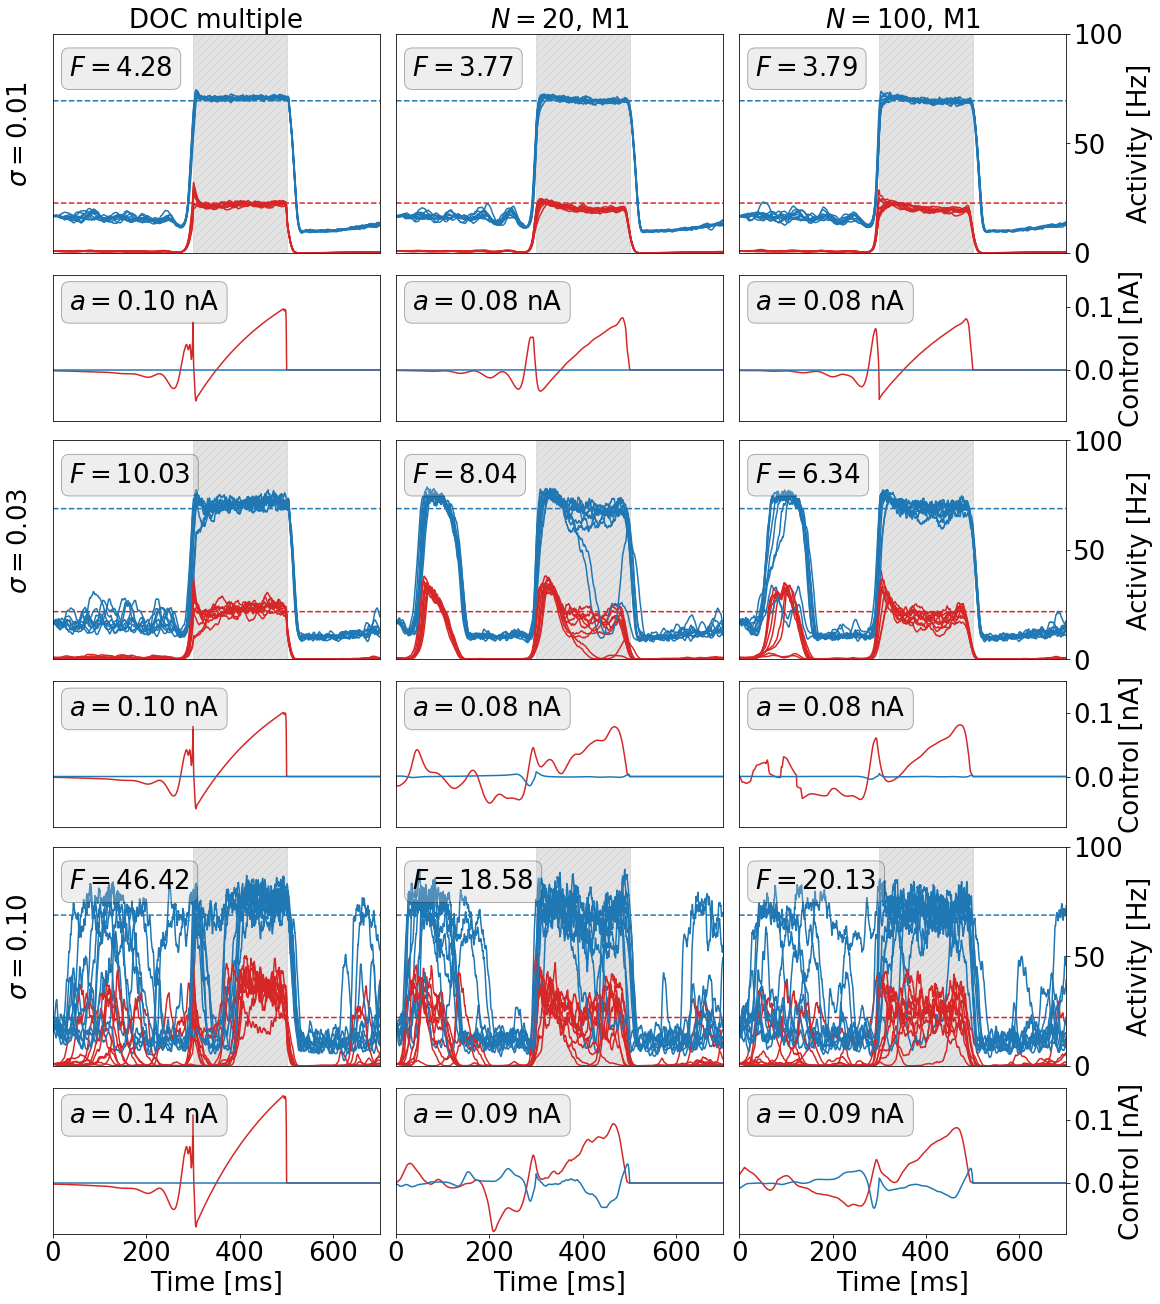

In [46]:
fs_ = 26
fig, ax = plt.subplots(6, 3, figsize=(16,18), constrained_layout=True, facecolor='white',
                       gridspec_kw={'height_ratios': [3,2,3,2,3,2]})
#fig.suptitle('Point b', fontsize=fs_)
plot_realizations = 10
i = 50
dur_post_plot = 200.
target_ = aln.getZeroTarget()

t_array = np.arange(0,dur+dur_post_plot+aln.params.dt,aln.params.dt)
ax[0,0].set_title('DOC multiple', fontsize=fs_)

setinit(initVars, aln)
aln.params.duration = dur + dur_post_plot
target_ = aln.getZeroTarget()
cntrl_plot = aln.getZeroControl()

for i_sigma in range(3):
    
    target_[0,0,:] = target[i_sigma][0,0,-1]
    target_[0,1,:] = target[i_sigma][0,1,-1]
    
    for i_noise in range(3):
        
        if i_noise in []:
            continue
            
        if i_sigma in []:
            continue
        
        noise_realizations = noise_realizations_array[i_noise]
        sigma_ou = sigma_ou_array[i_sigma]
        aln.params.sigma_ou = sigma_ou
        
        if i_noise != 0:
            ax[0,i_noise].set_title(r'$N=$' + '{}'.format(noise_realizations) + ', M1', fontsize=fs_)

        cntrl_plot[:,:,:-int(dur_post_plot/aln.params.dt)] = control_[i_sigma][i_noise][0,:,100:-100]
        ax[2*i_sigma+1,i_noise].plot( t_array, cntrl_plot[0,0,:]/5., color=exc_red)
        ax[2*i_sigma+1,i_noise].plot( t_array, cntrl_plot[0,1,:]/5., color=inh_blue)
        
        ax[2*i_sigma,i_noise].plot( t_array, target_[0,0,:], linestyle='--', color=exc_red)
        ax[2*i_sigma,i_noise].plot( t_array, target_[0,1,:], linestyle='--', color=inh_blue)

        for indexx in range(plot_realizations):
            aln.run(control=cntrl_plot)
            ax[2*i_sigma,i_noise].plot( t_array, aln.rates_exc[0,:], color=exc_red)
            ax[2*i_sigma,i_noise].plot( t_array, aln.rates_inh[0,:], color=inh_blue)

        ax[2*i_sigma,i_noise].text(0.05, 0.9, r'$F = $' + '{:.2f}'.format(cost_final_mean[i_sigma, i_noise]),
                horizontalalignment='left', verticalalignment='top', transform=ax[2*i_sigma,i_noise].transAxes,
                bbox=dict(boxstyle='round', facecolor=midgrey, alpha=0.3), fontsize=fs_)
        
        ax[2*i_sigma+1,i_noise].text(0.05, 0.9, r'$a = $' + '{:.2f} nA'.format(
            np.amax(control_[i_sigma][i_noise][0,0,100:-100]/5.)), horizontalalignment='left',
            verticalalignment='top', transform=ax[2*i_sigma+1,i_noise].transAxes,
            bbox=dict(boxstyle='round', facecolor=midgrey, alpha=0.3), fontsize=fs_)

for j in range(6):
    for k in range(3):
        ax[j,k].tick_params(axis='x', labelsize=fs_)
        ax[j,k].tick_params(axis='y', labelsize=fs_)
        ax[j,k].set_xlim(0,dur+dur_post_plot)
        ax[j,k].grid(False)
        if j != 5:
            ax[j,k].set_xticks([])
        else:
            ax[j,k].set_xlabel('Time [ms]', fontsize=fs_)
        ax[j,k].set_yticks([])
        if j%2 == 0:
            ax[j,k].set_ylim(0,100)
            sigma_ou = sigma_ou_array[int(j/2)]
            ax[j,k].axvspan( dur*trans_time, dur, facecolor=midgrey,
                            alpha=0.5, zorder=-1, hatch='///', edgecolor = midgrey)
        elif j%2 == 1:
            ax[j,k].set_ylim(-0.08,0.15)
            
    if j%2 == 0:
        ax[j,-1].set_yticks(np.arange(0,140,50))
        ax[j,-1].set_ylabel('Activity [Hz]', fontsize=fs_)
        ax[j,-1].yaxis.set_label_position("right")
        ax[j,-1].yaxis.tick_right()
        ax[j,0].text(-0.1,0.3, r'$\sigma=$'+'{:.2f}'.format(sigma_ou_array[int(j/2)]), rotation=90, size=fs_,
                 verticalalignment='bottom', horizontalalignment='center', transform=ax[j,0].transAxes)
    
    elif j%2 == 1:     
        ax[j,-1].set_yticks(np.arange(-0.,0.11,0.1))
        ax[j,-1].set_ylabel('Control [nA]', fontsize=fs_)
        ax[j,-1].yaxis.set_label_position("right")
        ax[j,-1].yaxis.tick_right()

filename_ = nb[:-6] + '.png'
    
fig.savefig(filename_)
fig.savefig(os.path.join(savepath, filename_))
plt.show()

In [ ]:
# M4 better than M2, M3
# M4 slightly better than M1 for small sigma

In [47]:
control_1 = [ [None] * n_noise, [None] * n_noise, [None] * n_noise ]

In [50]:
for i_sigma in range(3):
    
    cost.setParams(w_p[i_sigma], w_e, w_s)
    
    for i_noise in [1,2]:
        
        if i_sigma in [1,2]:
            continue

        noise_realizations = noise_realizations_array[i_noise]
        sigma_ou = sigma_ou_array[i_sigma]
        aln.params.sigma_ou = sigma_ou
        
        aln.params.duration = dur
        zero_init = aln.getZeroControl()
        print(noise_realizations)

        setinit(initVars, aln)

        bestControl, bestState, c_, runtime, grad, phi, costnode, total_cost_mean_std = aln.A1(
            zero_init, target[i_sigma], c_scheme, u_mat, u_scheme, max_iteration_ = init_it,
            tolerance_ = tol, startStep_ = start_step, max_control_ = max_cntrl, min_control_ = min_cntrl,
            t_sim_ = dur, t_sim_pre_ = dur_pre, t_sim_post_ = dur_post, CGVar = None,
            control_variables_ = [0], prec_variables_ = prec_vars, transition_time_ = trans_time,
            noise_real=noise_realizations, init_params = initVars, method='M2')

        control_init = bestControl[:,:,100:-100].copy()
        setinit(initVars, aln)
        aln.params.duration = dur

        bestControl, bestState, c_, runtime, grad, phi, costnode, total_cost_mean_std = aln.A1(
            control_init, target[i_sigma], c_scheme, u_mat, u_scheme, max_iteration_ = max_it-init_it,
            tolerance_ = tol, startStep_ = start_step, max_control_ = max_cntrl, min_control_ = min_cntrl,
            t_sim_ = dur, t_sim_pre_ = dur_pre, t_sim_post_ = dur_post, CGVar = None,
            control_variables_ = [0,1], prec_variables_ = prec_vars, transition_time_ = trans_time,
            noise_real=noise_realizations, init_params = initVars,method='M2')

        control_1[i_sigma][i_noise] = bestControl.copy()

set cost params:  0.00033303042282929583 0.0 1.0
20
interpolate adjoint :  True True True
RUN  0 , total integrated cost =  107.31795983790747
Gradient descend method:  None
RUN  1 , total integrated cost =  27.063249329330898
RUN  2 , total integrated cost =  12.52720818539346
RUN  3 , total integrated cost =  6.839845422217593
RUN  3 , total integrated cost mean =  6.839845422217593
Improved over  3  iterations in  7.982278908020817  seconds by  93.62656033291309  percent.
interpolate adjoint :  True True True
RUN  0 , total integrated cost =  6.755496574286111
Gradient descend method:  None
RUN  1 , total integrated cost =  5.9811258196336805
RUN  2 , total integrated cost =  5.377615673692885
step size too small or too large
step size too small or too large
RUN  3 , total integrated cost =  4.900119649629804
step size too small or too large
step size too small or too large
step size too small or too large
step size too small or too large
RUN  4 , total integrated cost =  4.54696265

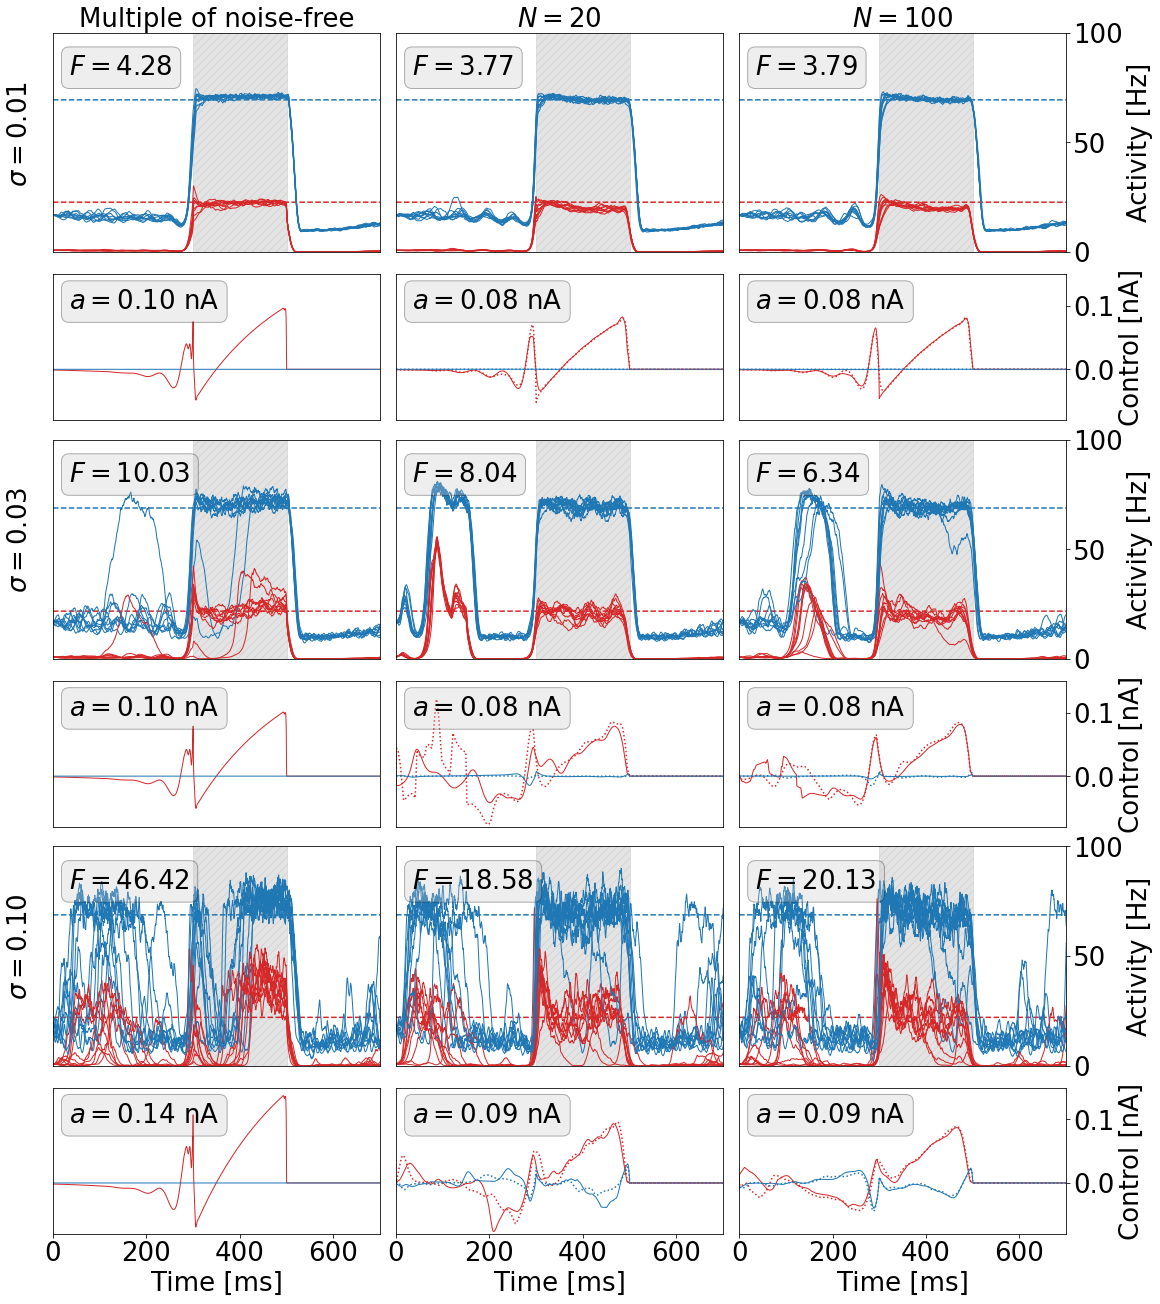

In [52]:
fig, ax = plt.subplots(6, 3, figsize=(16,18), constrained_layout=True, facecolor='white',
                       gridspec_kw={'height_ratios': [3,2,3,2,3,2]})
target_ = aln.getZeroTarget()

t_array = np.arange(0,dur+dur_post_plot+aln.params.dt,aln.params.dt)
ax[0,0].set_title('Multiple of noise-free', fontsize=fs_)

setinit(initVars, aln)
aln.params.duration = dur + dur_post_plot
cntrl_plot = aln.getZeroControl()

for i_sigma in range(3):
    
    target_[0,0,:] = target[i_sigma][0,0,-1]
    target_[0,1,:] = target[i_sigma][0,1,-1]
    
    for i_noise in range(3):
        
        if i_noise in []:
            continue
            
        if i_sigma in []:
            continue
        
        noise_realizations = noise_realizations_array[i_noise]
        sigma_ou = sigma_ou_array[i_sigma]
        aln.params.sigma_ou = sigma_ou
        
        if i_noise != 0:
            ax[0,i_noise].set_title(r'$N=$' + '{}'.format(noise_realizations), fontsize=fs_)

        cntrl_plot[:,:,:-int(dur_post_plot/aln.params.dt)] = control_[i_sigma][i_noise][0,:,100:-100]
        ax[2*i_sigma+1,i_noise].plot( t_array, cntrl_plot[0,0,:]/5., color=exc_red, linewidth=1)
        ax[2*i_sigma+1,i_noise].plot( t_array, cntrl_plot[0,1,:]/5., color=inh_blue, linewidth=1)
        
        if i_noise != 0:
            cntrl_plot[:,:,:-int(dur_post_plot/aln.params.dt)] = control_1[i_sigma][i_noise][0,:,100:-100]
            ax[2*i_sigma+1,i_noise].plot( t_array, cntrl_plot[0,0,:]/5., color=exc_red,
                                         linestyle='dotted')
            ax[2*i_sigma+1,i_noise].plot( t_array, cntrl_plot[0,1,:]/5., color=inh_blue,
                                         linestyle='dotted')
        
        ax[2*i_sigma,i_noise].plot( t_array, target_[0,0,:], linestyle='--', color=exc_red)
        ax[2*i_sigma,i_noise].plot( t_array, target_[0,1,:], linestyle='--', color=inh_blue)

        for indexx in range(plot_realizations):
            aln.run(control=cntrl_plot)
            ax[2*i_sigma,i_noise].plot( t_array, aln.rates_exc[0,:], color=exc_red, linewidth=1)
            ax[2*i_sigma,i_noise].plot( t_array, aln.rates_inh[0,:], color=inh_blue, linewidth=1)

        ax[2*i_sigma,i_noise].text(0.05, 0.9, r'$F = $' + '{:.2f}'.format(cost_final_mean[i_sigma, i_noise]),
                horizontalalignment='left', verticalalignment='top', transform=ax[2*i_sigma,i_noise].transAxes,
                bbox=dict(boxstyle='round', facecolor=midgrey, alpha=0.3), fontsize=fs_)
        
        ax[2*i_sigma+1,i_noise].text(0.05, 0.9, r'$a = $' + '{:.2f} nA'.format(
            np.amax(control_[i_sigma][i_noise][0,0,100:-100]/5.)), horizontalalignment='left',
            verticalalignment='top', transform=ax[2*i_sigma+1,i_noise].transAxes,
            bbox=dict(boxstyle='round', facecolor=midgrey, alpha=0.3), fontsize=fs_)
        
for j in range(6):
    for k in range(3):
        ax[j,k].tick_params(axis='x', labelsize=fs_)
        ax[j,k].tick_params(axis='y', labelsize=fs_)
        ax[j,k].set_xlim(0,dur+dur_post_plot)
        ax[j,k].grid(False)
        if j != 5:
            ax[j,k].set_xticks([])
        else:
            ax[j,k].set_xlabel('Time [ms]', fontsize=fs_)
        ax[j,k].set_yticks([])
        if j%2 == 0:
            ax[j,k].set_ylim(0,100)
            sigma_ou = sigma_ou_array[int(j/2)]
            ax[j,k].axvspan( dur*trans_time, dur, facecolor=midgrey,
                            alpha=0.5, zorder=-1, hatch='///', edgecolor = midgrey)
        elif j%2 == 1:
            ax[j,k].set_ylim(-0.08,0.15)
            
    if j%2 == 0:
        ax[j,-1].set_yticks(np.arange(0,140,50))
        ax[j,-1].set_ylabel('Activity [Hz]', fontsize=fs_)
        ax[j,-1].yaxis.set_label_position("right")
        ax[j,-1].yaxis.tick_right()
        ax[j,0].text(-0.1,0.3, r'$\sigma=$'+'{:.2f}'.format(sigma_ou_array[int(j/2)]), rotation=90, size=fs_,
                 verticalalignment='bottom', horizontalalignment='center', transform=ax[j,0].transAxes)
    
    elif j%2 == 1:     
        ax[j,-1].set_yticks(np.arange(-0.,0.11,0.1))
        ax[j,-1].set_ylabel('Control [nA]', fontsize=fs_)
        ax[j,-1].yaxis.set_label_position("right")
        ax[j,-1].yaxis.tick_right()


filename_ = nb[:-6] + '_1.png'
    
fig.savefig(filename_)
fig.savefig(os.path.join(savepath, filename_))
plt.show()